# Visualizing the Accuracy of the Environment Model

In [1]:
%matplotlib inline

import os
os.environ['CUDA_VISIBLE_DEVICES']="-1"

import gym
import sys
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict

import cube_gym
from environment_model import EnvironmentModel
from common.multiprocessing_env import SubprocVecEnv

Now we select which model we are going to use

In [2]:
# Find all the experiments
experiments = defaultdict(lambda: [])

for r, d, f in os.walk('./experiments/'):
    for file in f:
        if ".ckpt.index" in file:
            iternum = file.replace('.ckpt.index', '')
            if iternum == 'final' or iternum == 'final.ckpt':
                iternum = int(sys.maxsize)
            experiments[r].append(int(iternum))
            
exp = None
ckpt = None

print('Experiments')
print('===========')
for i, e in zip(range(len(experiments.keys())), sorted(experiments.keys())):
    print('[%i] %s' % (i+1, e))
    
exp = list(sorted(experiments.keys()))[int(input('Enter the experiment number you wish to load: ')) - 1]

print('\nCheckpoints')
print('===========')
for i, e in zip(range(len(experiments[exp])), sorted(experiments[exp])):
    print('[%i] %s' % (i+1, e))
    
ckpt = sorted(experiments[exp])[int(input('Choose which checkpoint to load: ')) - 1]
ckpt = str(ckpt) + '.ckpt'

hyperparams = exp.split('/')
em_arch = hyperparams[3]
env_id = hyperparams[4]
orient_scramble = True if hyperparams[6] == 'os_yes' else False

Experiments
[1] ./experiments/a2c/c2d+:64:3:1_c2d+:16:3:1_h:4096:2048_pi_vf/NULL/cube-x3-v0/adaptive/os_yes/iter_1000000.0/lr_0.0007/pgk_1.0/vfk_0.5/entk_0.05/2018-07-23-14-53-32-792206
[2] ./experiments/em/c2d:32:3:1_c2d:64:3:1_c2d:128:3:1_h:4096:2048:1024_c2dT:128:4:1_c2dT:6:3:3/cube-x3-v0/spectrum/os_yes/iter_50000.0/lr_0.0007/loss_mse/obk_1.0/rwk_1.0/2018-07-24-16-23-04-020344
[3] ./experiments/em/h:4096:4096:4096:864/cube-x3-v0/spectrum/os_yes/iter_50000.0/lr_0.0007/loss_mse/obk_1.0/rwk_1.0/2018-07-24-17-03-39-292581
[4] ./experiments/em/h:4096:4096:4096:864/cube-x3-v0/spectrum/os_yes/iter_50000.0/lr_0.0007/loss_mse/obk_1.0/rwk_1.0/2018-07-24-17-30-21-597552
[5] ./experiments/em/h:8192:8192:8192:8192:8192:8192:864/cube-x3-v0/spectrum/os_yes/iter_50000.0/lr_0.0007/loss_mse/obk_1.0/rwk_1.0/2018-07-24-17-19-48-511728
[6] ./experiments/vae/c2d:32:3:1_c2d:64:3:1_c2d:128:3:1_z:32:1024_c2dT:128:4:1_c2dT:6:3:3/cube-x3-v0/s_1_m_1/os_yes/iter_50000.0/lr_0.0007/kl_1.0/2018-07-24-15-07-46-223

The *env_fn* gives you the oppurtunity to configure the environment

In [3]:
def env_fn():
    env = gym.make(env_id)
    env.unwrapped._refresh(1,100, adaptive=False, orient_scramble=orient_scramble)
    return env

# This is just so we have the action list available to us
actions = env_fn().unwrapped.action_list
print('\nList of Actions')
for a in actions:
    print(a, end=' ')


List of Actions
r l u d f b .r .l .u .d .f .b x y z .x .y .z 

In [4]:
nenvs = 7
envs = SubprocVecEnv([env_fn for _ in range(nenvs)])
envs.seed(int(time.time()))
print('Made ', nenvs, ' environments of ', env_id)

Made  7  environments of  cube-x3-v0


In [5]:
sess = tf.Session()

env_model = EnvironmentModel(sess, em_arch, 
        envs.observation_space.shape, envs.action_space, 1, 1, False)

env_model.load(os.path.join(exp, ckpt))

INFO:tensorflow:Restoring parameters from ./experiments/em/h:8192:8192:8192:8192:8192:8192:864/cube-x3-v0/spectrum/os_yes/iter_50000.0/lr_0.0007/loss_mse/obk_1.0/rwk_1.0/2018-07-24-17-19-48-511728/2600.ckpt


### Now its time to do a test run with the environment

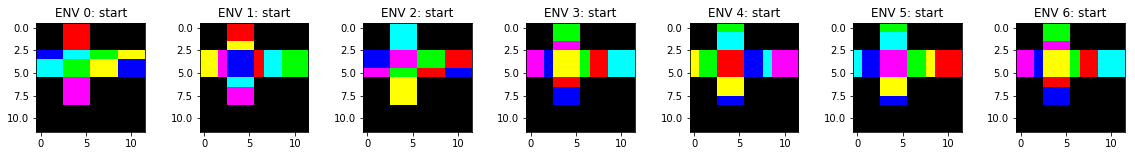

------------------------------------------------------------------------------------------------------------------------------------


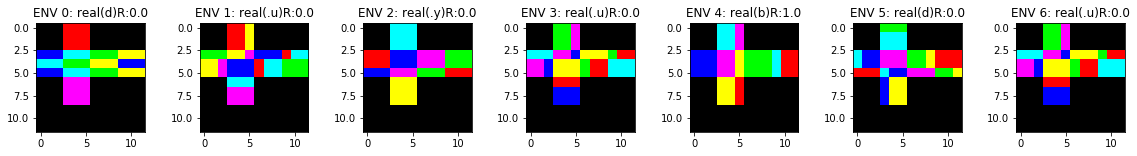

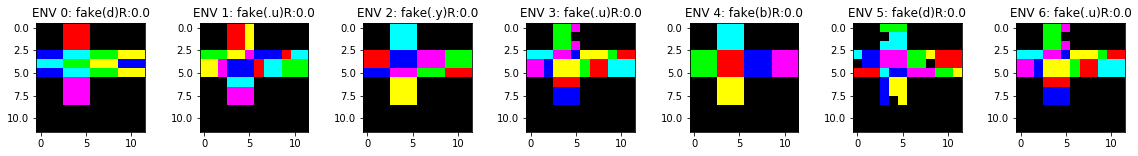

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [4 4 4 5 5 5 3 3 3 2 2 2]
 [5 5 5 3 3 3 2 2 2 4 4 4]
 [4 4 4 5 5 5 3 3 3 2 2 2]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [4 4 4 5 5 5 3 3 3 2 2 2]
 [5 5 5 3 3 3 2 2 2 4 4 4]
 [4 4 4 5 5 5 3 3 3 2 2 2]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


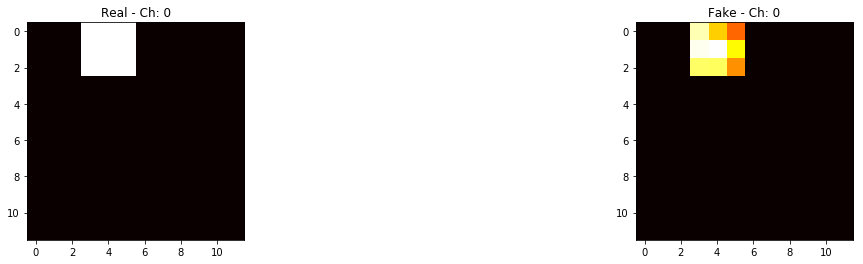

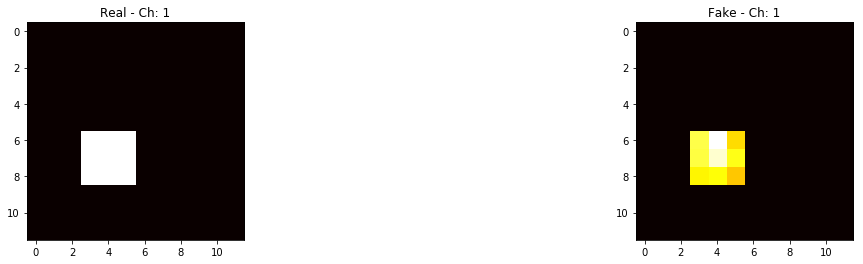

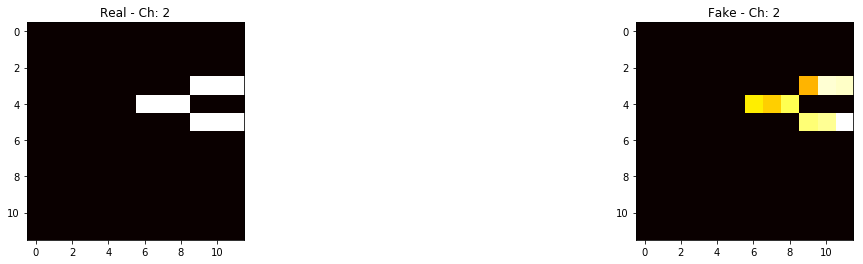

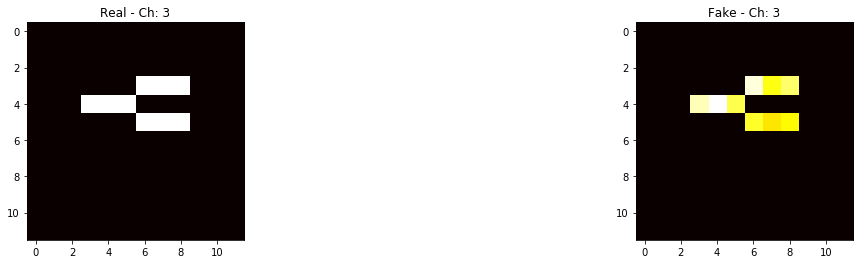

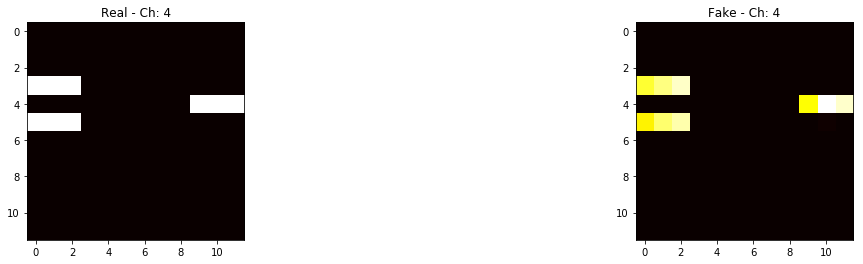

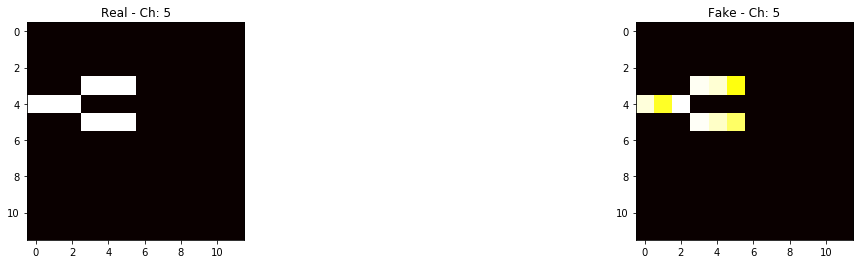

------------------------------------------------------------------------------------------------------------------------------------


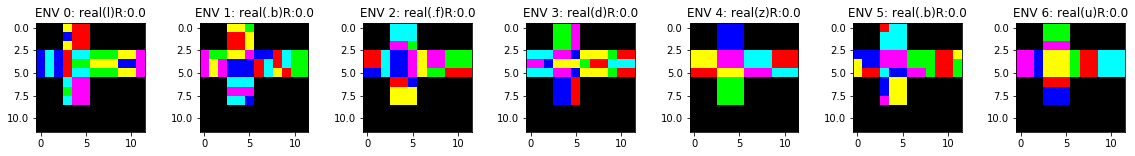

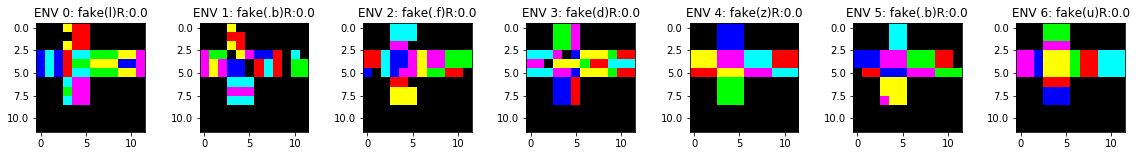

[[0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0]
 [4 5 4 0 5 5 3 3 3 2 2 1]
 [4 5 4 0 3 3 2 2 2 4 4 1]
 [4 5 4 0 5 5 3 3 3 2 2 1]
 [0 0 0 5 1 1 0 0 0 0 0 0]
 [0 0 0 3 1 1 0 0 0 0 0 0]
 [0 0 0 5 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0]
 [4 5 4 0 5 5 3 3 3 2 2 1]
 [4 5 4 0 3 3 2 2 2 4 4 1]
 [4 5 4 0 5 5 3 3 3 2 2 1]
 [0 0 0 5 1 1 0 0 0 0 0 0]
 [0 0 0 3 1 1 0 0 0 0 0 0]
 [0 0 0 5 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


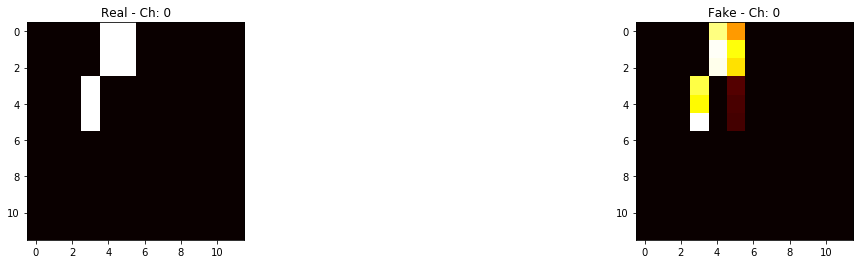

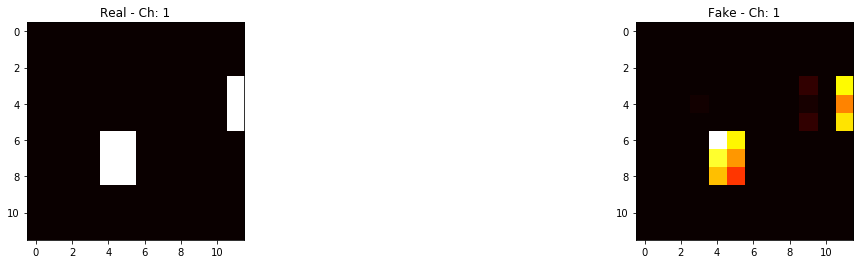

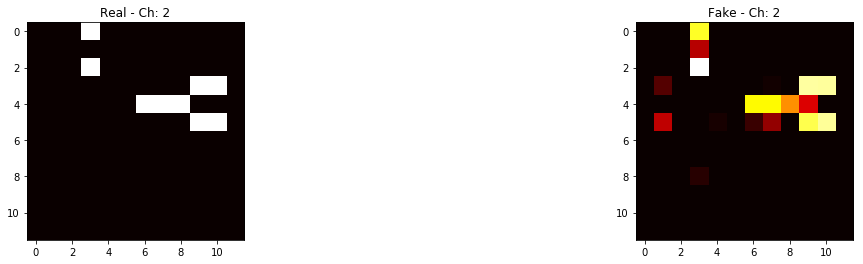

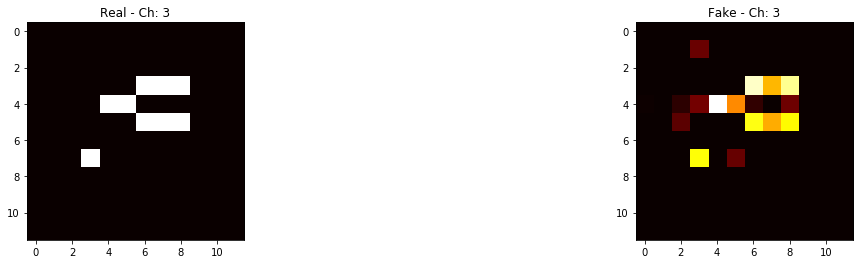

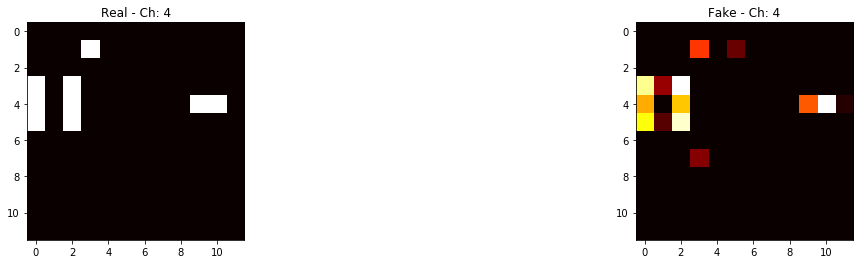

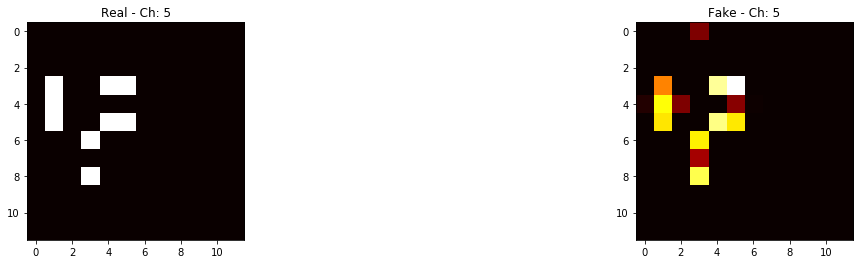

------------------------------------------------------------------------------------------------------------------------------------


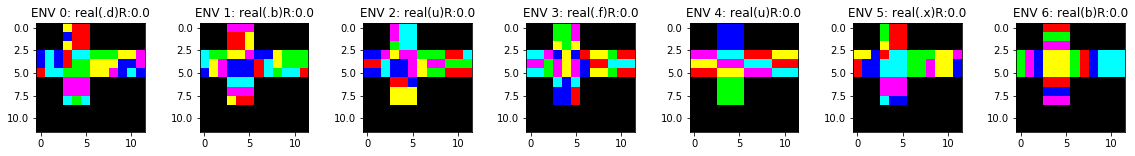

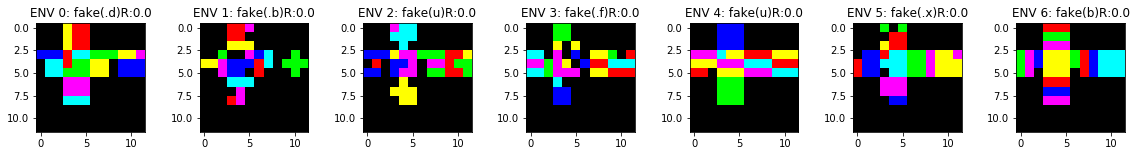

[[0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0]
 [4 5 4 0 5 5 3 3 3 2 2 1]
 [4 5 4 0 3 3 2 2 2 4 4 1]
 [0 5 5 3 3 3 2 2 1 4 5 4]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 5 3 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0]
 [4 4 4 0 5 5 3 3 3 2 2 1]
 [5 5 5 0 3 3 2 2 2 4 4 4]
 [0 5 5 3 3 3 2 2 0 4 4 4]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 5 5 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


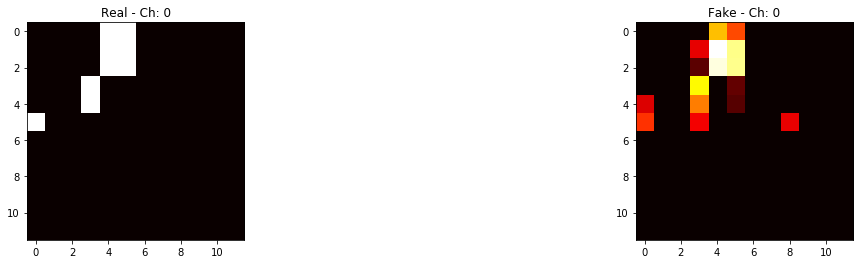

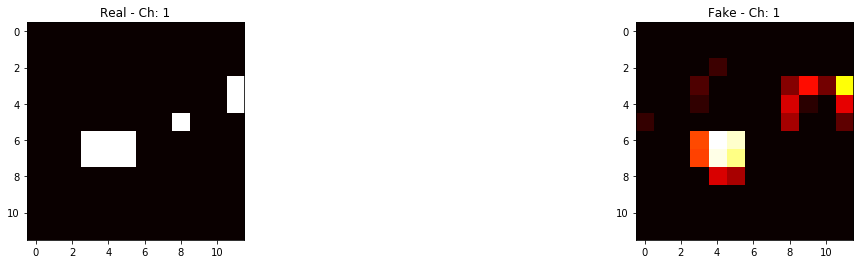

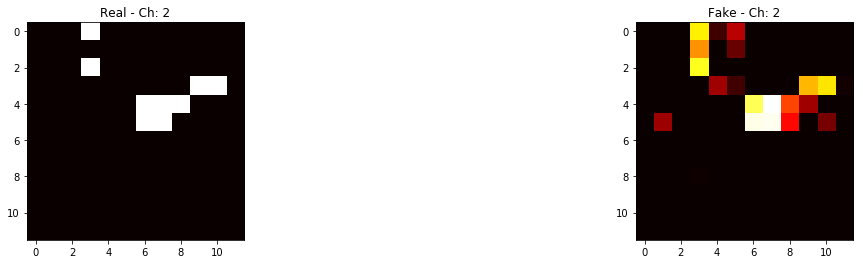

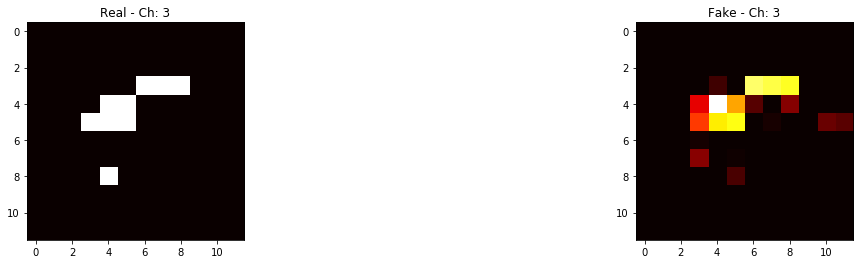

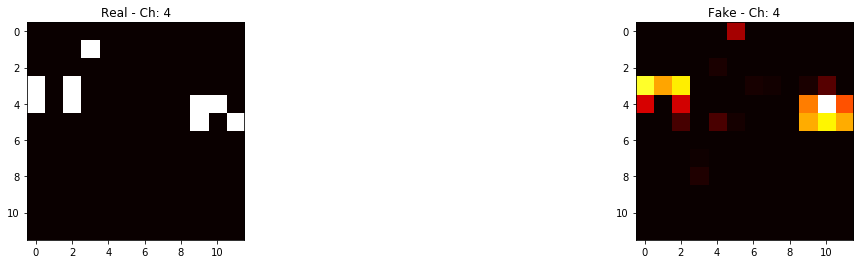

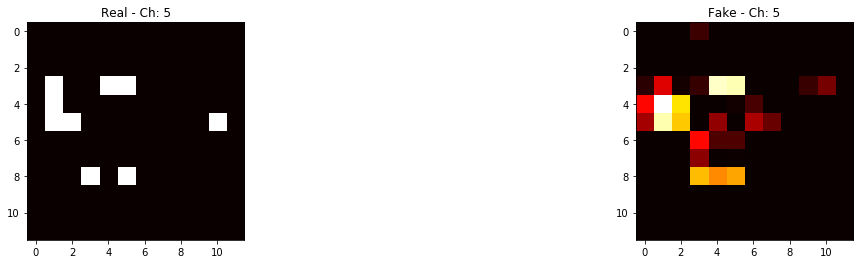

------------------------------------------------------------------------------------------------------------------------------------


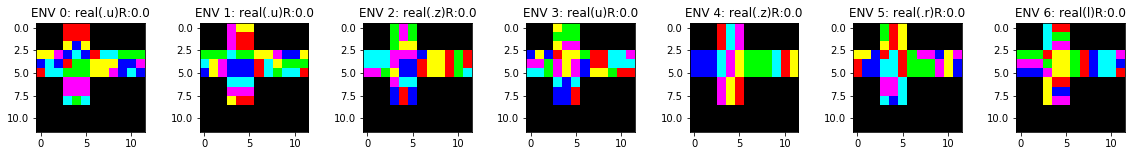

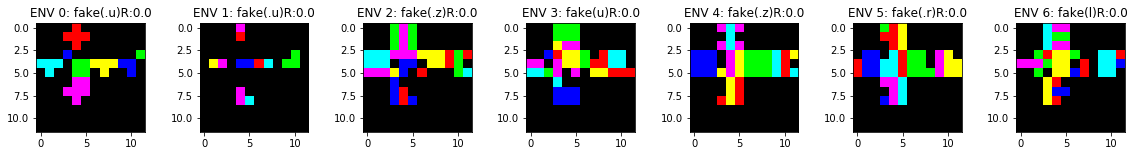

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 4 2 0 0 0 0 0 0]
 [2 2 1 4 5 4 0 5 5 3 3 3]
 [4 5 4 0 3 3 2 2 2 4 4 1]
 [0 5 5 3 3 3 2 2 1 4 5 4]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 5 3 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 5 1 4 3 3 5 2 0 4 4 4]
 [5 5 5 0 3 3 2 2 2 4 4 4]
 [5 5 5 0 3 3 2 2 2 4 4 4]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 5 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


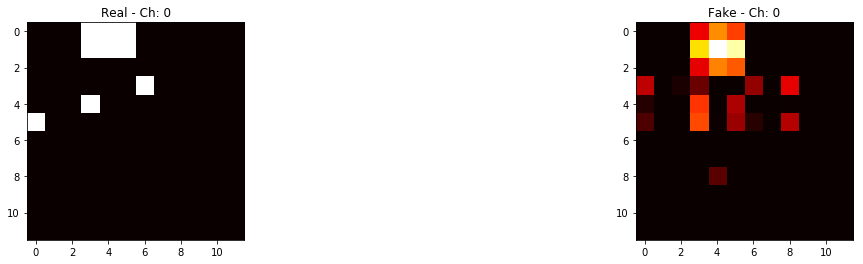

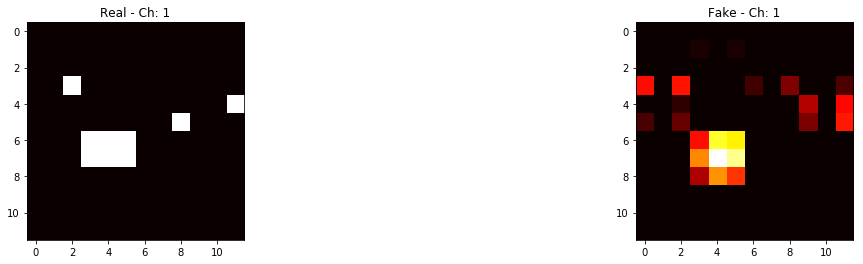

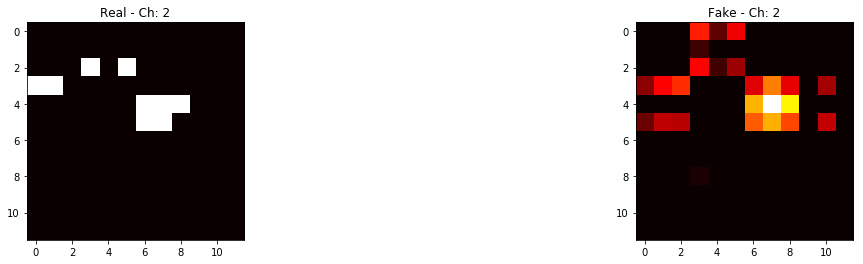

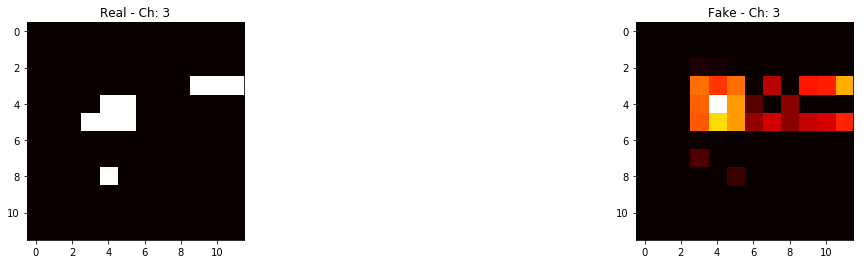

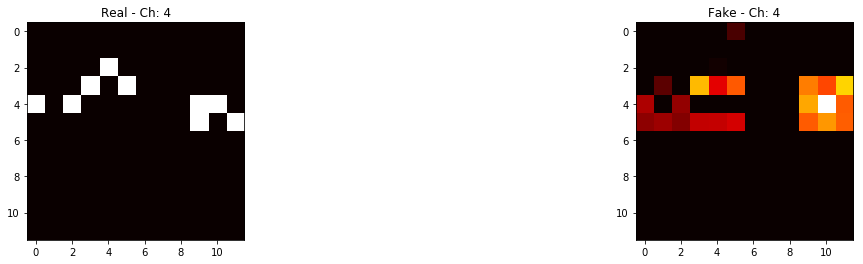

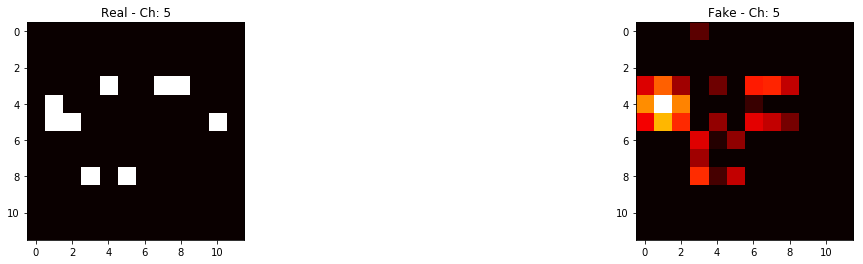

------------------------------------------------------------------------------------------------------------------------------------


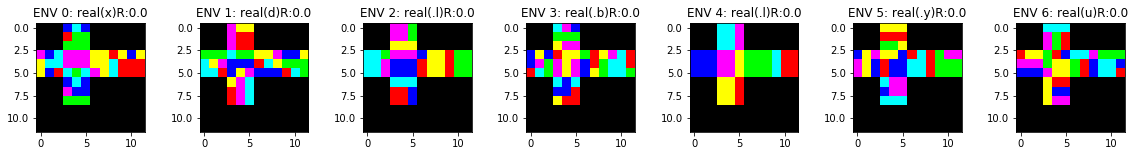

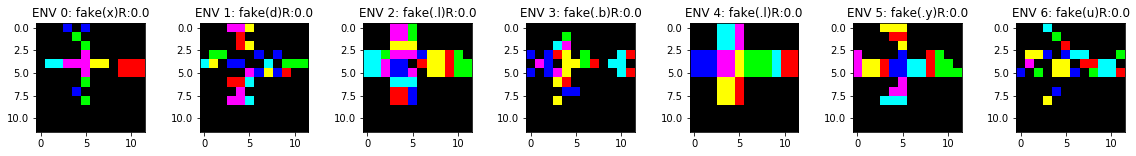

[[0 0 0 4 5 4 0 0 0 0 0 0]
 [0 0 0 0 3 3 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [1 4 5 1 1 1 2 2 0 2 4 2]
 [2 5 5 1 1 1 2 2 5 0 0 0]
 [2 4 0 5 3 5 1 2 5 0 0 0]
 [0 0 0 4 5 4 0 0 0 0 0 0]
 [0 0 0 1 4 4 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 3 4 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [2 5 2 1 1 1 2 2 5 0 0 0]
 [5 5 5 1 1 1 2 2 2 0 0 0]
 [2 5 2 1 1 1 2 2 5 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 3 4 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


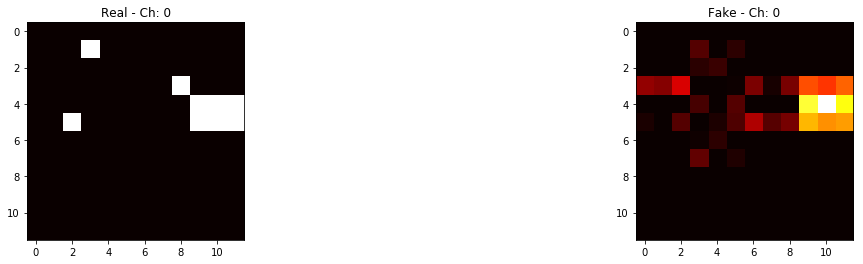

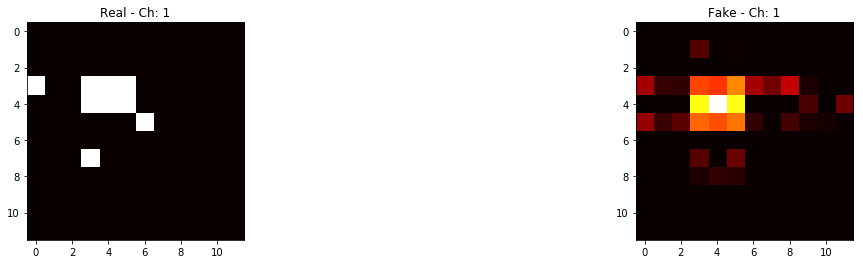

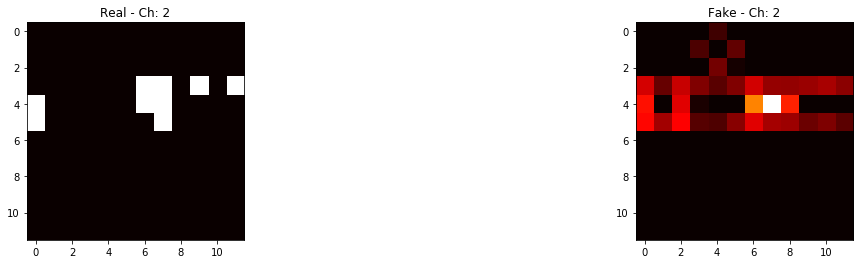

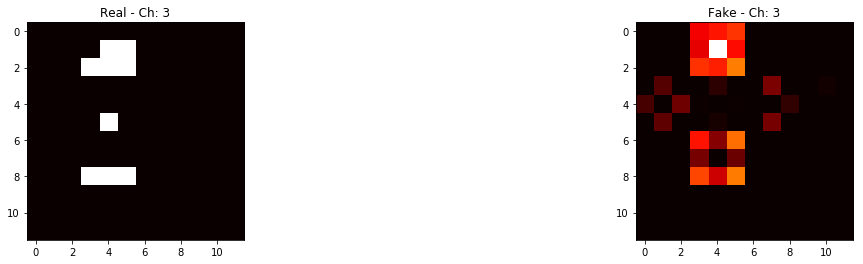

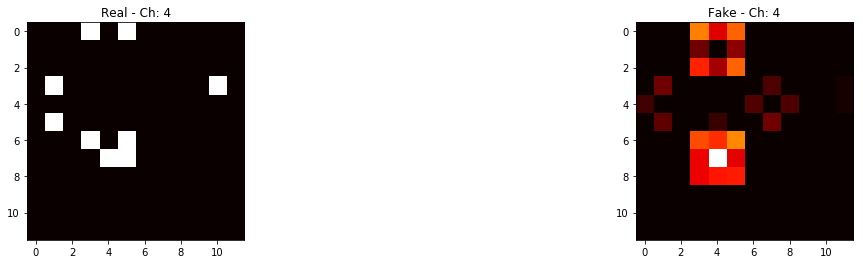

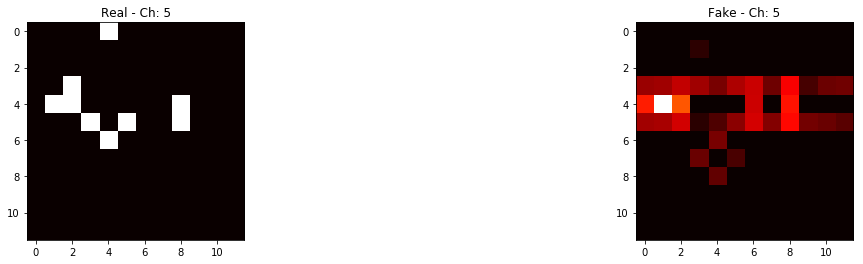

------------------------------------------------------------------------------------------------------------------------------------


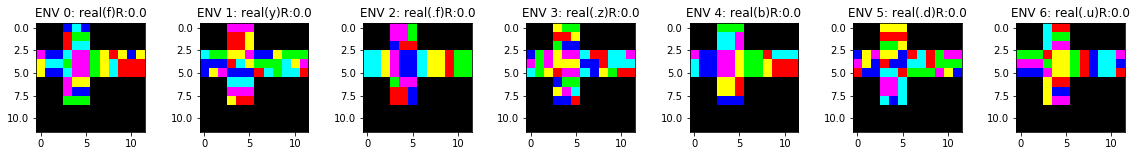

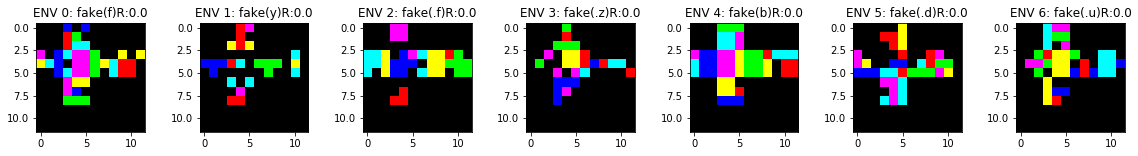

[[0 0 0 4 5 4 0 0 0 0 0 0]
 [0 0 0 0 3 3 0 0 0 0 0 0]
 [0 0 0 0 5 5 0 0 0 0 0 0]
 [1 4 4 5 1 1 3 2 0 2 4 2]
 [2 5 5 3 1 1 3 2 5 0 0 0]
 [2 4 4 5 1 1 3 2 5 0 0 0]
 [0 0 0 1 2 2 0 0 0 0 0 0]
 [0 0 0 1 4 4 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 0 3 3 0 0 0 0 0 0]
 [0 0 0 0 5 5 0 0 0 0 0 0]
 [1 4 4 5 1 1 3 0 0 2 2 2]
 [2 5 4 5 1 1 3 2 5 0 0 0]
 [2 4 4 5 1 1 3 3 5 0 0 0]
 [0 0 0 1 2 2 0 0 0 0 0 0]
 [0 0 0 1 4 4 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


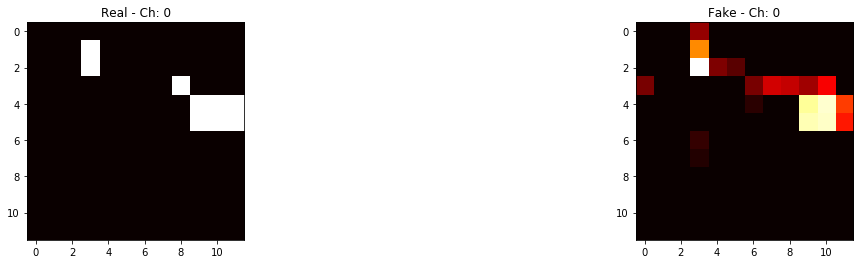

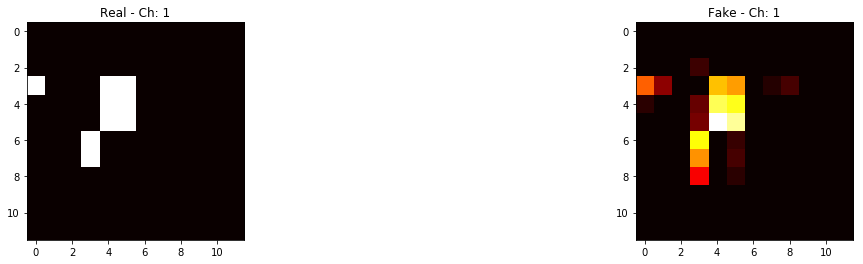

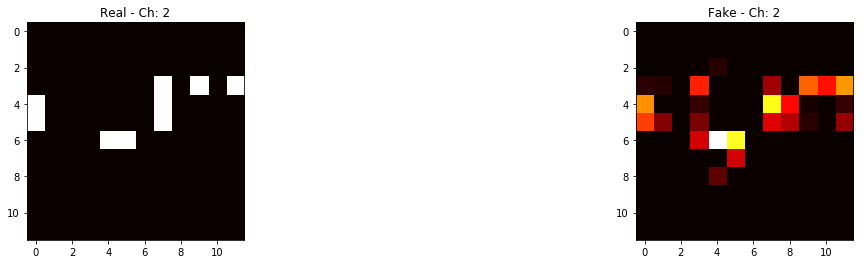

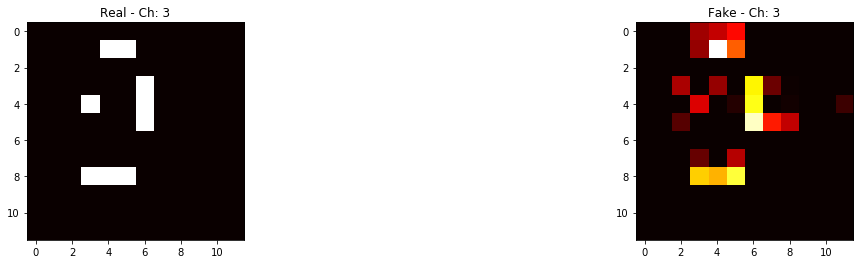

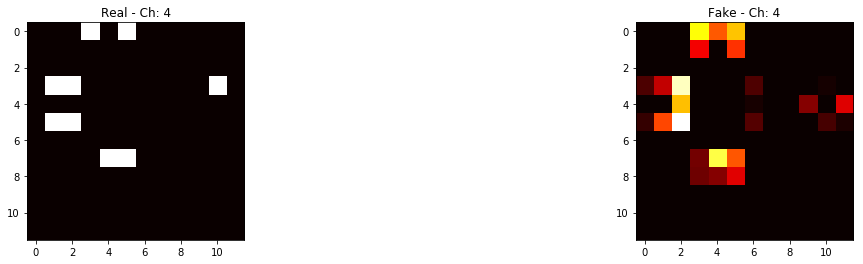

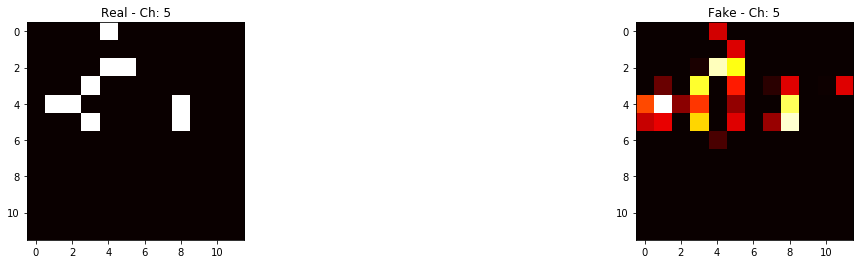

------------------------------------------------------------------------------------------------------------------------------------


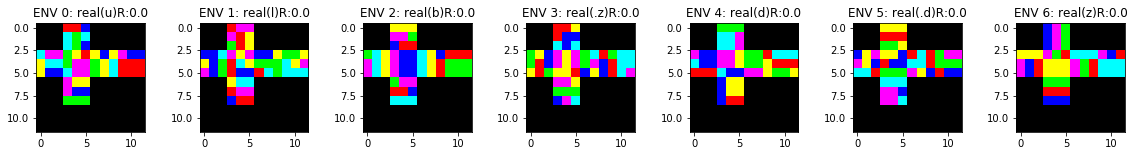

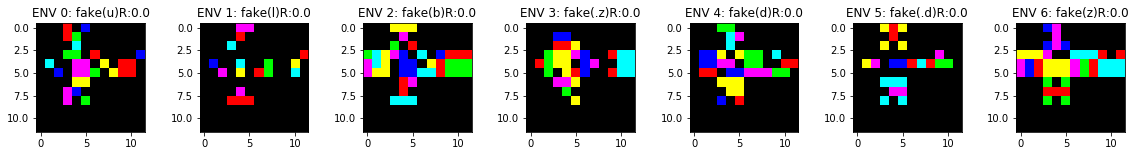

[[0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 5 3 5 0 0 0 0 0 0]
 [0 0 0 5 3 4 0 0 0 0 0 0]
 [5 1 1 3 2 0 2 4 2 1 4 4]
 [2 5 5 3 1 1 3 2 5 0 0 0]
 [2 4 4 5 1 1 3 2 5 0 0 0]
 [0 0 0 1 2 2 0 0 0 0 0 0]
 [0 0 0 1 4 4 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 4 4 0 0 0 0 0 0]
 [0 0 0 0 3 4 0 0 0 0 0 0]
 [0 0 0 5 5 4 0 0 0 0 0 0]
 [2 5 1 3 3 1 0 2 2 0 0 4]
 [5 5 4 3 1 1 3 2 2 0 0 4]
 [4 4 4 5 1 1 3 2 2 0 0 4]
 [0 0 0 1 2 2 0 0 0 0 0 0]
 [0 0 0 1 4 3 0 0 0 0 0 0]
 [0 0 0 1 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


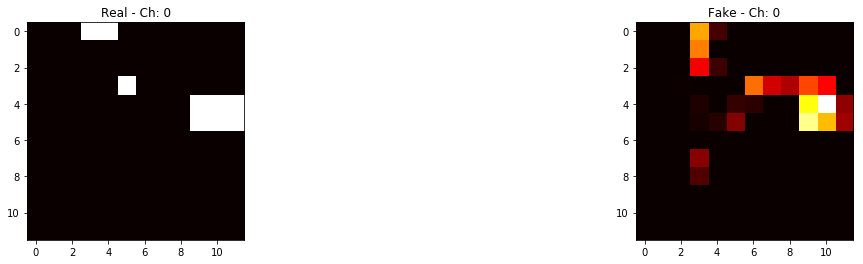

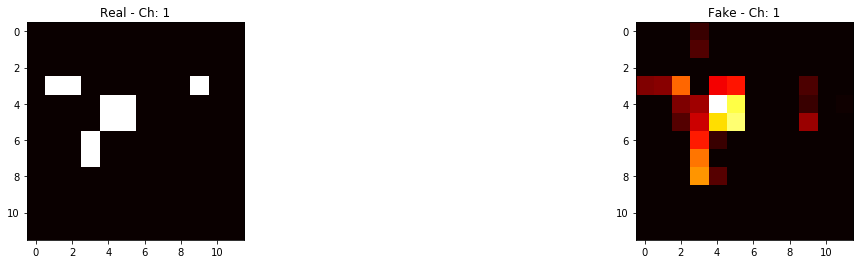

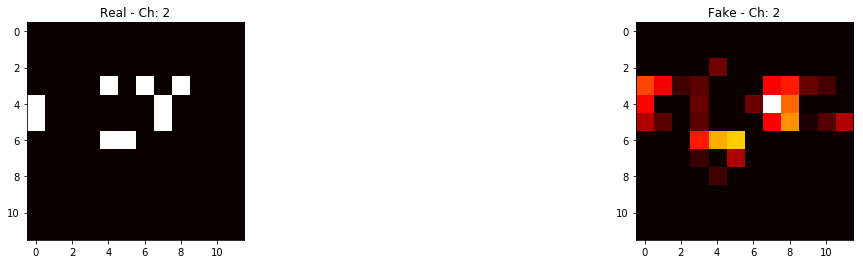

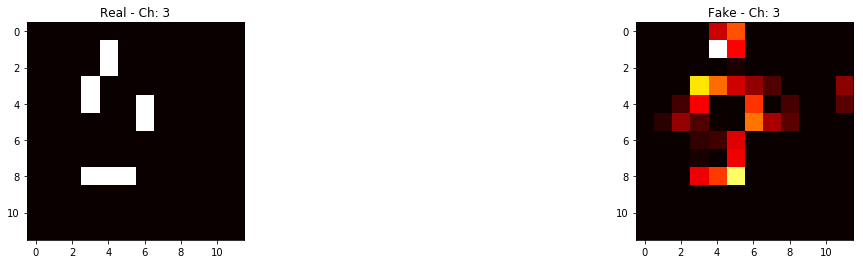

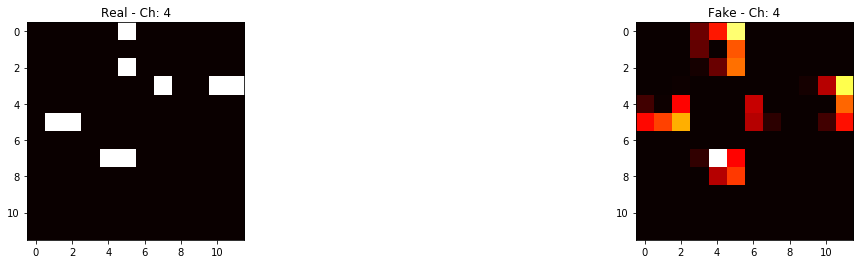

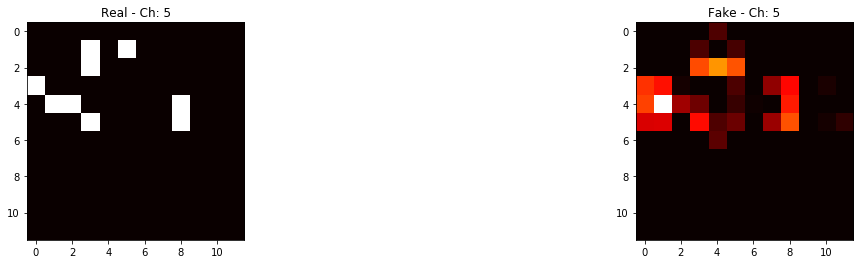

------------------------------------------------------------------------------------------------------------------------------------


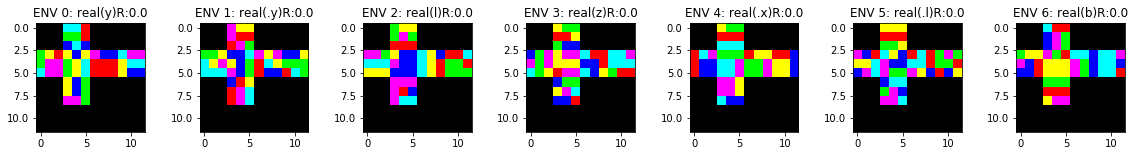

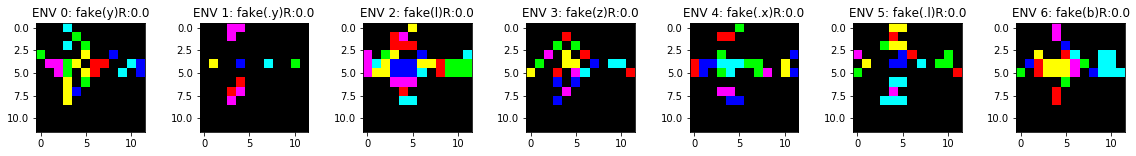

[[0 0 0 5 5 0 0 0 0 0 0 0]
 [0 0 0 3 3 0 0 0 0 0 0 0]
 [0 0 0 4 5 4 0 0 0 0 0 0]
 [3 2 0 2 4 2 1 4 4 5 1 1]
 [3 1 1 3 2 5 0 0 0 2 5 5]
 [5 1 1 3 2 5 0 0 0 2 4 4]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 1 1 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 5 3 3 0 0 0 0 0 0]
 [0 0 0 5 5 4 0 0 0 0 0 0]
 [3 3 3 0 3 2 0 4 4 5 5 1]
 [3 1 1 3 2 2 0 0 4 5 5 4]
 [1 1 1 3 3 2 0 0 4 5 4 4]
 [0 0 0 2 2 3 0 0 0 0 0 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 2 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


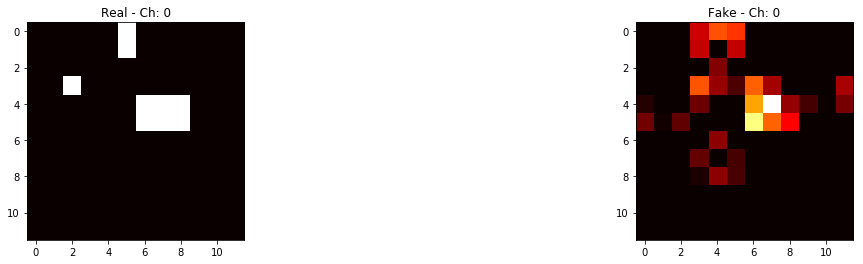

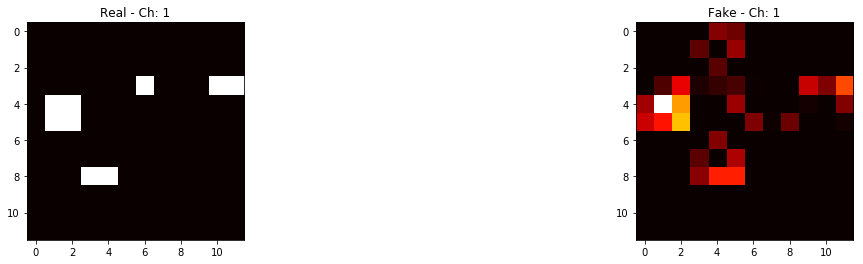

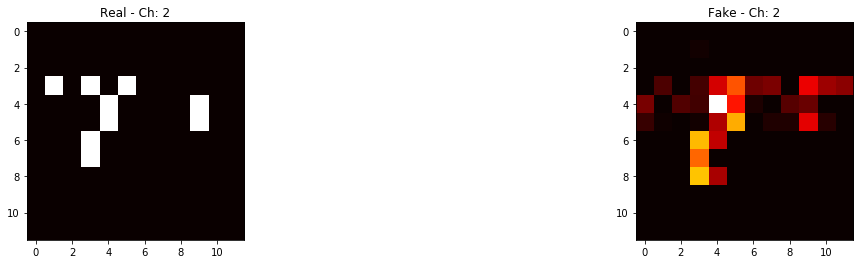

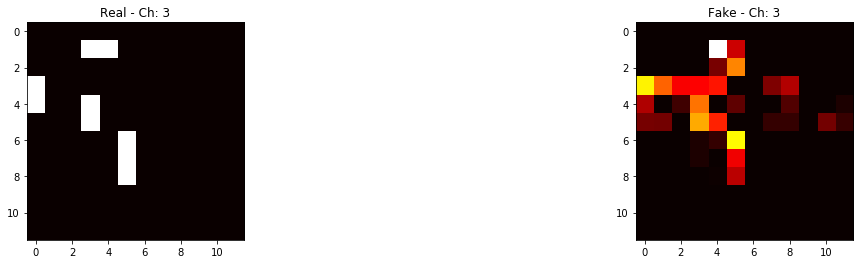

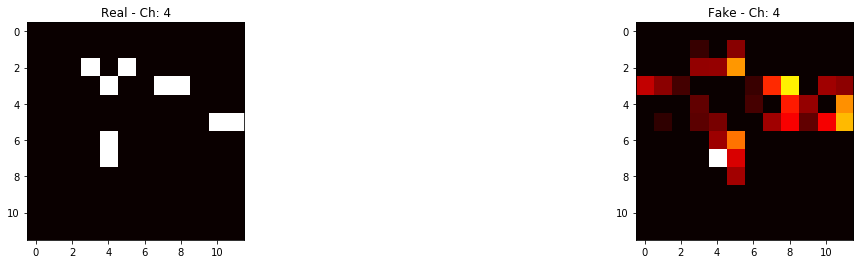

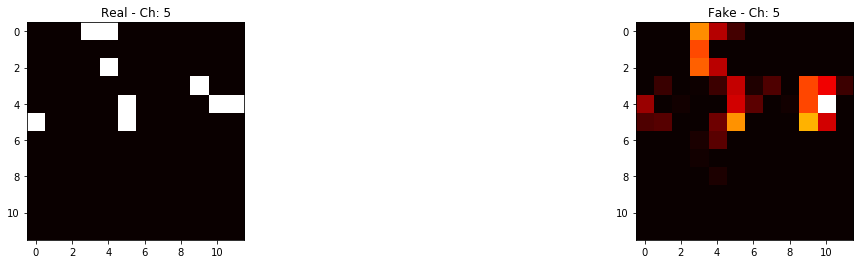

------------------------------------------------------------------------------------------------------------------------------------


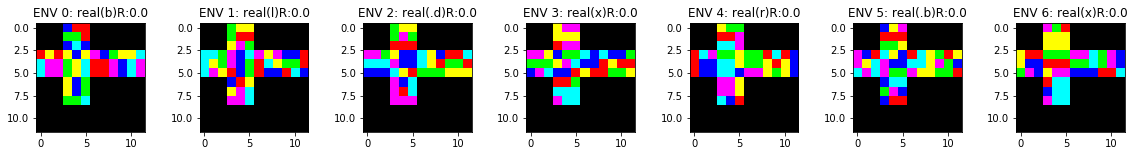

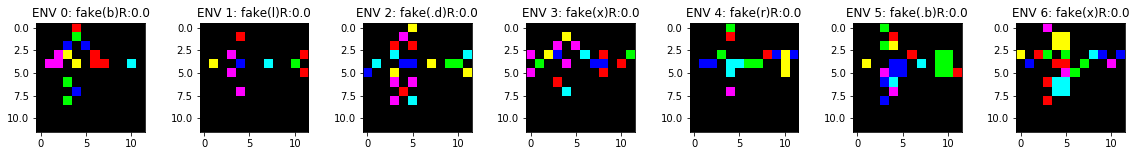

[[0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 3 3 0 0 0 0 0 0 0]
 [0 0 0 4 5 4 0 0 0 0 0 0]
 [0 2 0 2 4 2 1 4 3 2 2 5]
 [5 1 1 3 2 5 0 0 1 4 5 1]
 [5 1 1 3 2 5 0 0 1 4 5 1]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 3 3 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 4 3 4 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [1 1 1 2 3 5 0 0 1 5 4 2]
 [0 1 1 3 2 3 0 0 0 4 5 4]
 [5 0 0 5 5 5 0 0 2 4 4 2]
 [0 0 0 3 1 3 0 0 0 0 0 0]
 [0 0 0 3 4 3 0 0 0 0 0 0]
 [0 0 0 3 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


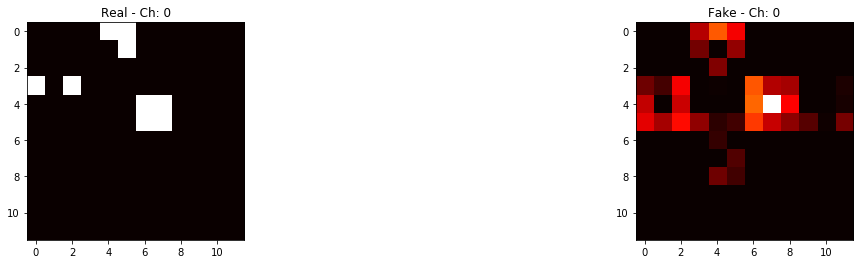

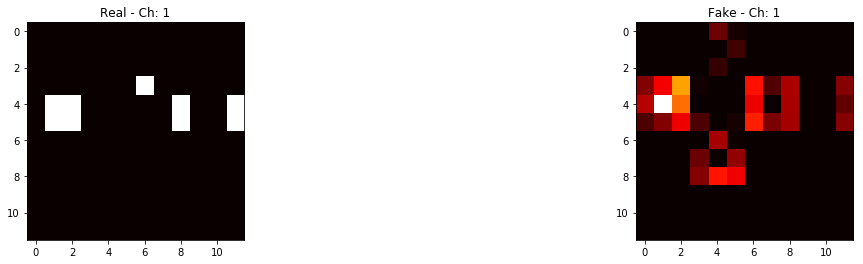

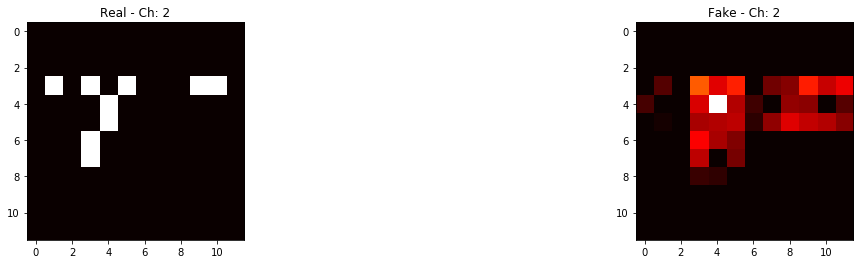

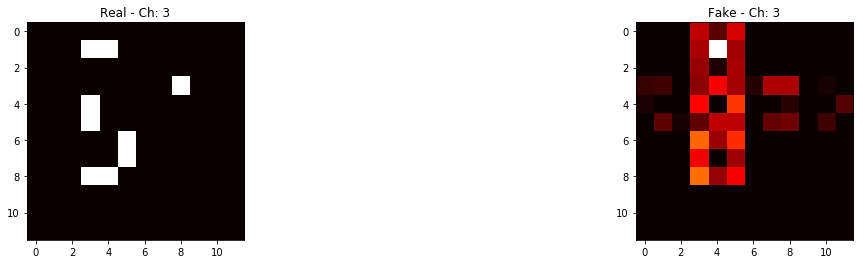

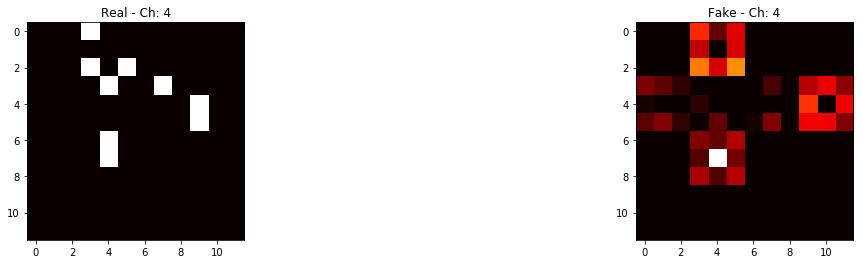

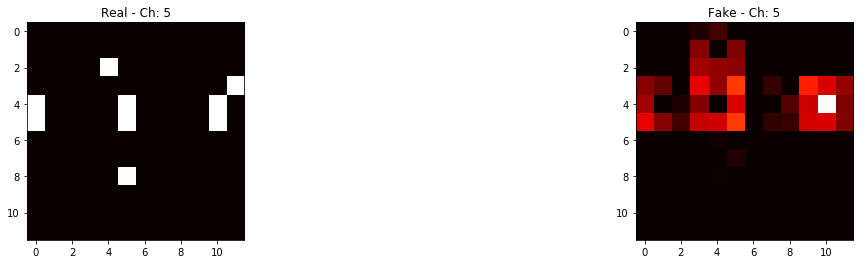

------------------------------------------------------------------------------------------------------------------------------------


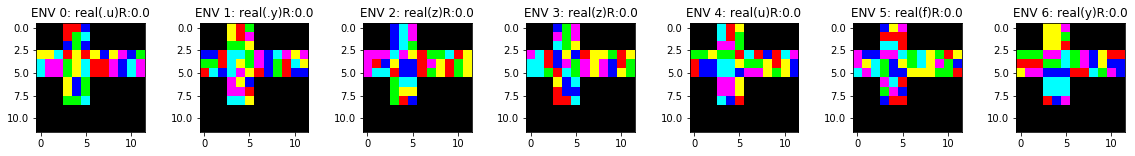

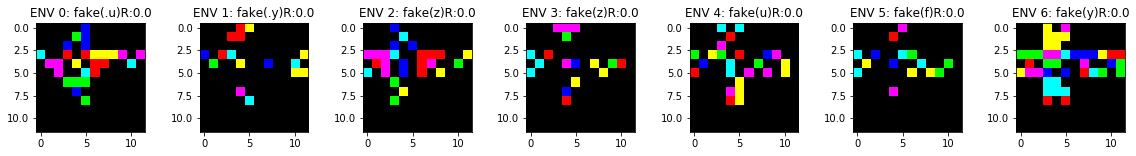

[[0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 3 5 0 0 0 0 0 0]
 [0 0 0 4 3 4 0 0 0 0 0 0]
 [2 2 5 0 2 0 2 4 2 1 4 3]
 [5 1 1 3 2 5 0 0 1 4 5 1]
 [5 1 1 3 2 5 0 0 1 4 5 1]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 3 3 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 4 3 4 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [5 5 5 0 3 0 2 2 2 1 4 1]
 [1 1 1 3 2 5 0 0 0 5 5 4]
 [0 1 1 3 5 5 0 0 0 5 5 4]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 1 1 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


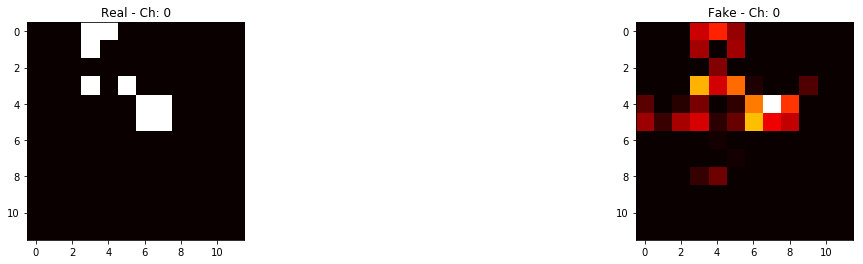

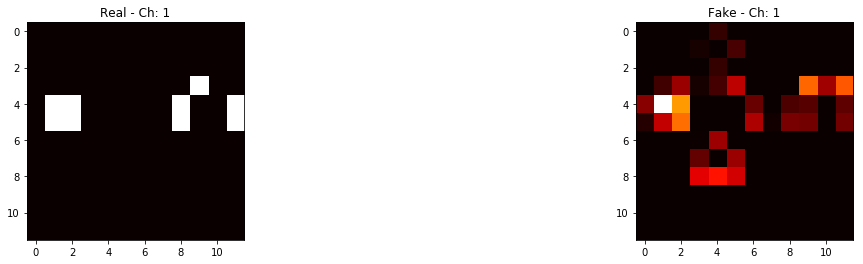

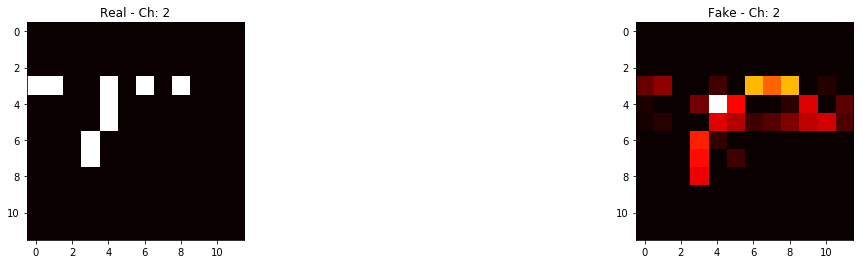

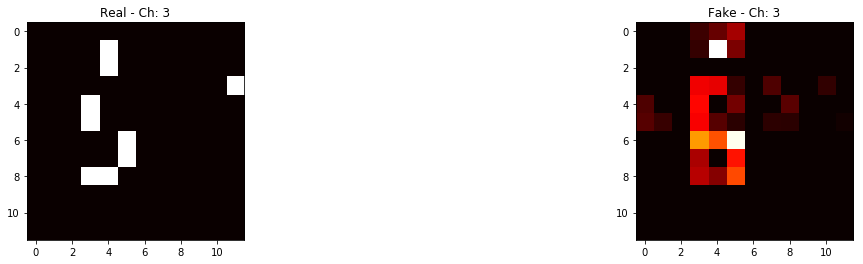

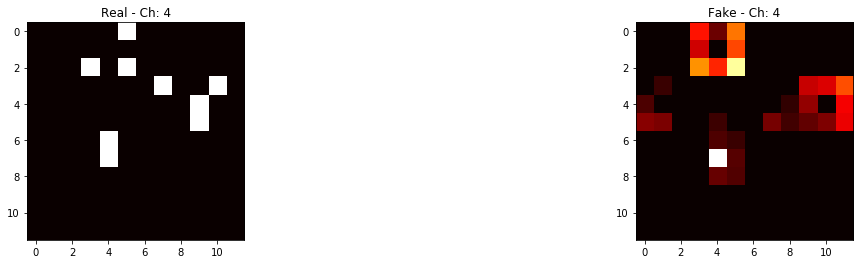

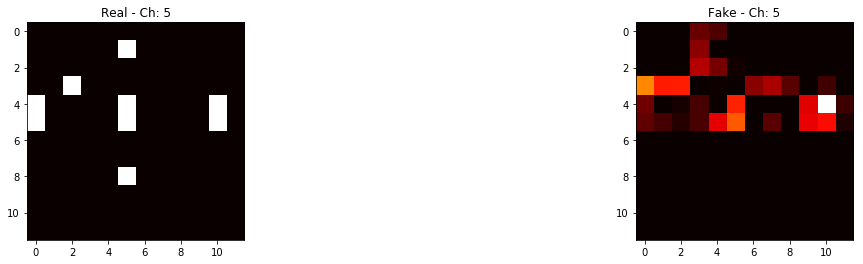

------------------------------------------------------------------------------------------------------------------------------------


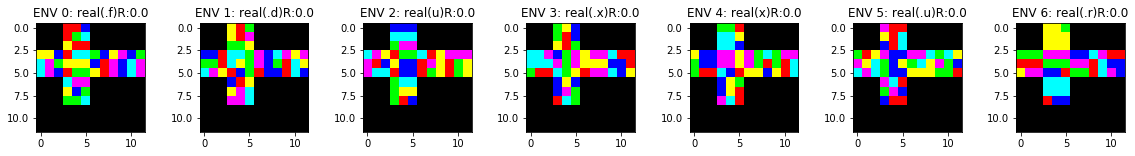

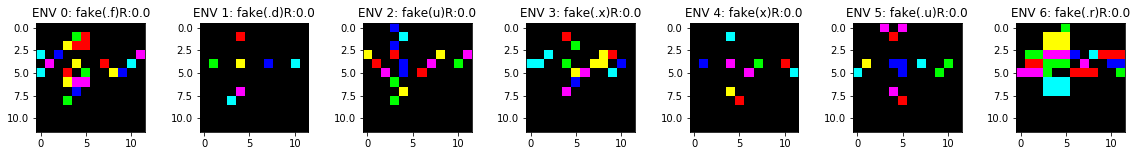

[[0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 3 5 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0]
 [2 2 4 0 5 5 3 4 2 1 4 3]
 [5 1 3 2 2 2 4 0 1 4 5 1]
 [5 1 4 0 3 3 2 0 1 4 5 1]
 [0 0 0 5 1 1 0 0 0 0 0 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 3 3 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 4 0 0 0 0 0 0 0]
 [0 0 0 4 3 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0]
 [5 5 4 0 2 5 4 2 2 4 5 1]
 [5 1 3 0 2 5 4 0 0 4 5 4]
 [5 5 3 0 3 3 2 2 2 4 4 4]
 [0 0 0 2 1 1 0 0 0 0 0 0]
 [0 0 0 3 4 1 0 0 0 0 0 0]
 [0 0 0 3 3 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


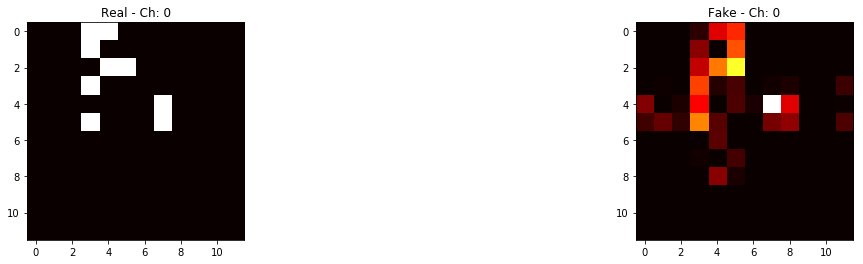

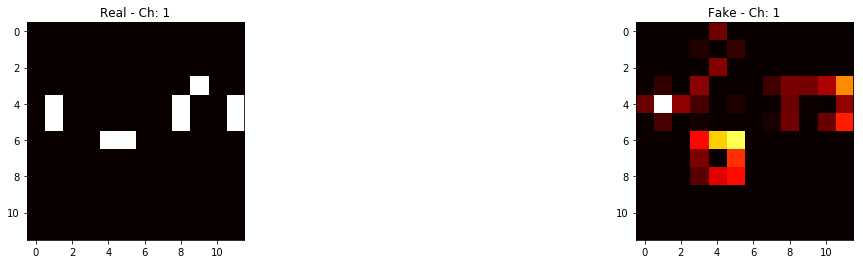

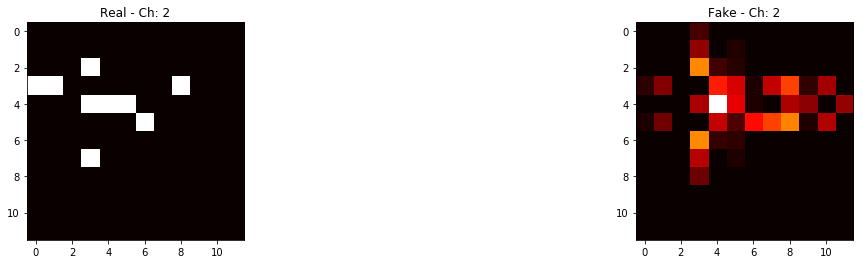

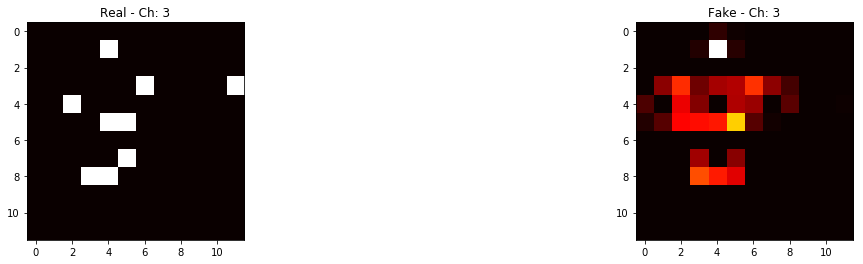

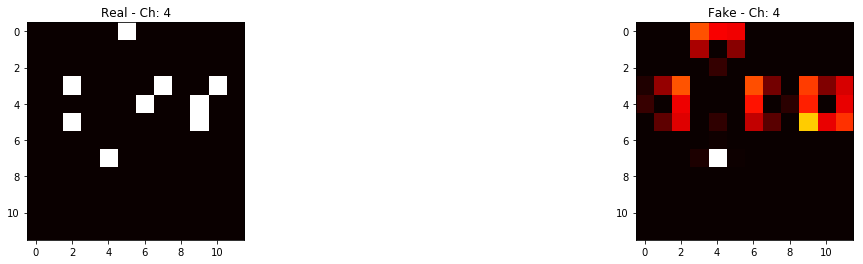

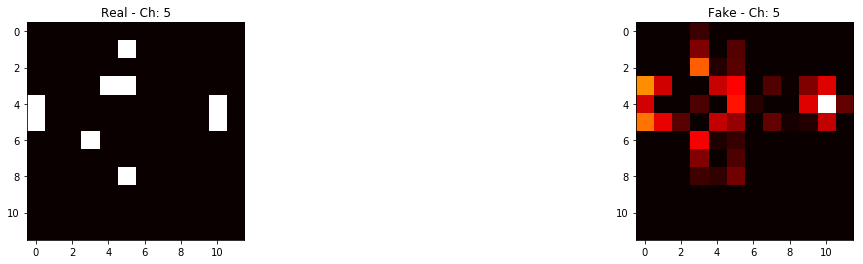

------------------------------------------------------------------------------------------------------------------------------------


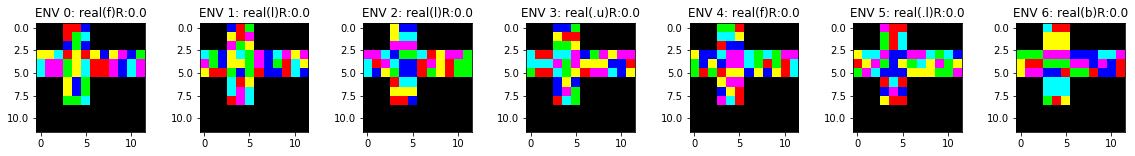

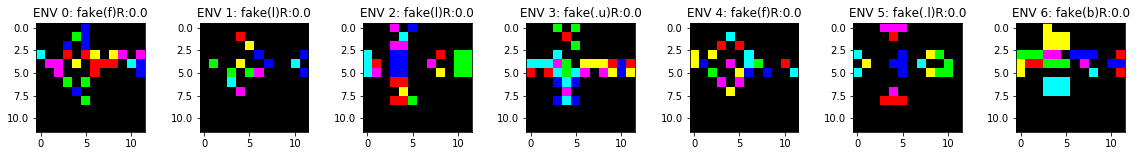

[[0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 3 5 0 0 0 0 0 0]
 [0 0 0 4 3 4 0 0 0 0 0 0]
 [2 2 5 0 2 0 2 4 2 1 4 3]
 [5 1 1 3 2 5 0 0 1 4 5 1]
 [5 1 1 3 2 5 0 0 1 4 5 1]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 3 3 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 4 3 4 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [5 5 5 0 3 0 2 2 2 1 4 4]
 [1 1 1 3 2 5 0 0 0 4 5 4]
 [5 1 1 3 2 5 0 0 0 5 5 4]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 1 1 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


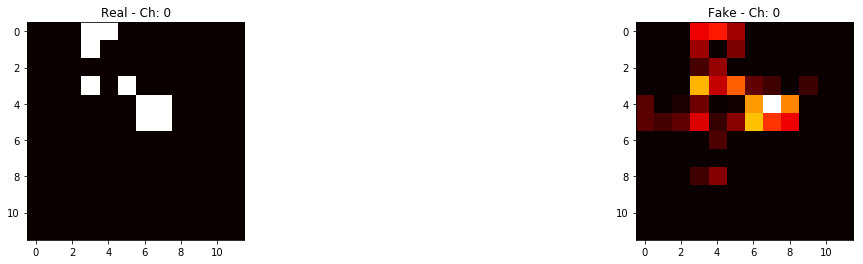

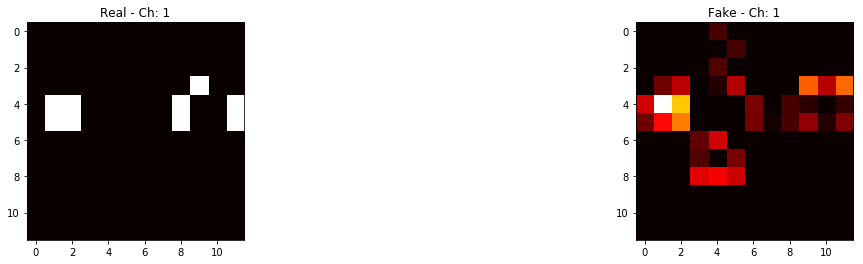

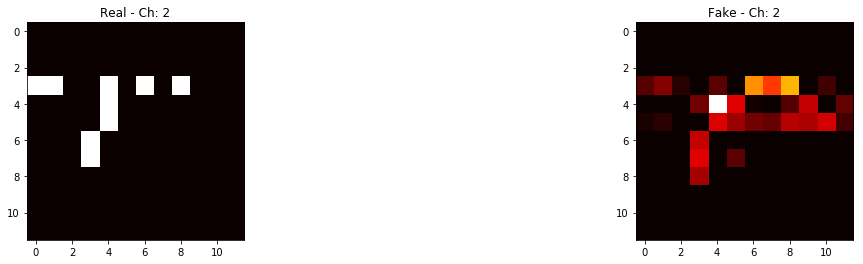

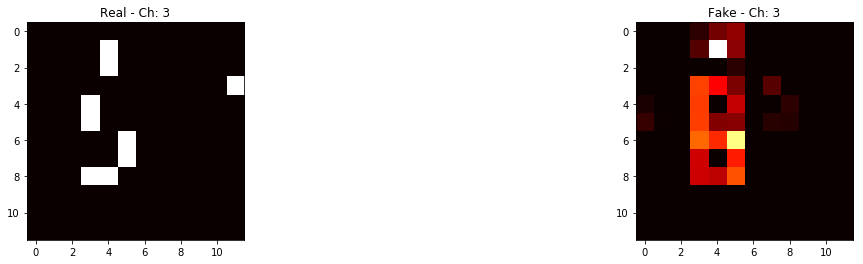

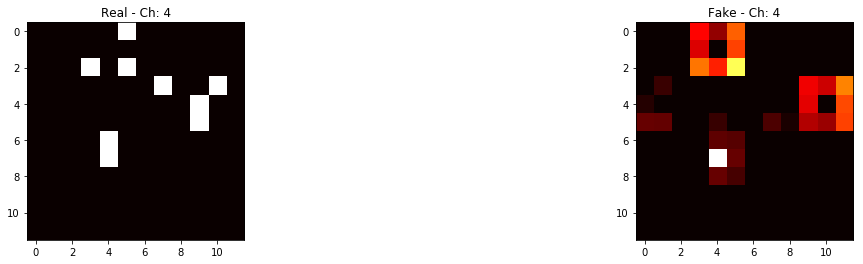

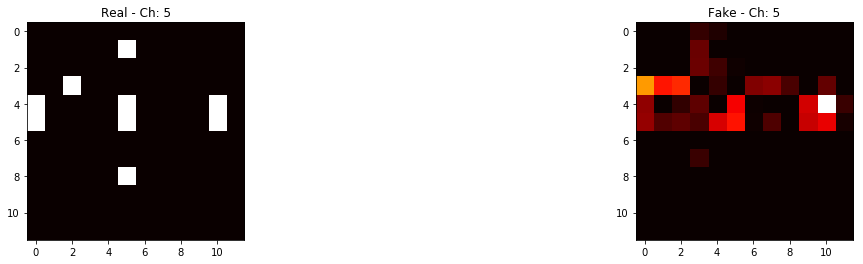

------------------------------------------------------------------------------------------------------------------------------------


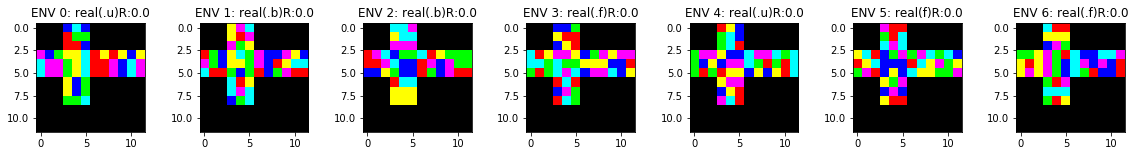

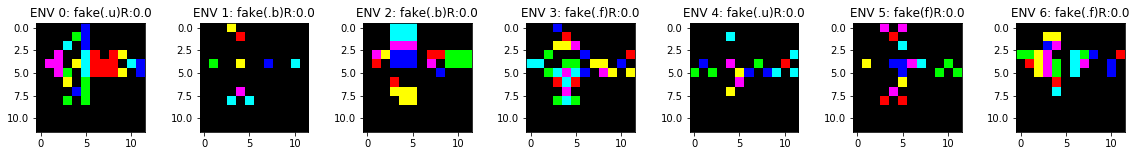

[[0 0 0 4 5 4 0 0 0 0 0 0]
 [0 0 0 0 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [1 4 3 2 2 5 0 2 0 2 4 2]
 [5 1 1 3 2 5 0 0 1 4 5 1]
 [5 1 1 3 2 5 0 0 1 4 5 1]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 3 3 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 5 3 4 0 0 0 0 0 0]
 [0 0 0 5 4 4 0 0 0 0 0 0]
 [1 1 1 3 3 5 0 0 0 2 2 2]
 [1 1 1 3 2 5 0 0 0 2 5 4]
 [1 1 1 3 3 5 0 0 0 2 4 4]
 [0 0 0 2 1 3 0 0 0 0 0 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


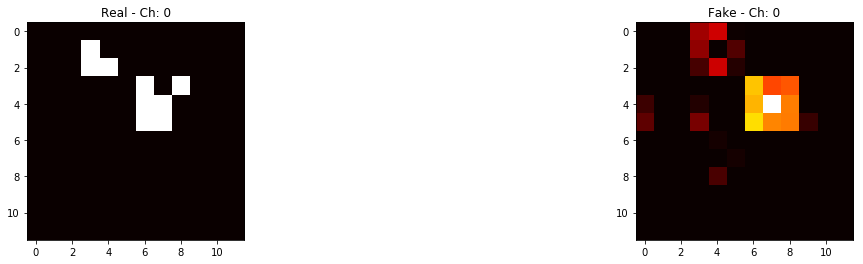

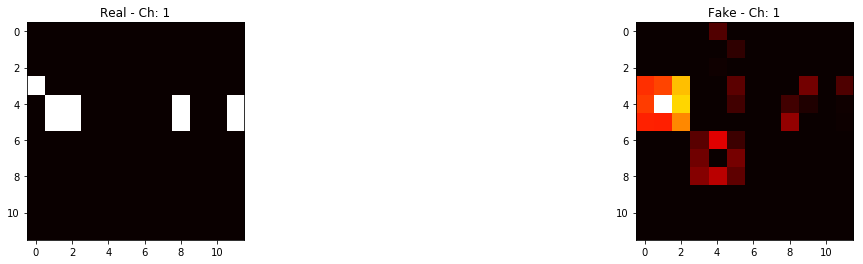

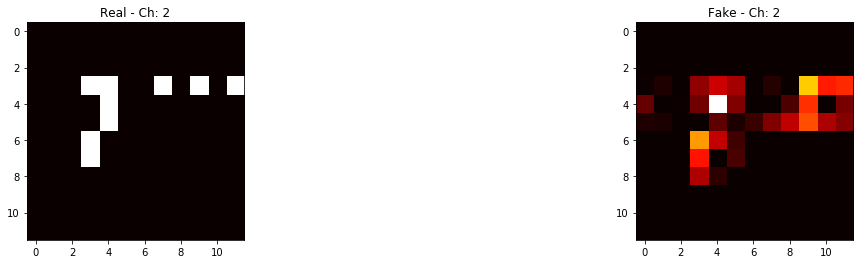

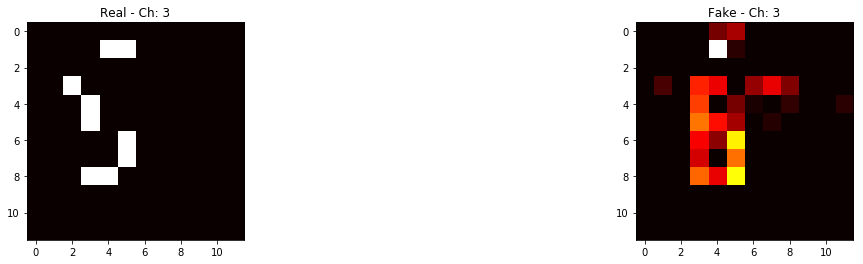

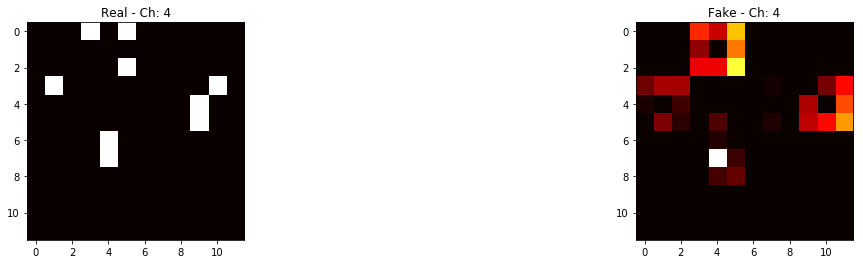

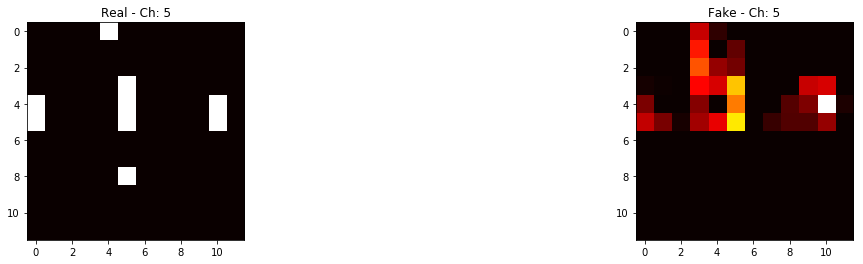

------------------------------------------------------------------------------------------------------------------------------------


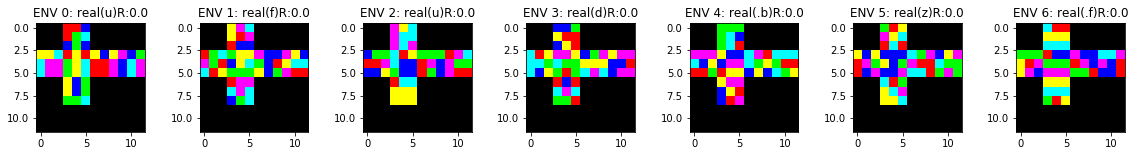

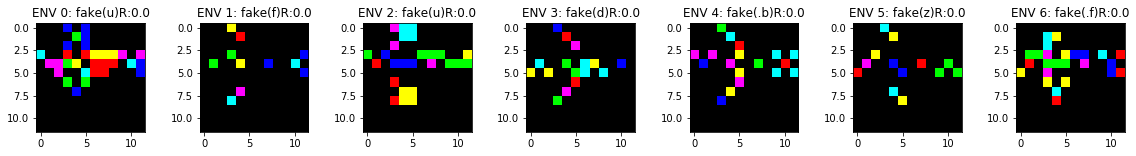

[[0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 3 5 0 0 0 0 0 0]
 [0 0 0 4 3 4 0 0 0 0 0 0]
 [2 2 5 0 2 0 2 4 2 1 4 3]
 [5 1 1 3 2 5 0 0 1 4 5 1]
 [5 1 1 3 2 5 0 0 1 4 5 1]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 3 3 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 4 3 4 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [5 5 5 0 3 0 2 2 2 1 4 4]
 [1 1 1 3 2 5 0 0 0 2 5 4]
 [1 1 1 3 5 5 0 0 0 2 2 4]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 1 1 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


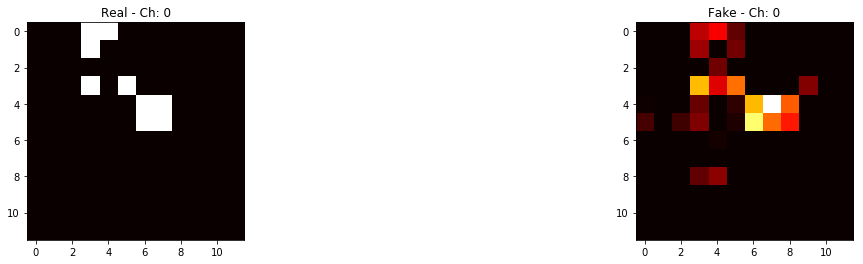

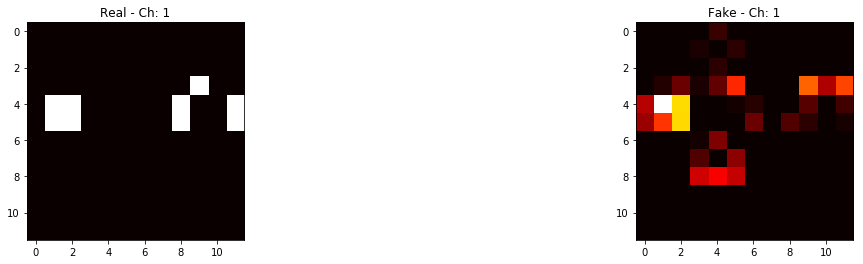

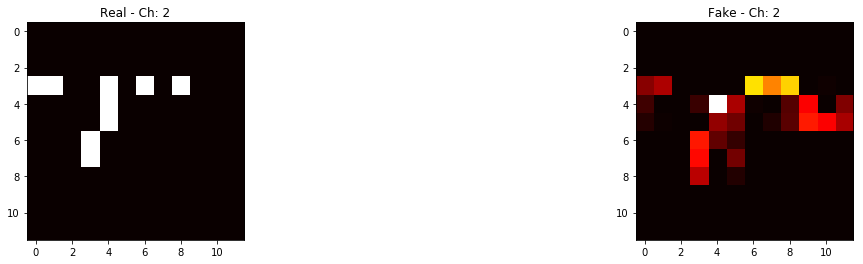

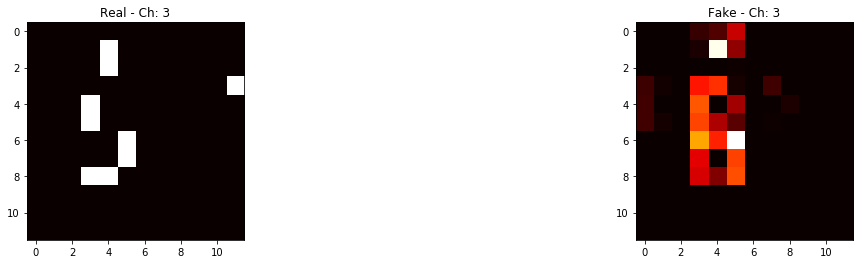

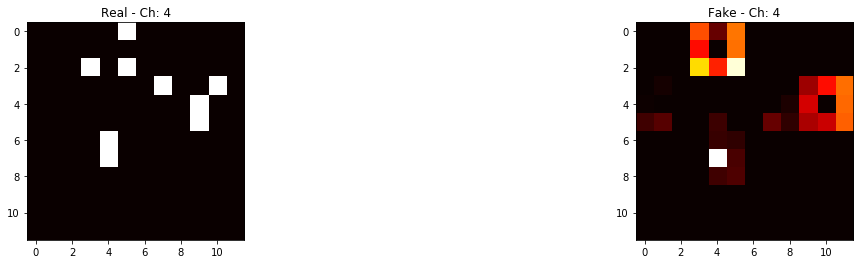

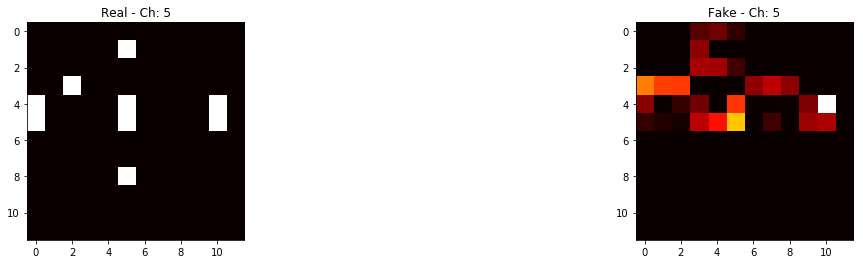

------------------------------------------------------------------------------------------------------------------------------------


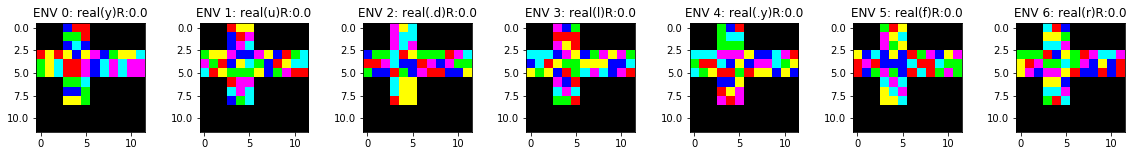

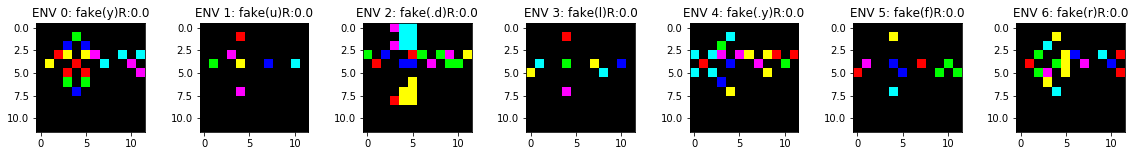

[[0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 3 3 0 0 0 0 0 0 0]
 [0 0 0 4 5 4 0 0 0 0 0 0]
 [0 2 0 2 4 2 1 4 3 2 2 5]
 [3 2 5 0 0 1 4 5 1 5 1 1]
 [3 2 5 0 0 1 4 5 1 5 1 1]
 [0 0 0 3 3 5 0 0 0 0 0 0]
 [0 0 0 4 4 3 0 0 0 0 0 0]
 [0 0 0 2 2 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 4 3 0 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [0 3 0 2 2 2 1 4 4 5 5 5]
 [3 2 0 0 0 2 1 5 4 5 1 1]
 [3 3 5 0 0 0 2 4 4 1 1 1]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 3 4 0 0 0 0 0 0 0]
 [0 0 0 3 2 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


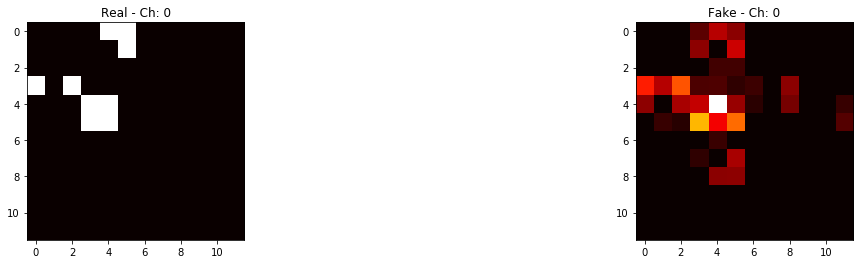

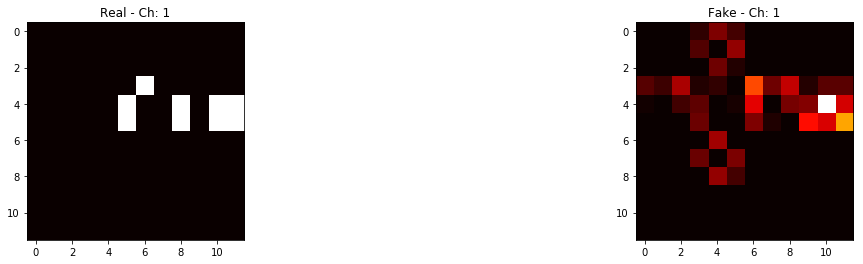

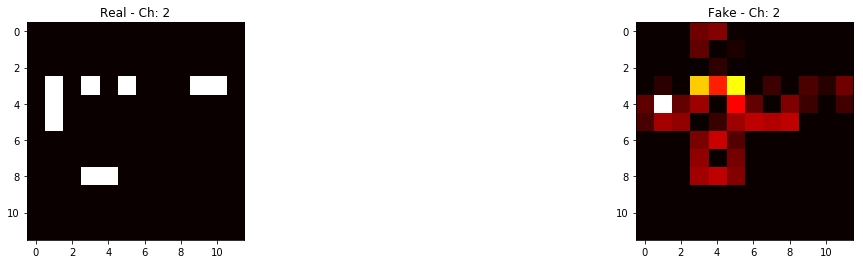

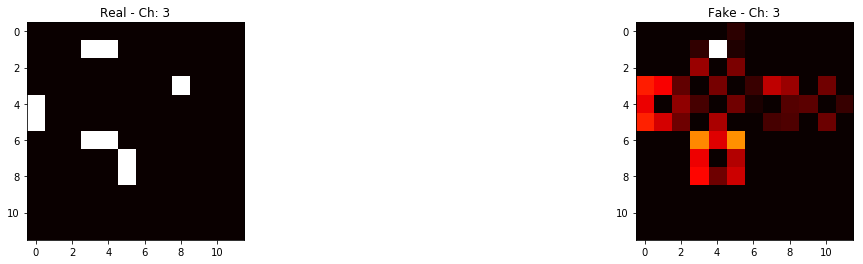

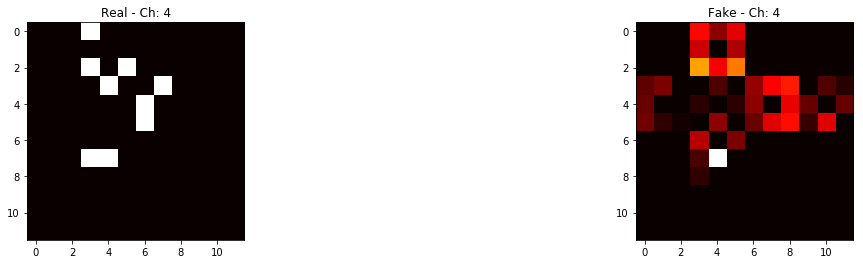

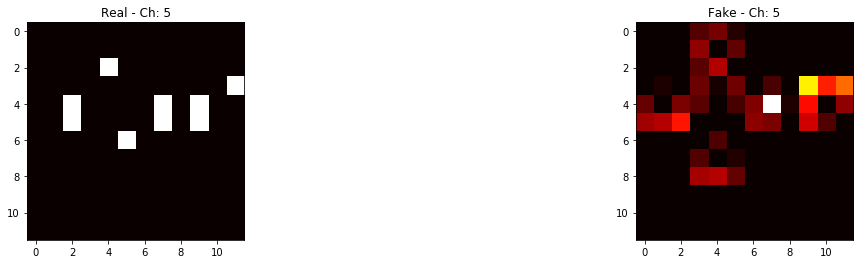

------------------------------------------------------------------------------------------------------------------------------------


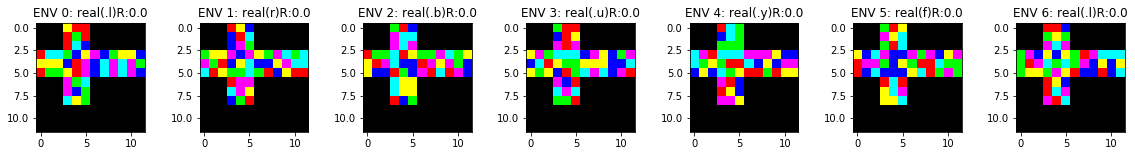

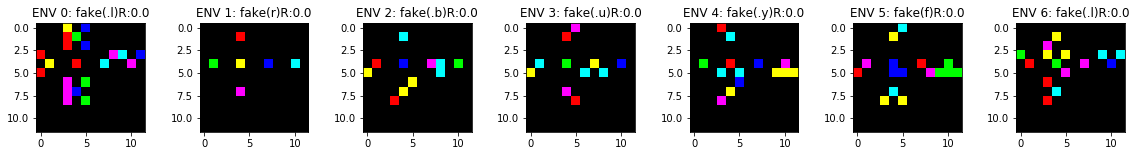

[[0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 5 4 0 0 0 0 0 0]
 [0 5 5 3 4 2 1 4 3 2 2 4]
 [2 2 2 4 0 1 4 5 1 5 1 3]
 [0 3 3 2 0 1 4 5 1 5 1 4]
 [0 0 0 1 3 5 0 0 0 0 0 0]
 [0 0 0 1 4 3 0 0 0 0 0 0]
 [0 0 0 5 2 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 4 4 0 0 0 0 0 0]
 [0 0 0 0 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 2 0 3 3 2 1 1 1 5 5 4]
 [0 2 0 3 0 0 4 5 4 5 1 4]
 [0 3 3 3 2 0 4 4 4 5 4 4]
 [0 0 0 1 1 3 0 0 0 0 0 0]
 [0 0 0 1 4 3 0 0 0 0 0 0]
 [0 0 0 1 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


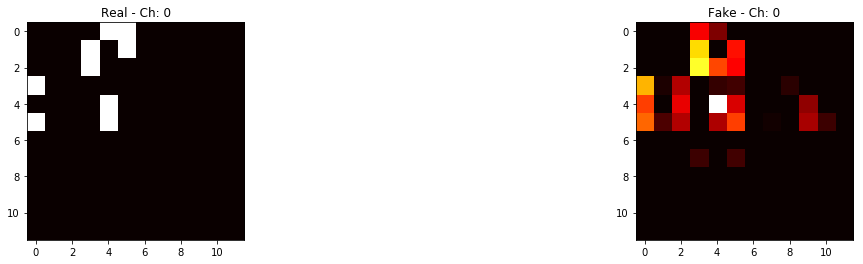

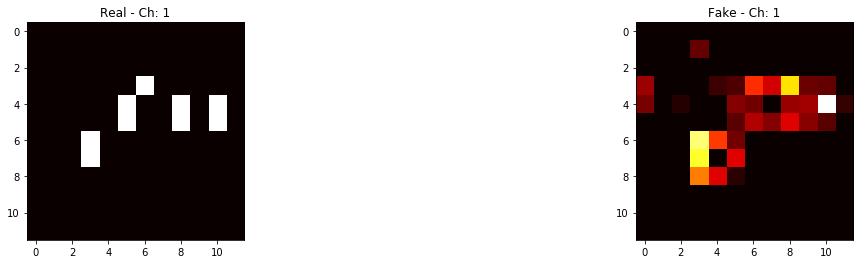

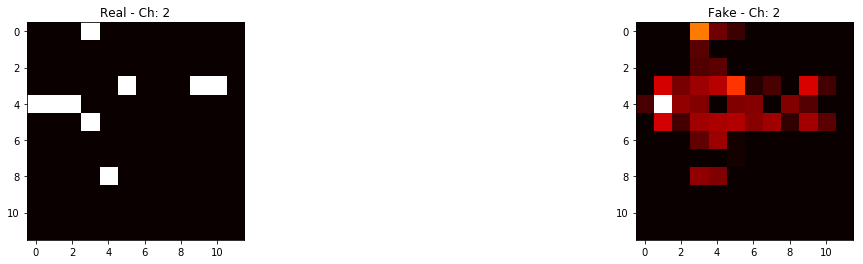

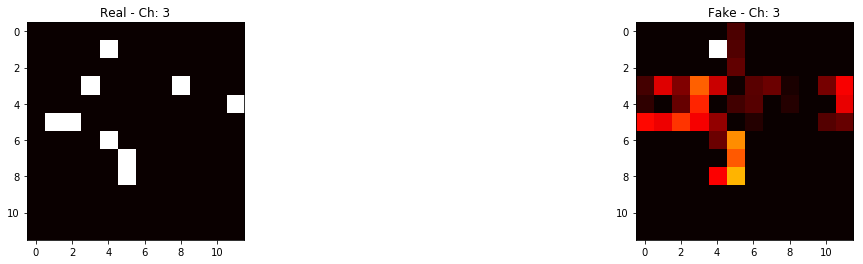

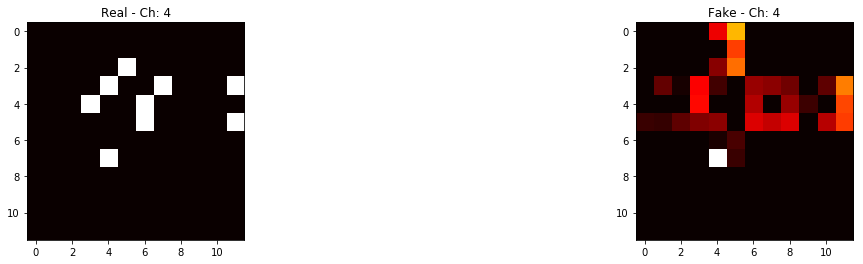

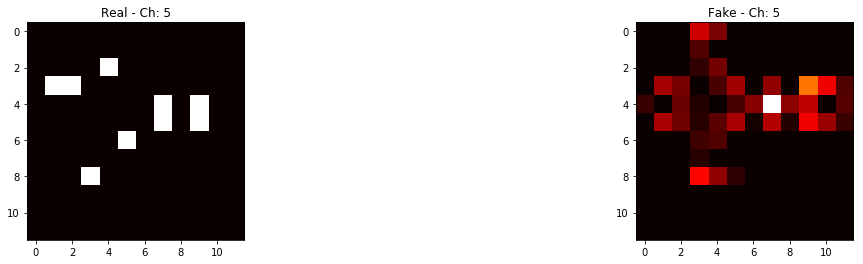

------------------------------------------------------------------------------------------------------------------------------------


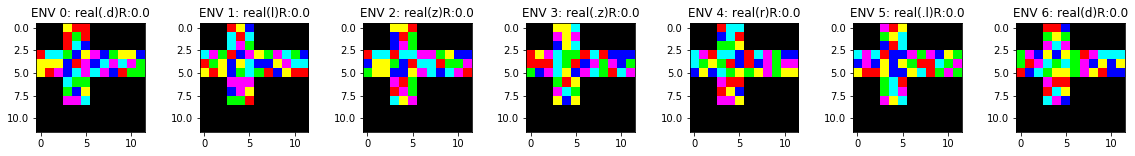

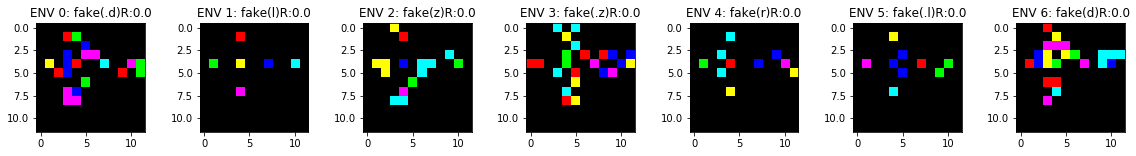

[[0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 5 4 0 0 0 0 0 0]
 [0 5 5 3 4 2 1 4 3 2 2 4]
 [2 2 2 4 0 1 4 5 1 5 1 3]
 [2 0 1 4 5 1 5 1 4 0 3 3]
 [0 0 0 5 3 3 0 0 0 0 0 0]
 [0 0 0 3 4 2 0 0 0 0 0 0]
 [0 0 0 1 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 3 0 4 5 1 1 1 1 0 2 3]
 [0 2 0 4 0 5 1 5 1 0 1 3]
 [2 2 0 4 4 1 5 5 4 0 3 3]
 [0 0 0 1 3 3 0 0 0 0 0 0]
 [0 0 0 1 4 3 0 0 0 0 0 0]
 [0 0 0 1 1 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


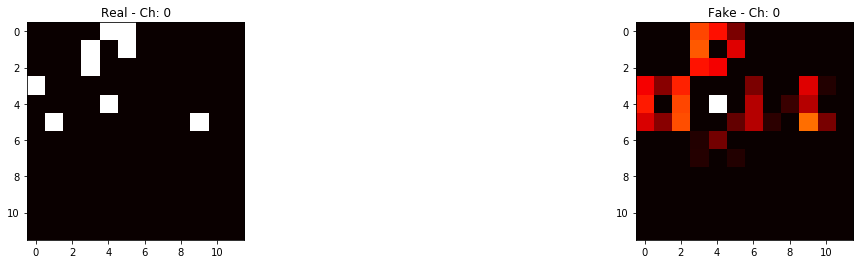

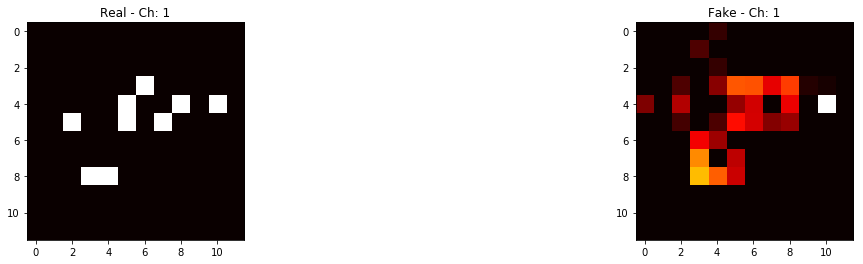

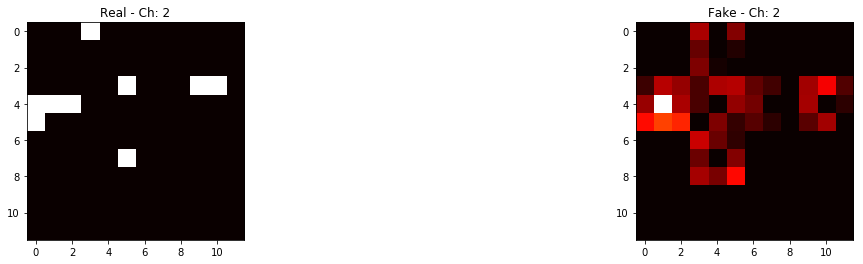

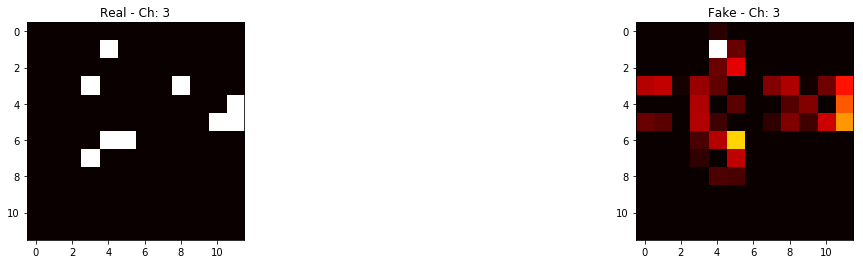

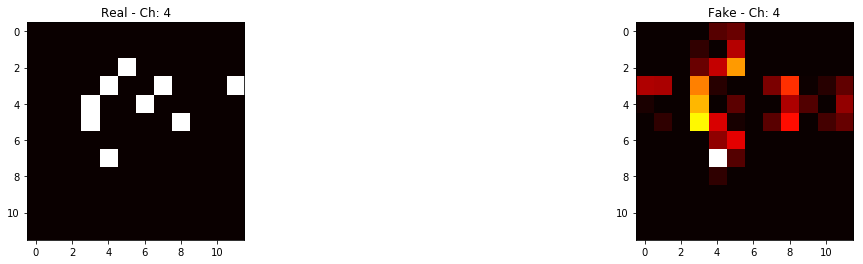

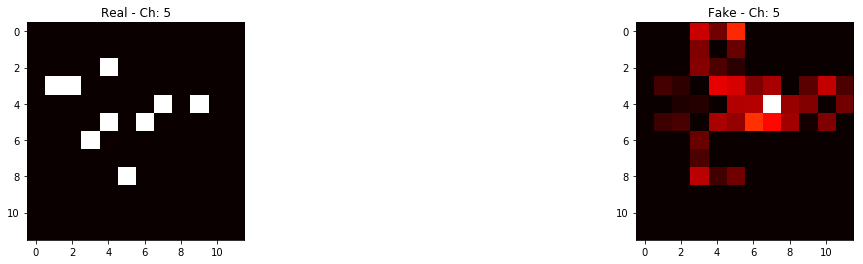

------------------------------------------------------------------------------------------------------------------------------------


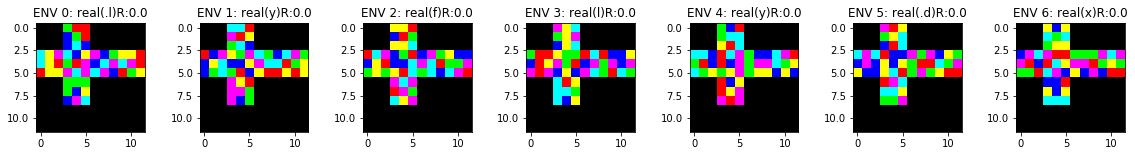

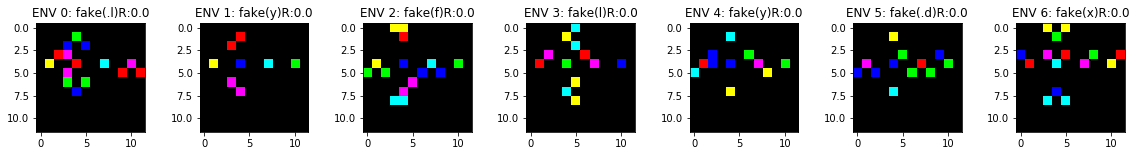

[[0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 4 3 0 0 0 0 0 0 0]
 [0 0 0 4 5 4 0 0 0 0 0 0]
 [5 2 1 5 4 2 1 4 3 2 2 0]
 [5 2 0 3 0 1 4 5 1 5 1 0]
 [0 2 2 1 5 1 5 1 4 0 3 2]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 3 4 2 0 0 0 0 0 0]
 [0 0 0 4 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 0 5 0 0 0 0 0 0]
 [0 0 0 4 3 4 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [4 0 0 1 5 1 1 3 3 0 2 0]
 [0 2 0 1 0 5 1 5 1 2 1 0]
 [2 2 2 1 5 1 5 5 5 0 2 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 3 4 3 0 0 0 0 0 0]
 [0 0 0 3 1 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


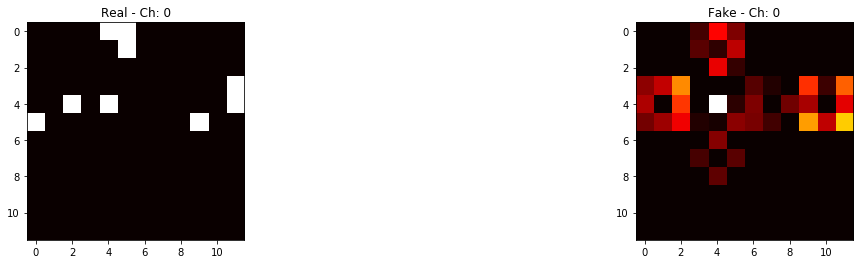

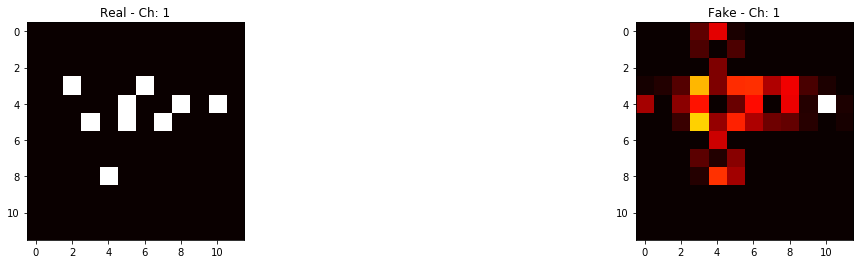

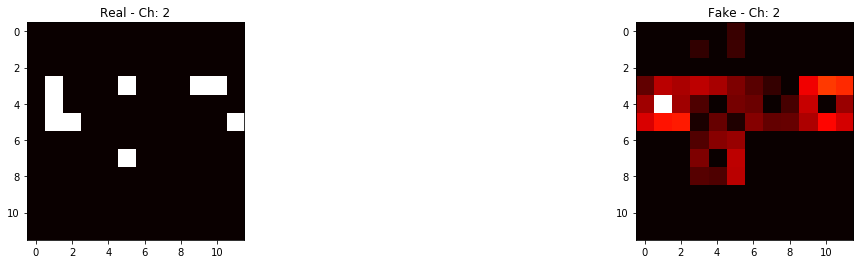

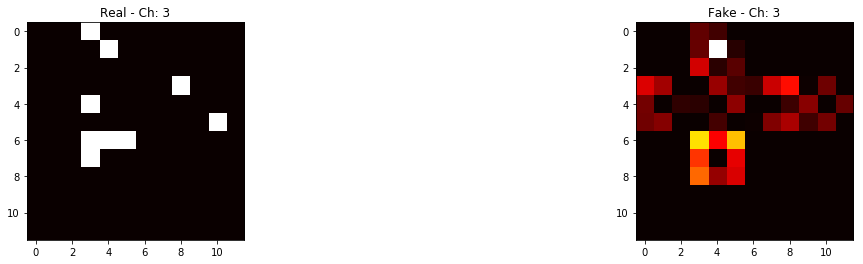

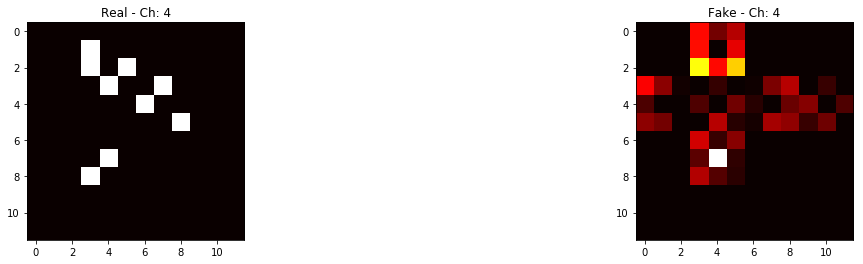

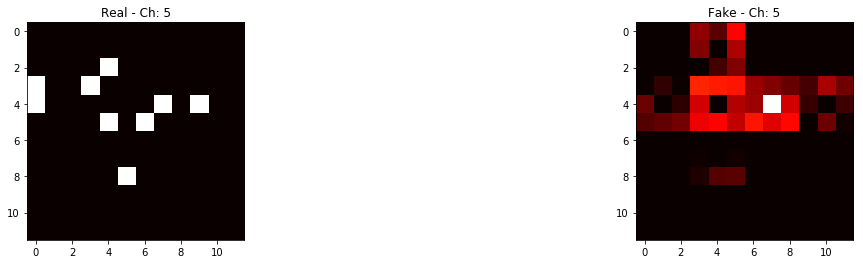

------------------------------------------------------------------------------------------------------------------------------------


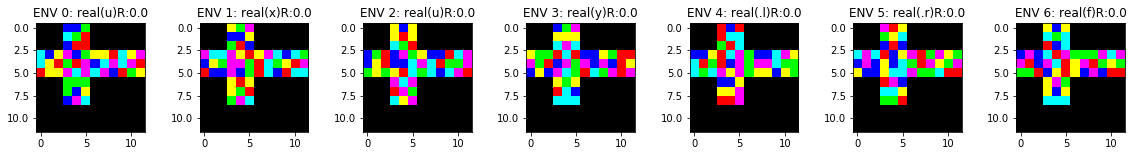

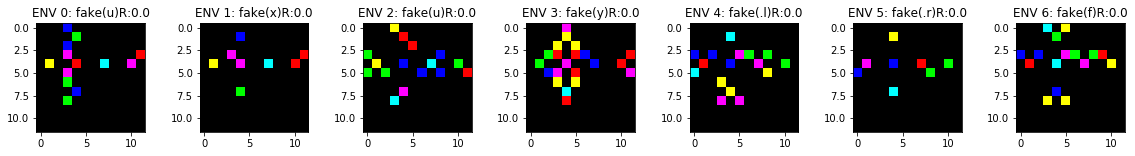

[[0 0 0 4 4 3 0 0 0 0 0 0]
 [0 0 0 5 3 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [5 4 2 1 4 3 2 2 0 5 2 1]
 [5 2 0 3 0 1 4 5 1 5 1 0]
 [0 2 2 1 5 1 5 1 4 0 3 2]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 3 4 2 0 0 0 0 0 0]
 [0 0 0 4 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 4 3 0 0 0 0 0 0 0]
 [0 0 0 4 0 4 0 0 0 0 0 0]
 [2 2 2 1 3 1 5 5 1 0 3 0]
 [1 2 2 1 0 5 2 5 1 2 1 0]
 [0 2 2 1 5 5 5 5 1 0 2 0]
 [0 0 0 3 1 3 0 0 0 0 0 0]
 [0 0 0 3 4 1 0 0 0 0 0 0]
 [0 0 0 3 1 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


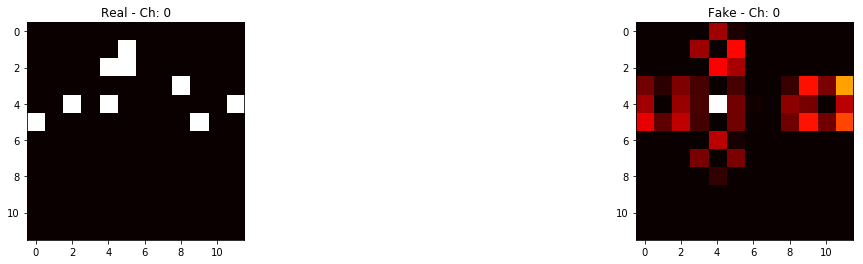

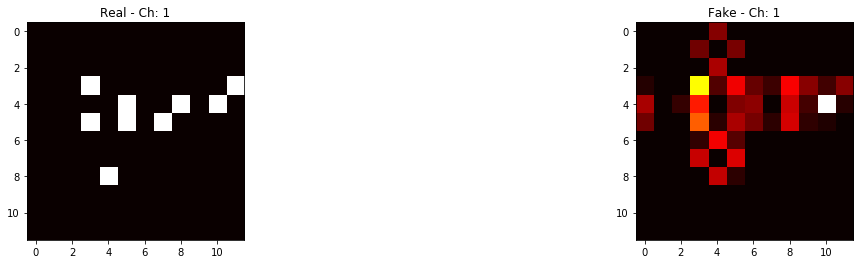

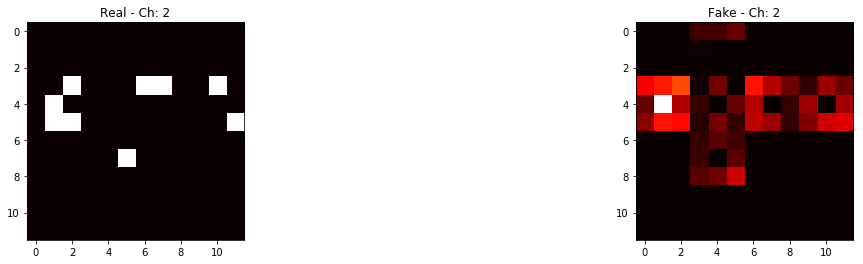

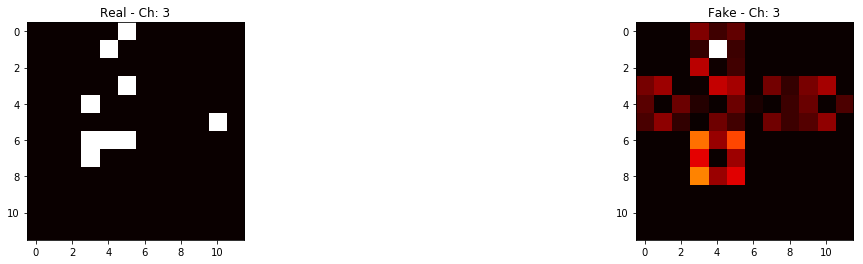

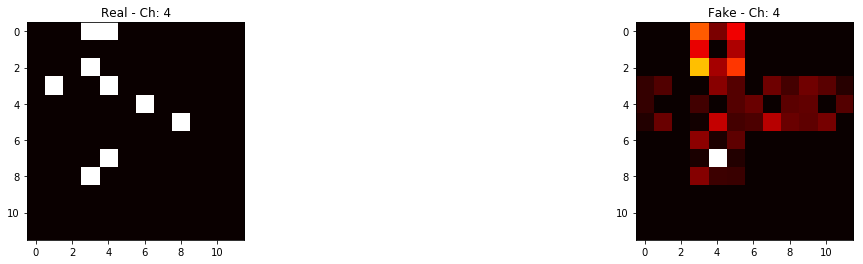

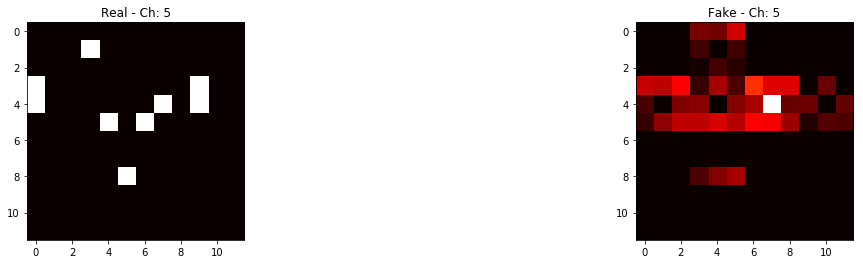

------------------------------------------------------------------------------------------------------------------------------------


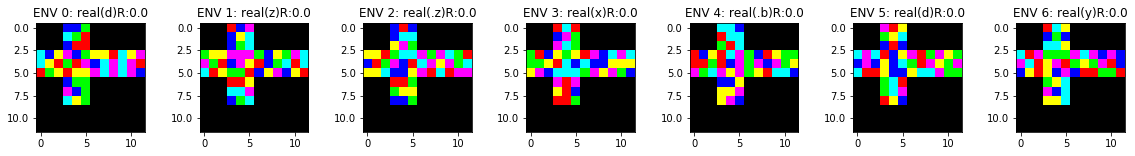

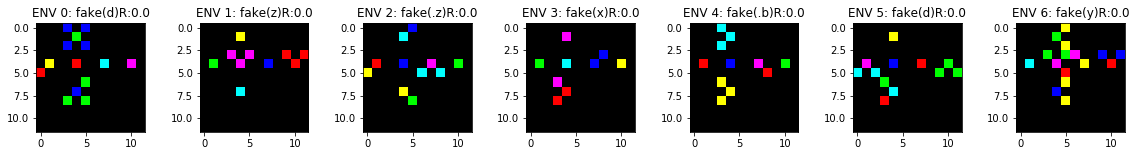

[[0 0 0 4 4 3 0 0 0 0 0 0]
 [0 0 0 5 3 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [5 4 2 1 4 3 2 2 0 5 2 1]
 [5 2 0 3 0 1 4 5 1 5 1 0]
 [0 3 2 0 2 2 1 5 1 5 1 4]
 [0 0 0 4 3 3 0 0 0 0 0 0]
 [0 0 0 1 4 3 0 0 0 0 0 0]
 [0 0 0 5 2 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 4 3 0 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [0 3 2 0 2 2 5 5 1 5 5 1]
 [0 2 2 0 0 2 5 5 1 5 1 1]
 [0 0 0 0 2 2 1 4 1 5 5 4]
 [0 0 0 3 1 3 0 0 0 0 0 0]
 [0 0 0 3 4 1 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


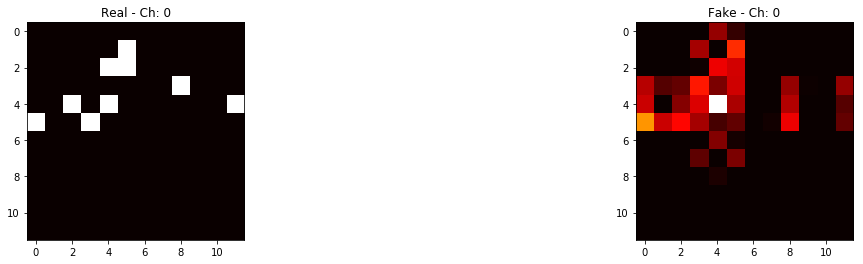

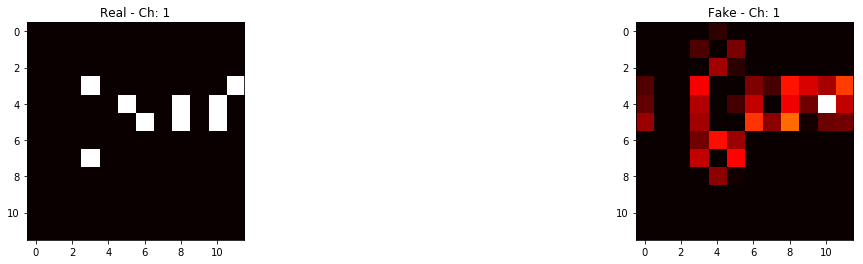

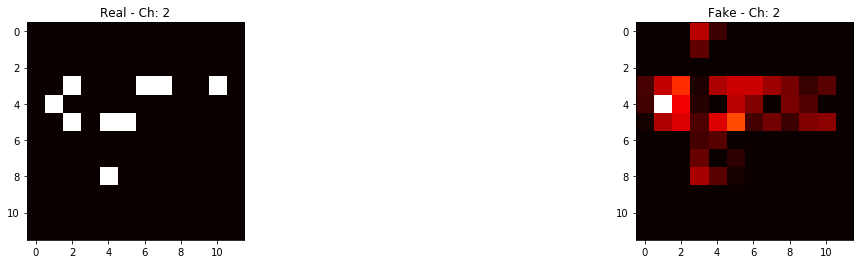

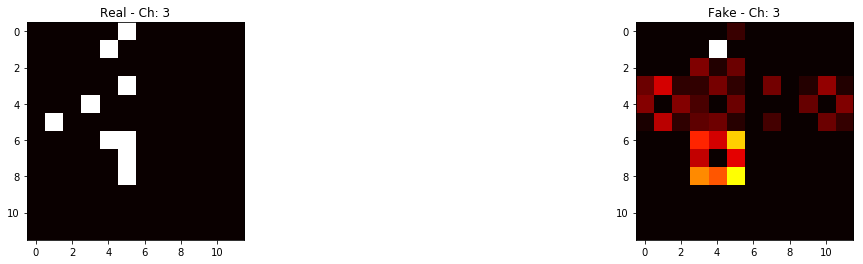

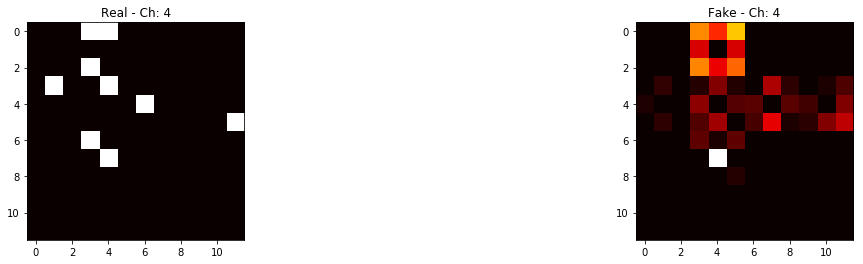

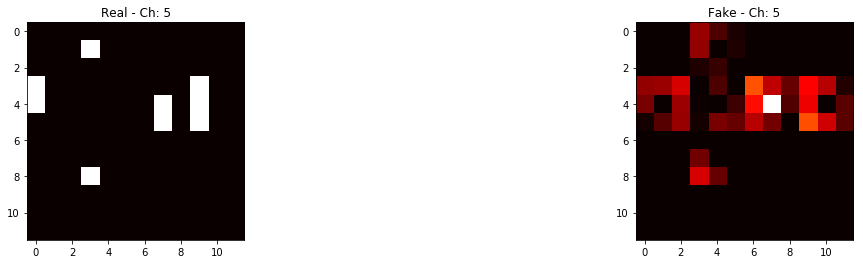

------------------------------------------------------------------------------------------------------------------------------------


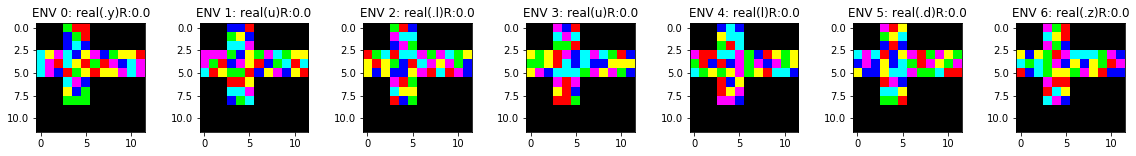

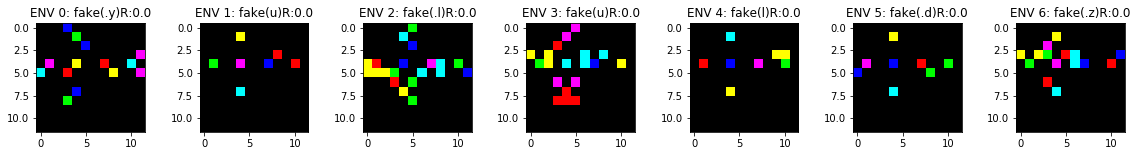

[[0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 4 3 0 0 0 0 0 0 0]
 [0 0 0 4 5 4 0 0 0 0 0 0]
 [5 2 1 5 4 2 1 4 3 2 2 0]
 [5 1 0 5 2 0 3 0 1 4 5 1]
 [5 1 4 0 3 2 0 2 2 1 5 1]
 [0 0 0 5 1 4 0 0 0 0 0 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [5 4 1 0 3 5 0 3 3 2 2 1]
 [5 1 1 0 2 5 0 0 2 4 5 1]
 [5 5 5 0 3 0 0 2 2 4 4 1]
 [0 0 0 3 1 3 0 0 0 0 0 0]
 [0 0 0 3 4 1 0 0 0 0 0 0]
 [0 0 0 3 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


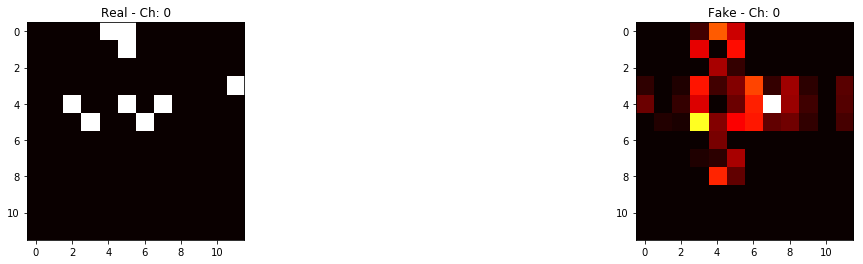

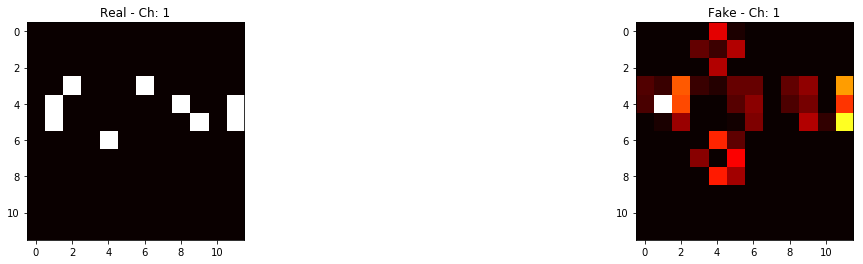

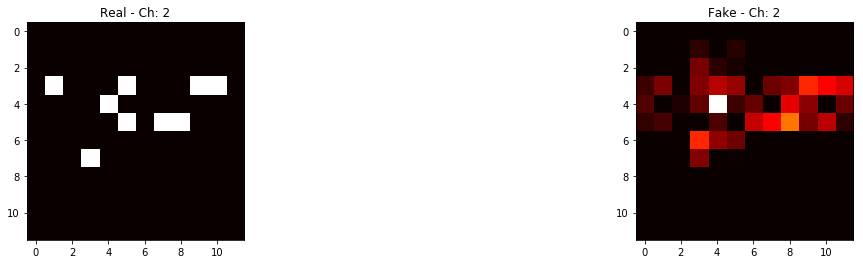

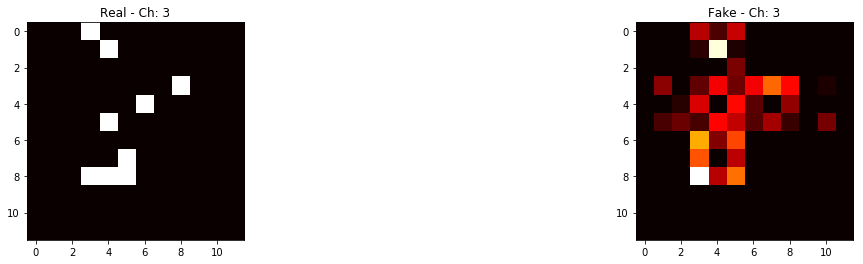

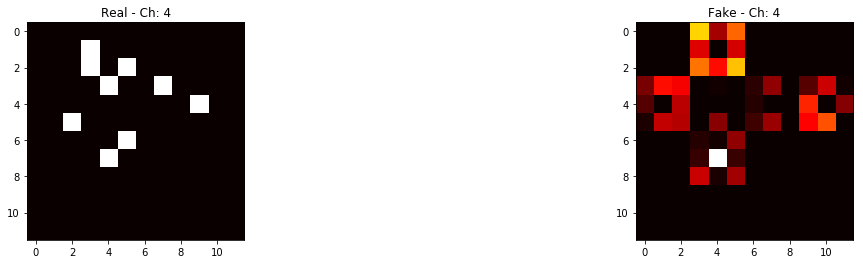

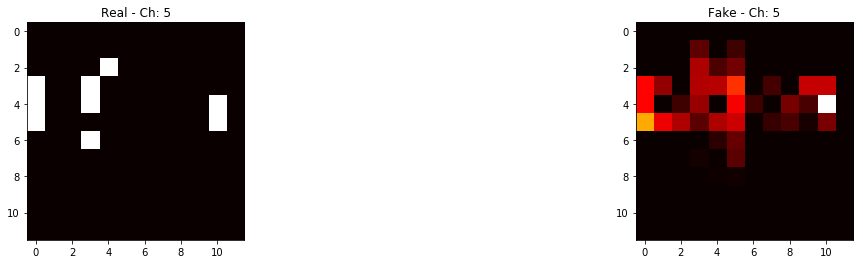

------------------------------------------------------------------------------------------------------------------------------------


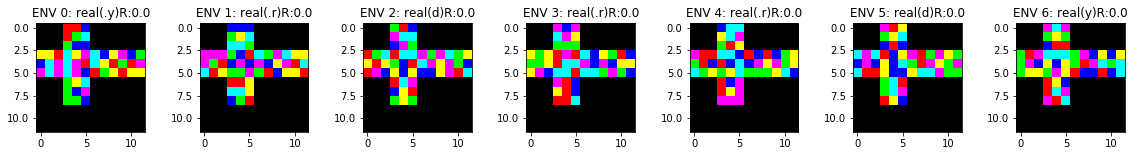

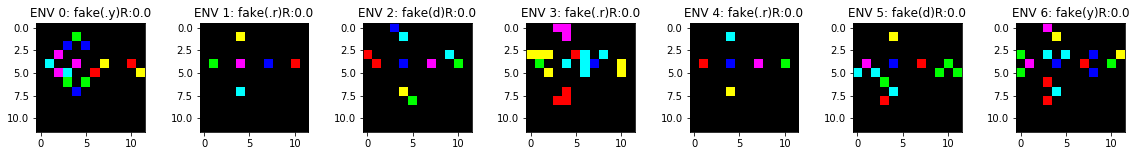

[[0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 3 5 0 0 0 0 0 0]
 [0 0 0 3 4 4 0 0 0 0 0 0]
 [2 2 0 5 2 1 5 4 2 1 4 3]
 [4 5 1 5 1 0 5 2 0 3 0 1]
 [1 5 1 5 1 4 0 3 2 0 2 2]
 [0 0 0 3 2 5 0 0 0 0 0 0]
 [0 0 0 3 4 1 0 0 0 0 0 0]
 [0 0 0 3 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 0 3 4 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [2 2 1 5 3 1 0 3 5 0 2 2]
 [5 5 1 5 1 1 0 2 5 0 0 1]
 [4 4 1 5 5 5 0 3 0 0 2 2]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 1 4 5 0 0 0 0 0 0]
 [0 0 0 3 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


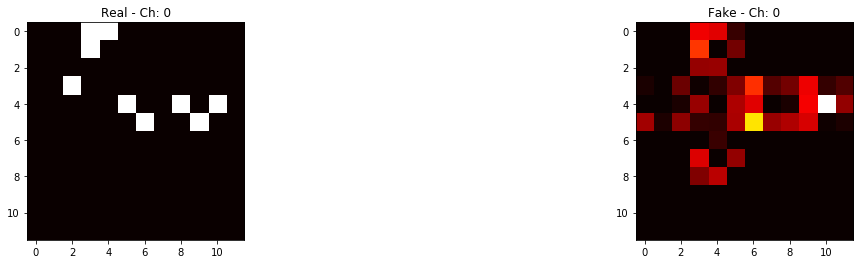

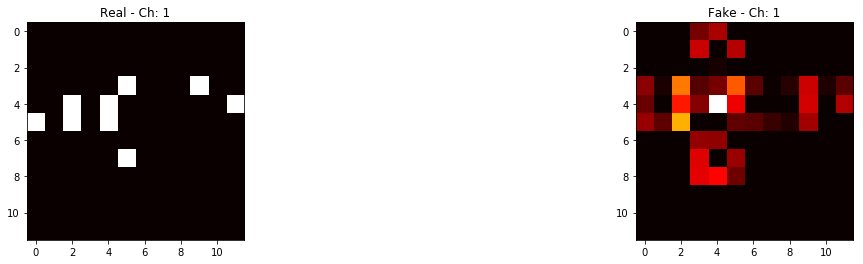

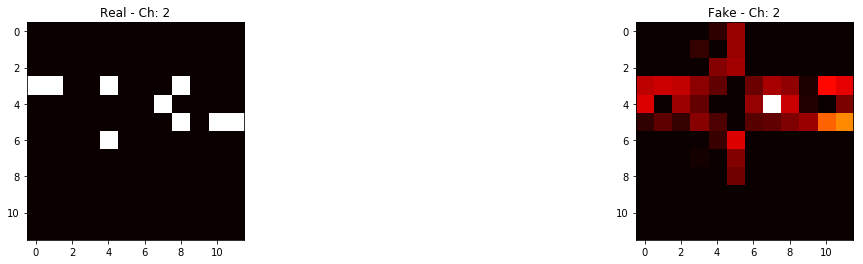

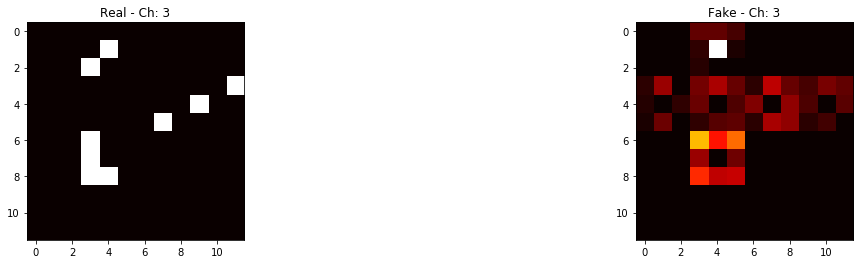

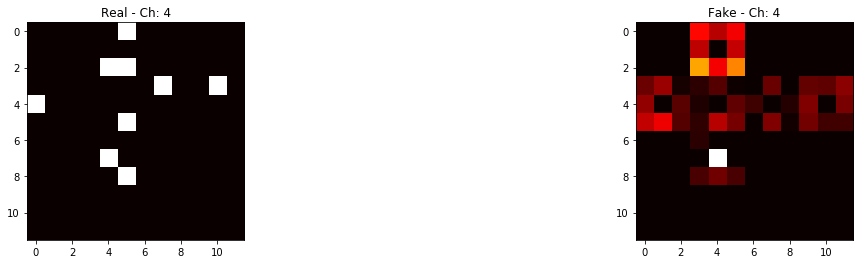

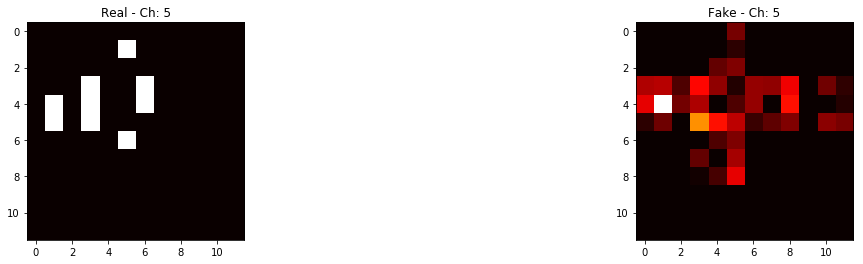

------------------------------------------------------------------------------------------------------------------------------------


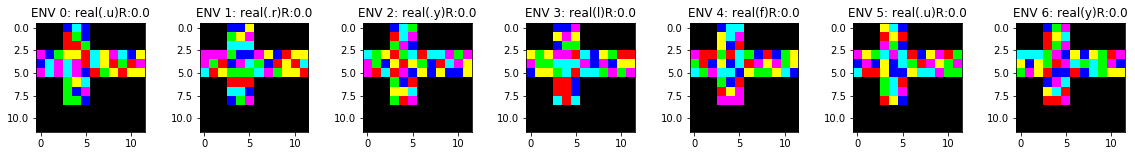

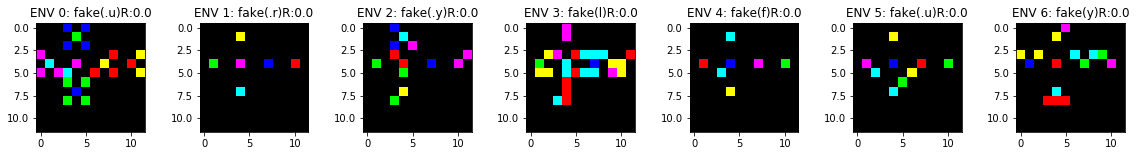

[[0 0 0 4 5 4 0 0 0 0 0 0]
 [0 0 0 0 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [1 4 3 2 2 0 5 2 1 5 4 2]
 [4 5 1 5 1 0 5 2 0 3 0 1]
 [1 5 1 5 1 4 0 3 2 0 2 2]
 [0 0 0 3 2 5 0 0 0 0 0 0]
 [0 0 0 3 4 1 0 0 0 0 0 0]
 [0 0 0 3 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 0 3 4 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [1 3 1 5 5 0 0 3 0 1 2 2]
 [1 5 1 5 1 0 2 2 2 1 0 2]
 [1 4 1 5 5 0 0 0 0 2 2 2]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 1 4 3 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


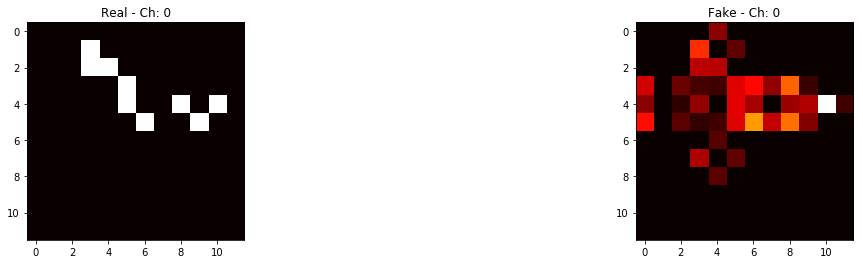

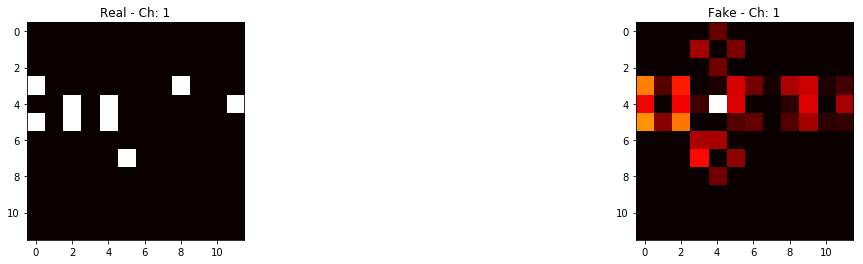

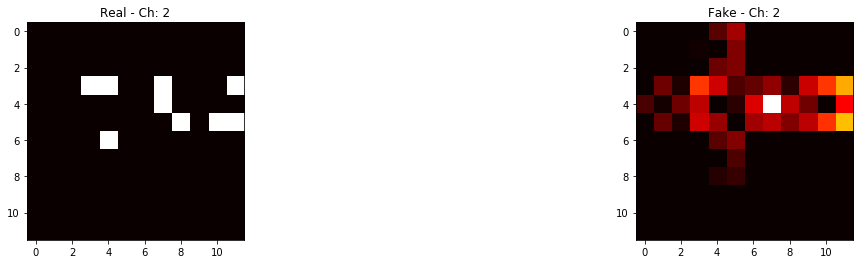

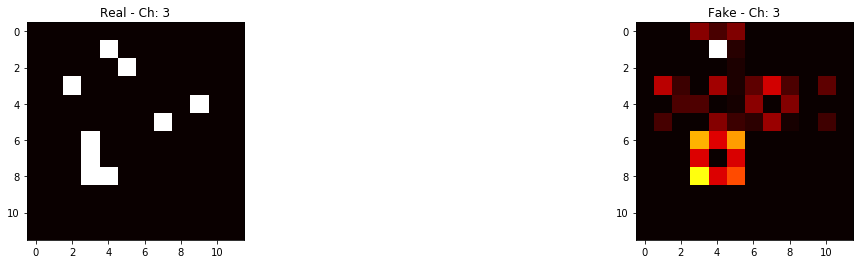

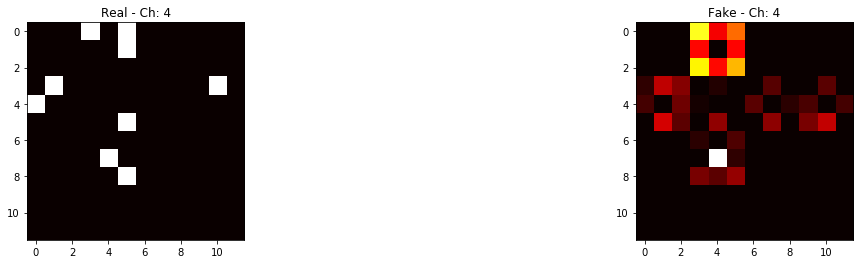

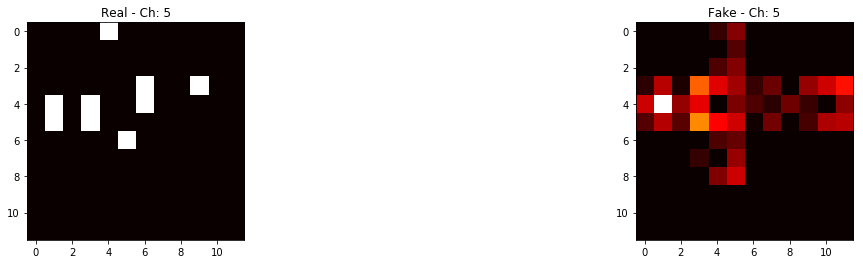

------------------------------------------------------------------------------------------------------------------------------------


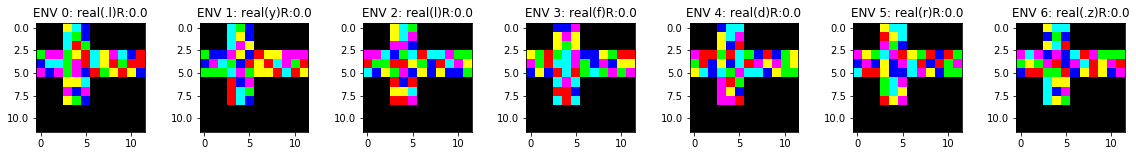

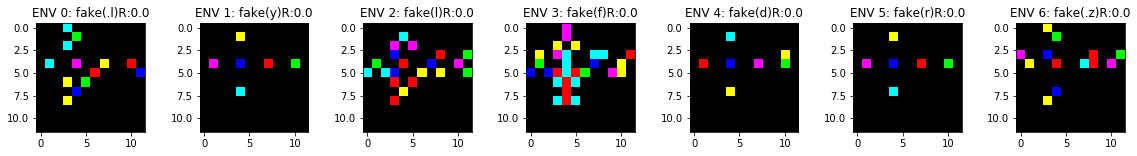

[[0 0 0 2 5 4 0 0 0 0 0 0]
 [0 0 0 5 3 4 0 0 0 0 0 0]
 [0 0 0 5 0 3 0 0 0 0 0 0]
 [3 1 1 3 2 0 5 2 1 5 4 0]
 [4 5 5 3 1 0 5 2 0 3 0 0]
 [1 4 1 3 1 4 0 3 2 0 2 4]
 [0 0 0 2 2 5 0 0 0 0 0 0]
 [0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 2 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 4 4 0 0 0 0 0 0]
 [0 0 0 0 3 4 0 0 0 0 0 0]
 [0 0 0 5 5 4 0 0 0 0 0 0]
 [1 4 1 3 3 1 0 3 0 0 2 4]
 [1 5 1 3 1 1 0 2 0 0 0 4]
 [1 5 1 3 3 5 0 2 0 5 5 4]
 [0 0 0 2 2 3 0 0 0 0 0 0]
 [0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 2 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


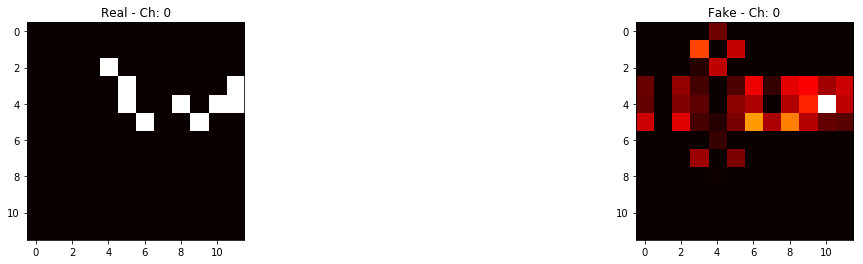

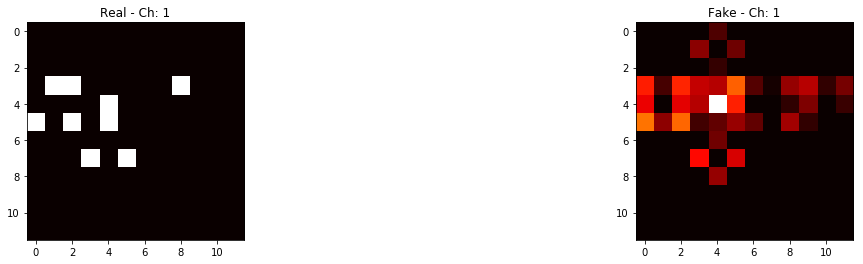

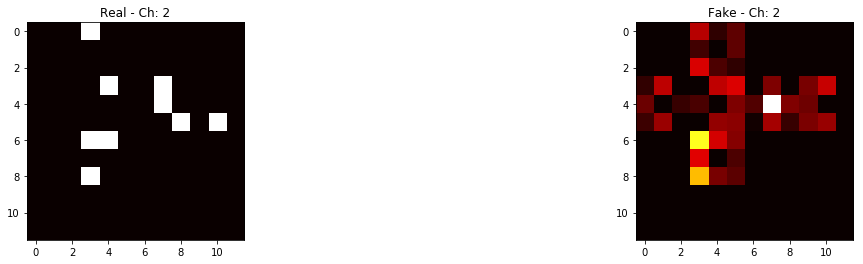

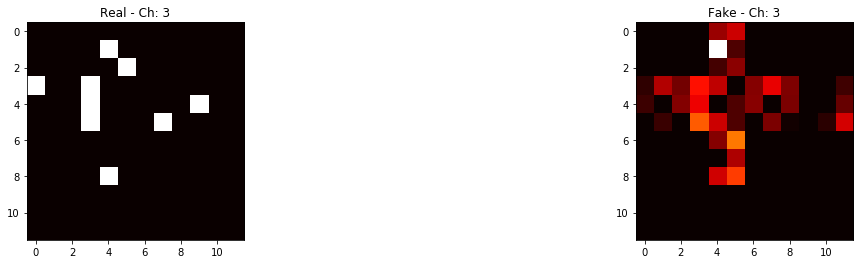

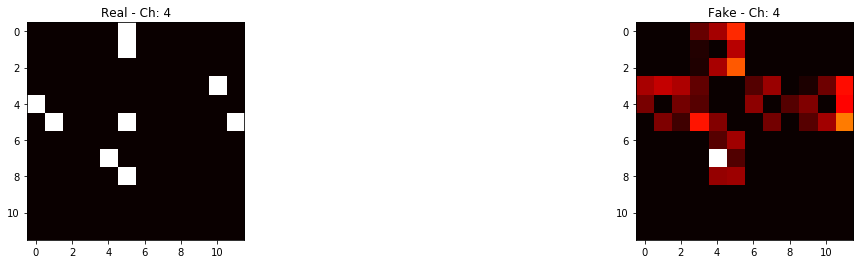

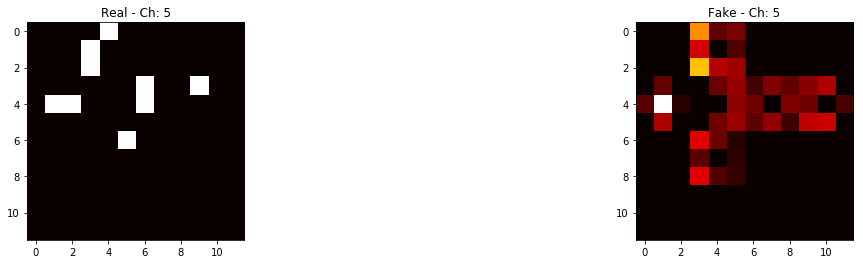

------------------------------------------------------------------------------------------------------------------------------------


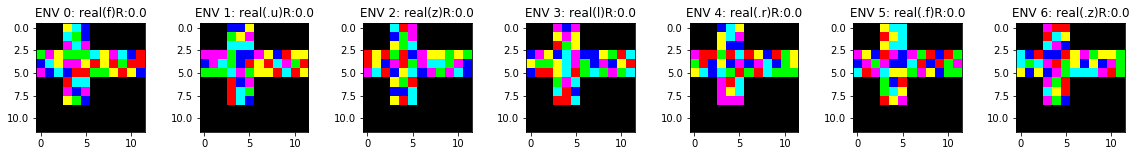

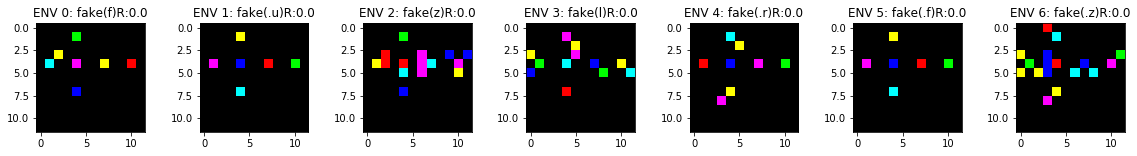

[[0 0 0 2 5 4 0 0 0 0 0 0]
 [0 0 0 5 3 4 0 0 0 0 0 0]
 [0 0 0 1 5 1 0 0 0 0 0 0]
 [3 1 2 3 3 3 5 2 1 5 4 0]
 [4 5 2 1 1 2 0 2 0 3 0 0]
 [1 4 5 4 0 0 3 3 2 0 2 4]
 [0 0 0 0 5 5 0 0 0 0 0 0]
 [0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 2 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 5 4 0 0 0 0 0 0]
 [0 0 0 5 3 4 0 0 0 0 0 0]
 [0 0 0 1 4 4 0 0 0 0 0 0]
 [1 2 2 3 3 3 5 3 0 4 0 4]
 [4 5 2 1 1 1 5 2 0 5 0 4]
 [1 4 2 3 1 0 5 3 0 5 4 4]
 [0 0 0 0 2 3 0 0 0 0 0 0]
 [0 0 0 2 4 2 0 0 0 0 0 0]
 [0 0 0 5 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


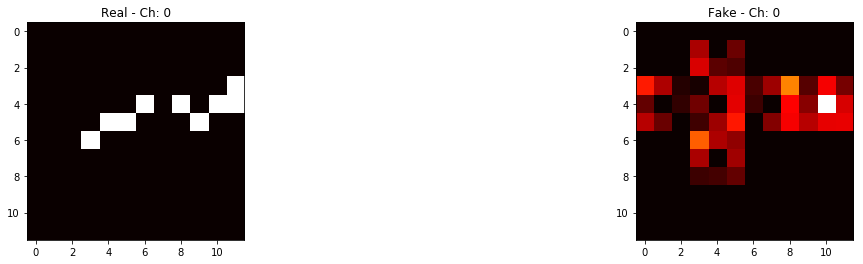

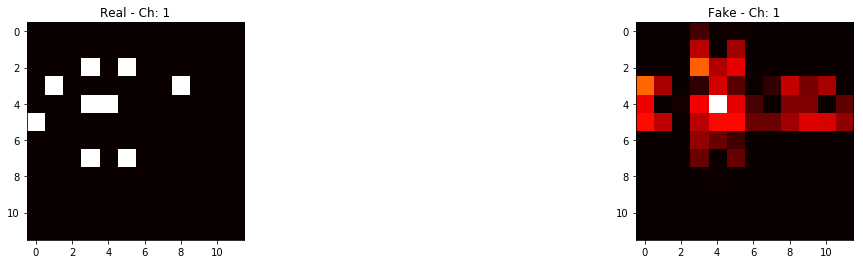

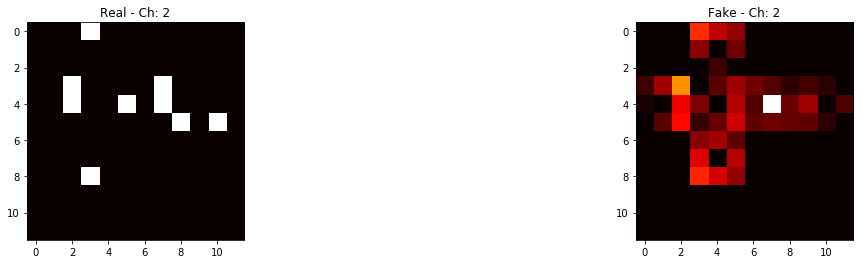

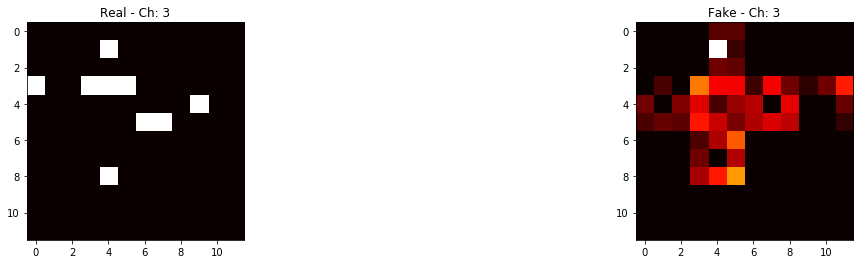

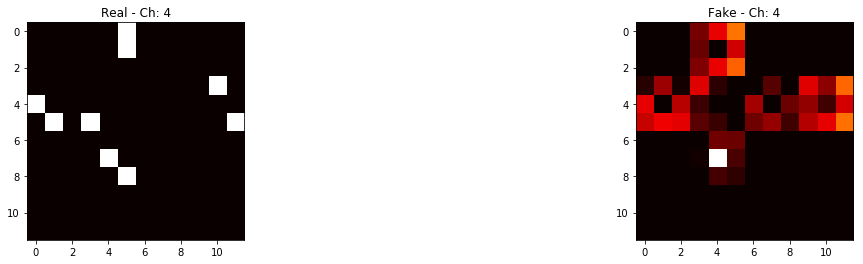

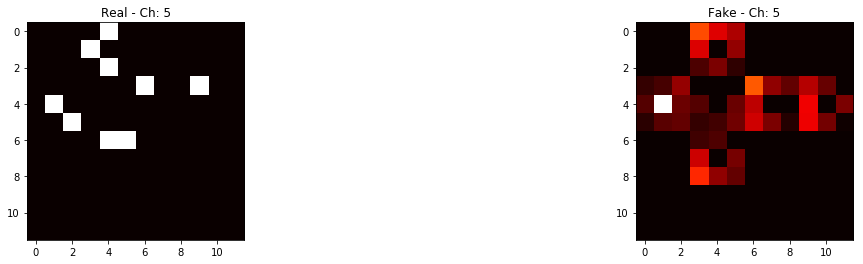

------------------------------------------------------------------------------------------------------------------------------------


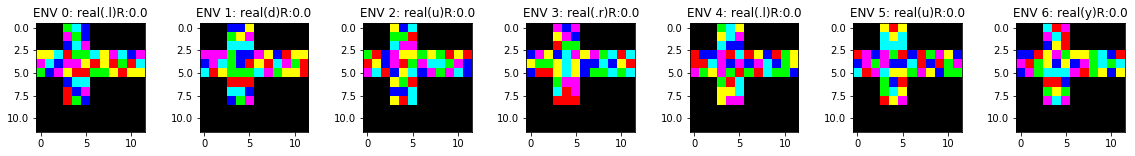

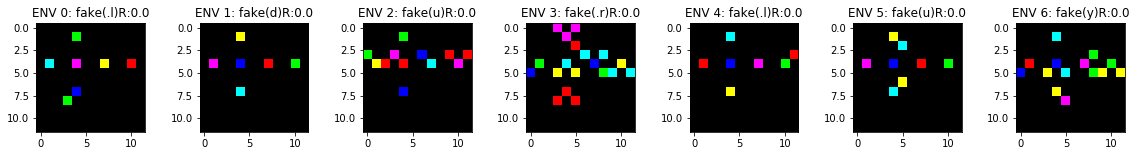

[[0 0 0 3 5 4 0 0 0 0 0 0]
 [0 0 0 1 3 4 0 0 0 0 0 0]
 [0 0 0 4 5 1 0 0 0 0 0 0]
 [2 2 5 0 3 3 5 2 1 5 4 1]
 [1 5 4 1 1 2 0 2 0 3 0 5]
 [3 4 1 2 0 0 3 3 2 0 2 2]
 [0 0 0 4 5 5 0 0 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0 0 0]
 [0 0 0 0 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 1 4 0 0 0 0 0 0]
 [0 0 0 4 3 4 0 0 0 0 0 0]
 [0 0 0 4 1 4 0 0 0 0 0 0]
 [5 5 5 3 3 0 5 5 5 4 4 0]
 [1 5 4 2 1 2 1 2 0 5 0 5]
 [4 4 4 2 2 0 3 3 3 1 5 5]
 [0 0 0 3 0 3 0 0 0 0 0 0]
 [0 0 0 3 4 3 0 0 0 0 0 0]
 [0 0 0 3 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


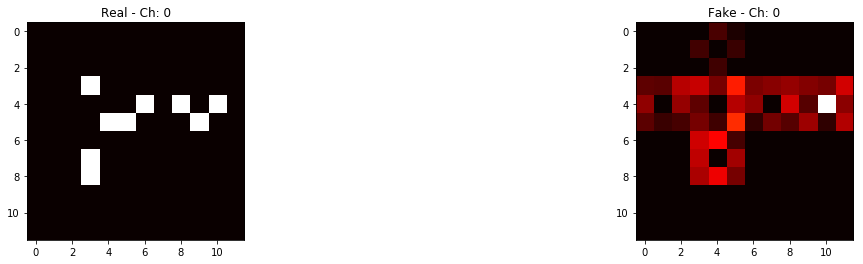

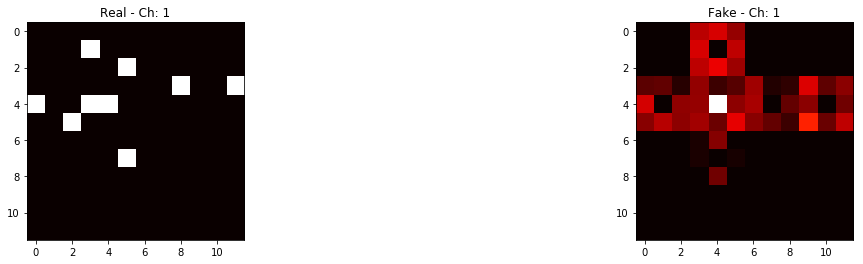

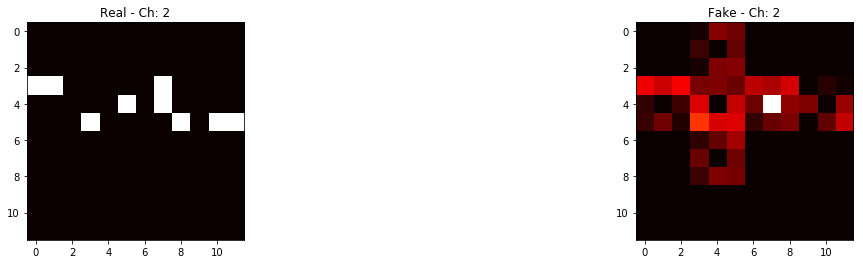

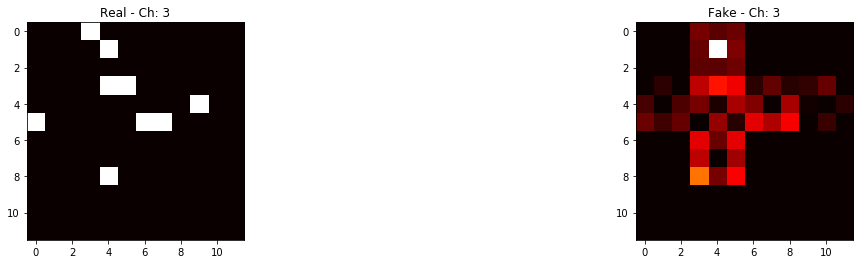

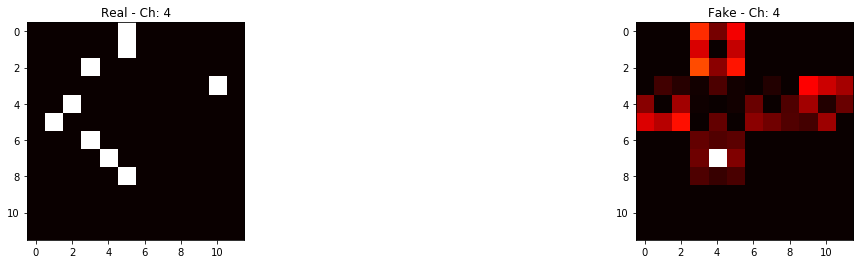

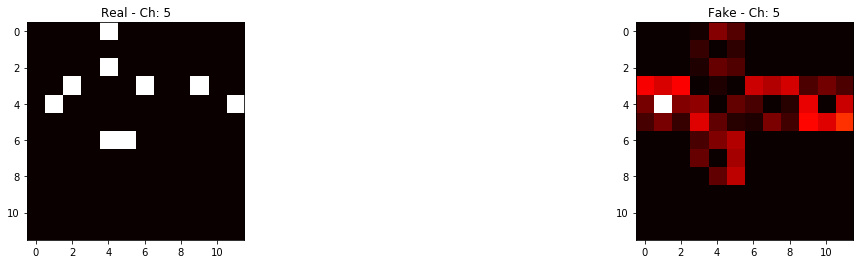

------------------------------------------------------------------------------------------------------------------------------------


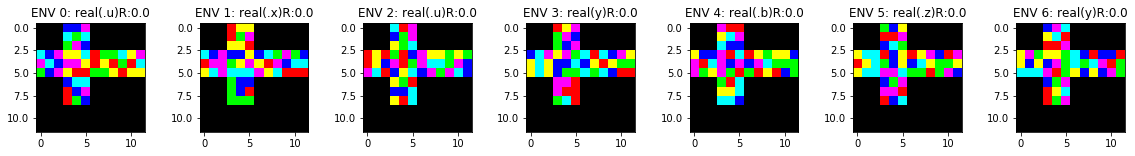

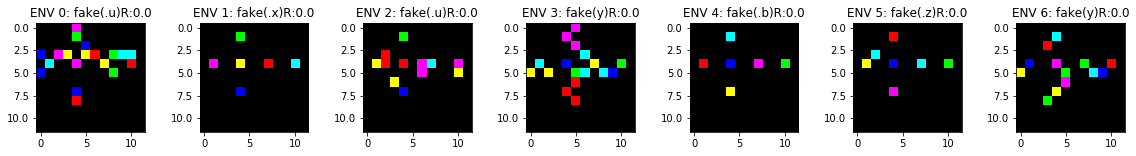

[[0 0 0 4 4 1 0 0 0 0 0 0]
 [0 0 0 5 3 5 0 0 0 0 0 0]
 [0 0 0 3 1 4 0 0 0 0 0 0]
 [5 4 1 2 2 5 0 3 3 5 2 1]
 [1 5 4 1 1 2 0 2 0 3 0 5]
 [3 4 1 2 0 0 3 3 2 0 2 2]
 [0 0 0 4 5 5 0 0 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0 0 0]
 [0 0 0 0 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 3 1 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [4 4 1 2 2 2 0 3 3 5 5 5]
 [4 5 1 2 1 2 0 2 3 5 0 1]
 [4 4 4 0 2 0 3 3 3 1 5 1]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 4 5 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


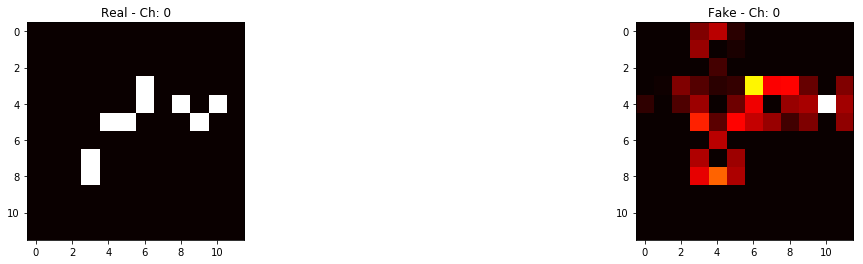

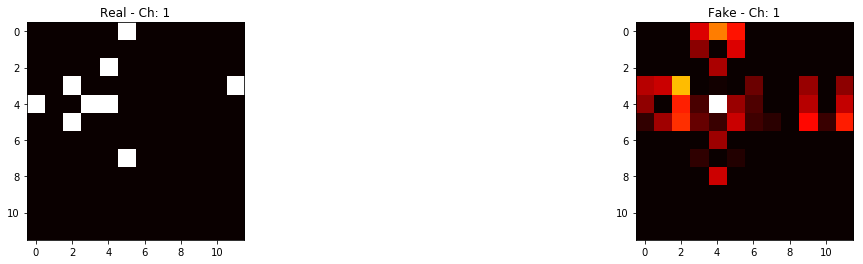

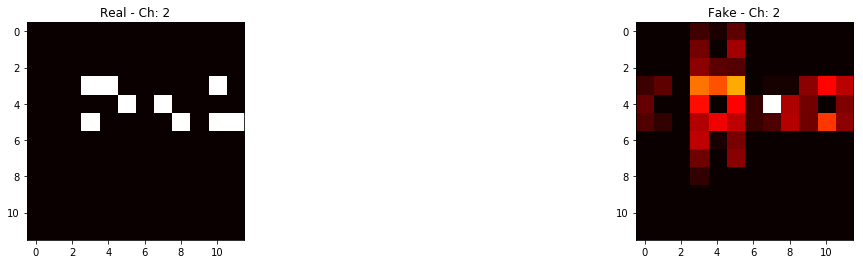

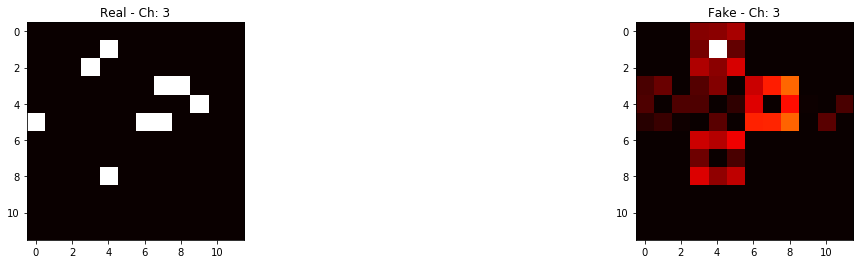

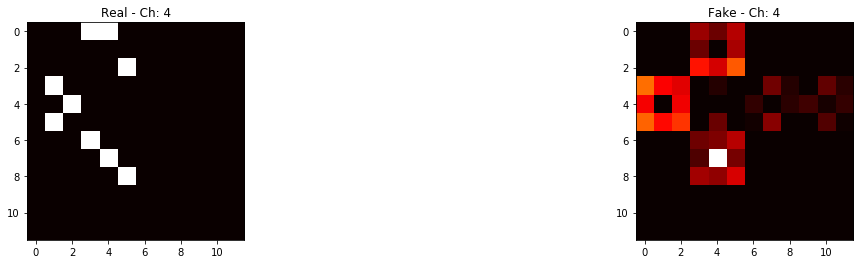

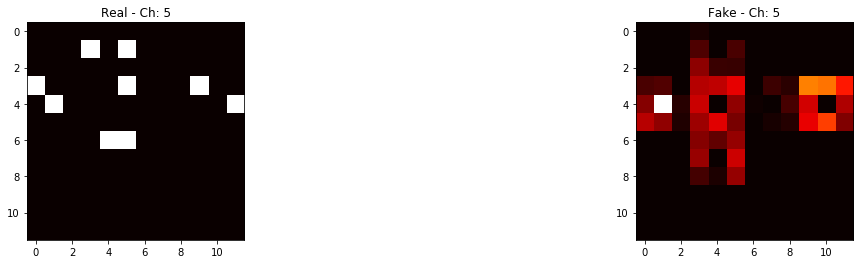

------------------------------------------------------------------------------------------------------------------------------------


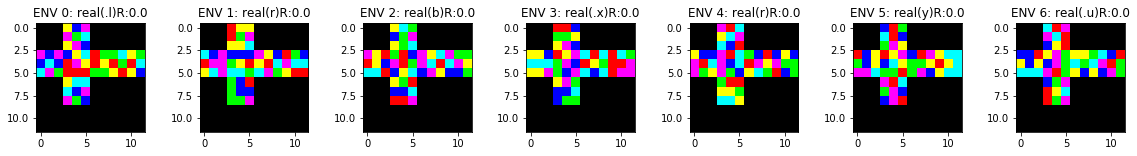

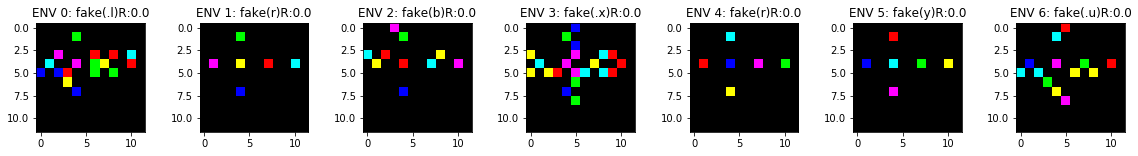

[[0 0 0 2 4 1 0 0 0 0 0 0]
 [0 0 0 1 3 5 0 0 0 0 0 0]
 [0 0 0 2 1 4 0 0 0 0 0 0]
 [1 4 1 4 2 5 0 3 3 5 2 3]
 [4 5 4 0 1 2 0 2 0 3 0 5]
 [5 1 3 0 0 0 3 3 2 0 2 4]
 [0 0 0 2 5 5 0 0 0 0 0 0]
 [0 0 0 5 4 1 0 0 0 0 0 0]
 [0 0 0 1 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 1 4 0 0 0 0 0 0]
 [0 0 0 2 3 1 0 0 0 0 0 0]
 [0 0 0 2 4 4 0 0 0 0 0 0]
 [1 4 1 3 2 2 0 3 0 5 5 3]
 [4 5 4 0 1 2 3 2 3 5 0 5]
 [4 4 4 0 2 1 3 3 3 1 5 0]
 [0 0 0 2 1 5 0 0 0 0 0 0]
 [0 0 0 5 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


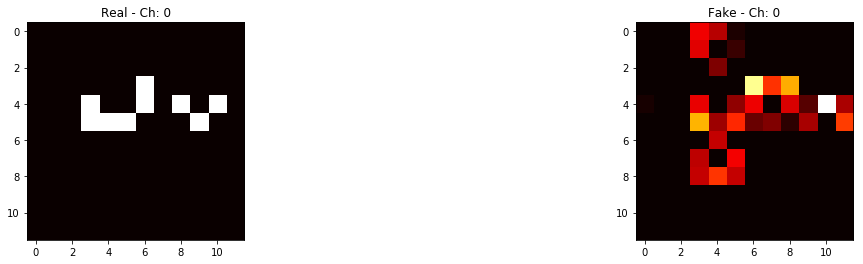

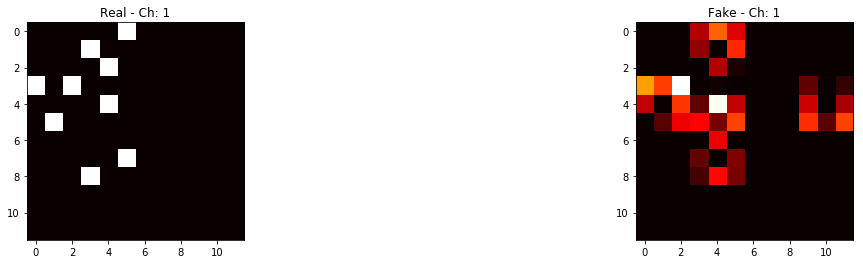

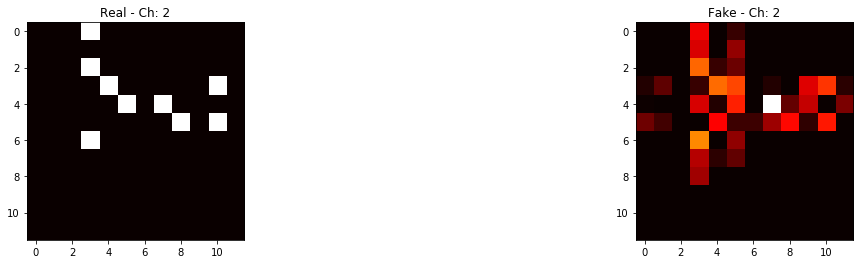

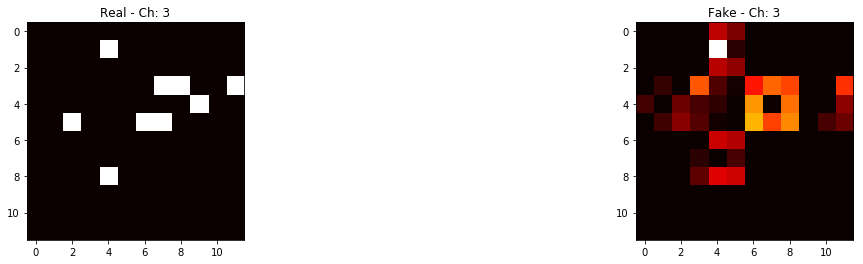

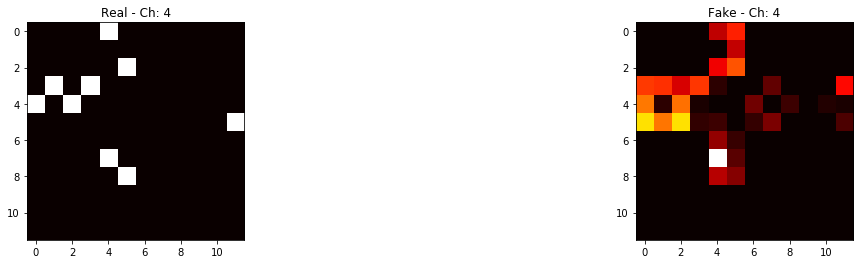

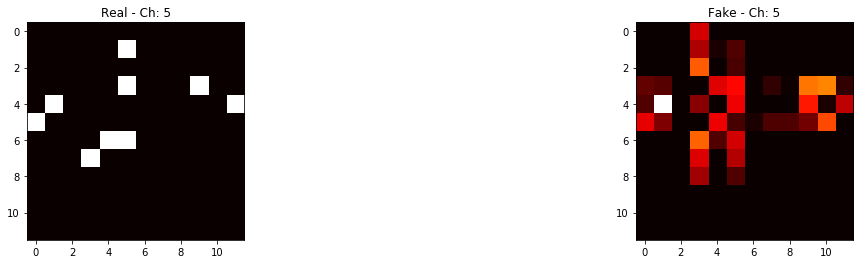

------------------------------------------------------------------------------------------------------------------------------------


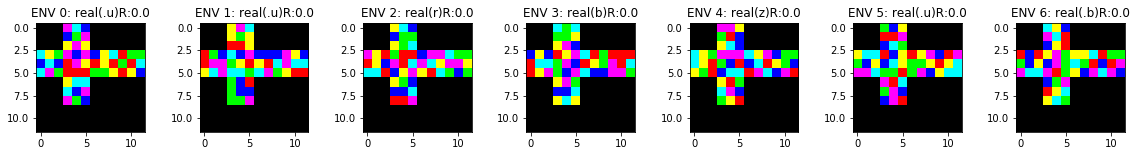

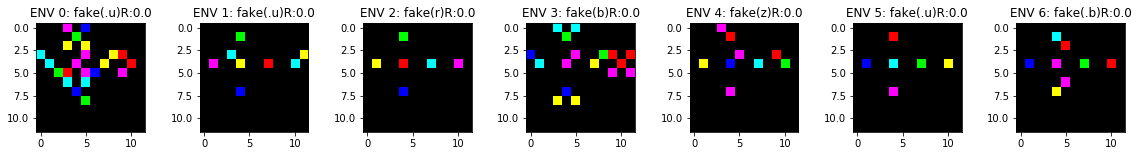

[[0 0 0 1 5 4 0 0 0 0 0 0]
 [0 0 0 4 3 1 0 0 0 0 0 0]
 [0 0 0 2 1 2 0 0 0 0 0 0]
 [5 2 3 1 4 1 4 2 5 0 3 3]
 [4 5 4 0 1 2 0 2 0 3 0 5]
 [5 1 3 0 0 0 3 3 2 0 2 4]
 [0 0 0 2 5 5 0 0 0 0 0 0]
 [0 0 0 5 4 1 0 0 0 0 0 0]
 [0 0 0 1 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 1 4 0 0 0 0 0 0]
 [0 0 0 1 3 4 0 0 0 0 0 0]
 [0 0 0 2 2 2 0 0 0 0 0 0]
 [5 5 3 0 1 1 4 2 2 0 0 3]
 [5 5 3 4 1 1 4 2 0 1 0 3]
 [4 4 3 0 2 1 4 2 2 1 5 1]
 [0 0 0 5 5 5 0 0 0 0 0 0]
 [0 0 0 5 4 3 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


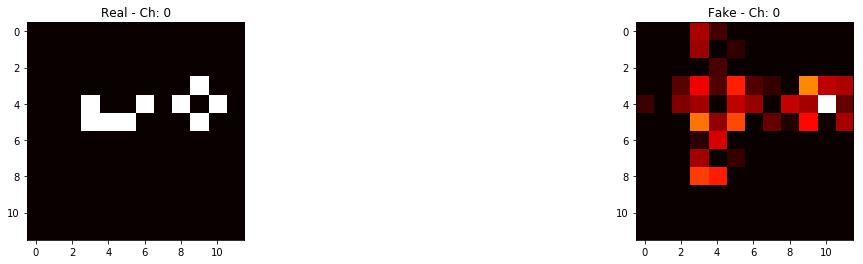

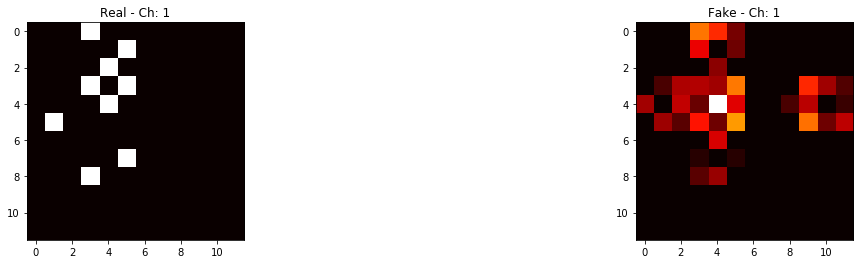

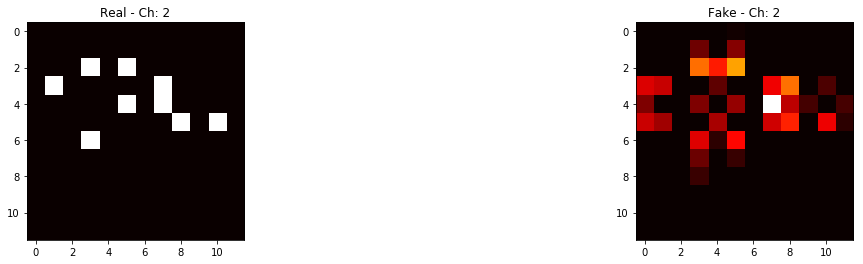

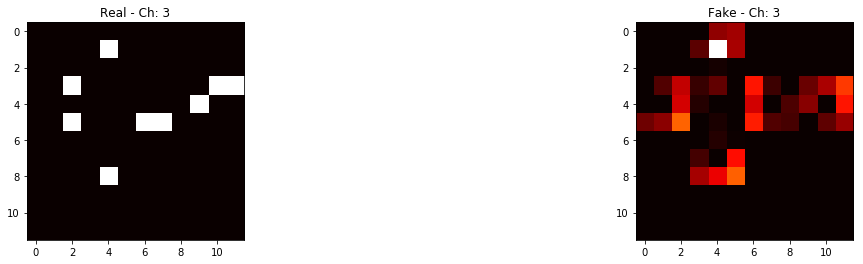

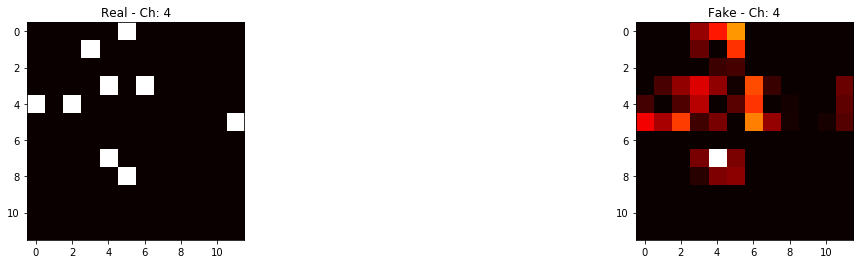

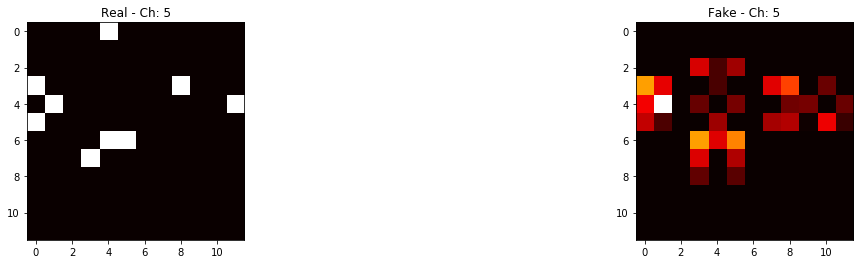

------------------------------------------------------------------------------------------------------------------------------------


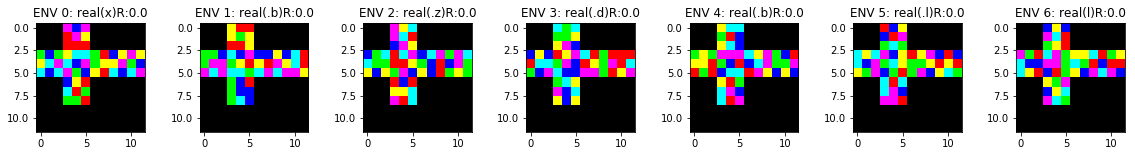

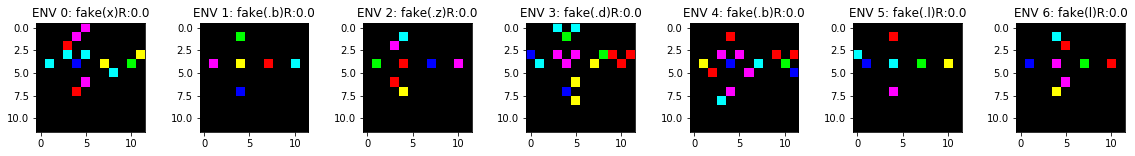

[[0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 0 1 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [3 4 3 2 5 5 3 0 4 2 1 2]
 [2 5 1 5 4 1 3 2 2 1 3 4]
 [5 4 5 1 3 4 2 0 5 4 5 1]
 [0 0 0 4 2 0 0 0 0 0 0 0]
 [0 0 0 5 0 3 0 0 0 0 0 0]
 [0 0 0 3 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [3 1 4 5 5 5 3 3 4 2 2 2]
 [2 5 4 5 4 5 4 2 5 2 3 0]
 [2 2 2 0 0 3 5 5 5 4 1 1]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


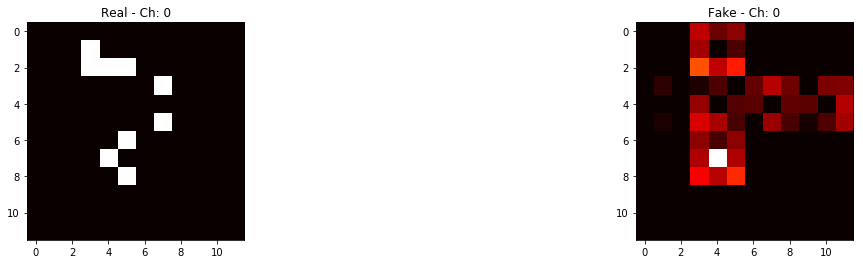

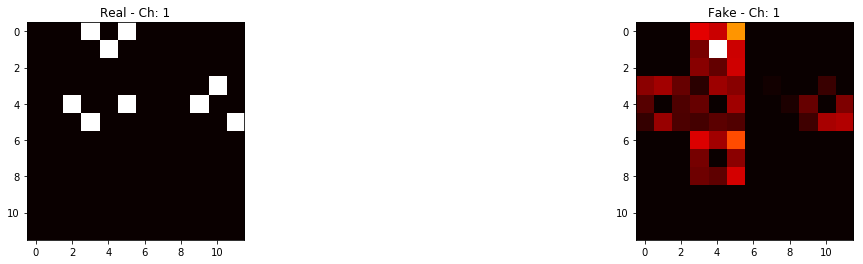

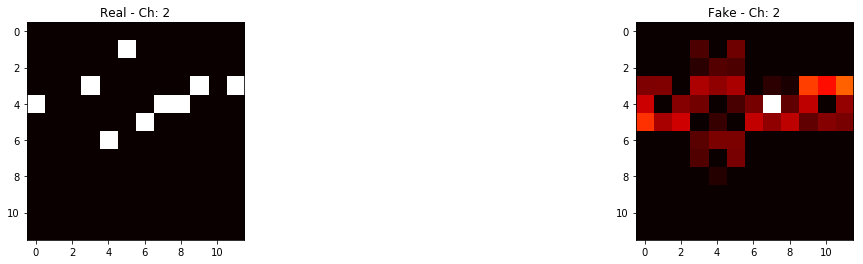

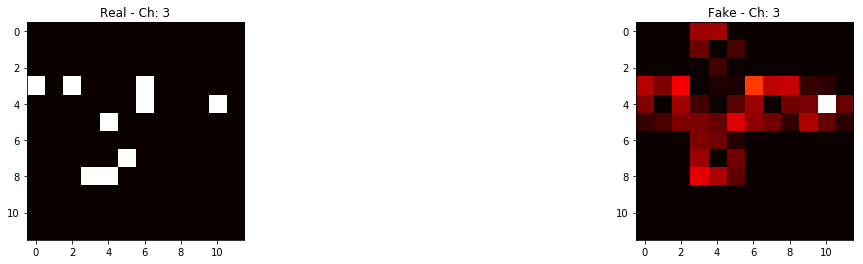

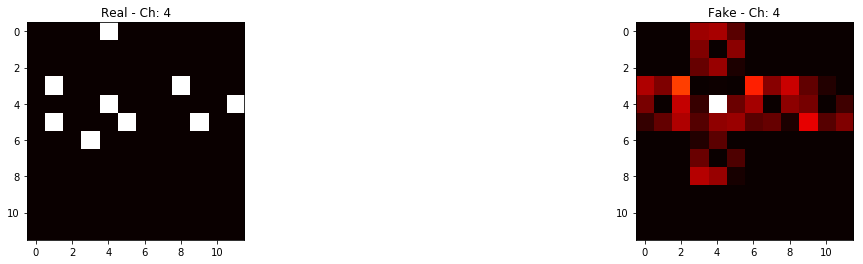

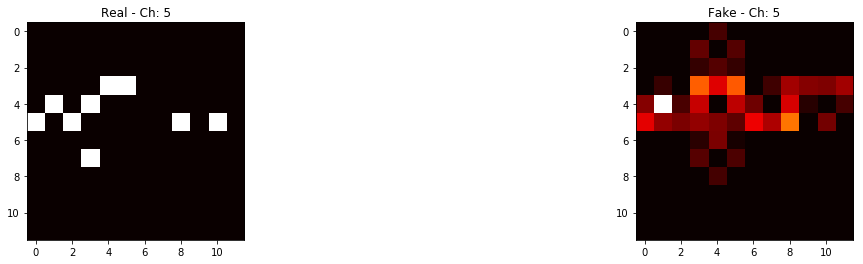

------------------------------------------------------------------------------------------------------------------------------------


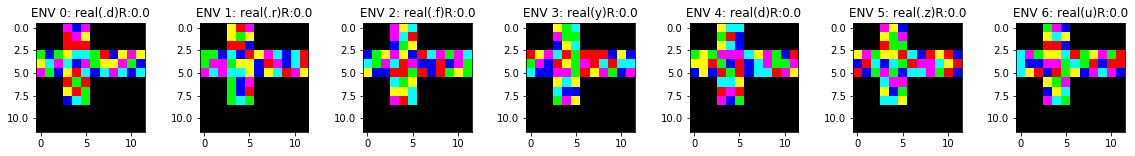

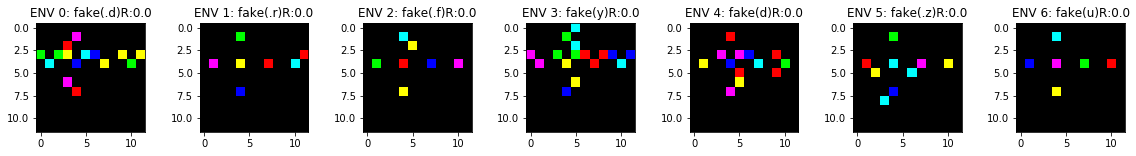

[[0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 0 1 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [3 4 3 2 5 5 3 0 4 2 1 2]
 [2 5 1 5 4 1 3 2 2 1 3 4]
 [1 3 4 2 0 5 4 5 1 5 4 5]
 [0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 2 0 3 0 0 0 0 0 0]
 [0 0 0 4 5 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 4 1 4 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0]
 [3 3 3 5 5 5 4 4 4 2 2 2]
 [2 5 2 5 4 5 4 2 5 2 3 4]
 [1 1 3 5 5 5 4 0 5 2 2 2]
 [0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 3 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


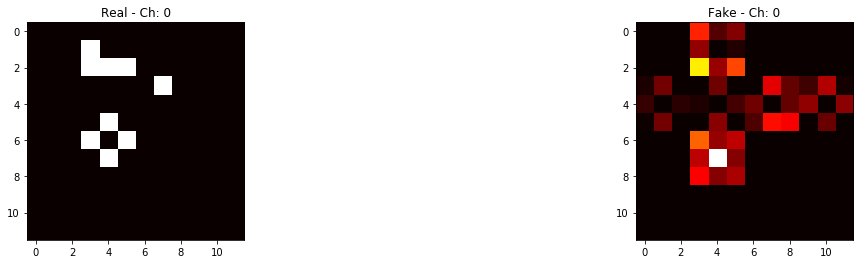

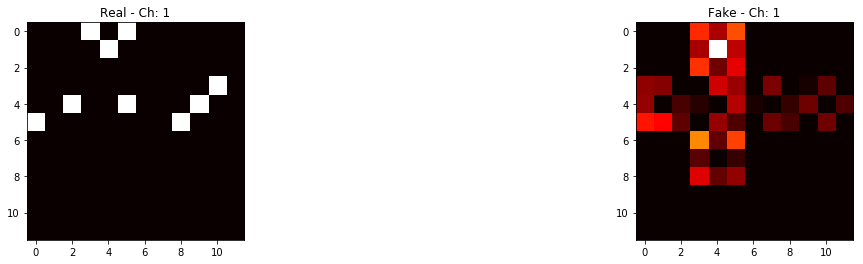

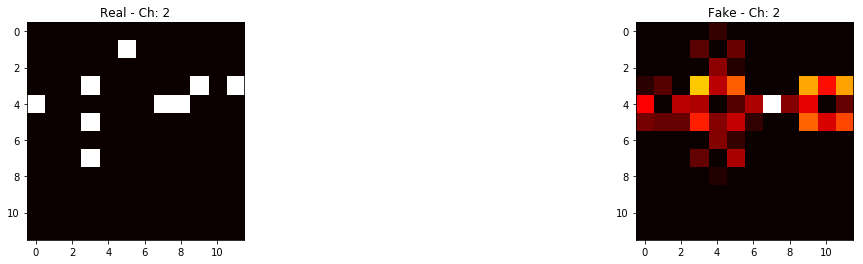

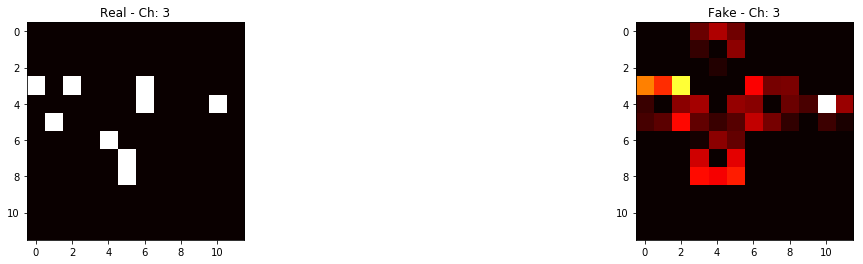

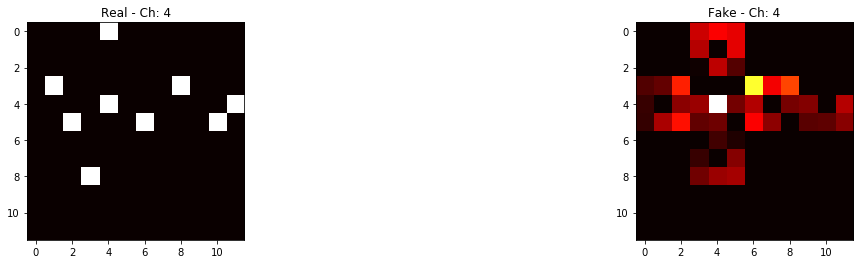

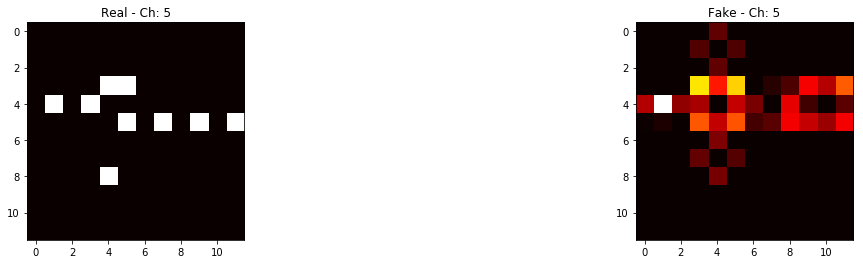

------------------------------------------------------------------------------------------------------------------------------------


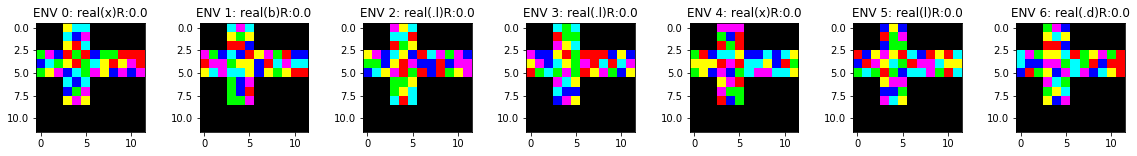

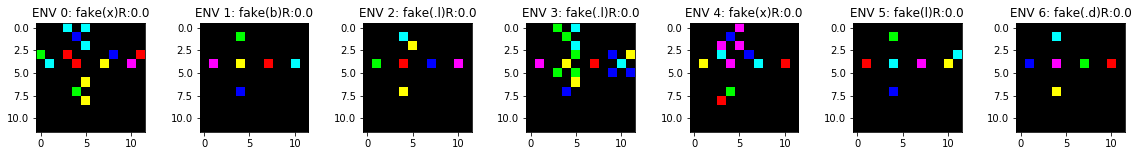

[[0 0 0 2 5 5 0 0 0 0 0 0]
 [0 0 0 5 4 1 0 0 0 0 0 0]
 [0 0 0 2 0 5 0 0 0 0 0 0]
 [3 1 4 0 3 0 4 3 3 0 0 0]
 [4 5 3 2 0 3 5 2 0 2 1 0]
 [3 2 1 4 5 3 1 2 4 1 4 1]
 [0 0 0 5 4 5 0 0 0 0 0 0]
 [0 0 0 4 3 1 0 0 0 0 0 0]
 [0 0 0 2 1 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 5 5 0 0 0 0 0 0]
 [0 0 0 5 4 5 0 0 0 0 0 0]
 [0 0 0 5 1 5 0 0 0 0 0 0]
 [3 2 3 0 5 0 4 4 4 1 2 0]
 [1 5 1 0 0 3 0 2 0 4 1 4]
 [3 2 1 0 3 3 0 5 4 4 4 1]
 [0 0 0 5 0 2 0 0 0 0 0 0]
 [0 0 0 4 3 0 0 0 0 0 0 0]
 [0 0 0 2 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


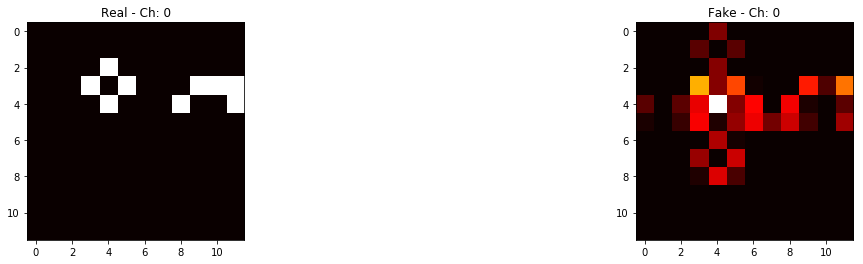

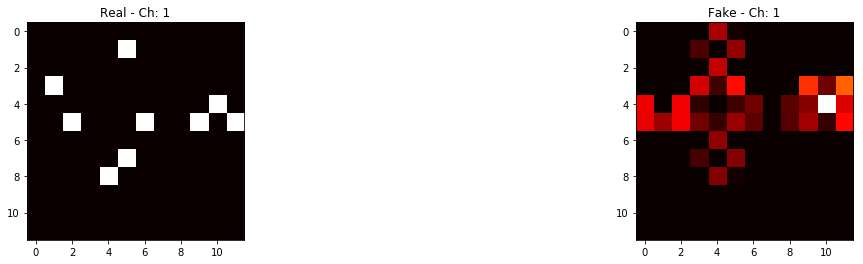

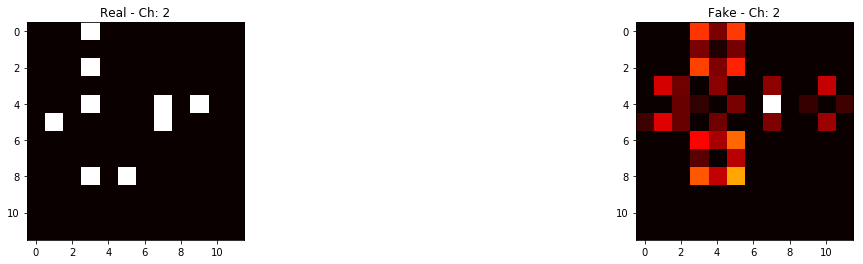

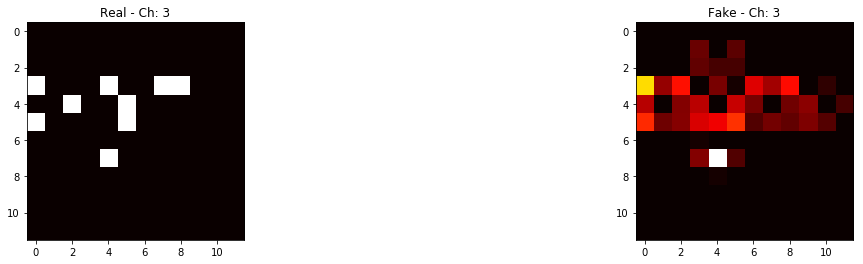

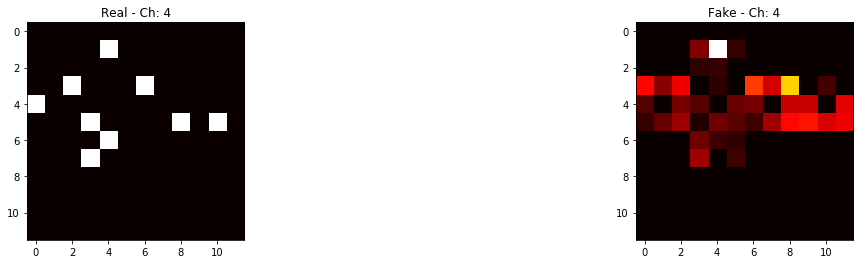

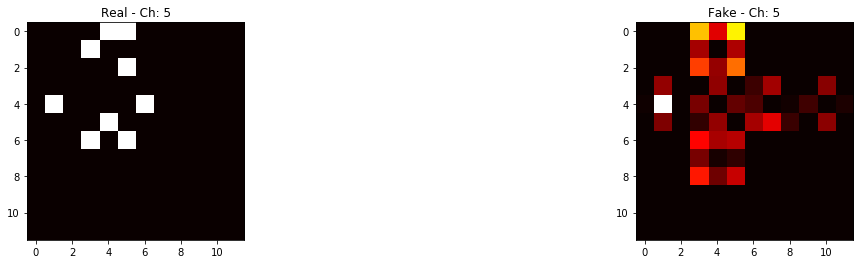

------------------------------------------------------------------------------------------------------------------------------------


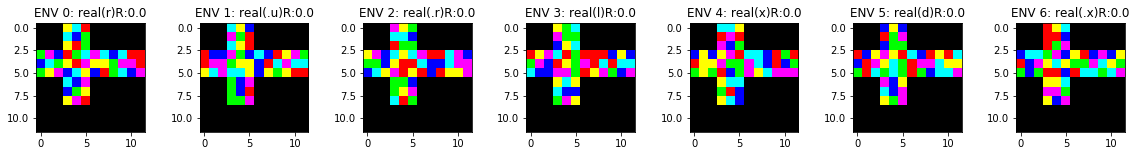

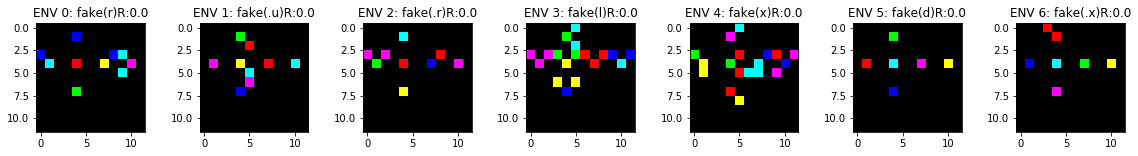

[[0 0 0 2 5 0 0 0 0 0 0 0]
 [0 0 0 5 4 3 0 0 0 0 0 0]
 [0 0 0 2 0 3 0 0 0 0 0 0]
 [3 1 4 0 3 5 1 5 4 5 0 0]
 [4 5 3 2 0 1 2 2 3 1 1 0]
 [3 2 1 4 5 2 4 0 3 5 4 1]
 [0 0 0 5 4 1 0 0 0 0 0 0]
 [0 0 0 4 3 2 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 2 0 0 0 0 0 0 0]
 [0 0 0 5 4 0 0 0 0 0 0 0]
 [0 0 0 2 3 3 0 0 0 0 0 0]
 [4 4 4 0 0 2 3 4 4 5 1 0]
 [4 5 4 0 0 2 0 2 4 5 1 1]
 [3 3 3 0 2 2 0 4 4 5 5 0]
 [0 0 0 5 5 4 0 0 0 0 0 0]
 [0 0 0 5 3 1 0 0 0 0 0 0]
 [0 0 0 5 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


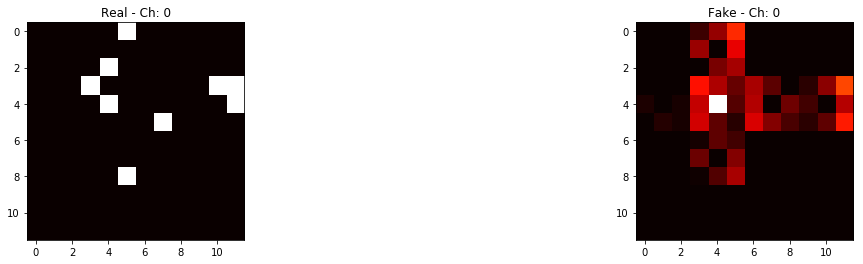

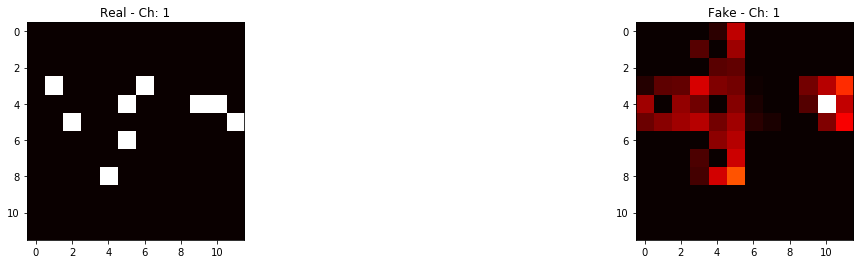

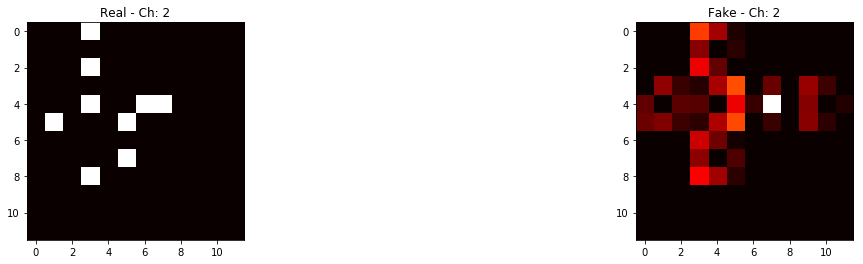

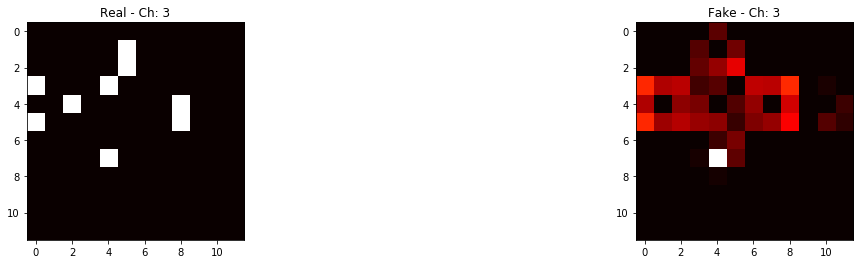

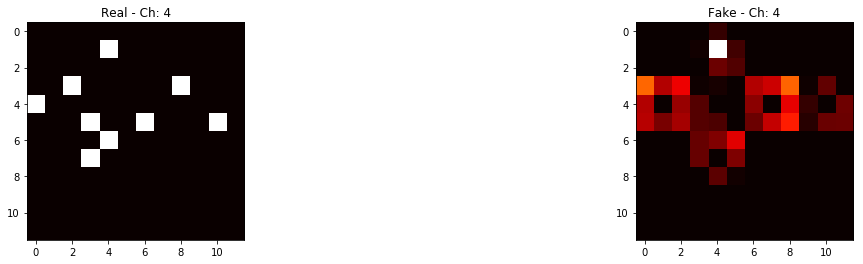

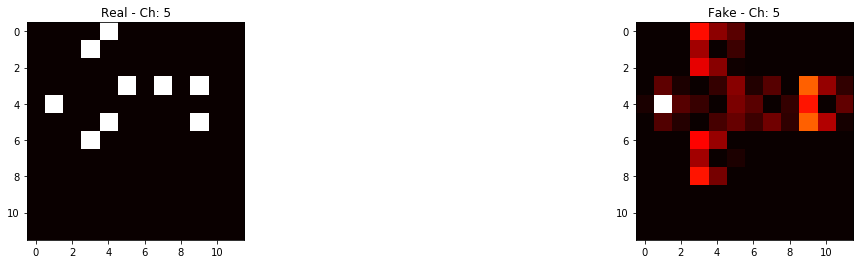

------------------------------------------------------------------------------------------------------------------------------------


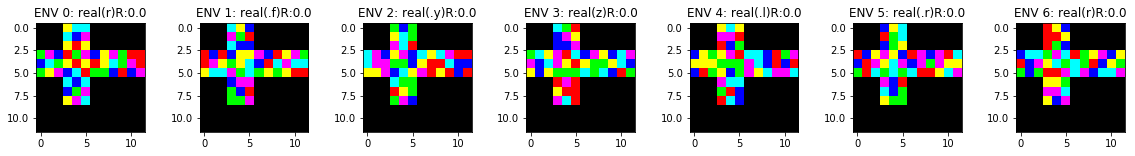

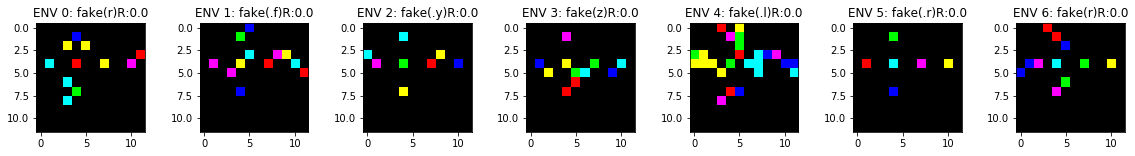

[[0 0 0 2 5 5 0 0 0 0 0 0]
 [0 0 0 5 4 1 0 0 0 0 0 0]
 [0 0 0 2 0 2 0 0 0 0 0 0]
 [3 1 4 0 3 1 4 2 1 3 0 0]
 [4 5 3 2 0 2 0 2 5 3 1 0]
 [3 2 1 4 5 0 3 3 4 0 4 1]
 [0 0 0 5 4 5 0 0 0 0 0 0]
 [0 0 0 4 3 1 0 0 0 0 0 0]
 [0 0 0 2 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 1 2 0 0 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0 0 0]
 [0 0 0 2 1 2 0 0 0 0 0 0]
 [3 2 3 1 4 1 4 5 4 0 3 0]
 [1 5 1 4 0 4 0 2 0 3 1 3]
 [3 2 3 1 4 1 4 4 4 0 3 0]
 [0 0 0 5 1 5 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 5 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


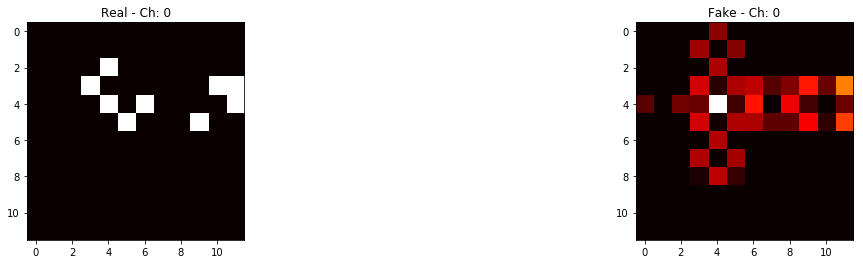

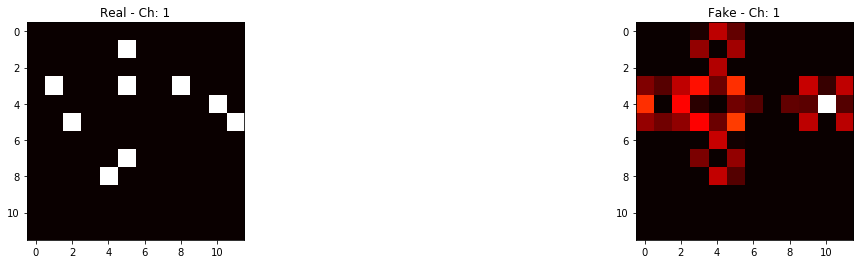

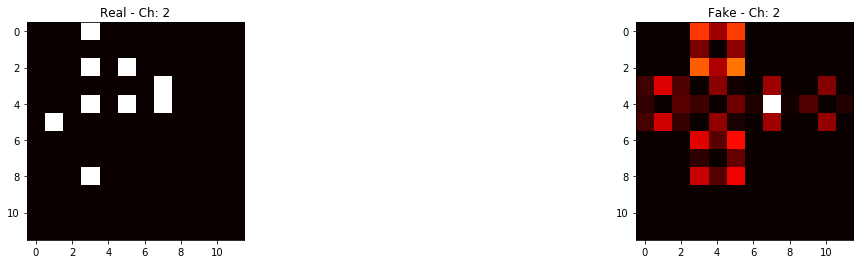

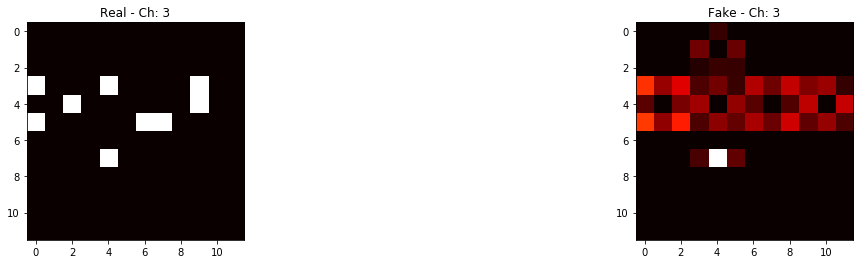

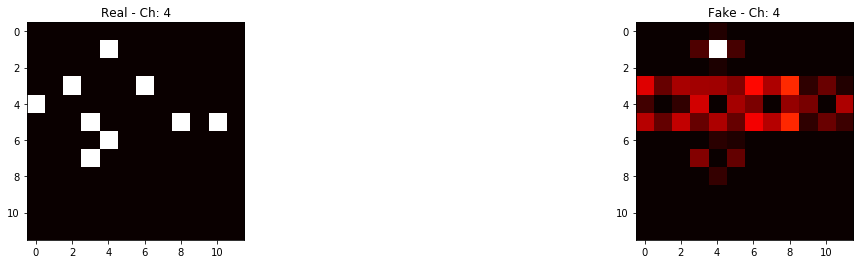

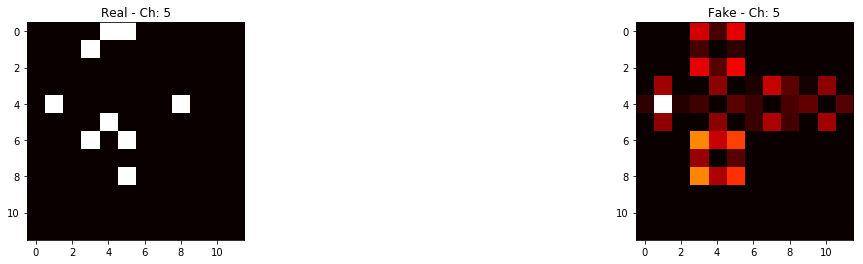

------------------------------------------------------------------------------------------------------------------------------------


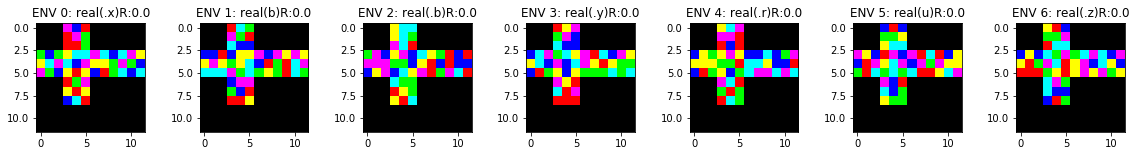

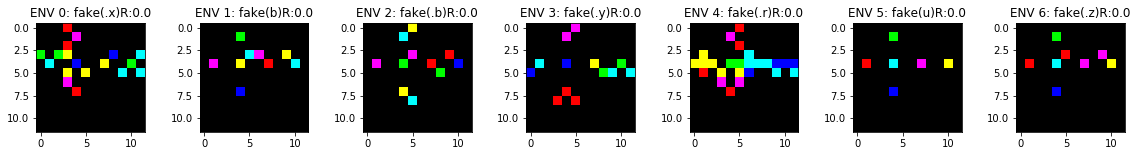

[[0 0 0 1 4 0 0 0 0 0 0 0]
 [0 0 0 0 1 3 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [3 4 3 2 5 5 1 5 4 5 1 2]
 [2 5 1 5 4 1 2 2 3 1 3 4]
 [1 3 4 2 0 2 4 0 3 5 4 5]
 [0 0 0 0 3 1 0 0 0 0 0 0]
 [0 0 0 2 0 2 0 0 0 0 0 0]
 [0 0 0 4 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 5 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [3 3 3 2 2 2 4 4 4 5 5 5]
 [2 5 5 3 4 1 2 2 4 2 3 5]
 [3 3 3 2 2 2 4 0 4 5 5 5]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 4 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


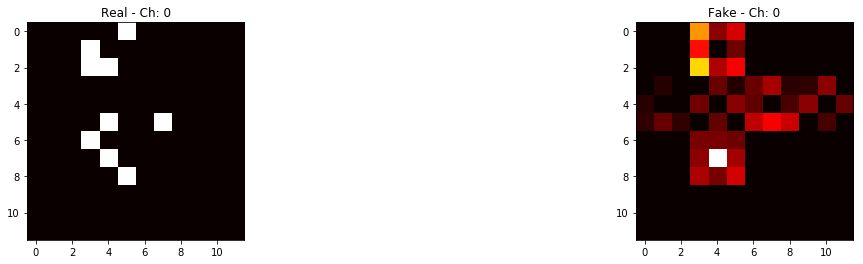

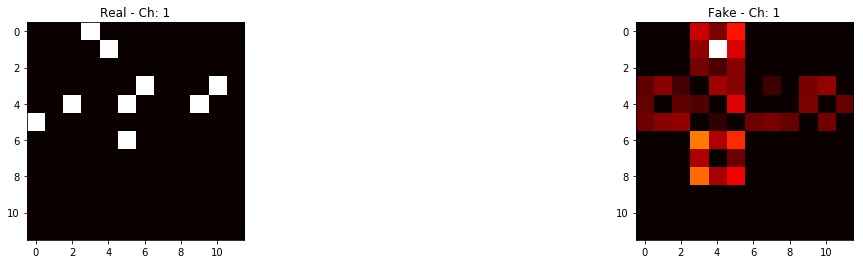

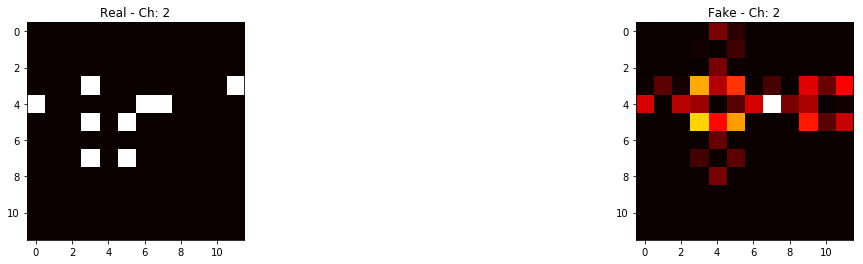

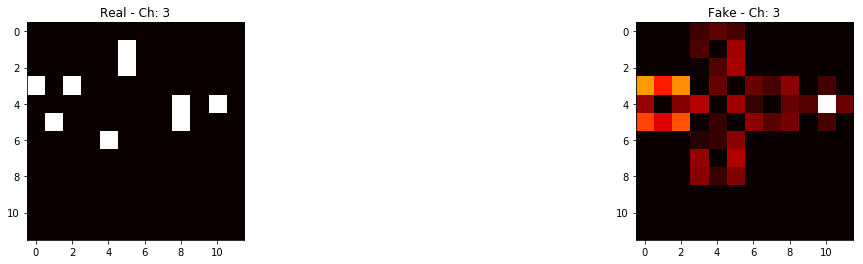

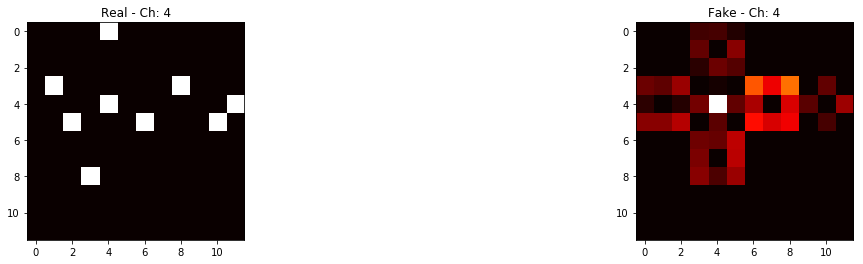

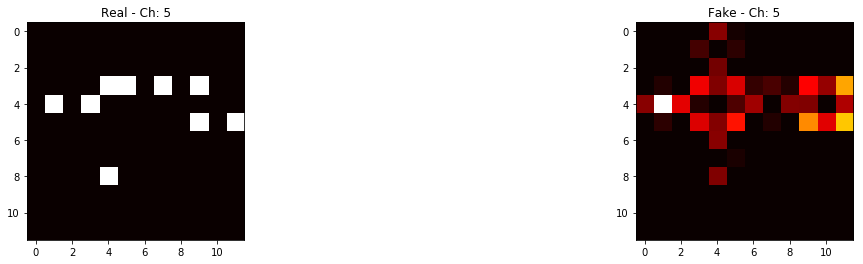

------------------------------------------------------------------------------------------------------------------------------------


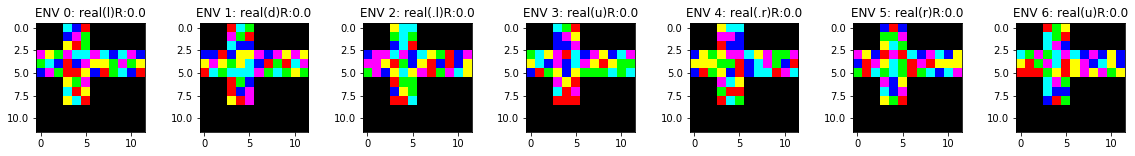

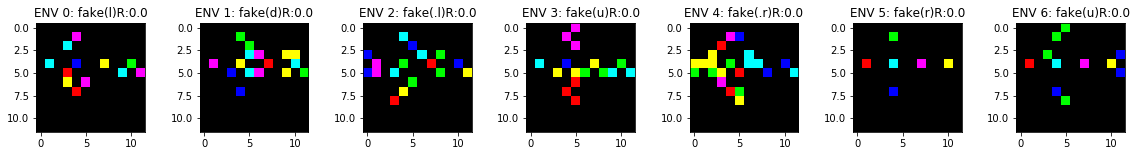

[[0 0 0 5 4 0 0 0 0 0 0 0]
 [0 0 0 4 1 3 0 0 0 0 0 0]
 [0 0 0 2 0 3 0 0 0 0 0 0]
 [1 2 3 1 5 5 1 5 4 5 1 4]
 [3 5 4 0 4 1 2 2 3 1 3 2]
 [4 1 3 0 0 2 4 0 3 5 4 0]
 [0 0 0 2 3 1 0 0 0 0 0 0]
 [0 0 0 5 0 2 0 0 0 0 0 0]
 [0 0 0 2 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 5 1 4 0 0 0 0 0 0]
 [0 0 0 5 4 0 0 0 0 0 0 0]
 [4 1 4 0 2 2 3 0 3 5 1 1]
 [4 5 3 0 4 2 4 2 3 5 3 1]
 [4 4 3 0 0 2 4 0 3 5 5 1]
 [0 0 0 2 1 1 0 0 0 0 0 0]
 [0 0 0 2 0 1 0 0 0 0 0 0]
 [0 0 0 2 4 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


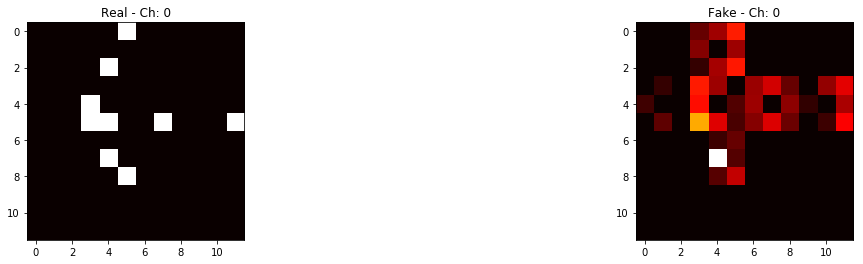

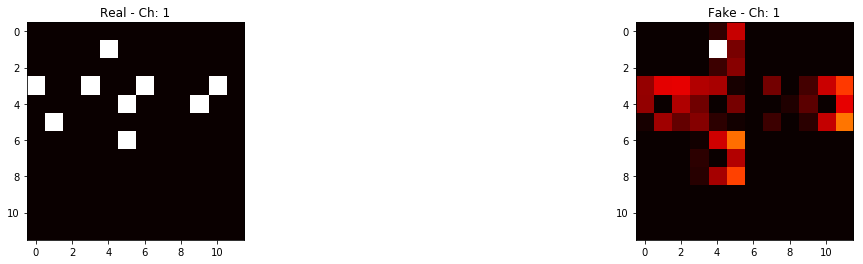

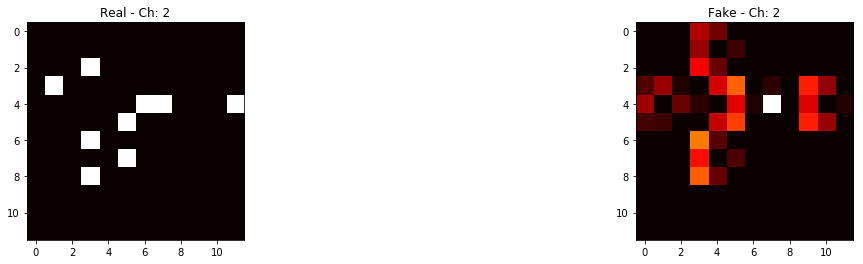

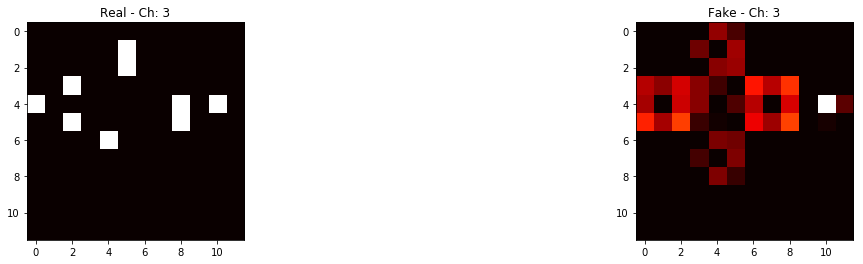

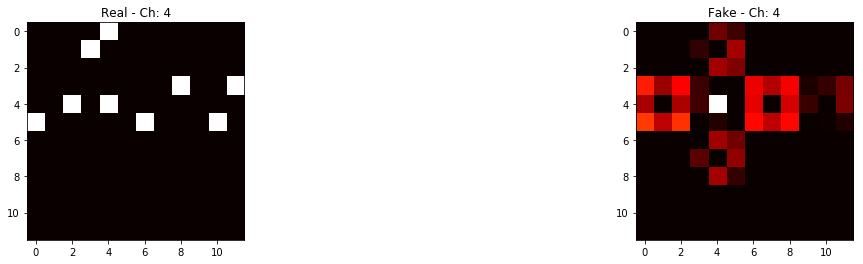

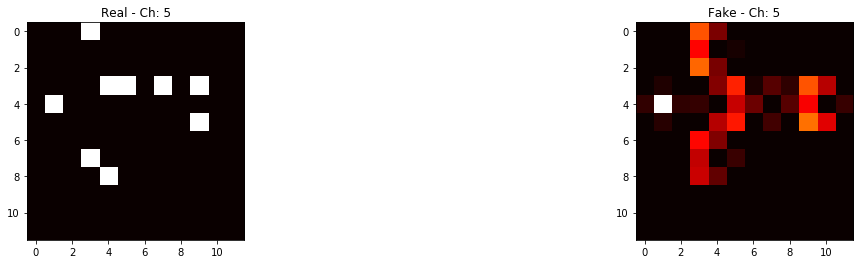

------------------------------------------------------------------------------------------------------------------------------------


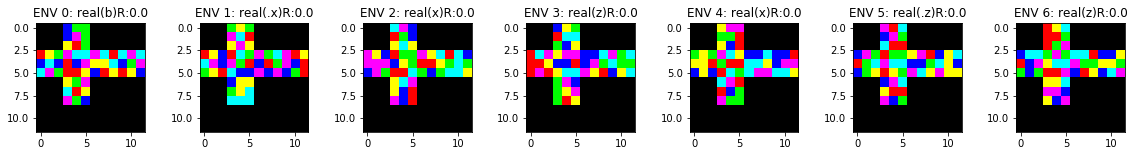

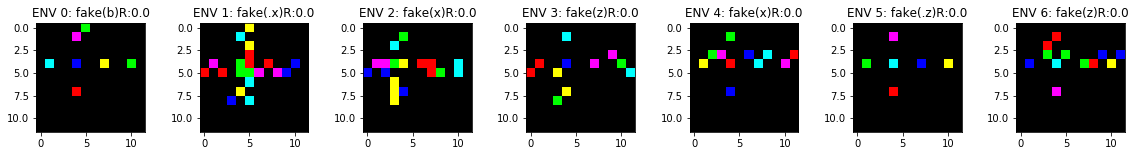

[[0 0 0 4 3 3 0 0 0 0 0 0]
 [0 0 0 4 1 3 0 0 0 0 0 0]
 [0 0 0 2 0 3 0 0 0 0 0 0]
 [0 2 3 1 5 5 1 5 0 5 1 5]
 [4 5 4 0 4 1 2 2 5 4 3 1]
 [5 1 3 0 0 2 4 0 2 0 2 4]
 [0 0 0 2 3 1 0 0 0 0 0 0]
 [0 0 0 5 0 2 0 0 0 0 0 0]
 [0 0 0 1 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 5 1 3 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0]
 [1 1 3 0 2 2 4 4 0 5 5 4]
 [2 5 3 0 4 5 4 2 5 1 3 1]
 [5 3 3 0 0 5 4 4 5 2 2 0]
 [0 0 0 2 4 1 0 0 0 0 0 0]
 [0 0 0 2 0 1 0 0 0 0 0 0]
 [0 0 0 4 4 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


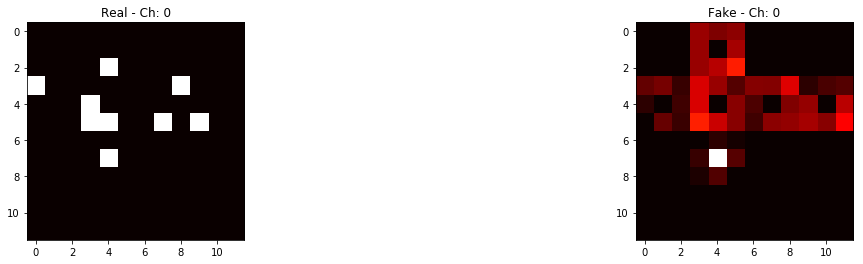

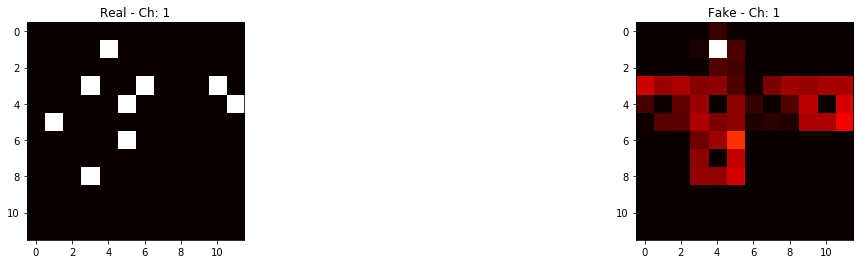

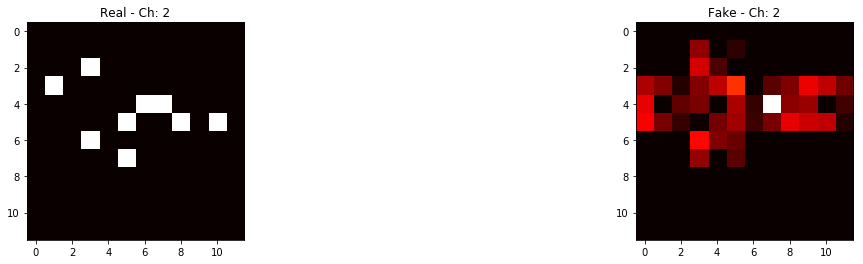

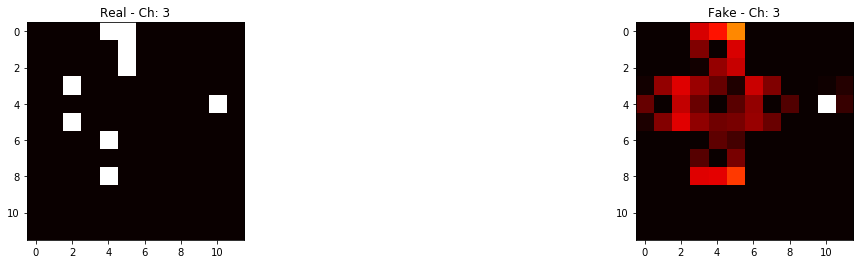

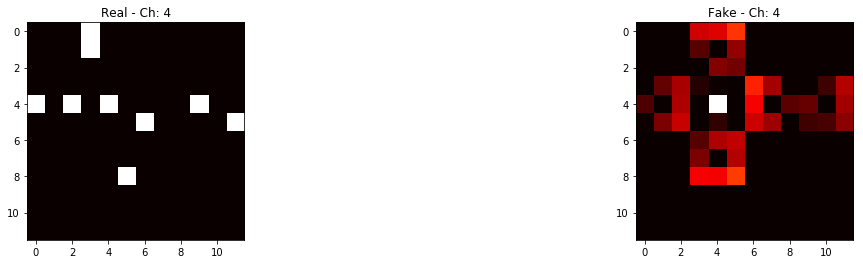

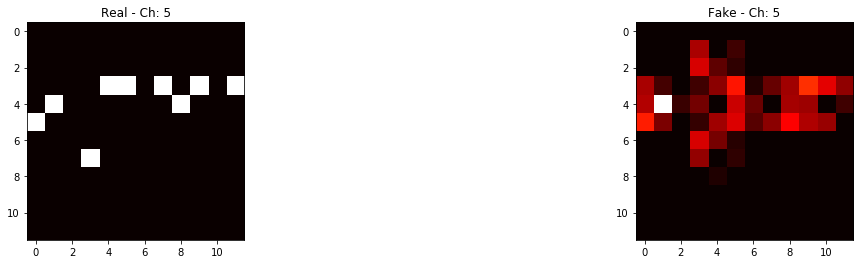

------------------------------------------------------------------------------------------------------------------------------------


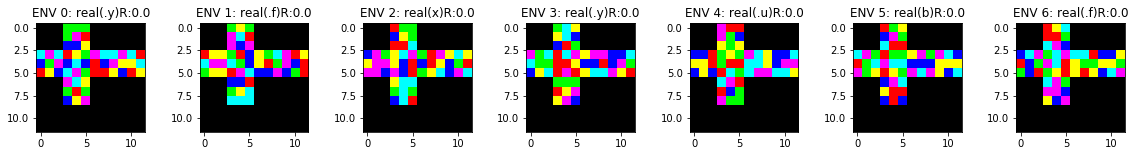

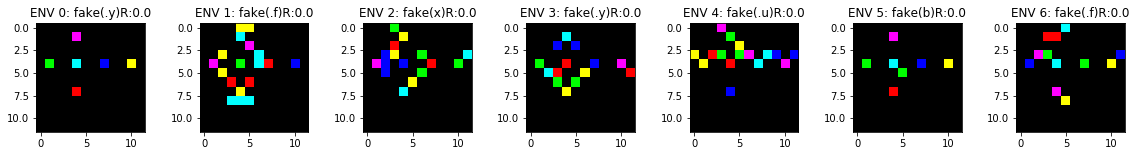

[[0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 3 1 0 0 0 0 0 0 0]
 [0 0 0 4 4 2 0 0 0 0 0 0]
 [5 1 5 0 2 3 1 5 5 1 5 0]
 [4 3 1 4 5 4 0 4 1 2 2 5]
 [0 2 4 5 1 3 0 0 2 4 0 2]
 [0 0 0 1 5 2 0 0 0 0 0 0]
 [0 0 0 3 0 3 0 0 0 0 0 0]
 [0 0 0 4 2 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 3 3 0 0 0 0 0 0 0]
 [0 0 0 3 1 0 0 0 0 0 0 0]
 [0 0 0 3 0 5 0 0 0 0 0 0]
 [5 5 5 1 2 3 3 2 2 4 4 1]
 [0 3 1 2 5 3 0 4 0 4 2 2]
 [1 1 1 2 5 3 0 0 2 4 2 2]
 [0 0 0 4 1 1 0 0 0 0 0 0]
 [0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 4 5 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


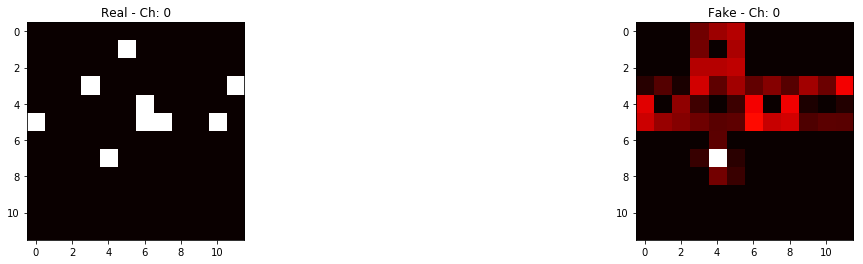

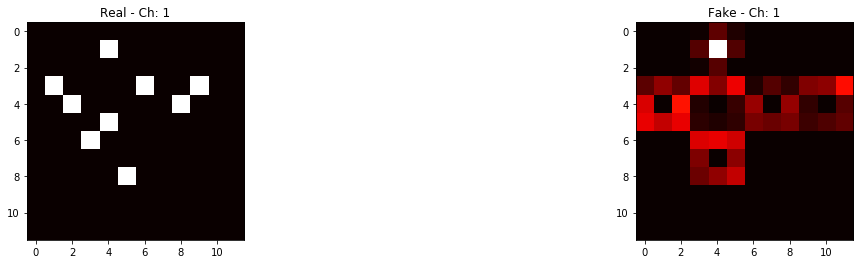

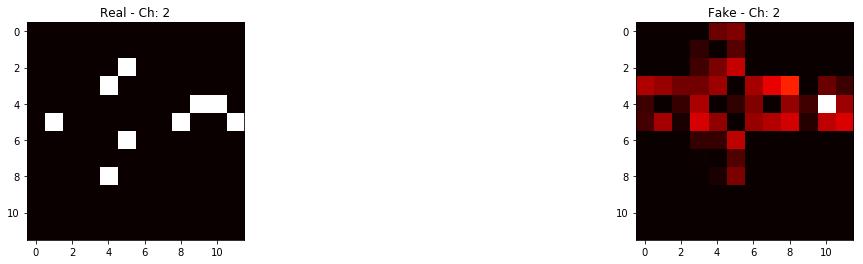

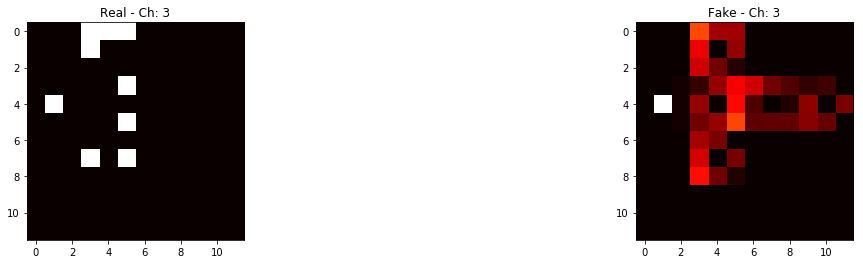

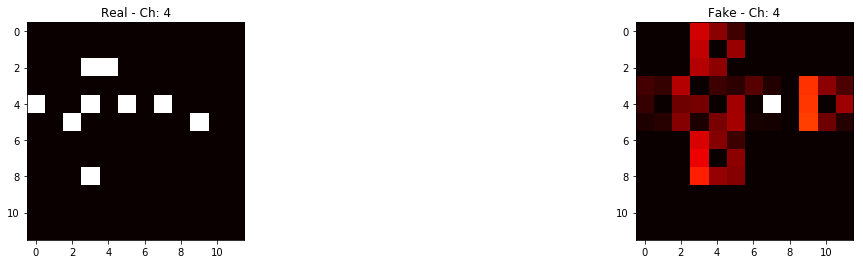

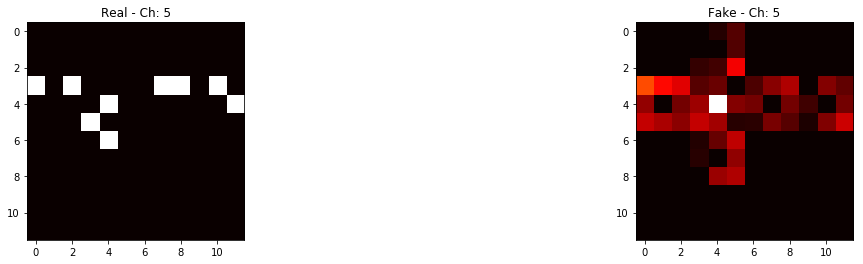

------------------------------------------------------------------------------------------------------------------------------------


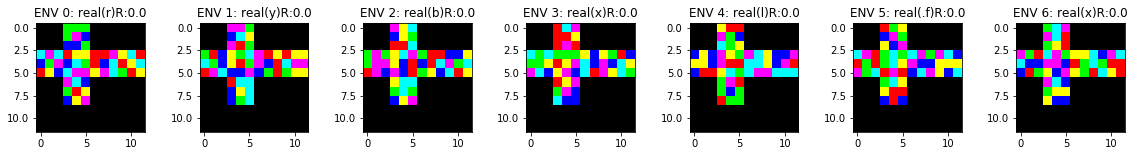

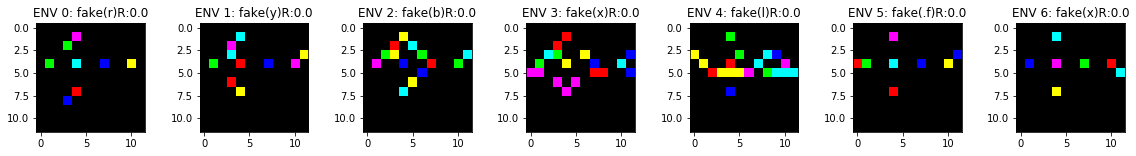

[[0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 3 1 4 0 0 0 0 0 0]
 [0 0 0 4 4 3 0 0 0 0 0 0]
 [5 1 5 0 2 2 0 0 1 2 5 0]
 [4 3 1 4 5 3 0 4 5 0 2 5]
 [0 2 4 5 1 1 2 1 5 3 0 2]
 [0 0 0 1 5 4 0 0 0 0 0 0]
 [0 0 0 3 0 2 0 0 0 0 0 0]
 [0 0 0 4 2 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 3 1 3 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [4 1 1 2 1 5 0 0 2 2 0 5]
 [1 3 1 2 5 3 0 4 0 4 2 4]
 [5 1 5 2 1 1 2 0 2 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


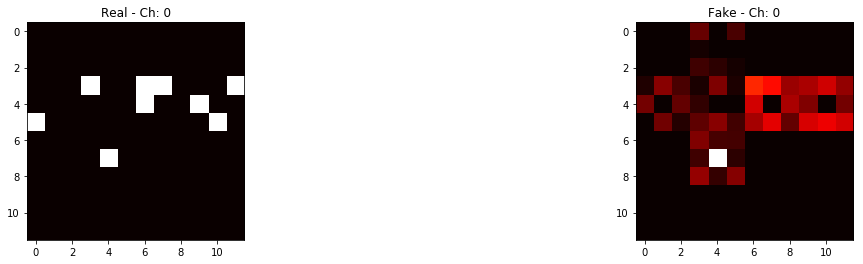

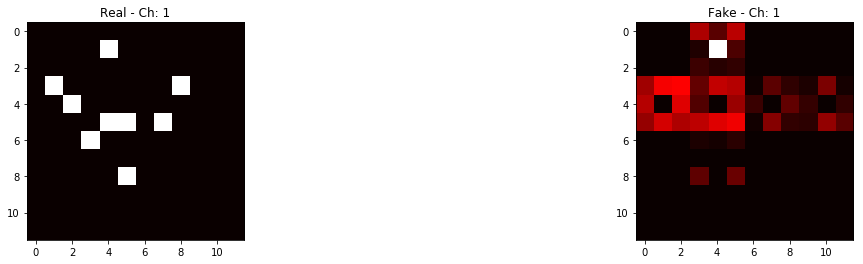

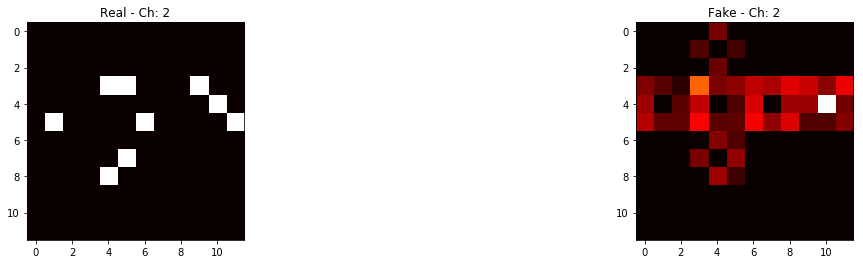

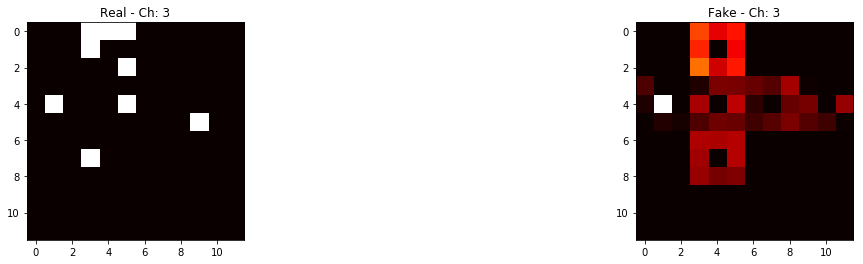

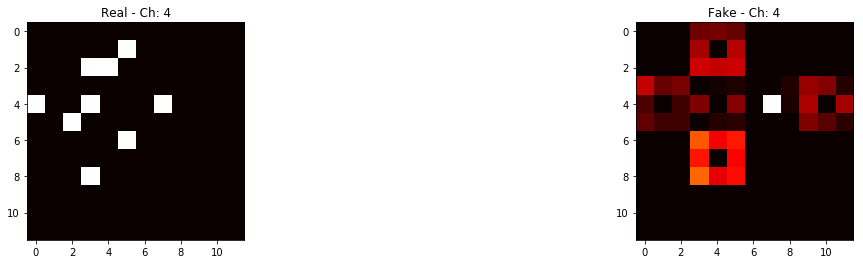

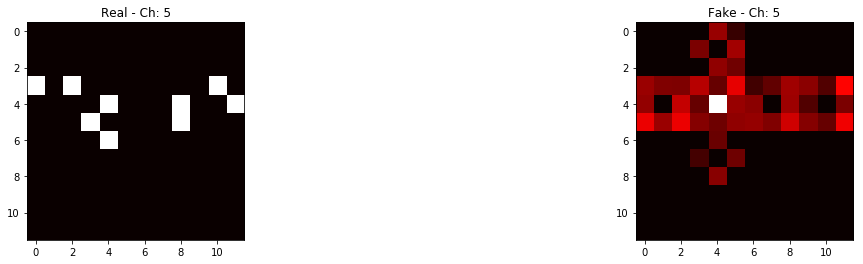

------------------------------------------------------------------------------------------------------------------------------------


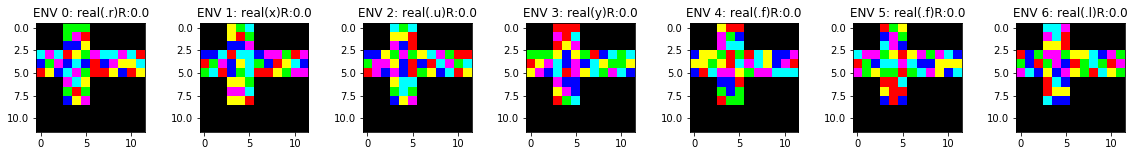

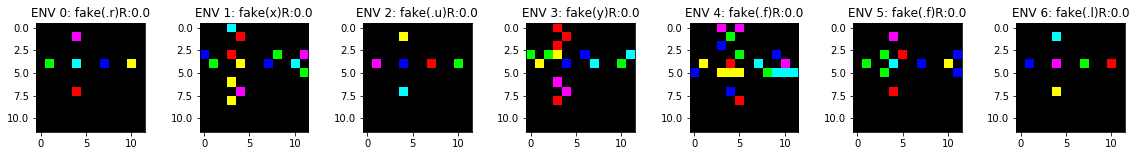

[[0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 3 1 0 0 0 0 0 0 0]
 [0 0 0 4 4 2 0 0 0 0 0 0]
 [5 1 5 0 2 3 1 5 5 1 5 0]
 [4 3 1 4 5 4 0 4 1 2 2 5]
 [0 2 4 5 1 3 0 0 2 4 0 2]
 [0 0 0 1 5 2 0 0 0 0 0 0]
 [0 0 0 3 0 3 0 0 0 0 0 0]
 [0 0 0 4 2 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 3 3 0 0 0 0 0 0 0]
 [0 0 0 3 1 3 0 0 0 0 0 0]
 [0 0 0 3 3 5 0 0 0 0 0 0]
 [5 5 5 1 1 3 3 2 2 4 2 0]
 [1 3 1 5 5 3 0 4 0 4 2 4]
 [1 1 1 5 5 3 0 0 2 4 2 2]
 [0 0 0 4 1 1 0 0 0 0 0 0]
 [0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 4 4 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


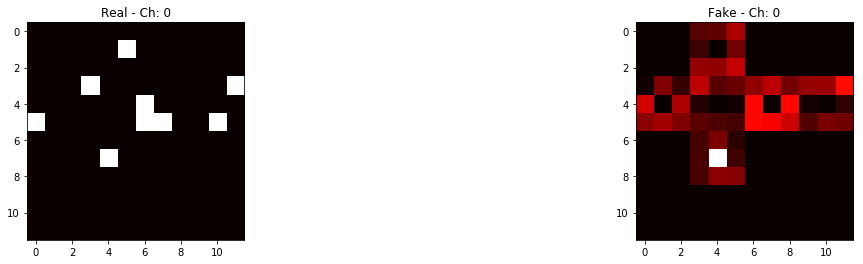

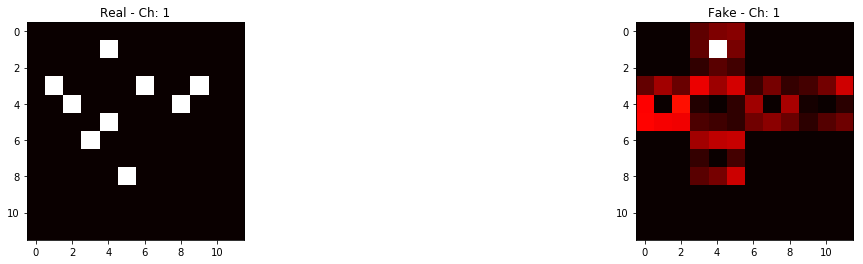

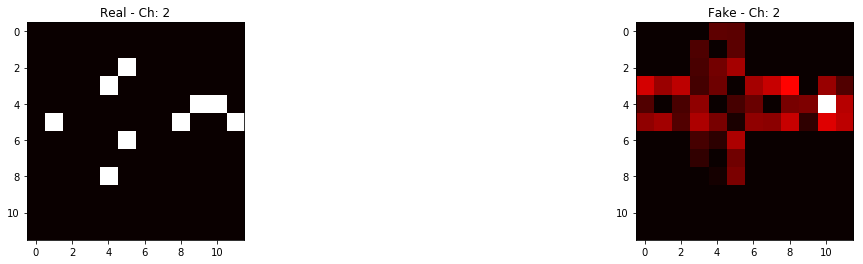

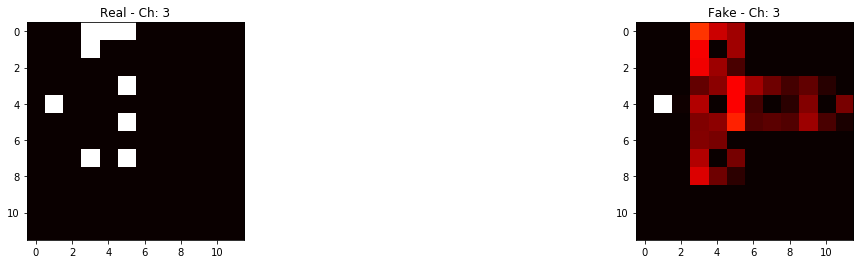

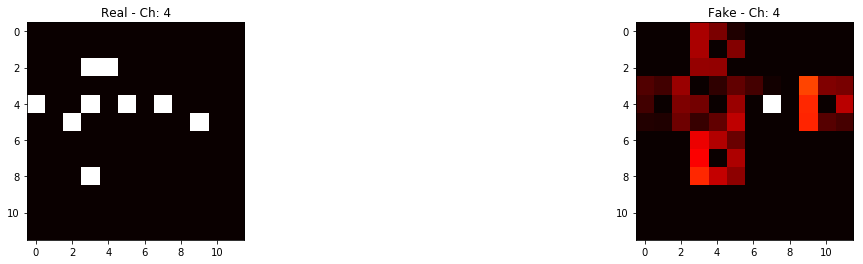

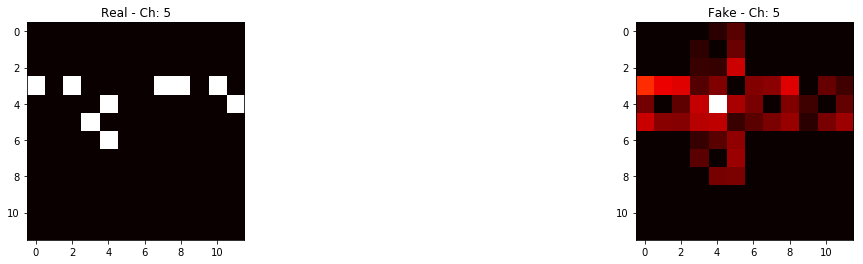

------------------------------------------------------------------------------------------------------------------------------------


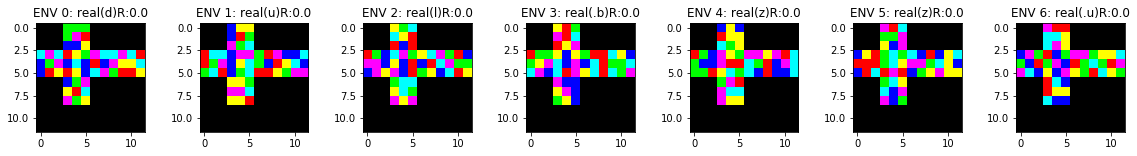

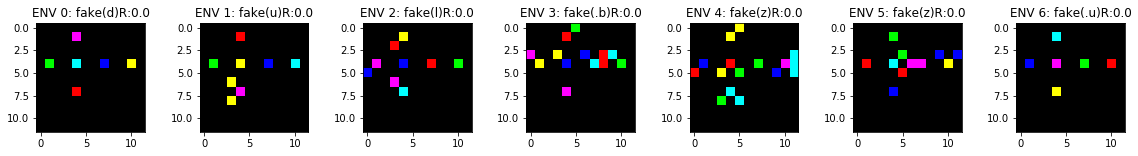

[[0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 3 1 0 0 0 0 0 0 0]
 [0 0 0 4 4 2 0 0 0 0 0 0]
 [5 1 5 0 2 3 1 5 5 1 5 0]
 [4 3 1 4 5 4 0 4 1 2 2 5]
 [4 0 2 0 2 4 5 1 3 0 0 2]
 [0 0 0 4 3 1 0 0 0 0 0 0]
 [0 0 0 2 0 5 0 0 0 0 0 0]
 [0 0 0 1 3 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 3 3 0 0 0 0 0 0 0]
 [0 0 0 3 1 4 0 0 0 0 0 0]
 [0 0 0 4 3 5 0 0 0 0 0 0]
 [2 2 2 1 2 1 5 5 5 4 2 0]
 [0 3 0 2 5 5 1 4 0 2 2 5]
 [4 2 2 0 5 0 5 5 3 0 2 5]
 [0 0 0 3 3 2 0 0 0 0 0 0]
 [0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 1 4 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


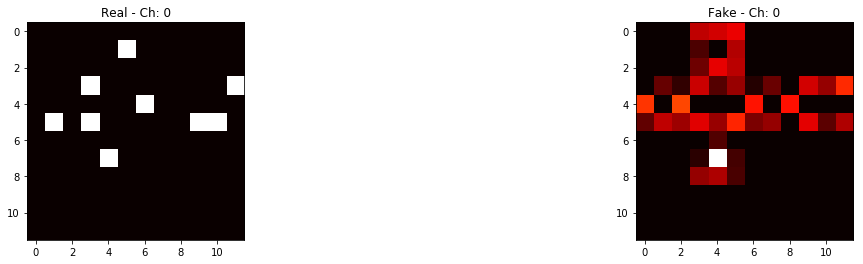

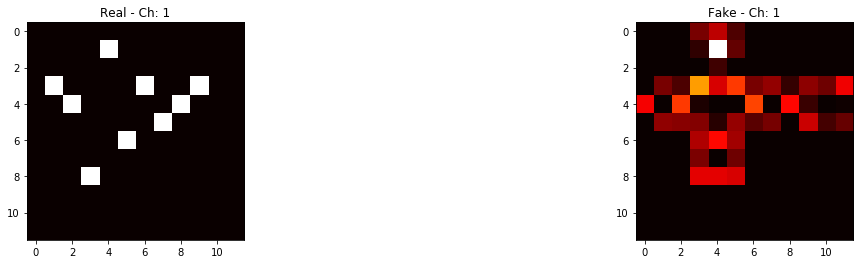

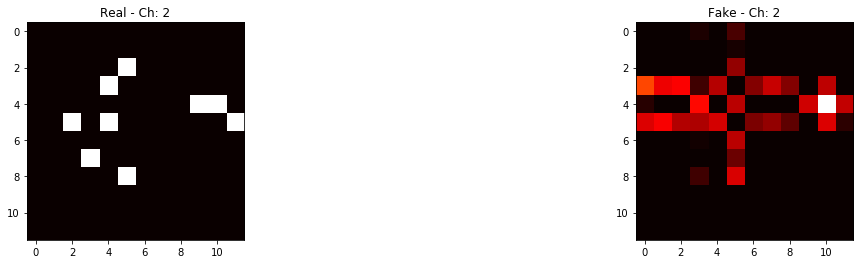

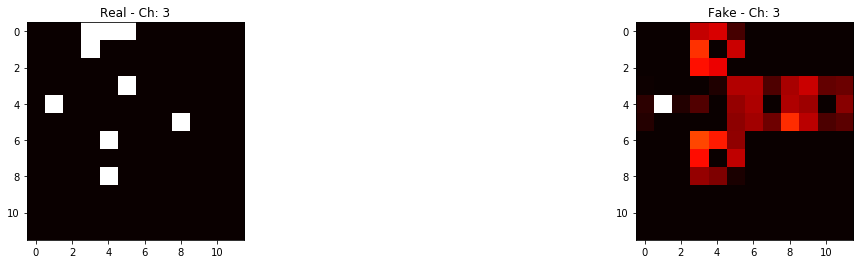

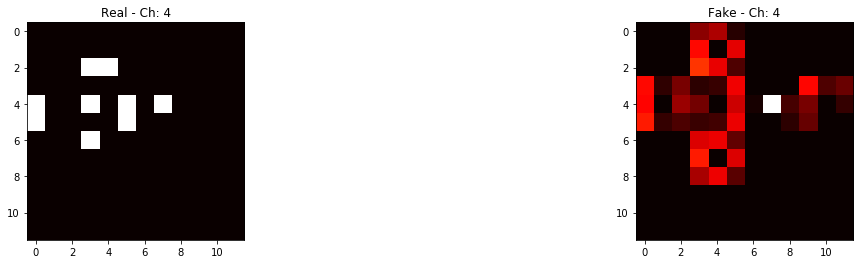

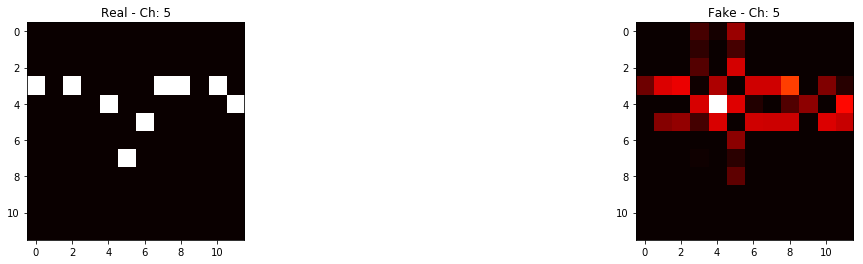

------------------------------------------------------------------------------------------------------------------------------------


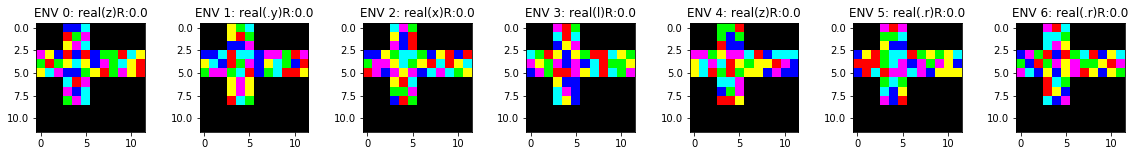

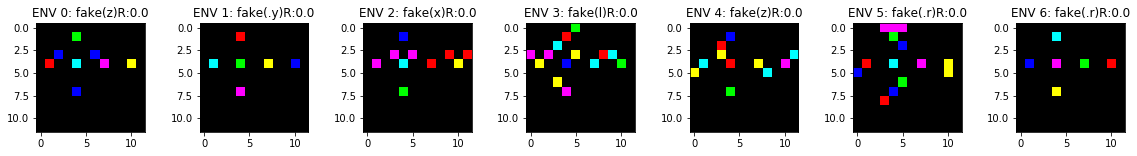

[[0 0 0 4 4 5 0 0 0 0 0 0]
 [0 0 0 0 3 1 0 0 0 0 0 0]
 [0 0 0 2 1 5 0 0 0 0 0 0]
 [1 2 4 0 4 0 4 3 3 0 5 2]
 [3 0 3 2 5 2 4 1 3 5 2 0]
 [2 5 1 4 4 3 2 0 3 1 2 0]
 [0 0 0 5 0 1 0 0 0 0 0 0]
 [0 0 0 1 4 5 0 0 0 0 0 0]
 [0 0 0 3 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 1 2 0 0 0 0 0 0]
 [0 0 0 1 3 1 0 0 0 0 0 0]
 [0 0 0 2 1 2 0 0 0 0 0 0]
 [3 5 4 0 2 0 4 4 4 1 5 0]
 [4 0 3 0 5 0 4 1 3 5 2 2]
 [2 2 3 0 2 3 3 2 0 3 5 0]
 [0 0 0 5 1 5 0 0 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0 0 0]
 [0 0 0 3 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


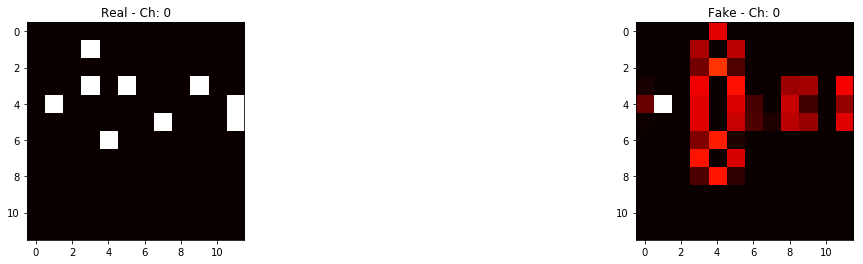

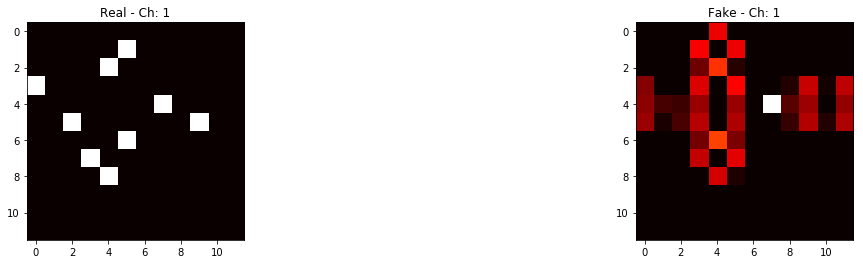

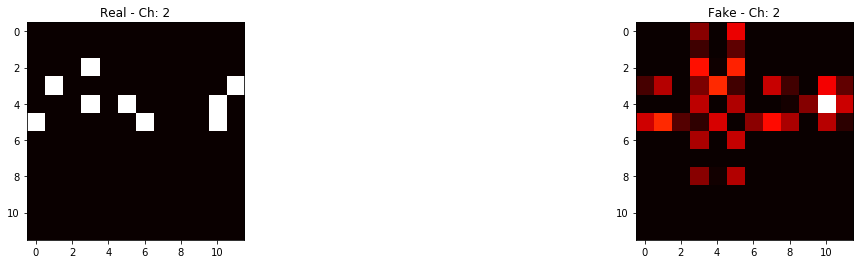

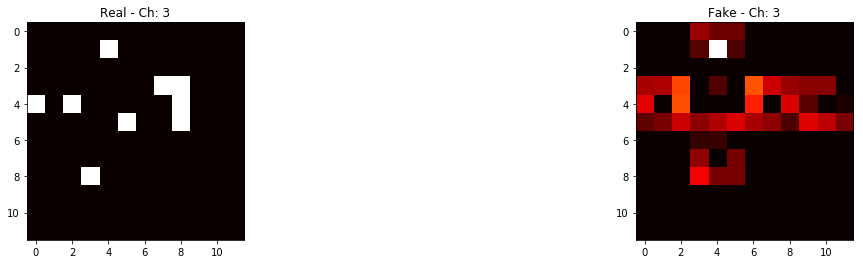

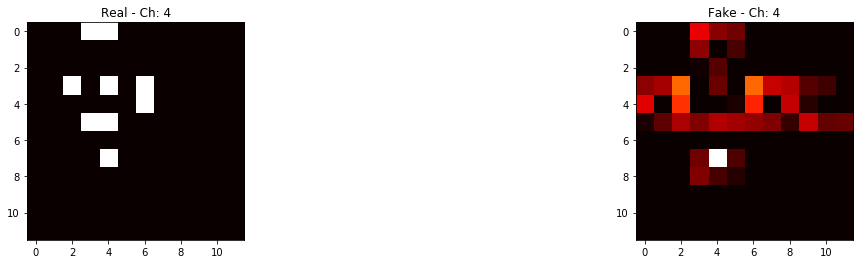

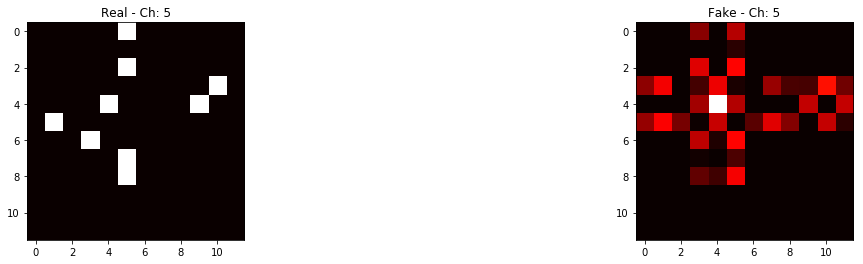

------------------------------------------------------------------------------------------------------------------------------------


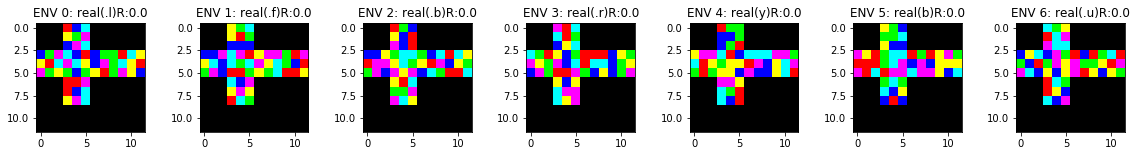

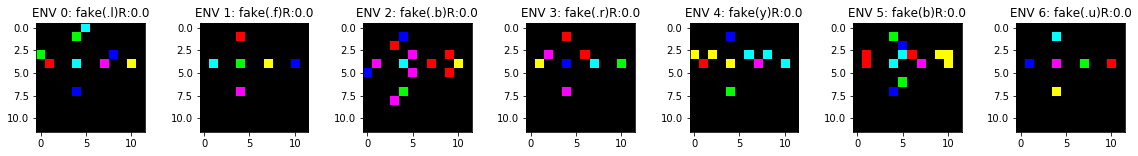

[[0 0 0 0 4 5 0 0 0 0 0 0]
 [0 0 0 2 3 1 0 0 0 0 0 0]
 [0 0 0 4 1 5 0 0 0 0 0 0]
 [4 3 1 5 4 0 4 3 3 0 5 2]
 [2 0 5 1 5 2 4 1 3 5 2 0]
 [1 3 2 3 4 3 2 0 3 1 2 4]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 4 5 0 0 0 0 0 0]
 [0 0 0 2 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 1 5 0 0 0 0 0 0]
 [0 0 0 1 3 1 0 0 0 0 0 0]
 [0 0 0 0 1 5 0 0 0 0 0 0]
 [3 3 4 5 5 1 4 4 4 0 2 2]
 [3 0 4 5 5 1 3 1 4 1 2 2]
 [1 2 1 3 3 4 0 4 0 3 3 4]
 [0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0 0 0]
 [0 0 0 2 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


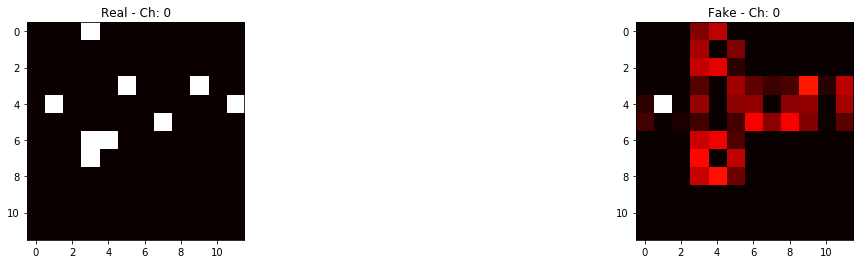

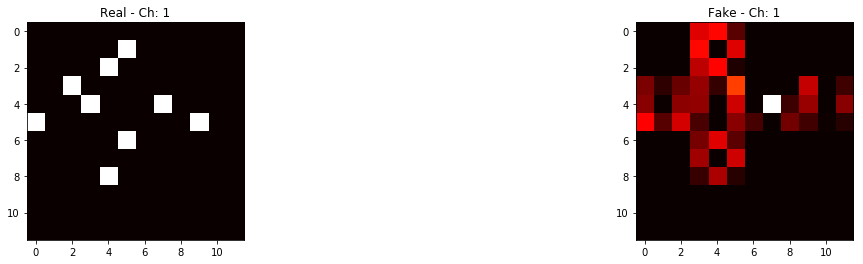

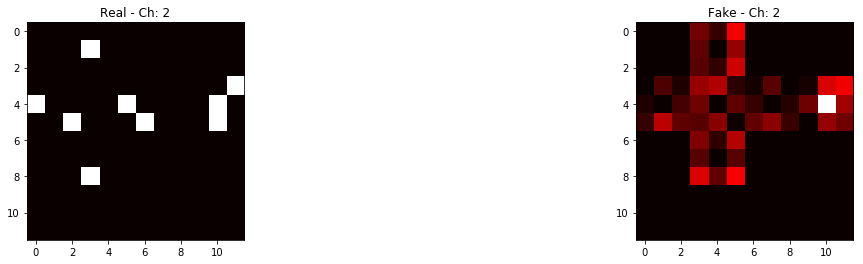

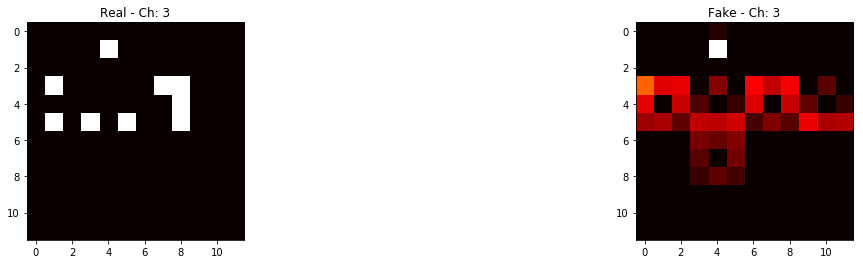

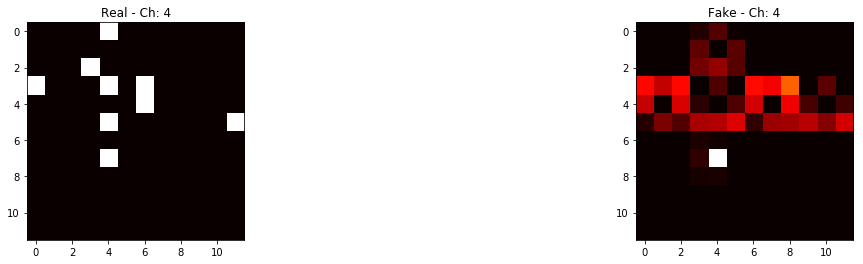

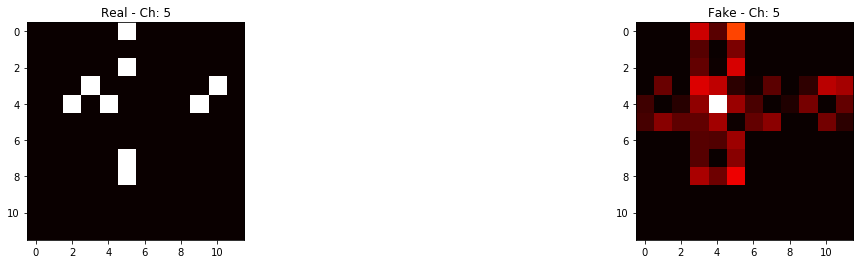

------------------------------------------------------------------------------------------------------------------------------------


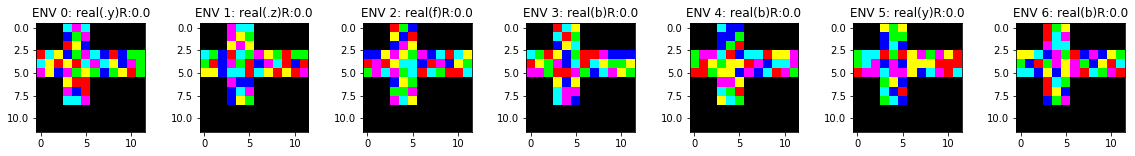

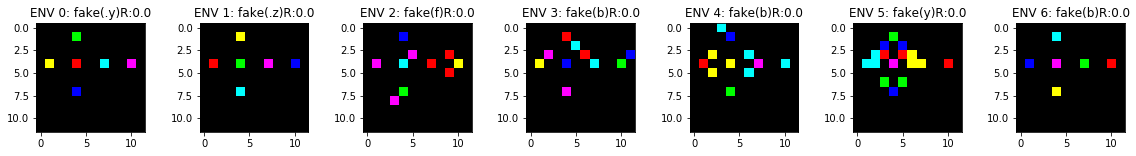

[[0 0 0 5 1 5 0 0 0 0 0 0]
 [0 0 0 4 3 1 0 0 0 0 0 0]
 [0 0 0 0 2 4 0 0 0 0 0 0]
 [0 5 2 4 3 1 5 4 0 4 3 3]
 [5 2 0 2 0 5 1 5 2 4 1 3]
 [1 2 4 1 3 2 3 4 3 2 0 3]
 [0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 1 4 0 0 0 0 0 0 0]
 [0 0 0 5 5 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 1 5 0 0 0 0 0 0]
 [0 0 0 1 3 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [1 5 2 3 3 3 2 2 1 4 3 3]
 [1 2 0 3 0 3 0 5 0 4 1 4]
 [4 4 3 1 5 1 4 4 4 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 2 0 0 0 0 0 0]
 [0 0 0 5 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


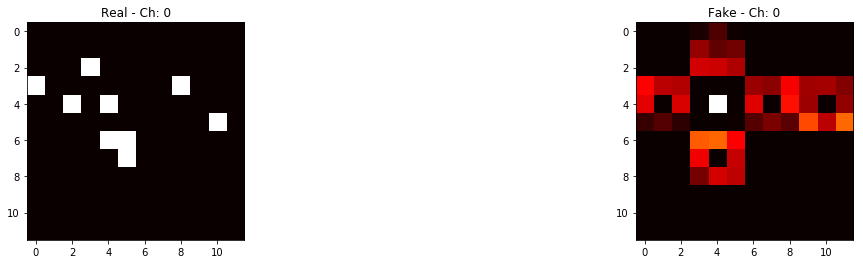

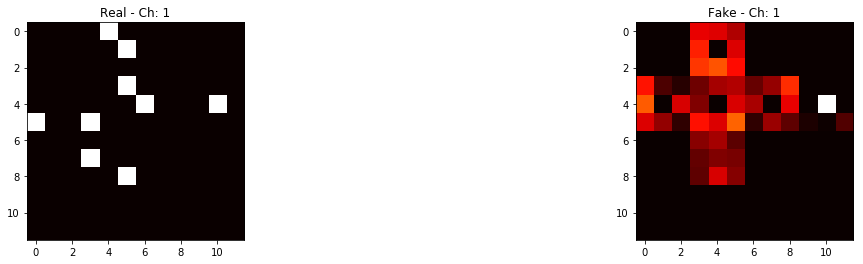

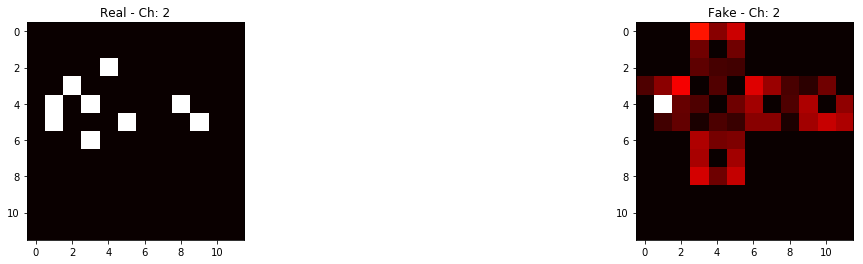

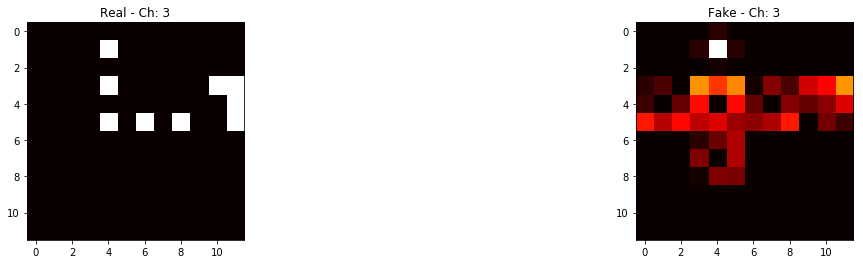

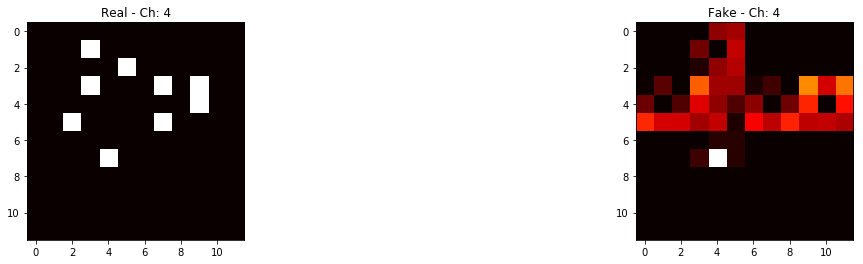

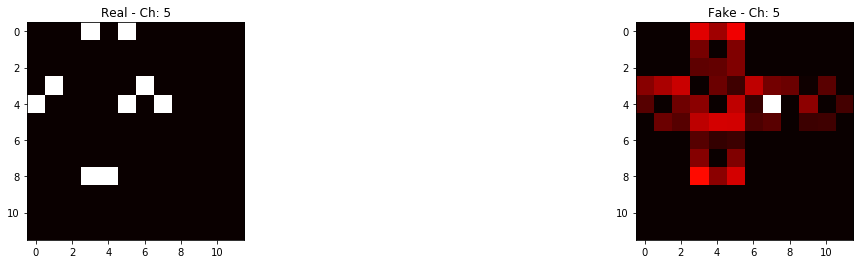

------------------------------------------------------------------------------------------------------------------------------------


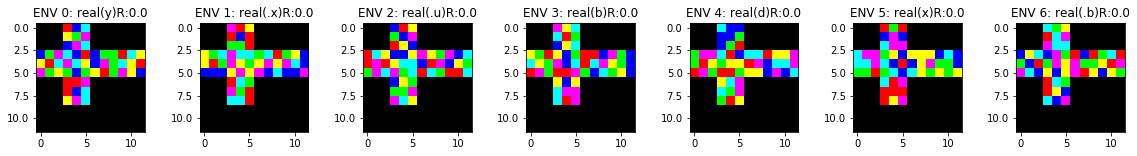

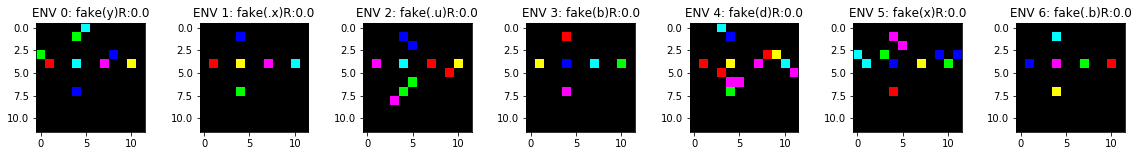

[[0 0 0 0 4 5 0 0 0 0 0 0]
 [0 0 0 2 3 1 0 0 0 0 0 0]
 [0 0 0 4 1 5 0 0 0 0 0 0]
 [4 3 1 5 4 0 4 3 3 0 5 2]
 [2 0 5 1 5 2 4 1 3 5 2 0]
 [1 3 2 3 4 3 2 0 3 1 2 4]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 4 5 0 0 0 0 0 0]
 [0 0 0 2 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 1 5 0 0 0 0 0 0]
 [0 0 0 1 3 1 0 0 0 0 0 0]
 [0 0 0 1 1 2 0 0 0 0 0 0]
 [3 3 3 5 5 1 4 4 4 1 2 2]
 [3 0 4 5 5 1 3 1 4 1 2 2]
 [1 2 2 3 3 4 5 5 0 3 2 4]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


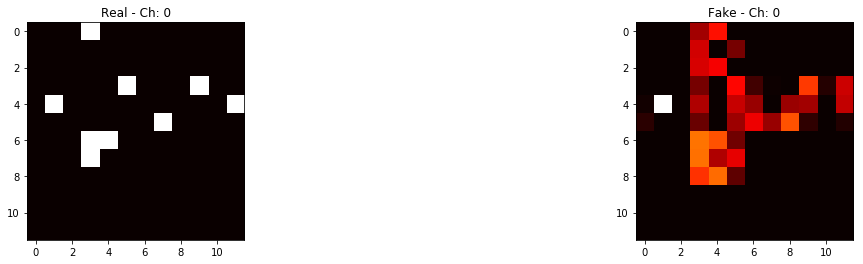

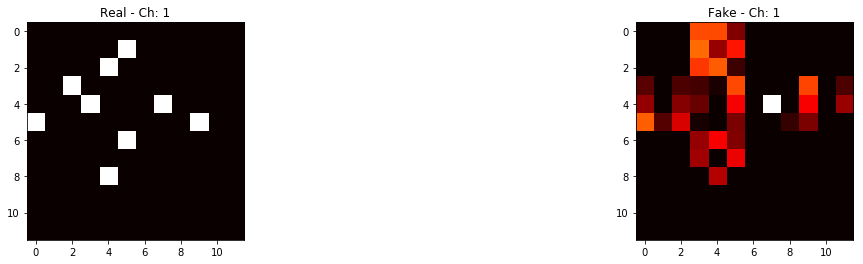

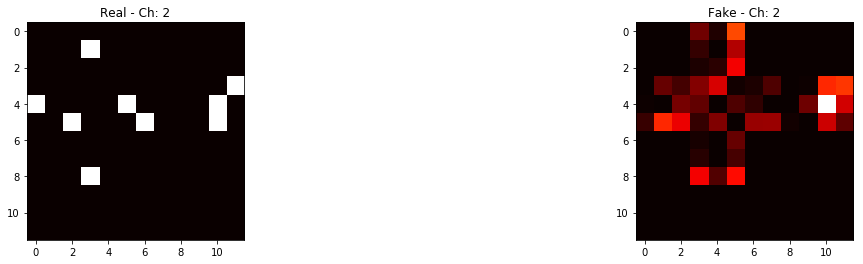

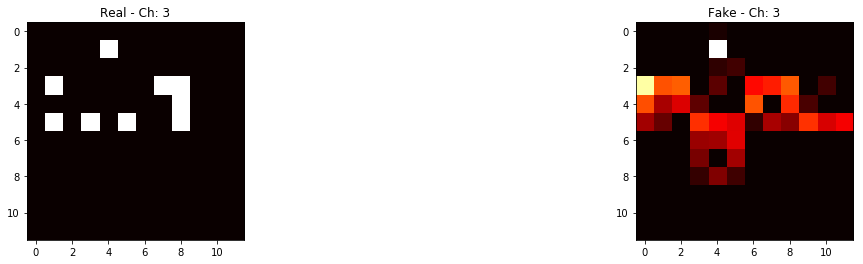

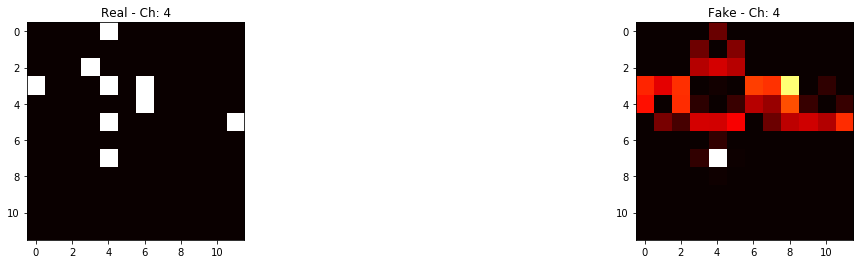

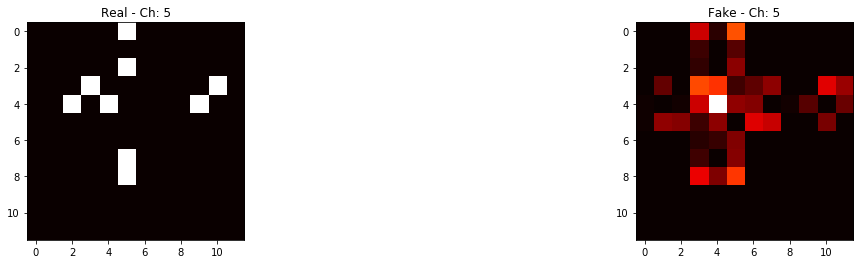

------------------------------------------------------------------------------------------------------------------------------------


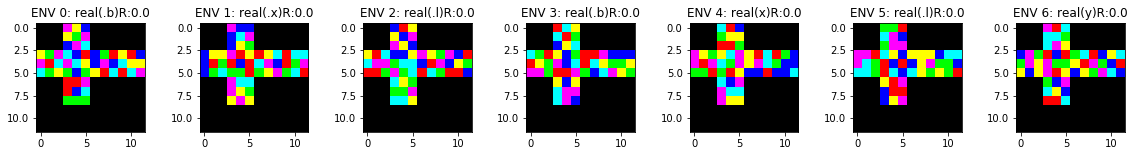

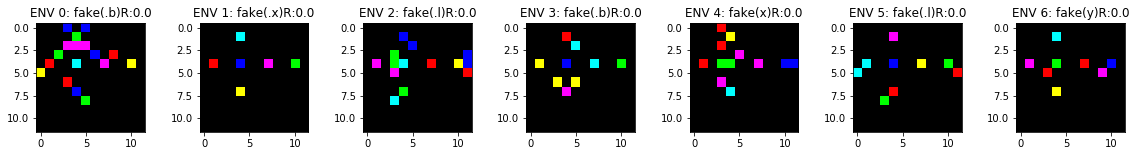

[[0 0 0 1 2 4 0 0 0 0 0 0]
 [0 0 0 2 3 1 0 0 0 0 0 0]
 [0 0 0 4 1 5 0 0 0 0 0 0]
 [2 3 1 5 4 0 4 3 0 2 0 4]
 [1 0 5 1 5 2 4 1 4 5 2 2]
 [5 3 2 3 4 3 2 0 5 0 5 1]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 4 5 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 1 3 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [1 3 3 5 2 5 4 4 0 2 2 5]
 [1 0 3 1 5 1 4 1 0 2 2 0]
 [2 2 2 3 3 1 5 5 5 1 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 3 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


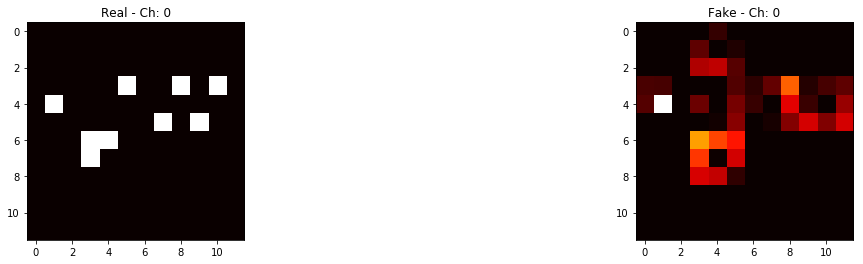

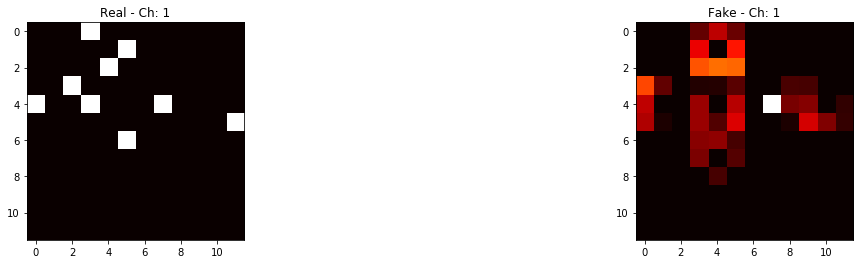

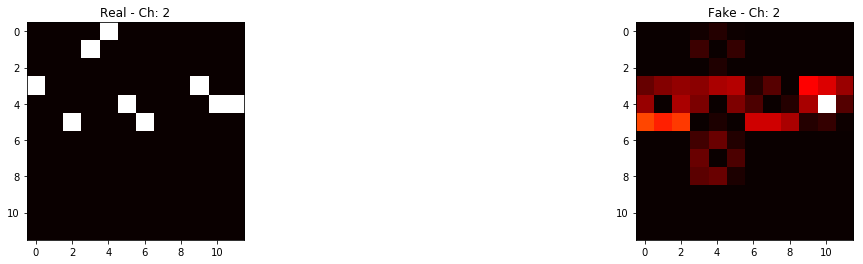

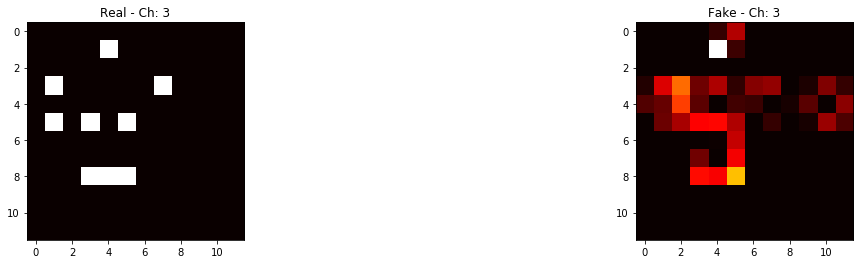

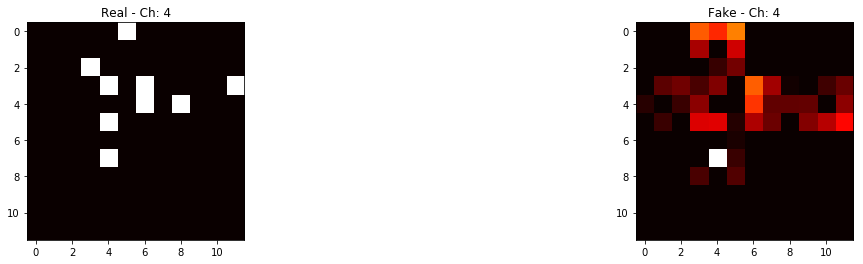

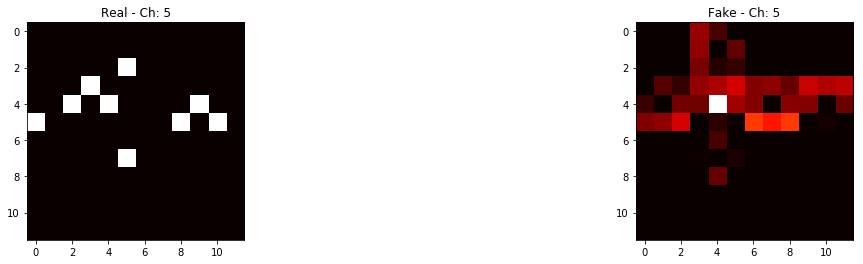

------------------------------------------------------------------------------------------------------------------------------------


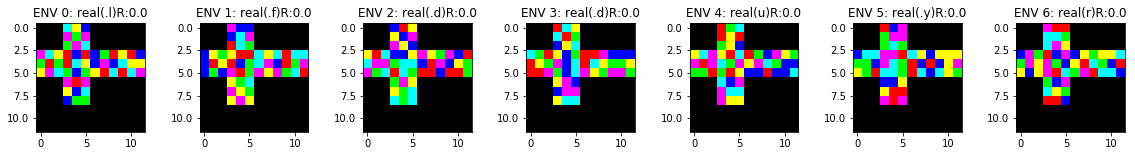

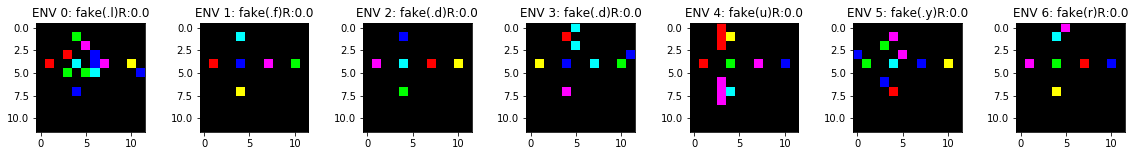

[[0 0 0 5 2 4 0 0 0 0 0 0]
 [0 0 0 1 3 1 0 0 0 0 0 0]
 [0 0 0 3 1 5 0 0 0 0 0 0]
 [1 5 2 0 4 0 4 3 0 2 0 4]
 [3 0 3 0 5 2 4 1 4 5 2 2]
 [2 1 5 3 4 3 2 0 5 0 5 1]
 [0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 2 4 5 0 0 0 0 0 0]
 [0 0 0 4 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 4 3 0 0 0 0 0 0]
 [0 0 0 5 3 1 0 0 0 0 0 0]
 [0 0 0 5 1 1 0 0 0 0 0 0]
 [1 3 3 0 5 5 4 4 0 1 2 1]
 [1 0 3 0 5 5 4 1 0 2 2 1]
 [1 2 2 3 3 3 5 5 0 4 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 2 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


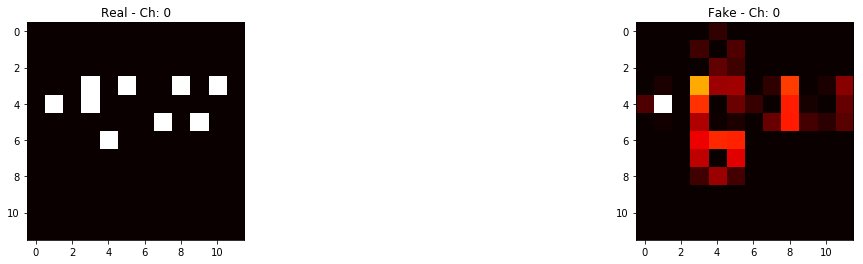

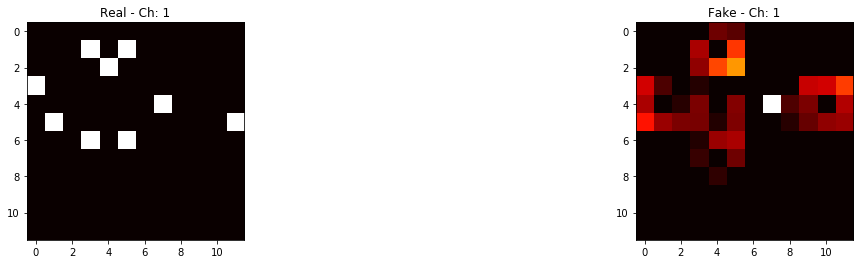

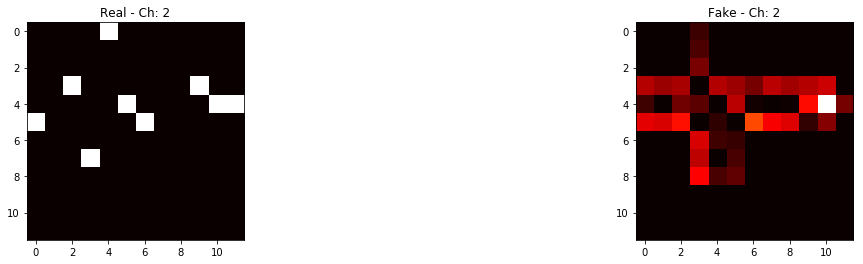

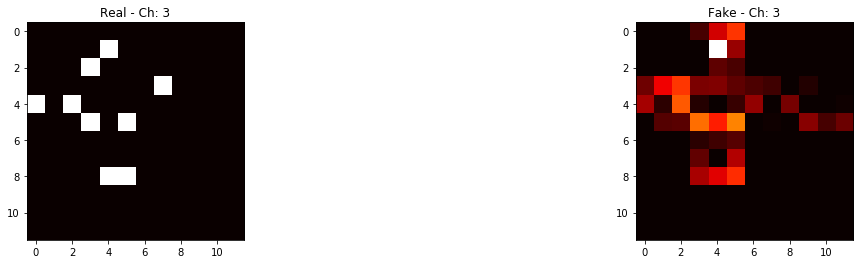

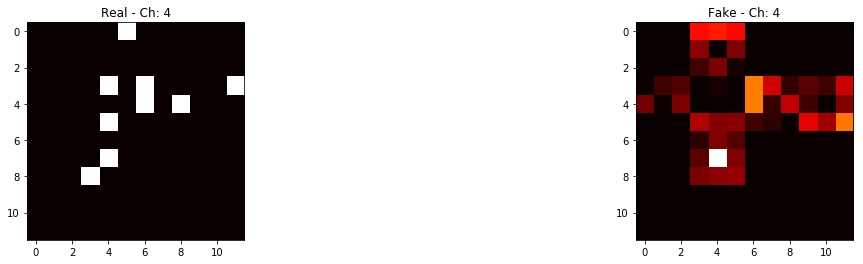

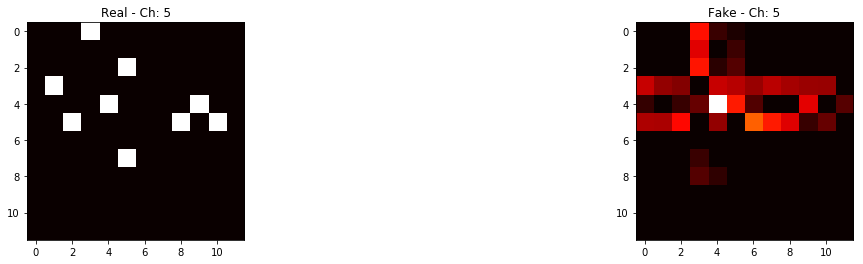

------------------------------------------------------------------------------------------------------------------------------------


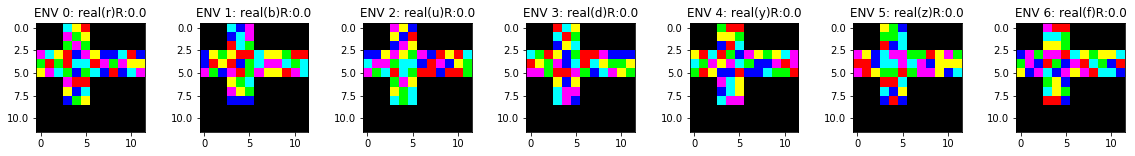

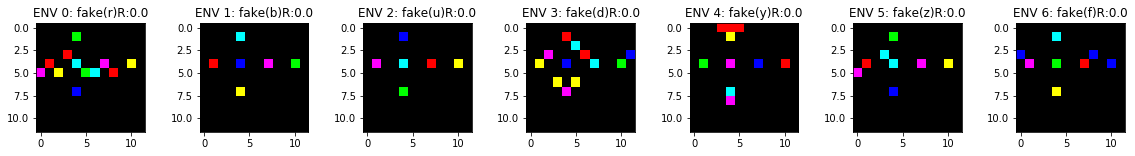

[[0 0 0 5 2 0 0 0 0 0 0 0]
 [0 0 0 1 3 2 0 0 0 0 0 0]
 [0 0 0 3 1 3 0 0 0 0 0 0]
 [1 5 2 0 4 1 2 4 4 5 0 4]
 [3 0 3 0 5 5 0 1 3 1 2 2]
 [2 1 5 3 4 3 5 4 0 4 5 1]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 2 4 5 0 0 0 0 0 0]
 [0 0 0 4 3 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 1 5 0 0 0 0 0 0]
 [0 0 0 1 3 1 0 0 0 0 0 0]
 [0 0 0 3 1 1 0 0 0 0 0 0]
 [3 5 2 0 2 0 5 4 4 1 5 1]
 [3 0 3 0 5 5 4 1 4 5 2 1]
 [1 2 2 3 3 3 5 5 0 4 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 2 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


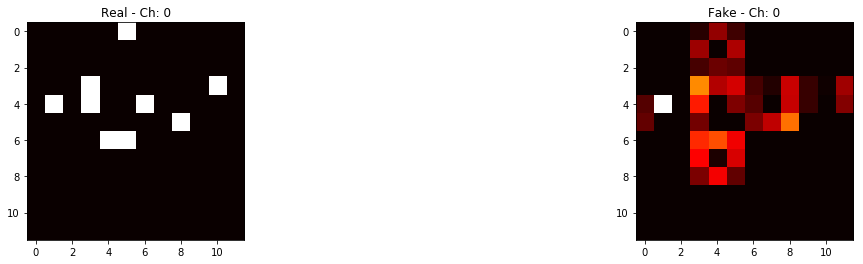

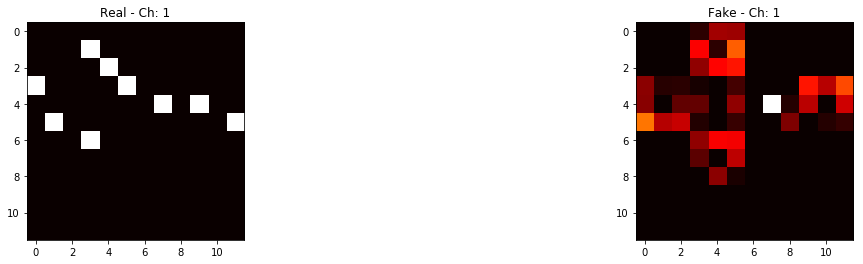

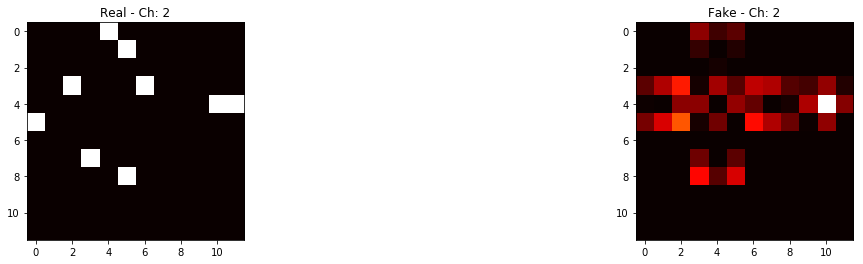

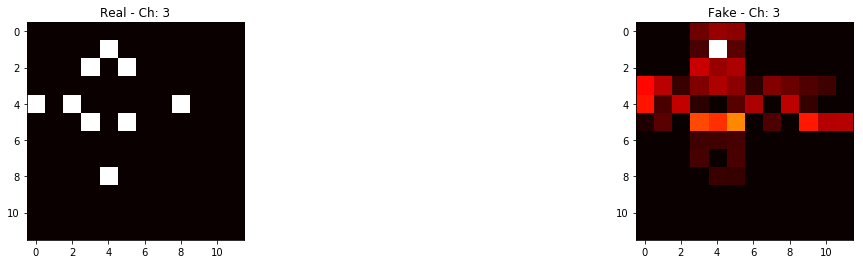

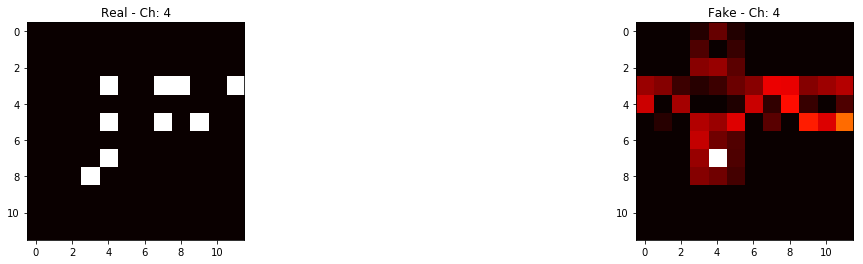

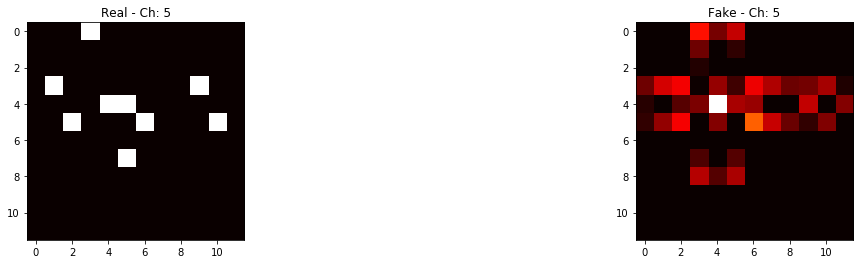

------------------------------------------------------------------------------------------------------------------------------------


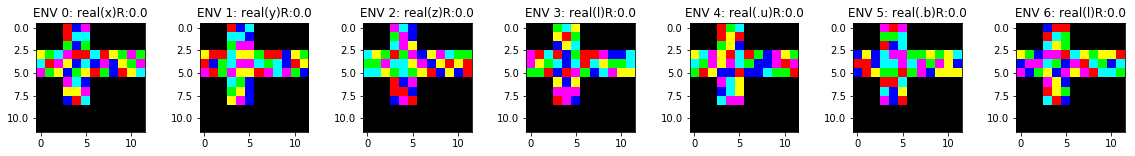

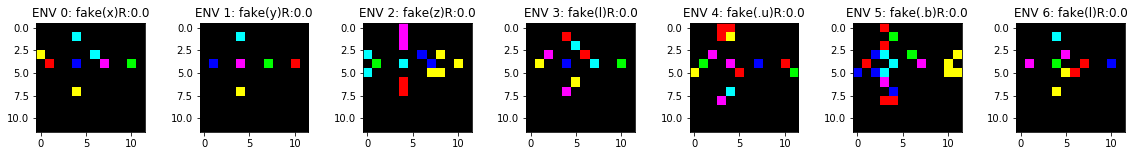

[[0 0 0 0 4 1 0 0 0 0 0 0]
 [0 0 0 0 5 5 0 0 0 0 0 0]
 [0 0 0 3 4 3 0 0 0 0 0 0]
 [2 3 5 1 0 0 5 0 2 3 1 3]
 [5 0 1 2 4 5 4 1 4 2 3 1]
 [1 3 2 4 3 2 0 3 4 0 2 5]
 [0 0 0 1 5 4 0 0 0 0 0 0]
 [0 0 0 2 2 1 0 0 0 0 0 0]
 [0 0 0 4 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 3 3 0 0 0 0 0 0]
 [0 0 0 0 5 1 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [2 2 2 0 0 1 5 5 5 1 1 3]
 [2 0 3 0 4 1 5 1 4 1 3 1]
 [3 1 1 2 2 2 0 0 0 5 5 5]
 [0 0 0 4 4 3 0 0 0 0 0 0]
 [0 0 0 2 2 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


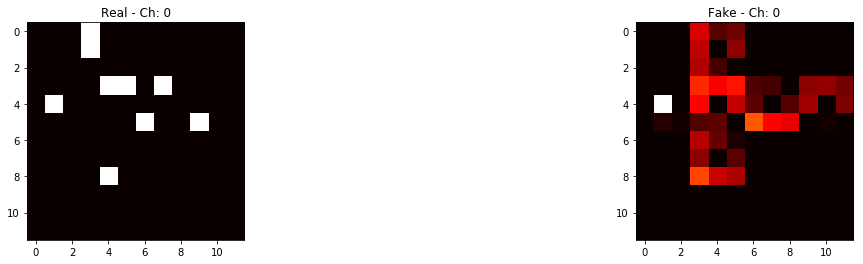

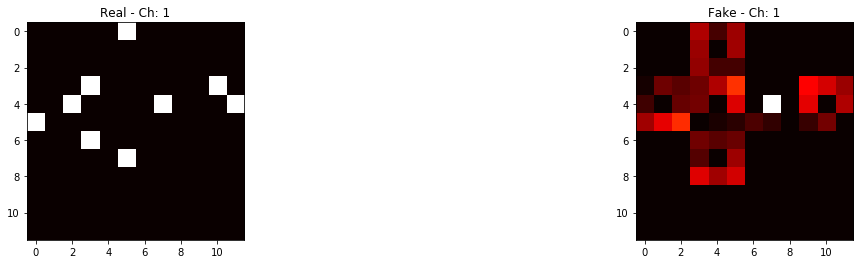

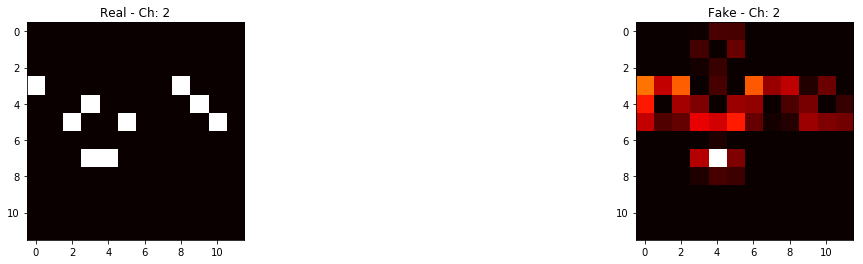

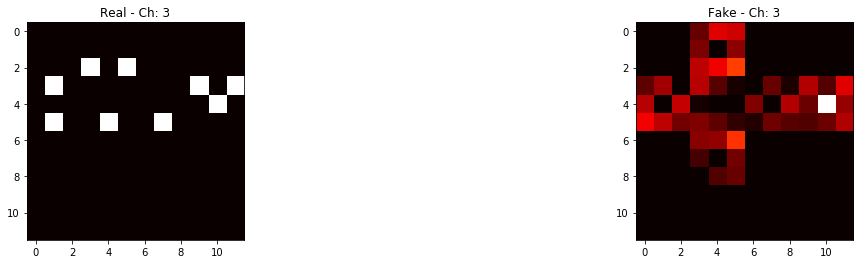

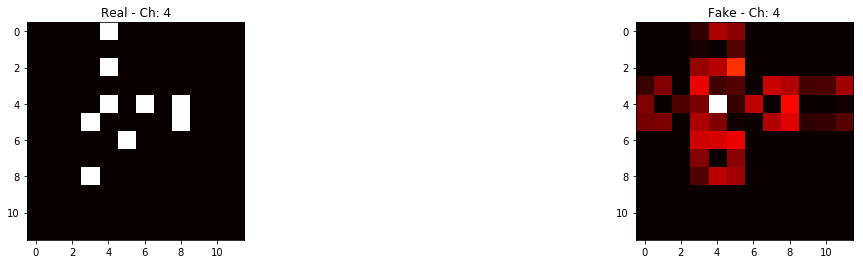

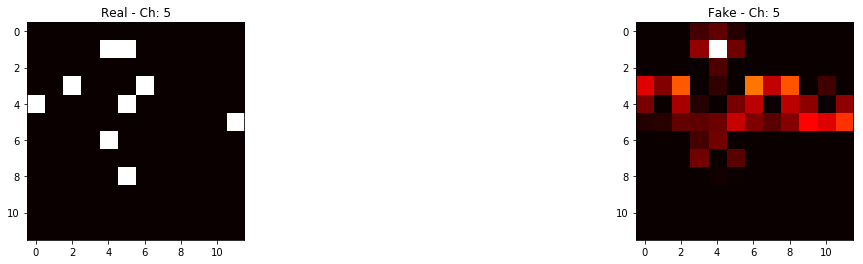

------------------------------------------------------------------------------------------------------------------------------------


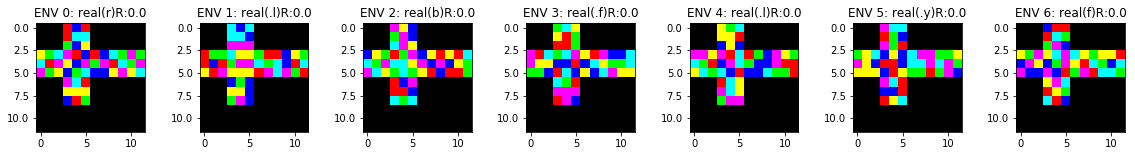

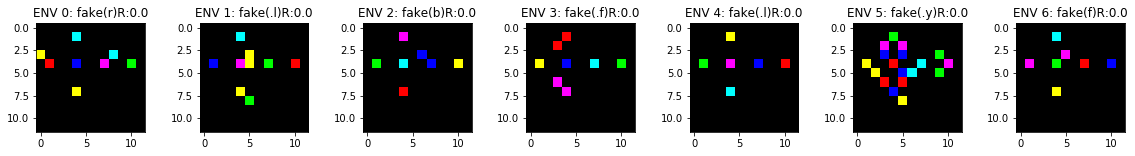

[[0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 5 5 0 0 0 0 0 0]
 [0 0 0 3 4 2 0 0 0 0 0 0]
 [2 3 5 1 0 4 0 4 5 3 1 3]
 [5 0 1 2 4 1 3 1 0 5 3 1]
 [1 3 2 4 3 5 4 4 2 1 2 5]
 [0 0 0 1 5 0 0 0 0 0 0 0]
 [0 0 0 2 2 2 0 0 0 0 0 0]
 [0 0 0 4 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 4 1 0 0 0 0 0 0]
 [0 0 0 0 5 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [2 2 2 4 4 4 5 5 5 3 3 3]
 [2 0 3 0 4 0 4 1 4 1 3 3]
 [2 3 1 2 2 2 0 0 0 5 5 5]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 2 1 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


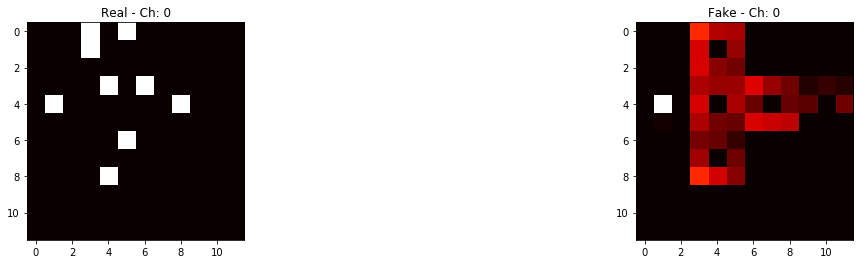

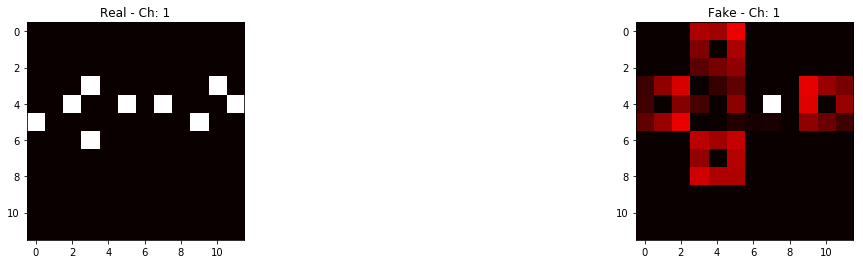

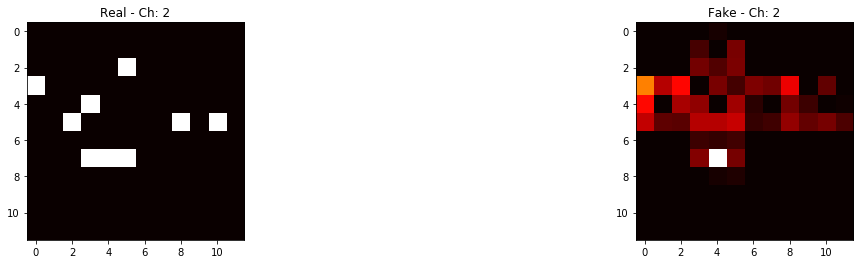

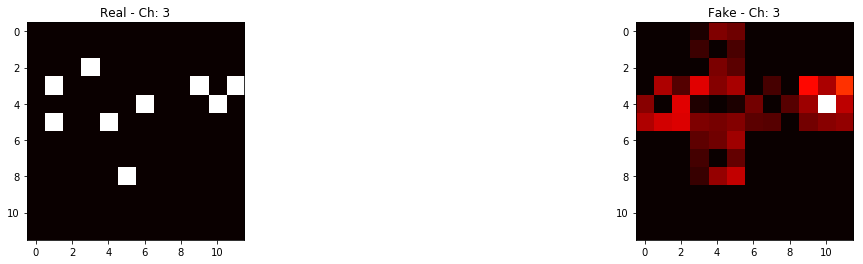

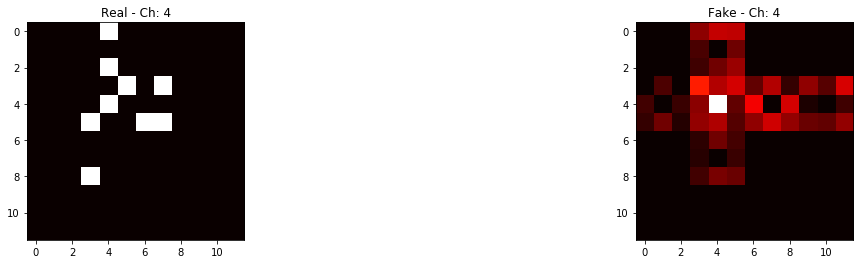

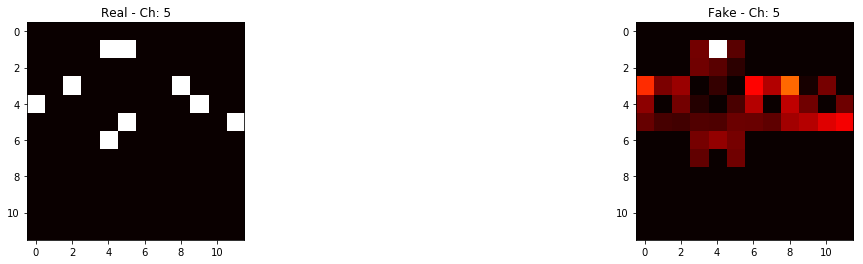

------------------------------------------------------------------------------------------------------------------------------------


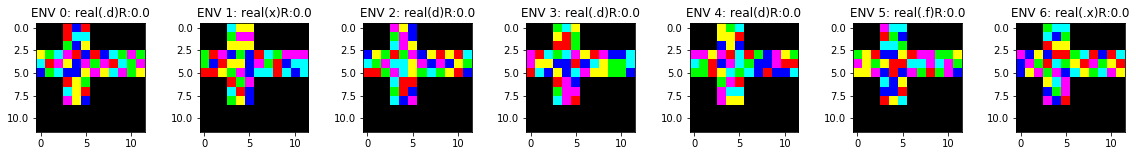

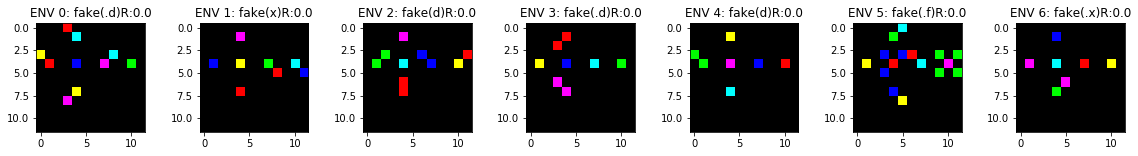

[[0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 5 5 0 0 0 0 0 0]
 [0 0 0 3 4 2 0 0 0 0 0 0]
 [2 3 5 1 0 4 0 4 5 3 1 3]
 [5 0 1 2 4 1 3 1 0 5 3 1]
 [4 3 5 4 4 2 1 2 5 1 3 2]
 [0 0 0 0 2 3 0 0 0 0 0 0]
 [0 0 0 5 2 0 0 0 0 0 0 0]
 [0 0 0 1 2 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 5 5 5 0 0 0 0 0 0]
 [0 0 0 0 5 3 0 0 0 0 0 0]
 [2 2 5 4 4 0 5 5 5 3 3 3]
 [2 0 5 4 4 0 5 1 5 3 3 3]
 [2 0 1 4 4 2 0 0 5 3 3 3]
 [0 0 0 3 4 3 0 0 0 0 0 0]
 [0 0 0 2 2 2 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


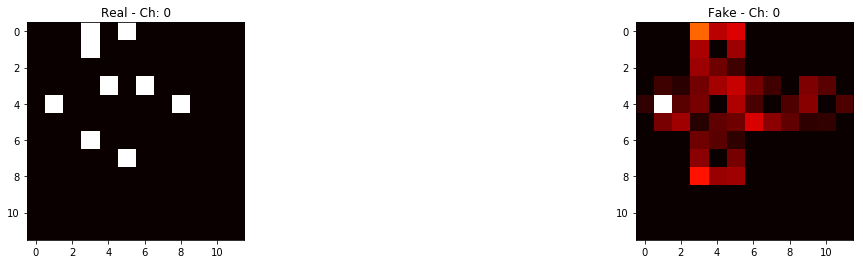

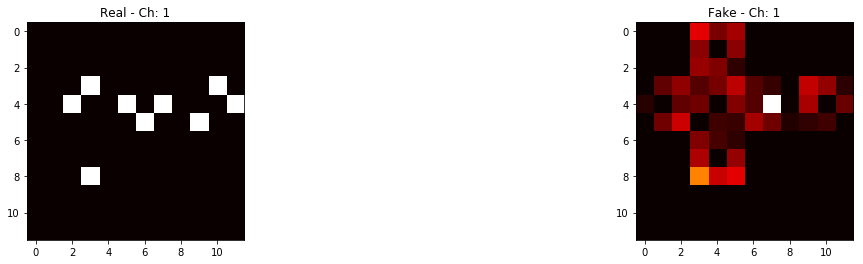

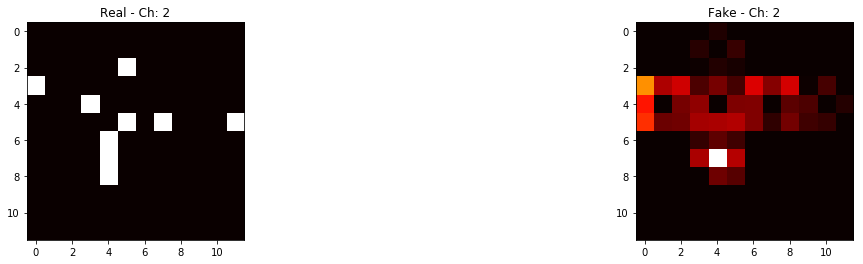

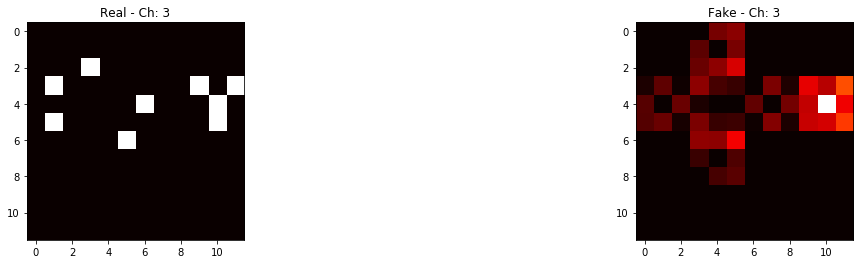

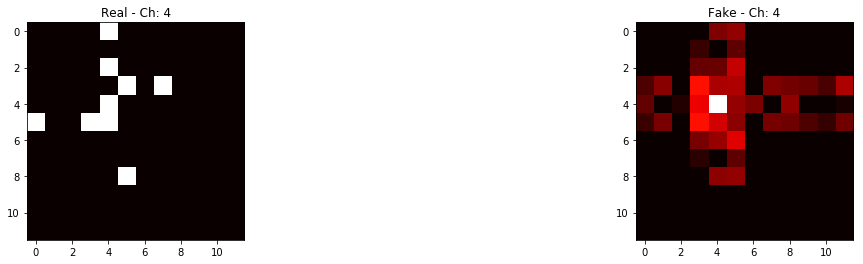

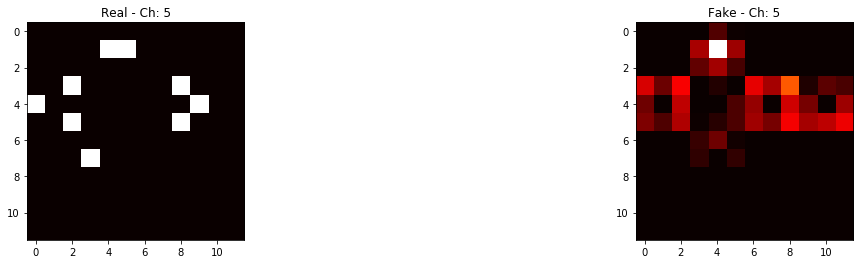

------------------------------------------------------------------------------------------------------------------------------------


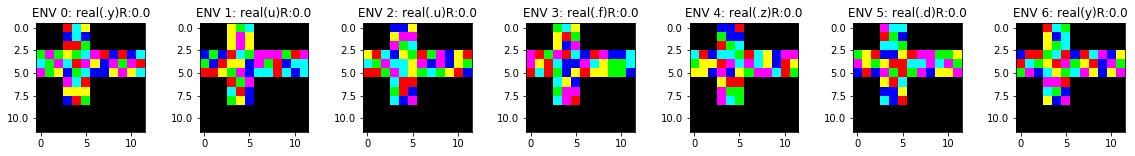

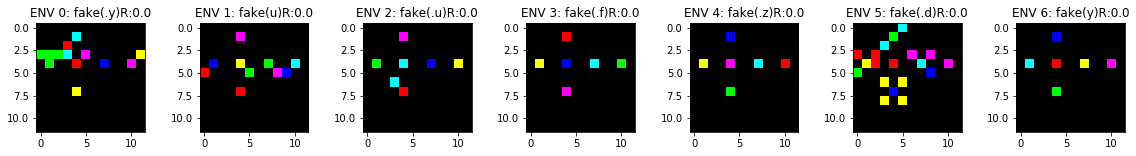

[[0 0 0 0 5 2 0 0 0 0 0 0]
 [0 0 0 4 5 4 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [3 1 3 2 3 5 1 0 4 0 4 5]
 [5 3 1 5 0 1 2 4 1 3 1 0]
 [1 3 2 4 3 5 4 4 2 1 2 5]
 [0 0 0 1 5 0 0 0 0 0 0 0]
 [0 0 0 2 2 2 0 0 0 0 0 0]
 [0 0 0 4 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 1 4 0 0 0 0 0 0]
 [0 0 0 0 5 5 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [3 3 3 5 3 1 4 4 4 0 2 2]
 [5 3 1 4 0 1 0 4 5 0 1 4]
 [1 3 1 5 4 1 0 0 0 0 4 4]
 [0 0 0 1 2 3 0 0 0 0 0 0]
 [0 0 0 1 2 3 0 0 0 0 0 0]
 [0 0 0 1 1 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


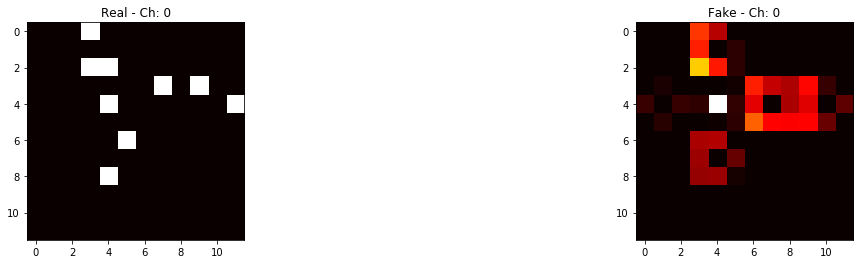

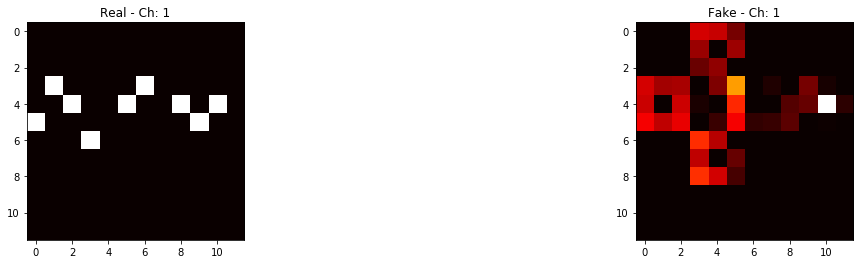

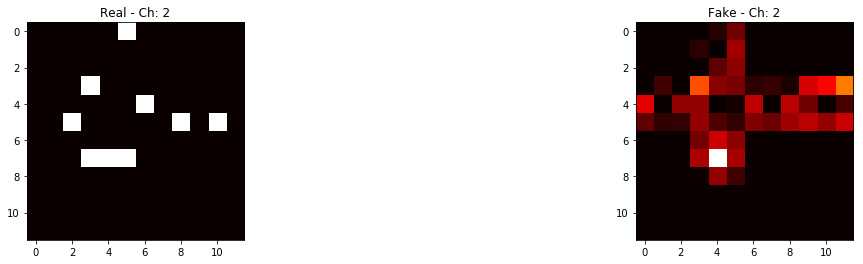

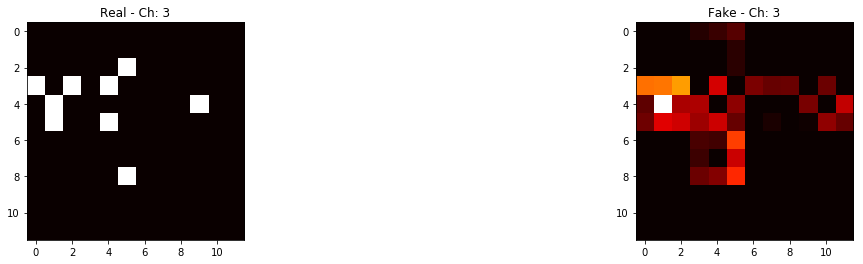

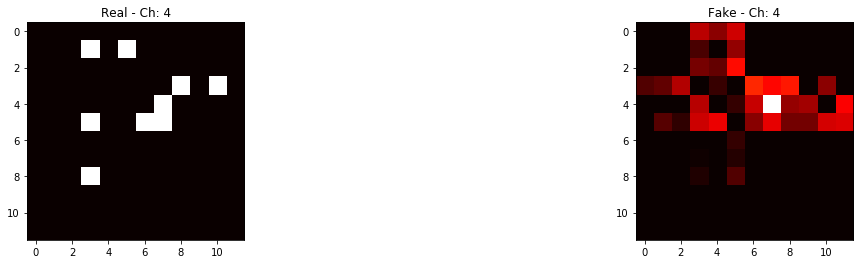

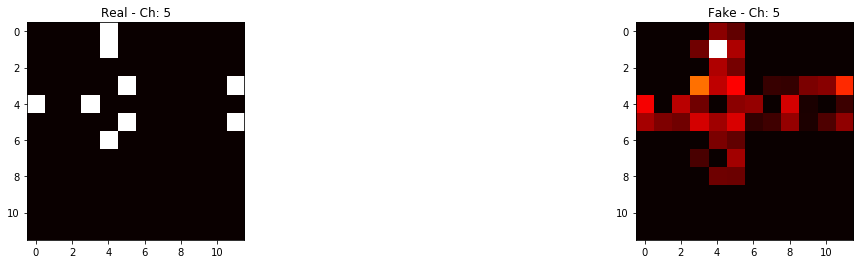

------------------------------------------------------------------------------------------------------------------------------------


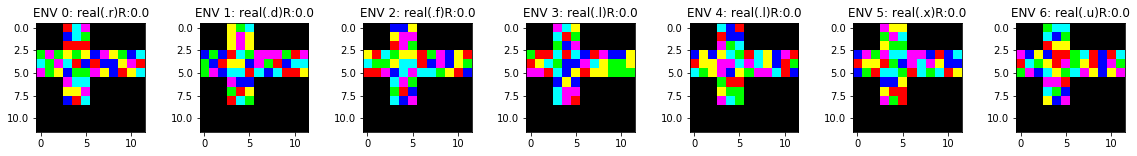

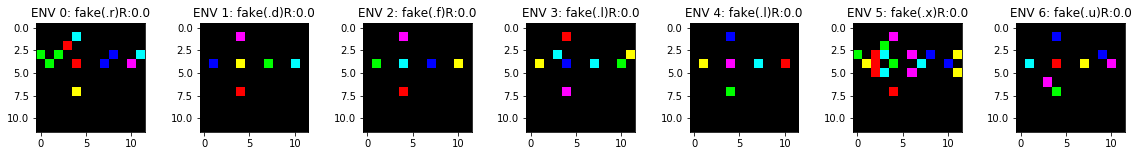

[[0 0 0 0 5 1 0 0 0 0 0 0]
 [0 0 0 4 5 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [3 1 3 2 3 2 4 1 2 3 4 5]
 [5 3 1 5 0 4 0 4 4 2 1 0]
 [1 3 2 4 3 3 1 2 4 0 2 5]
 [0 0 0 1 5 5 0 0 0 0 0 0]
 [0 0 0 2 2 1 0 0 0 0 0 0]
 [0 0 0 4 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 5 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [3 3 3 2 3 2 4 4 4 5 3 5]
 [2 3 5 4 0 3 0 4 0 3 1 4]
 [3 3 3 2 3 3 4 0 4 4 4 5]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 2 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


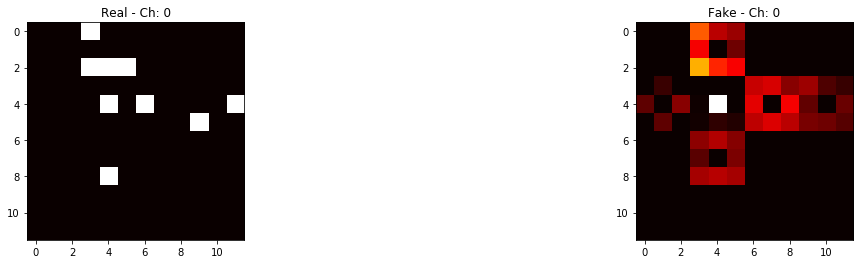

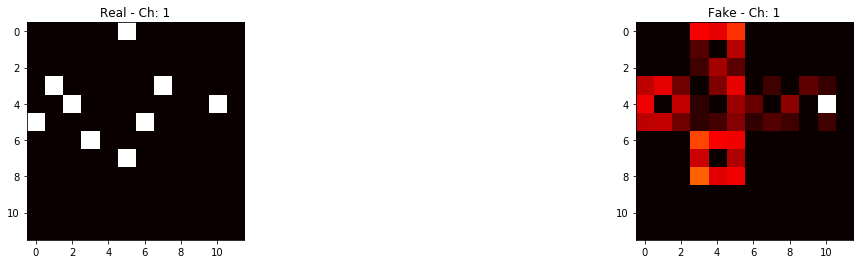

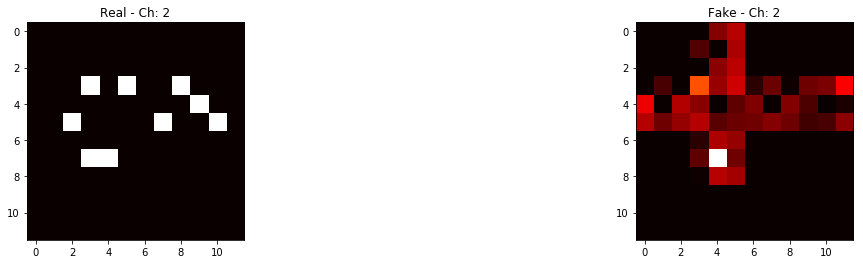

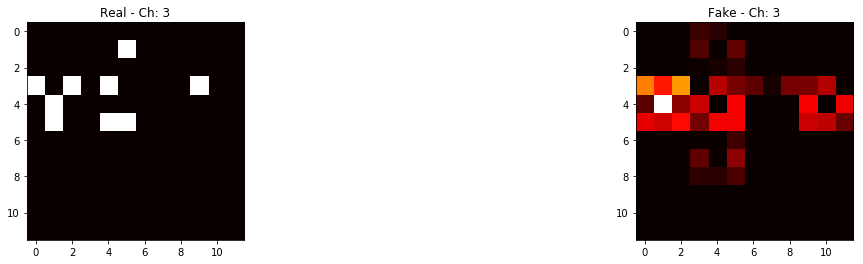

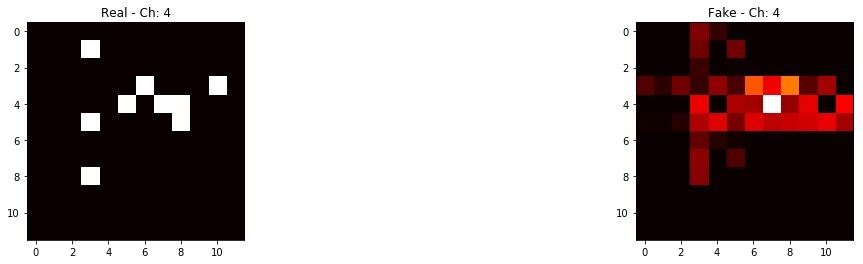

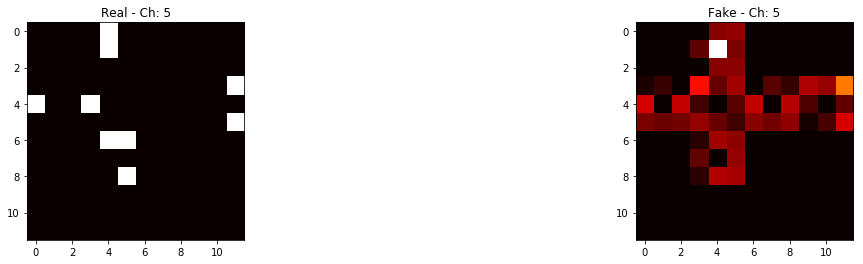

------------------------------------------------------------------------------------------------------------------------------------


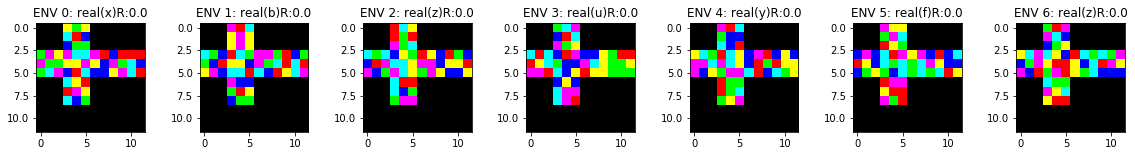

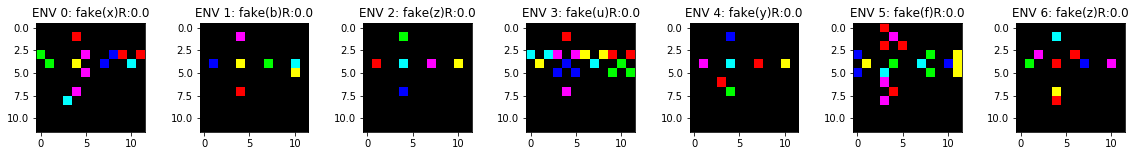

[[0 0 0 2 3 2 0 0 0 0 0 0]
 [0 0 0 5 0 4 0 0 0 0 0 0]
 [0 0 0 4 3 3 0 0 0 0 0 0]
 [3 1 2 1 5 5 1 0 4 0 0 0]
 [1 3 3 2 2 1 2 4 1 3 5 4]
 [3 5 1 4 0 5 4 4 2 1 5 0]
 [0 0 0 5 2 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 0 0 0 0 0 0]
 [0 0 0 5 4 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 4 1 0 0 0 0 0 0]
 [0 0 0 2 0 4 0 0 0 0 0 0]
 [0 0 0 2 1 4 0 0 0 0 0 0]
 [3 3 3 1 1 1 4 0 4 0 0 0]
 [1 3 2 4 2 1 0 4 4 2 5 4]
 [1 1 2 1 1 1 5 0 4 0 0 0]
 [0 0 0 5 0 3 0 0 0 0 0 0]
 [0 0 0 5 1 3 0 0 0 0 0 0]
 [0 0 0 5 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


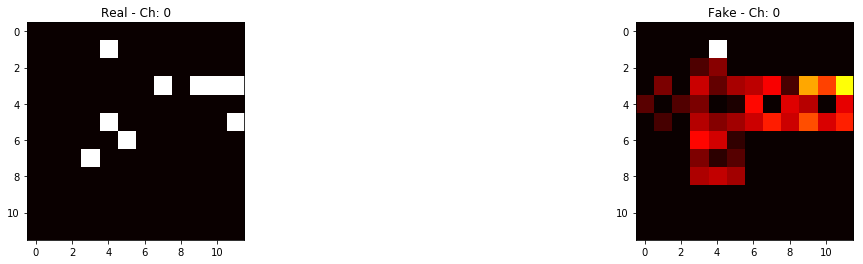

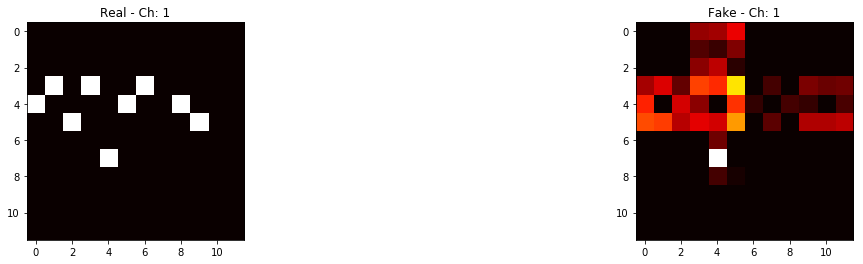

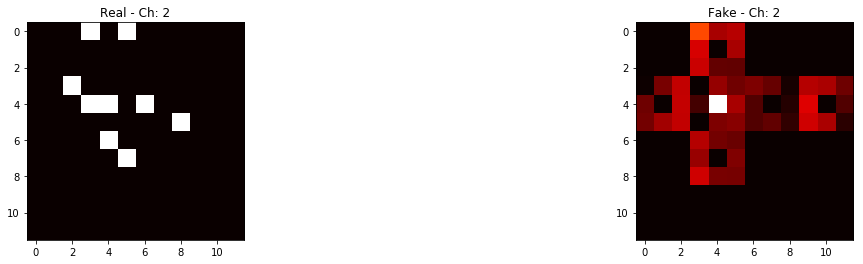

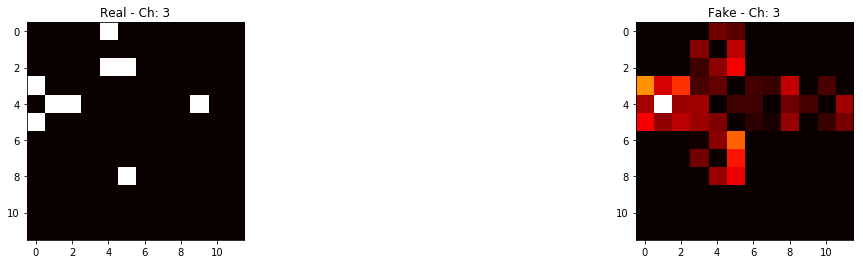

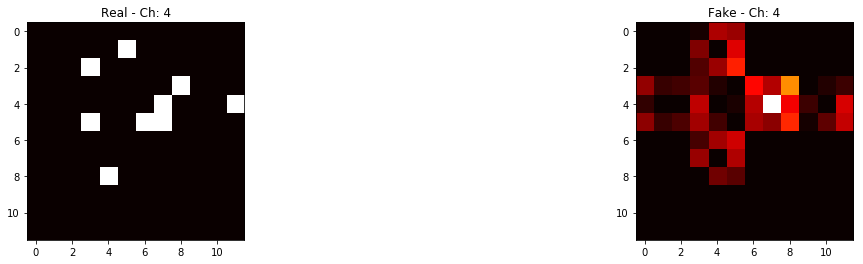

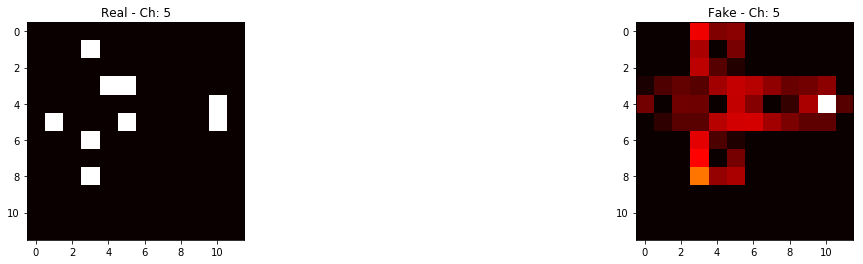

------------------------------------------------------------------------------------------------------------------------------------


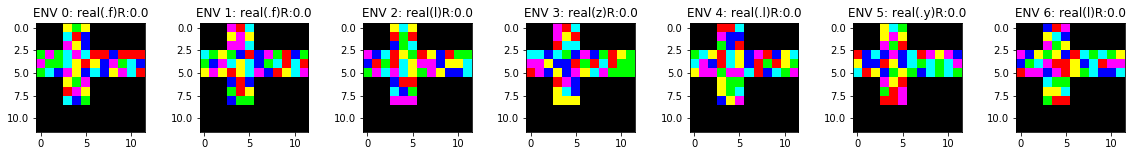

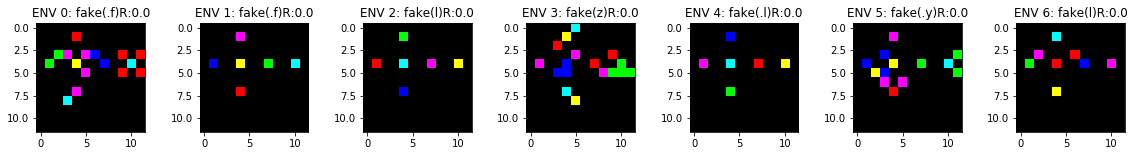

[[0 0 0 2 3 2 0 0 0 0 0 0]
 [0 0 0 5 0 4 0 0 0 0 0 0]
 [0 0 0 1 2 4 0 0 0 0 0 0]
 [3 1 3 5 1 5 0 0 4 0 0 0]
 [1 3 3 5 2 0 2 4 1 3 5 4]
 [3 5 4 1 2 4 5 4 2 1 5 0]
 [0 0 0 2 3 1 0 0 0 0 0 0]
 [0 0 0 0 1 2 0 0 0 0 0 0]
 [0 0 0 5 4 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 4 4 0 0 0 0 0 0]
 [0 0 0 2 0 4 0 0 0 0 0 0]
 [0 0 0 5 1 4 0 0 0 0 0 0]
 [3 1 3 1 1 1 4 0 4 0 0 0]
 [1 3 2 4 2 1 4 4 0 2 5 3]
 [3 1 3 1 1 1 4 5 4 0 0 0]
 [0 0 0 2 0 3 0 0 0 0 0 0]
 [0 0 0 5 1 3 0 0 0 0 0 0]
 [0 0 0 5 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


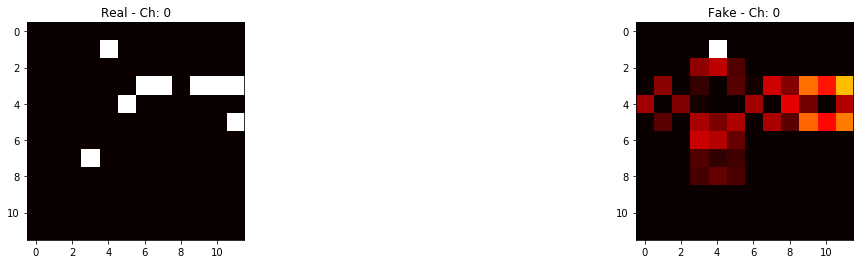

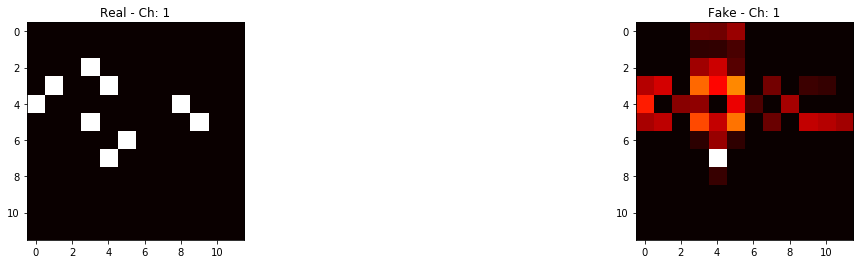

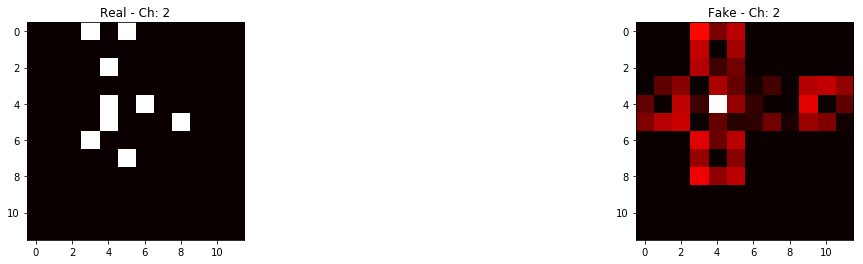

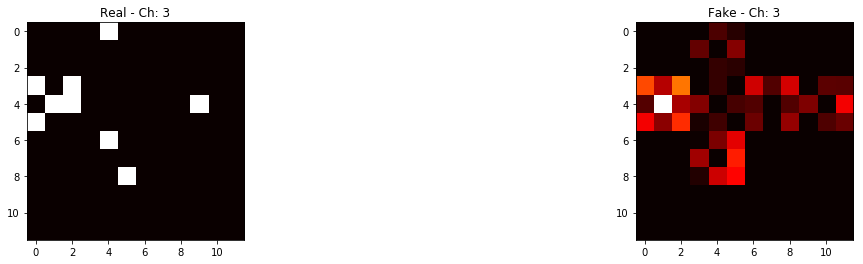

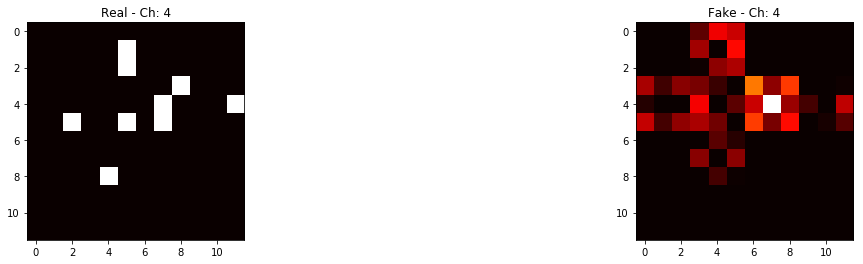

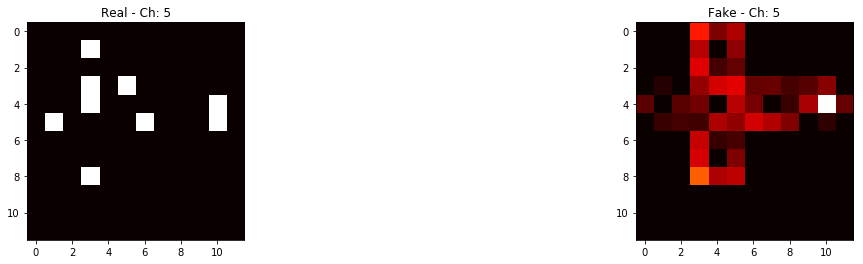

------------------------------------------------------------------------------------------------------------------------------------


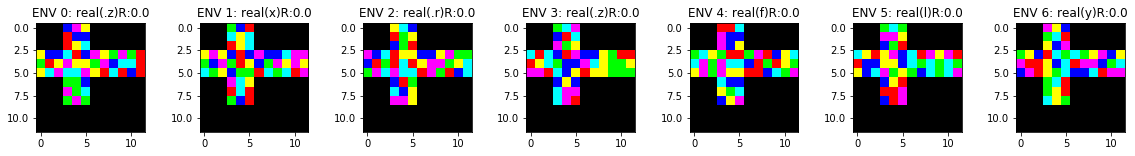

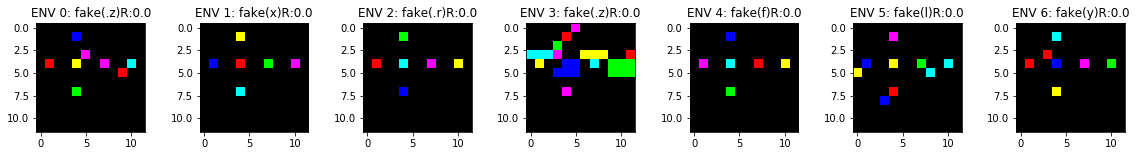

[[0 0 0 4 1 2 0 0 0 0 0 0]
 [0 0 0 0 4 4 0 0 0 0 0 0]
 [0 0 0 0 2 5 0 0 0 0 0 0]
 [2 4 4 5 0 4 1 2 3 1 3 0]
 [3 0 2 1 2 2 3 1 4 5 5 0]
 [2 5 1 5 5 1 2 0 5 0 4 0]
 [0 0 0 3 3 4 0 0 0 0 0 0]
 [0 0 0 1 3 5 0 0 0 0 0 0]
 [0 0 0 3 1 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 4 0 4 0 0 0 0 0 0]
 [2 2 4 1 1 1 3 5 5 0 2 0]
 [4 0 4 2 2 1 5 1 5 0 5 0]
 [2 2 4 1 1 1 3 5 5 0 2 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 3 1 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


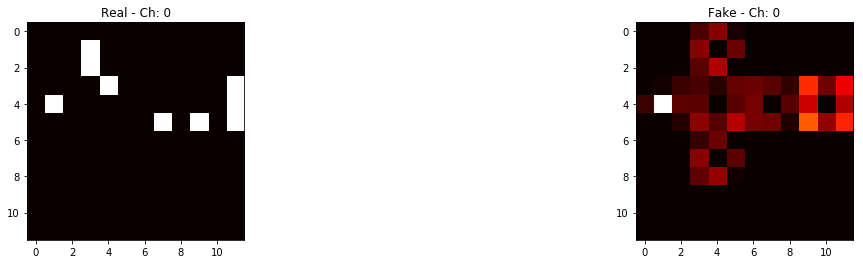

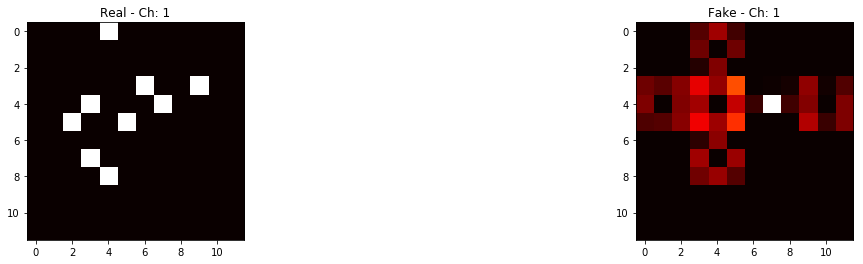

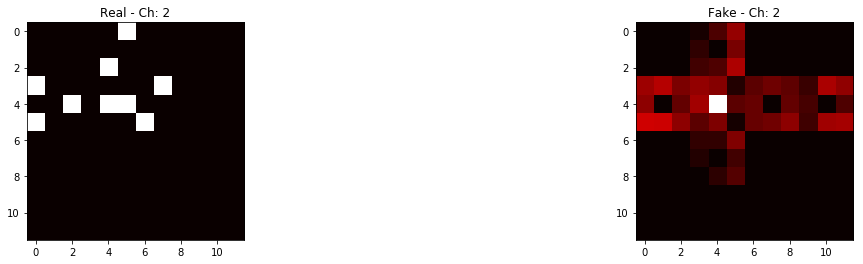

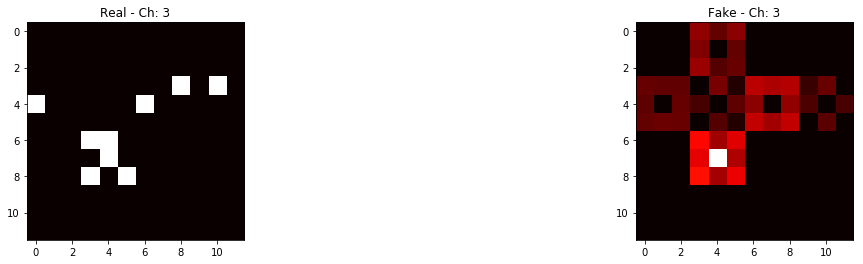

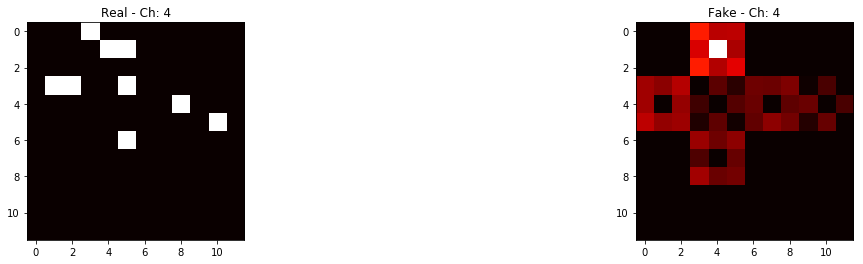

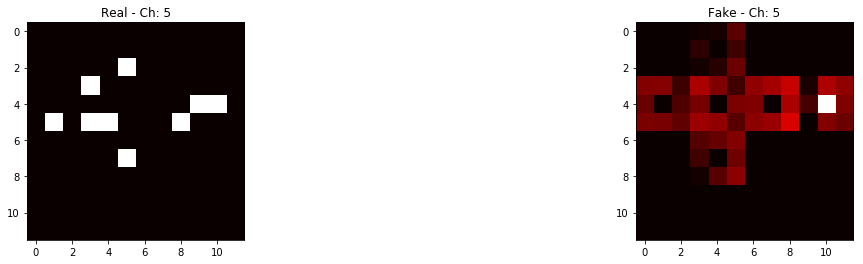

------------------------------------------------------------------------------------------------------------------------------------


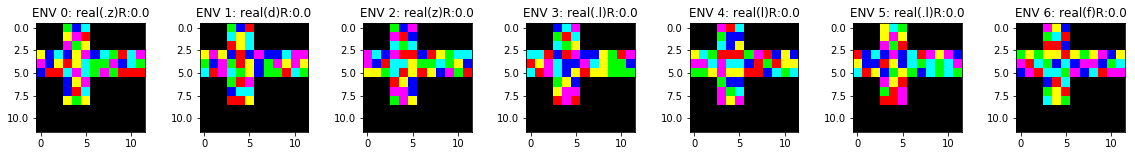

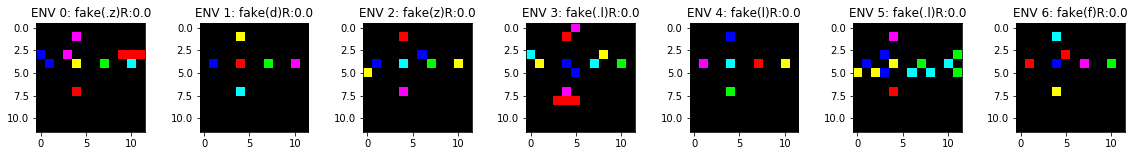

[[0 0 0 3 4 5 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 0 0 0 0]
 [0 0 0 1 3 2 0 0 0 0 0 0]
 [2 4 5 4 2 1 4 5 3 0 5 1]
 [1 4 2 0 2 5 3 3 1 4 5 3]
 [4 0 0 5 1 5 3 1 3 0 0 0]
 [0 0 0 4 2 1 0 0 0 0 0 0]
 [0 0 0 4 0 5 0 0 0 0 0 0]
 [0 0 0 2 3 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 5 5 0 0 0 0 0 0]
 [0 0 0 3 1 5 0 0 0 0 0 0]
 [0 0 0 3 4 0 0 0 0 0 0 0]
 [4 0 2 1 1 1 3 1 3 0 0 0]
 [4 4 0 1 2 5 4 3 1 0 5 5]
 [4 0 4 5 5 1 3 1 3 0 2 2]
 [0 0 0 1 4 2 0 0 0 0 0 0]
 [0 0 0 2 0 5 0 0 0 0 0 0]
 [0 0 0 2 4 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


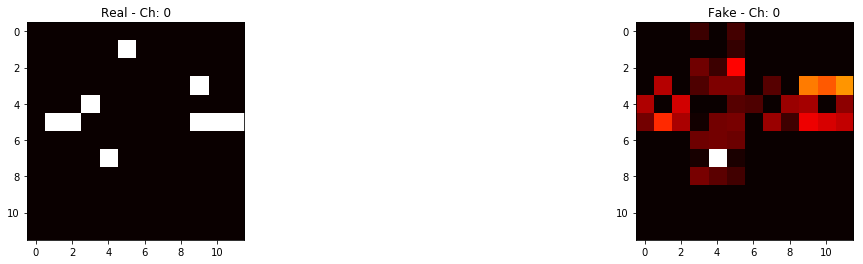

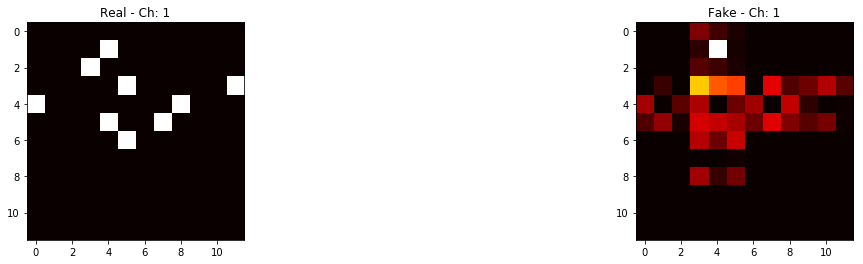

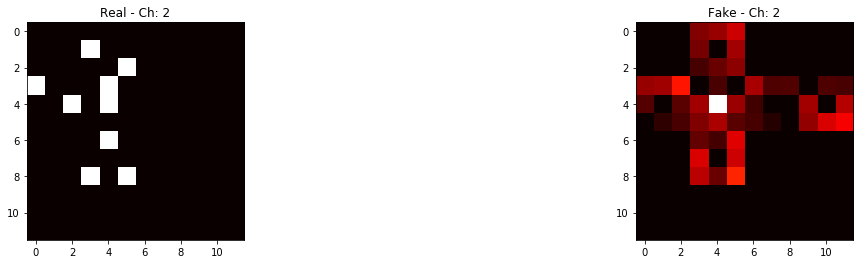

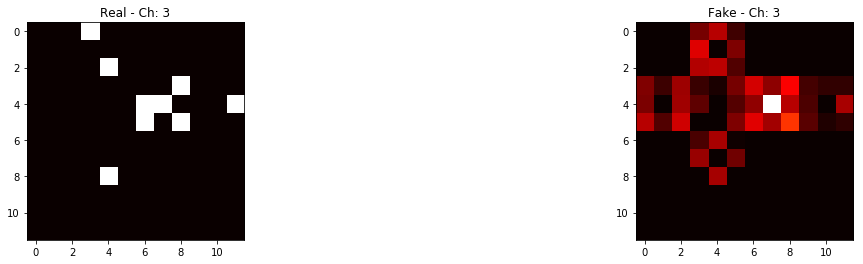

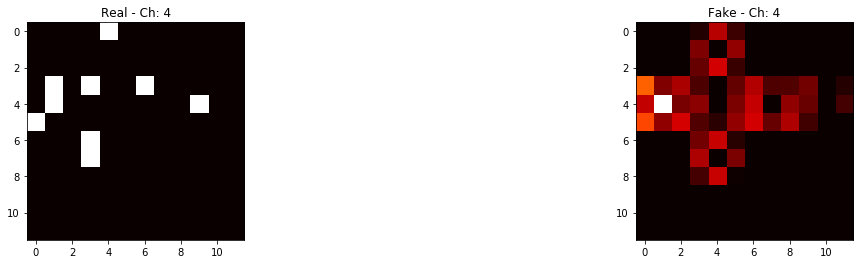

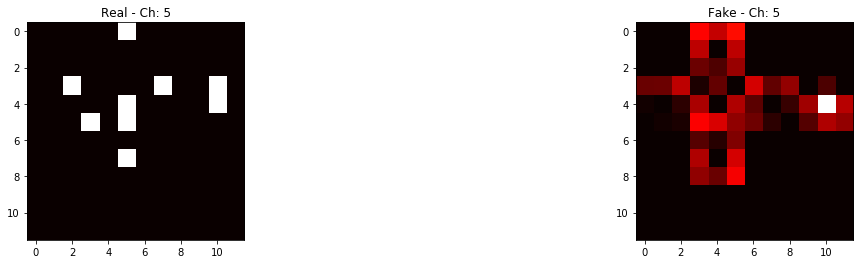

------------------------------------------------------------------------------------------------------------------------------------


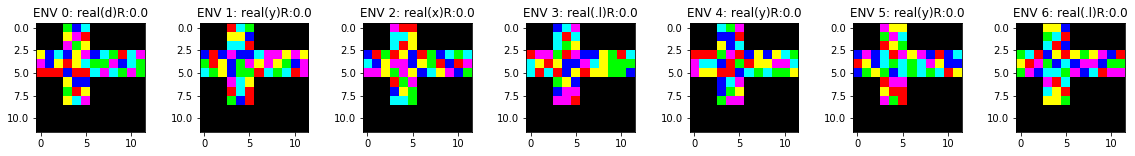

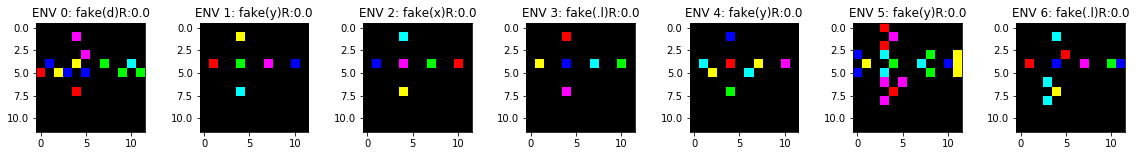

[[0 0 0 3 4 5 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 0 0 0 0]
 [0 0 0 1 3 2 0 0 0 0 0 0]
 [2 4 5 4 2 1 4 5 3 0 5 1]
 [1 4 2 0 2 5 3 3 1 4 5 3]
 [0 0 0 4 0 0 5 1 5 3 1 3]
 [0 0 0 2 4 4 0 0 0 0 0 0]
 [0 0 0 3 0 2 0 0 0 0 0 0]
 [0 0 0 2 5 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 3 5 0 0 0 0 0 0]
 [0 0 0 3 1 3 0 0 0 0 0 0]
 [0 0 0 0 3 5 0 0 0 0 0 0]
 [4 2 2 1 1 1 3 1 3 1 1 1]
 [0 4 0 4 2 2 1 3 1 3 5 3]
 [2 0 2 4 0 4 5 1 5 3 3 3]
 [0 0 0 1 4 2 0 0 0 0 0 0]
 [0 0 0 5 0 4 0 0 0 0 0 0]
 [0 0 0 2 4 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


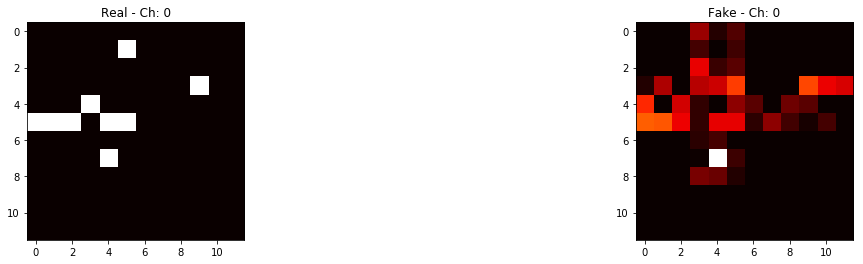

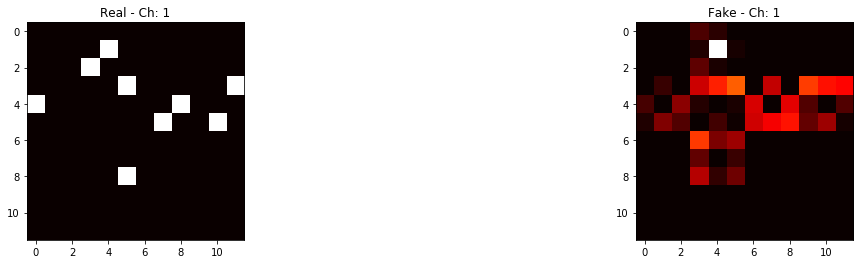

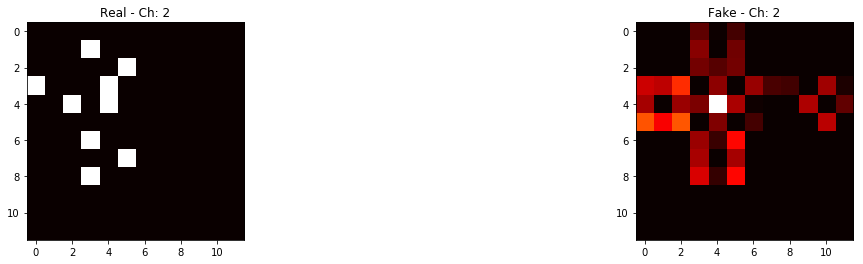

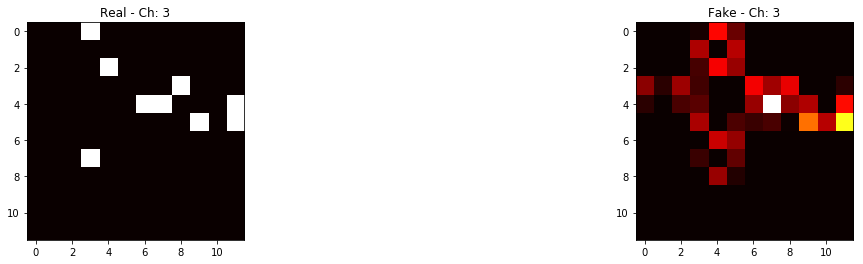

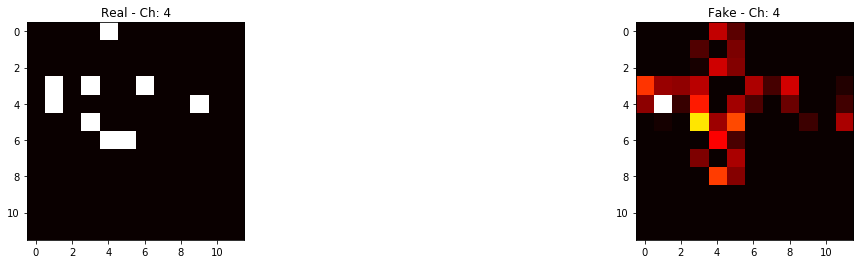

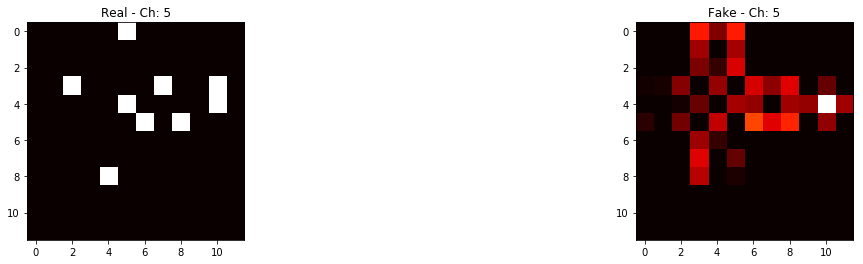

------------------------------------------------------------------------------------------------------------------------------------


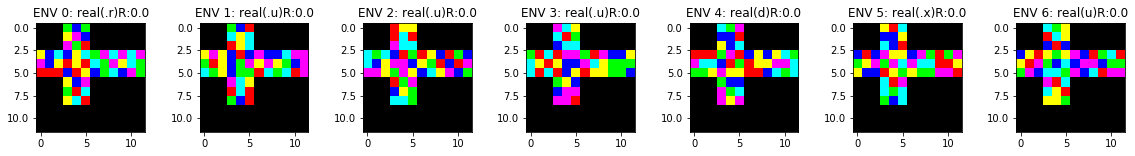

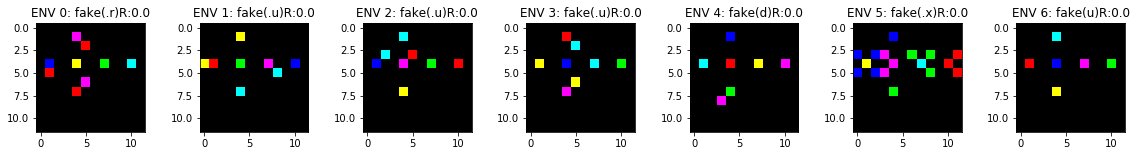

[[0 0 0 3 4 3 0 0 0 0 0 0]
 [0 0 0 2 1 4 0 0 0 0 0 0]
 [0 0 0 1 3 0 0 0 0 0 0 0]
 [2 4 5 4 2 5 3 1 5 1 5 1]
 [1 4 2 0 2 0 5 3 1 2 5 3]
 [0 0 0 4 0 2 4 3 5 4 1 3]
 [0 0 0 2 4 1 0 0 0 0 0 0]
 [0 0 0 3 0 5 0 0 0 0 0 0]
 [0 0 0 2 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 3 0 0 0 0 0 0 0]
 [0 0 0 5 1 3 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0]
 [2 0 2 0 0 0 5 1 5 1 1 1]
 [2 4 2 4 2 2 5 3 1 5 5 3]
 [0 0 2 4 0 4 5 1 1 3 1 3]
 [0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 5 0 4 0 0 0 0 0 0]
 [0 0 0 5 4 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


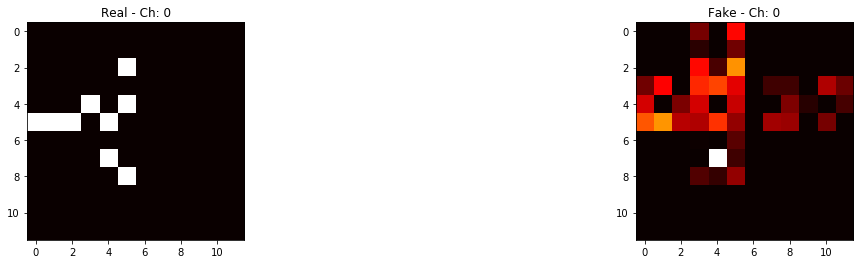

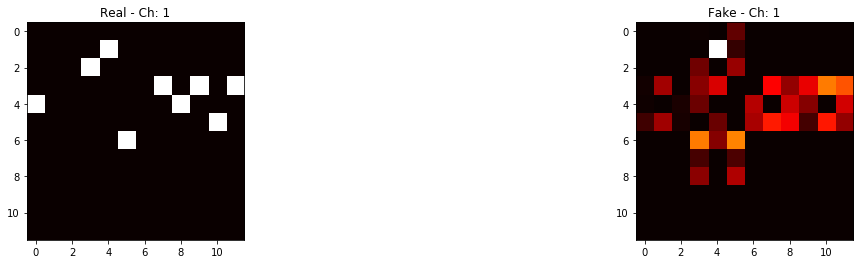

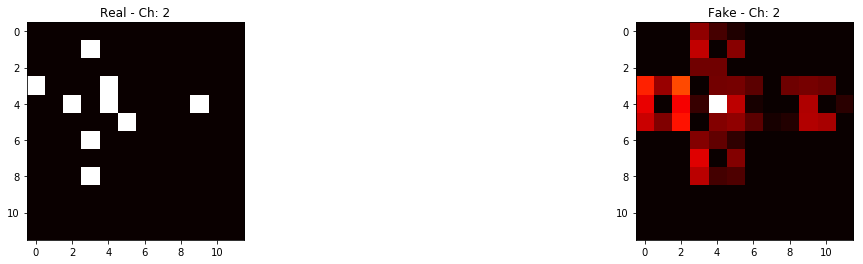

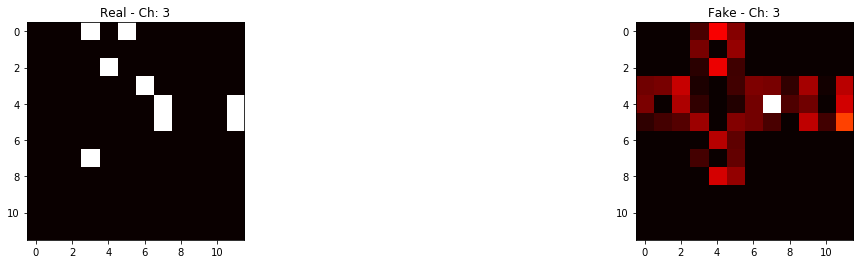

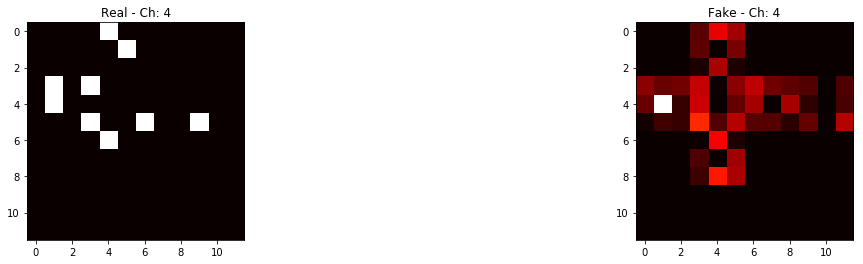

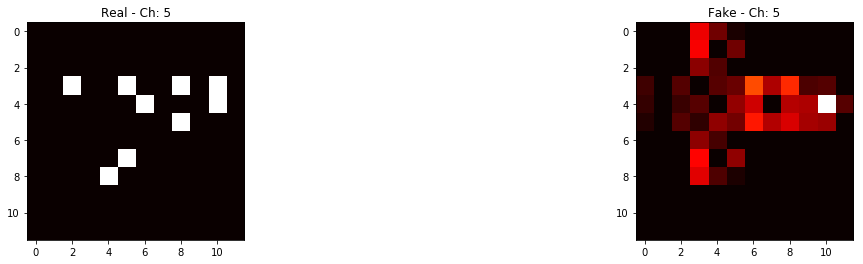

------------------------------------------------------------------------------------------------------------------------------------


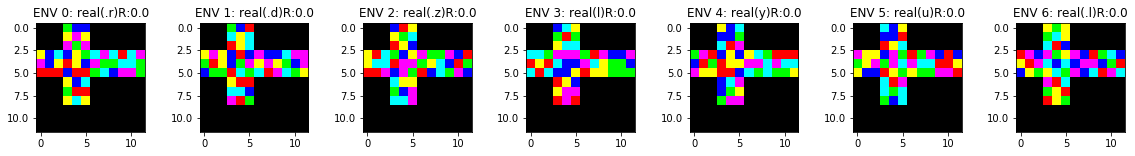

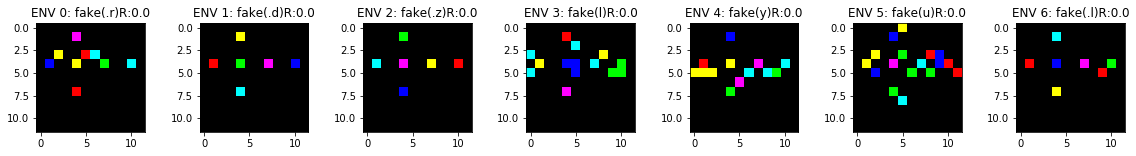

[[0 0 0 3 4 4 0 0 0 0 0 0]
 [0 0 0 2 1 2 0 0 0 0 0 0]
 [0 0 0 1 3 1 0 0 0 0 0 0]
 [2 4 5 4 2 3 5 1 5 0 5 1]
 [1 4 2 0 2 4 1 3 3 5 5 3]
 [0 0 0 4 0 0 3 5 4 1 1 3]
 [0 0 0 2 4 5 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 2 5 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 4 4 0 0 0 0 0 0]
 [0 0 0 5 1 2 0 0 0 0 0 0]
 [0 0 0 1 3 1 0 0 0 0 0 0]
 [2 0 2 4 0 0 5 5 5 1 1 3]
 [0 4 2 4 2 2 1 3 1 5 5 3]
 [2 0 2 4 0 0 5 1 5 1 1 3]
 [0 0 0 5 4 2 0 0 0 0 0 0]
 [0 0 0 5 0 5 0 0 0 0 0 0]
 [0 0 0 5 4 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


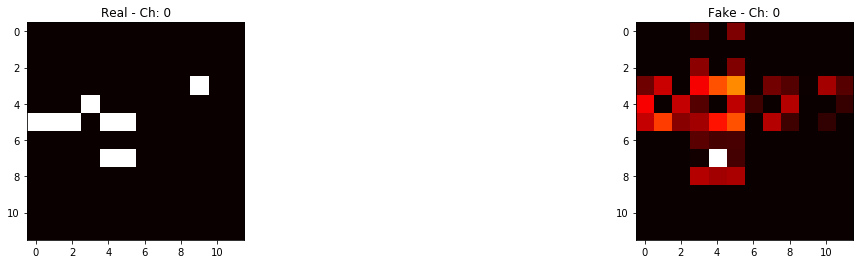

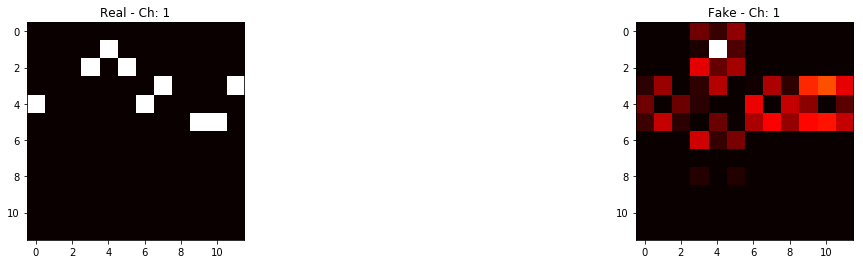

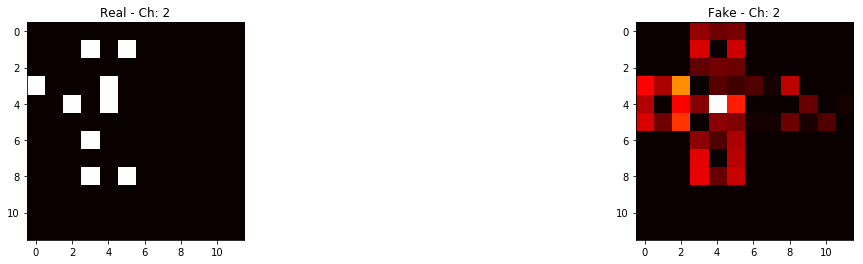

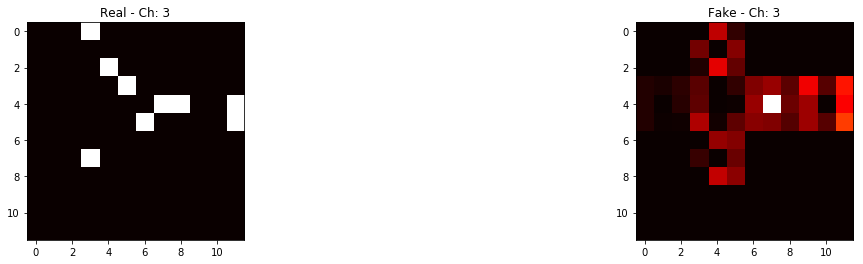

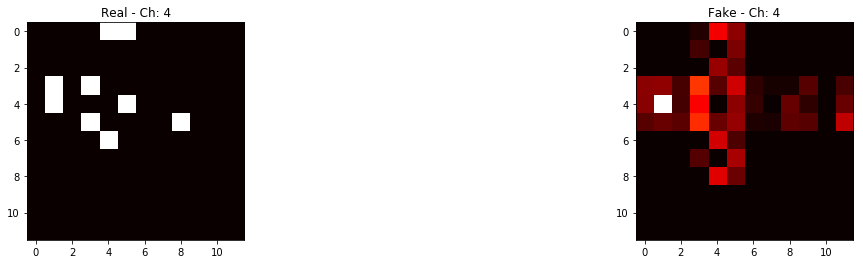

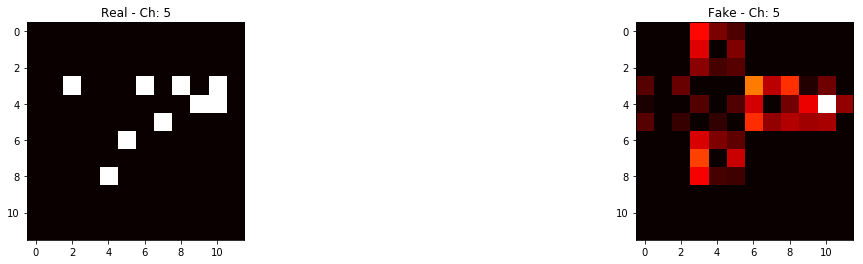

------------------------------------------------------------------------------------------------------------------------------------


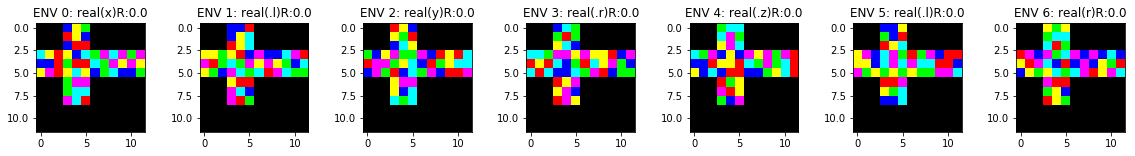

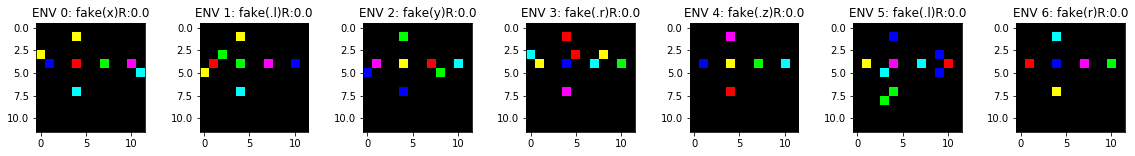

[[0 0 0 4 2 3 0 0 0 0 0 0]
 [0 0 0 0 2 4 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [5 2 0 2 4 5 3 1 5 1 3 1]
 [4 4 0 3 0 0 5 3 1 2 1 2]
 [2 1 0 2 5 2 4 3 5 4 4 3]
 [0 0 0 3 1 1 0 0 0 0 0 0]
 [0 0 0 3 5 5 0 0 0 0 0 0]
 [0 0 0 1 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 4 0 0 0 0 0 0 0]
 [0 0 0 4 2 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [2 2 2 1 2 0 5 5 5 1 2 1]
 [2 4 0 2 0 2 1 3 5 2 1 5]
 [0 0 0 5 2 2 1 5 5 5 5 5]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 3 5 1 0 0 0 0 0 0]
 [0 0 0 3 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


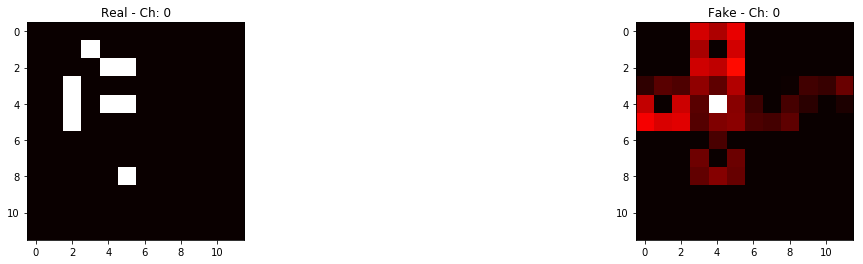

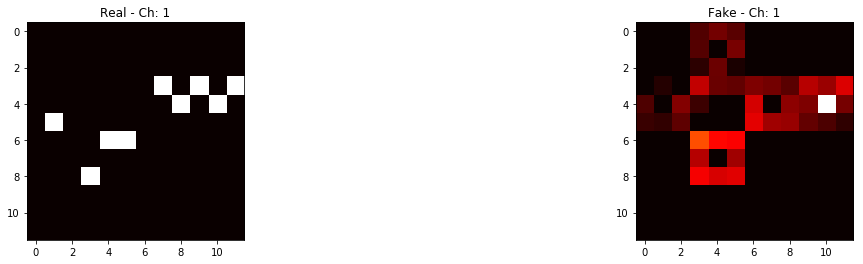

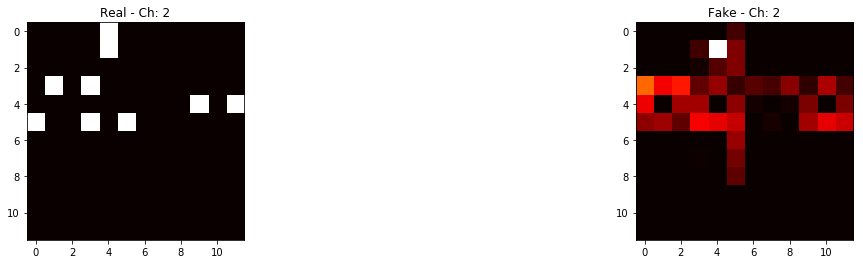

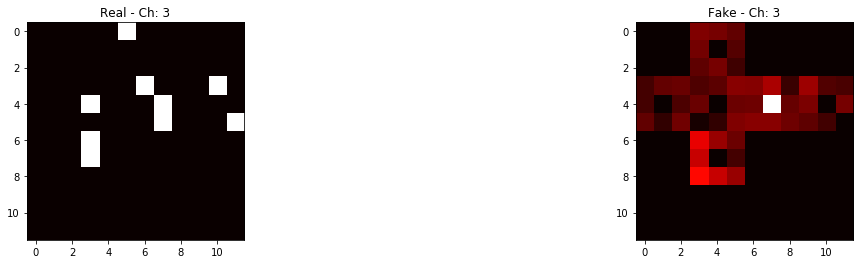

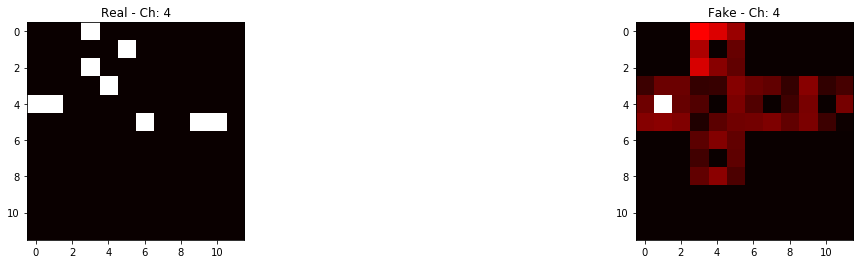

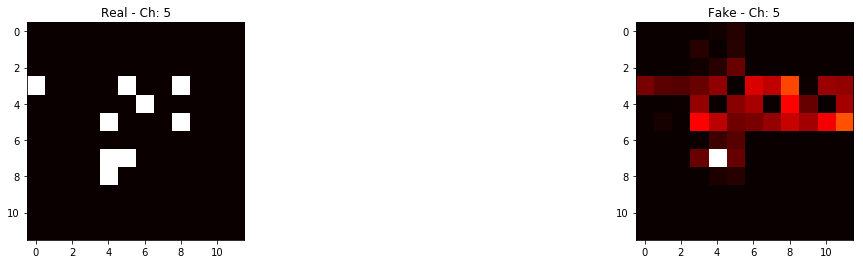

------------------------------------------------------------------------------------------------------------------------------------


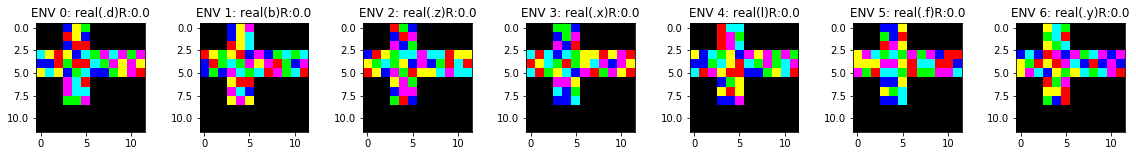

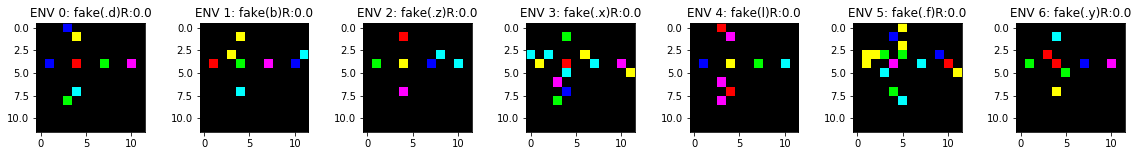

[[0 0 0 4 2 3 0 0 0 0 0 0]
 [0 0 0 0 2 4 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [5 2 0 2 4 5 3 1 5 1 3 1]
 [4 4 0 3 0 0 5 3 1 2 1 2]
 [2 5 2 4 3 5 4 4 3 2 1 0]
 [0 0 0 1 5 0 0 0 0 0 0 0]
 [0 0 0 1 5 5 0 0 0 0 0 0]
 [0 0 0 3 3 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 4 2 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [5 2 2 5 5 3 5 3 1 2 2 2]
 [2 4 2 5 0 3 5 3 5 4 1 1]
 [2 2 2 5 0 0 5 5 5 4 2 2]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 3 5 1 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


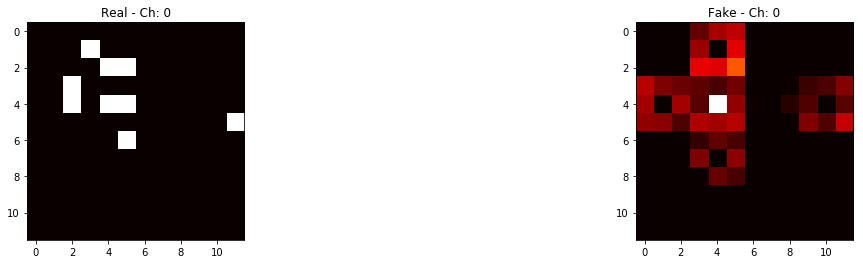

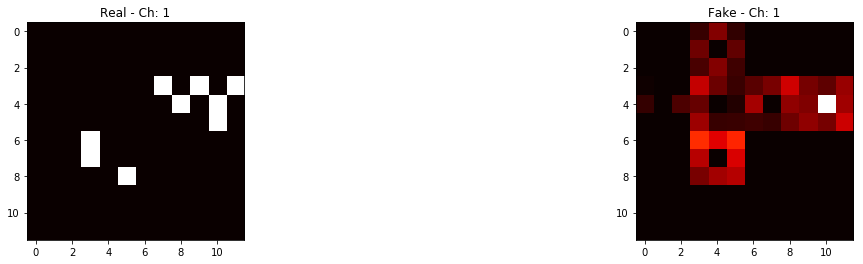

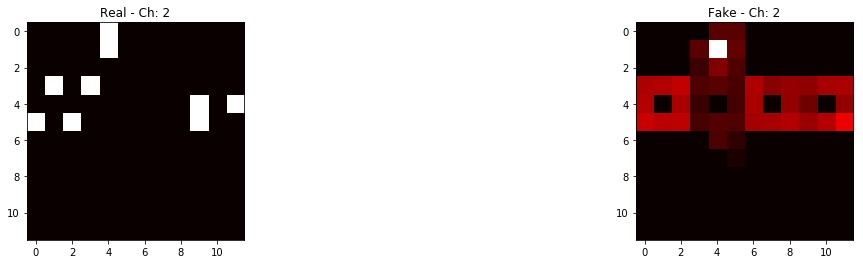

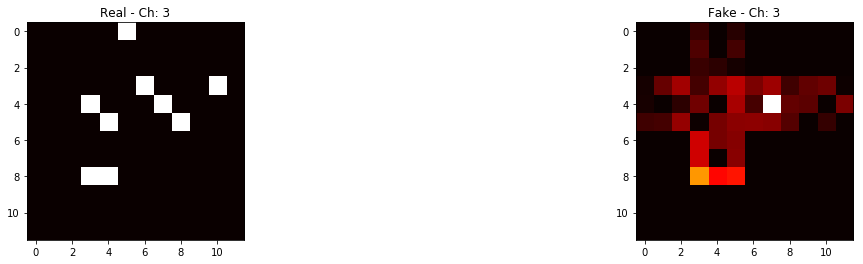

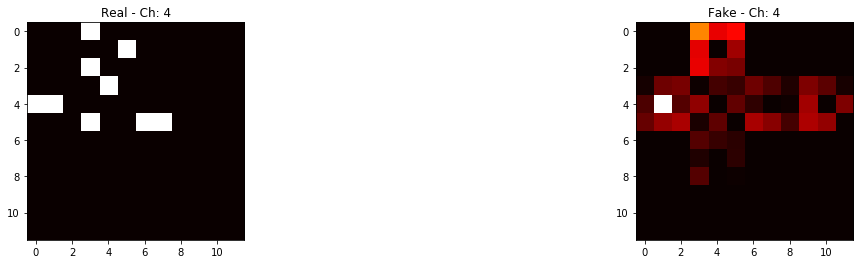

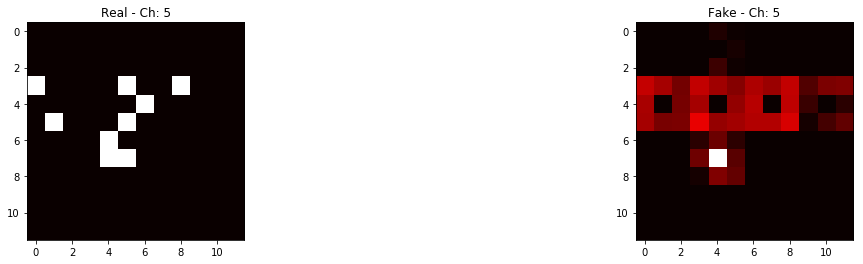

------------------------------------------------------------------------------------------------------------------------------------


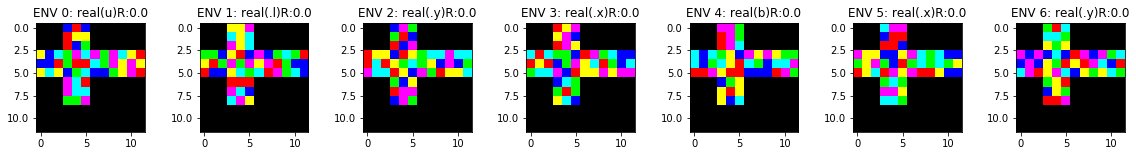

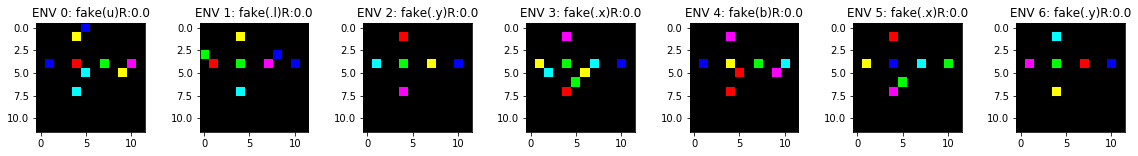

[[0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 0 2 2 0 0 0 0 0 0]
 [0 0 0 0 4 3 0 0 0 0 0 0]
 [2 4 5 3 1 5 1 3 1 5 2 0]
 [4 4 0 3 0 0 5 3 1 2 1 2]
 [2 5 2 4 3 5 4 4 3 2 1 0]
 [0 0 0 1 5 0 0 0 0 0 0 0]
 [0 0 0 1 5 5 0 0 0 0 0 0]
 [0 0 0 3 3 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 2 5 5 5 5 3 1 2 2 2]
 [2 4 2 1 0 5 5 3 5 2 1 0]
 [2 4 2 5 5 5 5 3 5 2 2 2]
 [0 0 0 1 1 3 0 0 0 0 0 0]
 [0 0 0 1 5 1 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


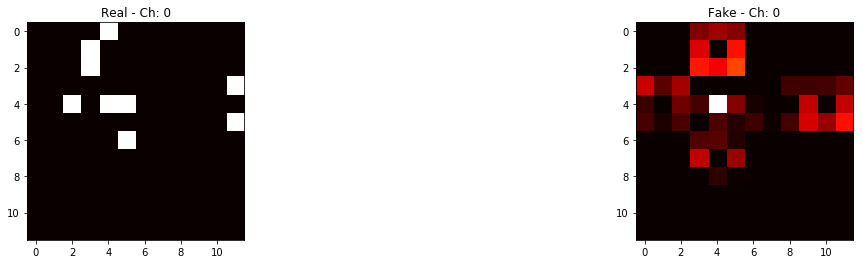

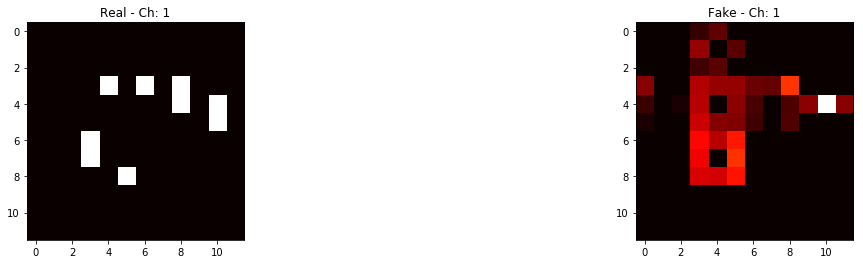

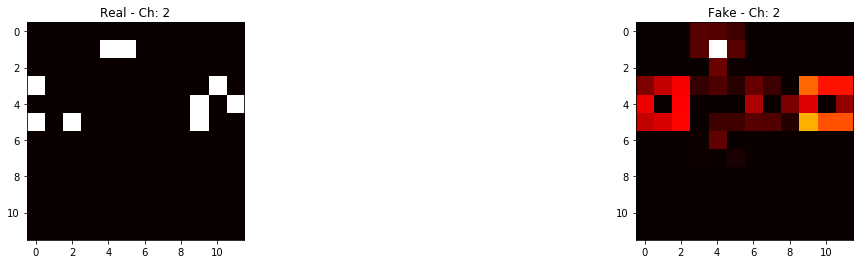

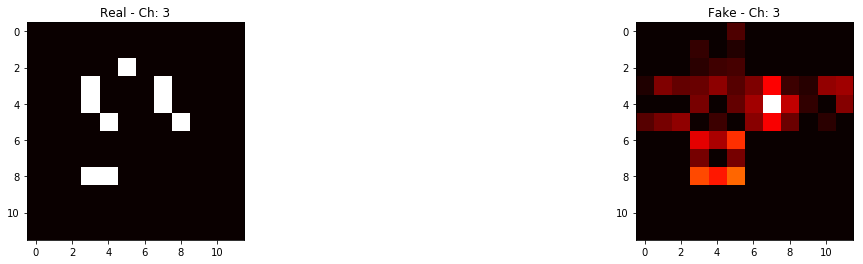

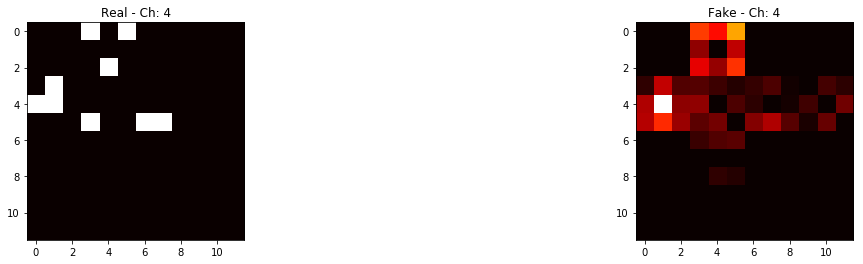

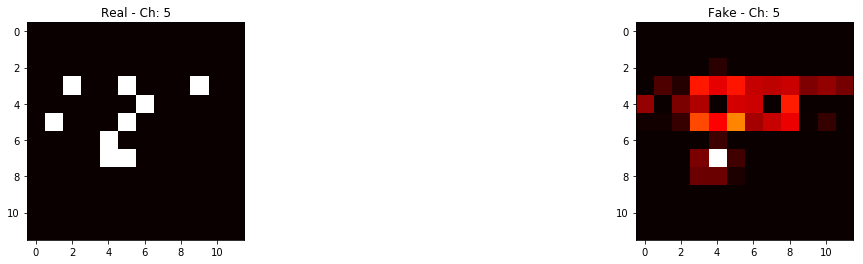

------------------------------------------------------------------------------------------------------------------------------------


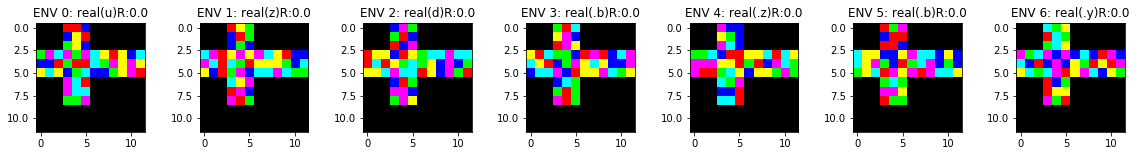

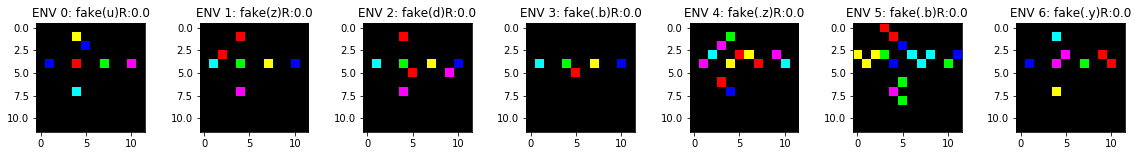

[[0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 4 2 0 0 0 0 0 0 0]
 [0 0 0 3 2 4 0 0 0 0 0 0]
 [3 1 5 1 3 1 5 2 0 2 4 5]
 [4 4 0 3 0 0 5 3 1 2 1 2]
 [2 5 2 4 3 5 4 4 3 2 1 0]
 [0 0 0 1 5 0 0 0 0 0 0 0]
 [0 0 0 1 5 5 0 0 0 0 0 0]
 [0 0 0 3 3 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 0 4 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 4 0 4 0 0 0 0 0 0]
 [2 2 2 1 3 1 5 5 5 2 4 0]
 [2 4 2 3 0 3 5 3 5 4 1 4]
 [3 2 2 5 5 5 5 4 4 2 2 0]
 [0 0 0 3 1 3 0 0 0 0 0 0]
 [0 0 0 1 5 1 0 0 0 0 0 0]
 [0 0 0 3 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


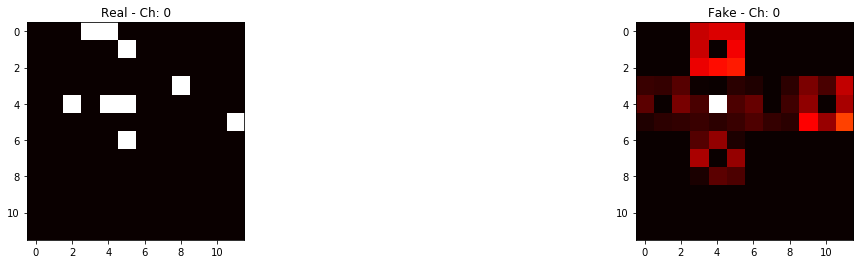

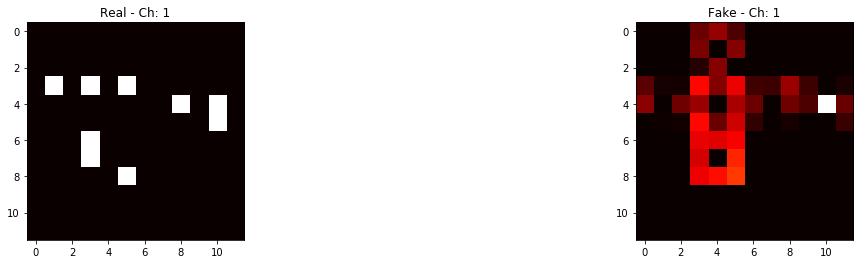

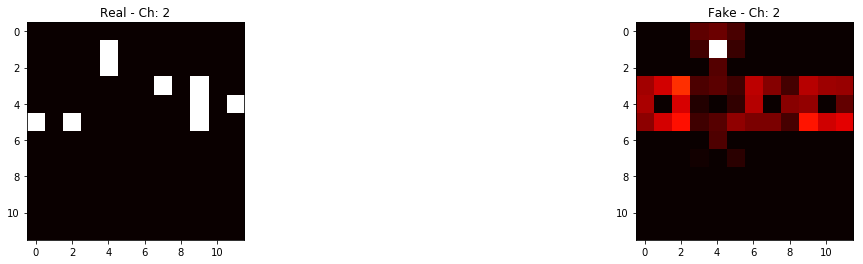

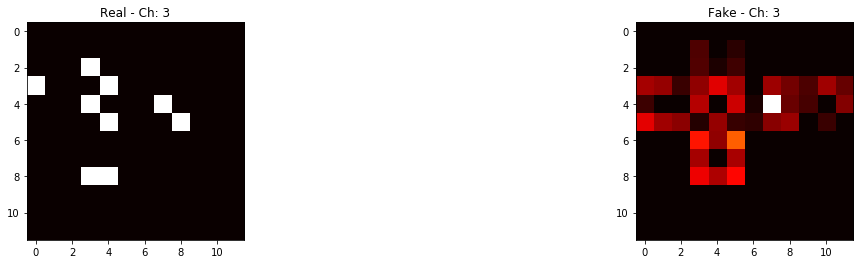

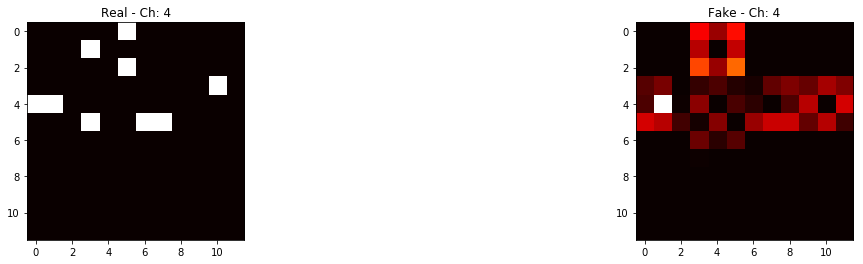

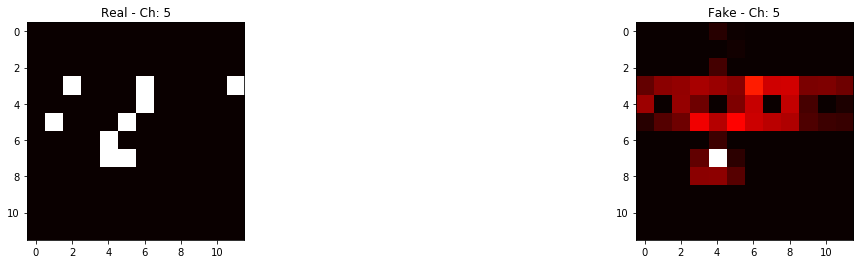

------------------------------------------------------------------------------------------------------------------------------------


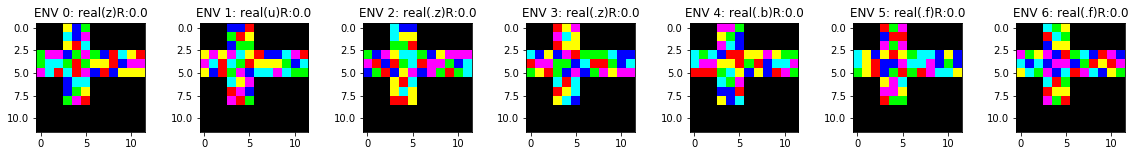

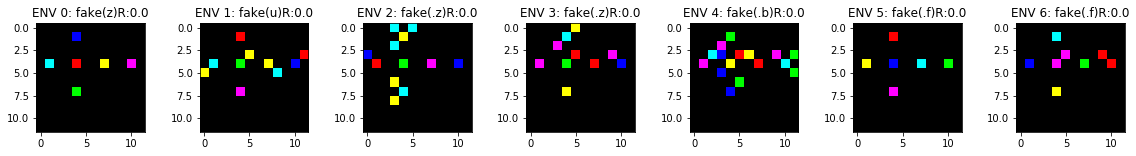

[[0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 5 4 1 0 0 0 0 0 0]
 [0 0 0 2 0 5 0 0 0 0 0 0]
 [3 1 1 4 3 1 3 4 0 5 2 0]
 [3 5 5 3 0 3 2 2 0 4 1 1]
 [1 5 0 5 0 1 4 0 4 2 2 2]
 [0 0 0 4 5 5 0 0 0 0 0 0]
 [0 0 0 4 3 2 0 0 0 0 0 0]
 [0 0 0 3 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 1 2 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 2 1 2 0 0 0 0 0 0]
 [3 3 3 5 5 5 0 0 4 2 2 0]
 [1 5 1 5 0 3 0 2 0 4 1 4]
 [1 1 1 5 5 5 0 0 0 2 2 2]
 [0 0 0 2 0 5 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 3 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


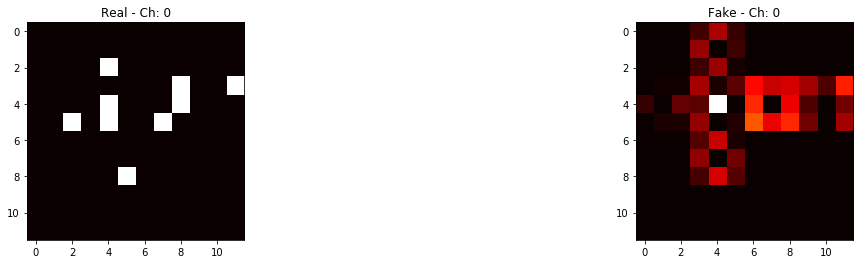

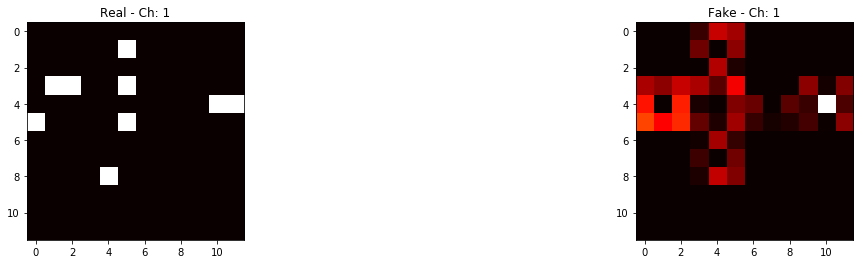

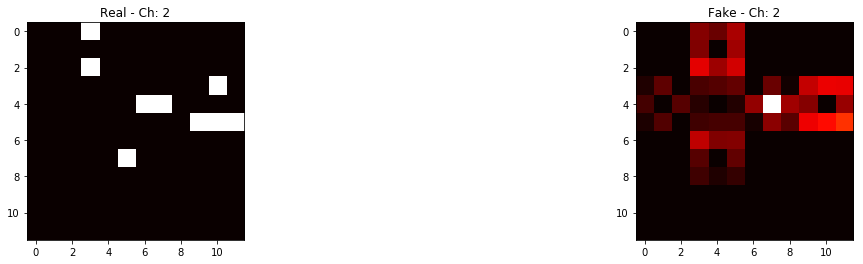

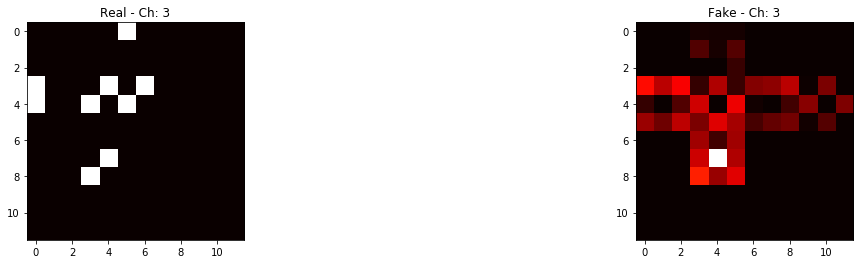

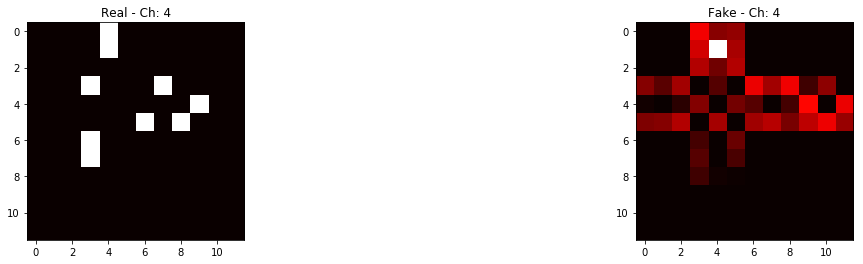

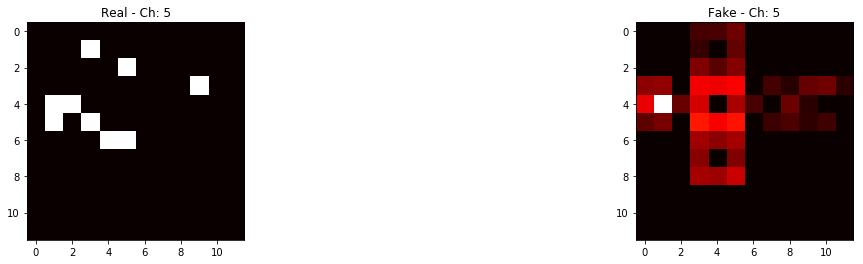

------------------------------------------------------------------------------------------------------------------------------------


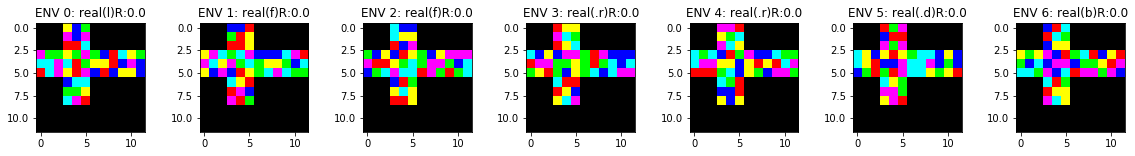

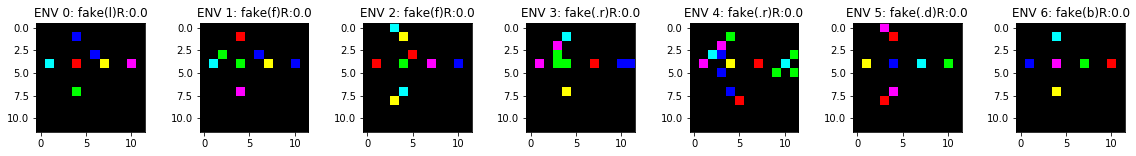

[[0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0]
 [1 3 3 2 3 1 3 4 0 5 2 3]
 [5 5 1 5 0 3 2 2 0 4 1 4]
 [0 5 1 2 0 1 4 0 4 2 2 4]
 [0 0 0 4 5 5 0 0 0 0 0 0]
 [0 0 0 3 3 2 0 0 0 0 0 0]
 [0 0 0 5 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0]
 [1 3 3 5 5 1 4 0 0 5 2 2]
 [1 5 1 3 0 3 0 2 0 4 1 4]
 [1 1 3 5 3 5 0 0 0 2 2 4]
 [0 0 0 2 1 2 0 0 0 0 0 0]
 [0 0 0 0 3 3 0 0 0 0 0 0]
 [0 0 0 1 1 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


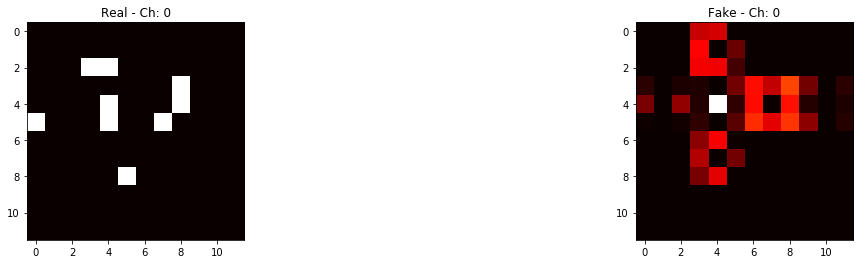

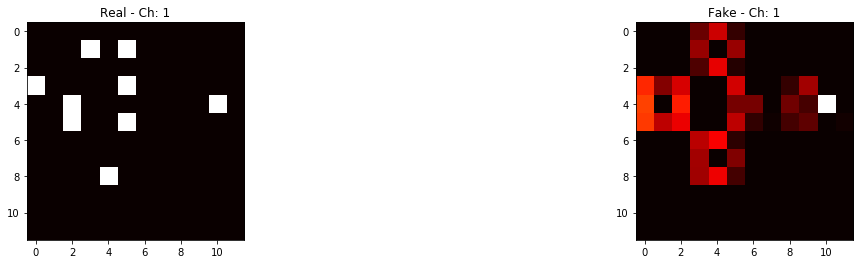

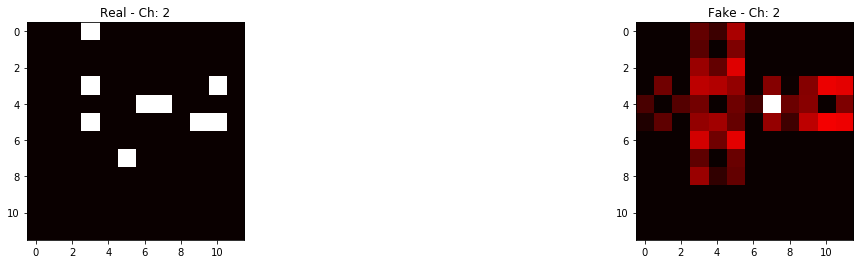

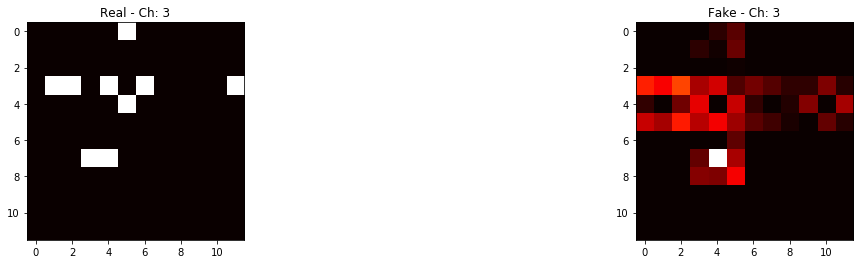

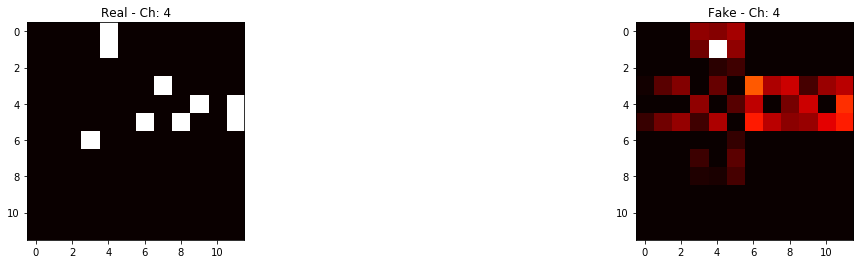

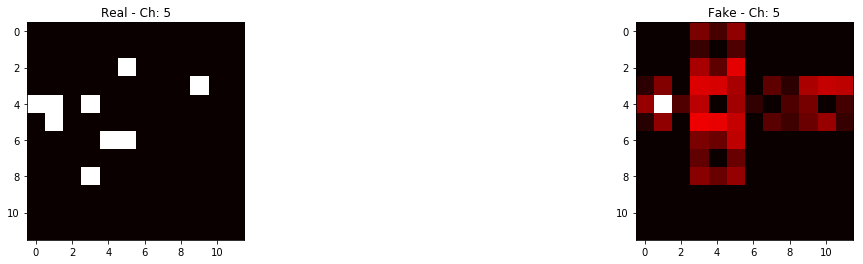

------------------------------------------------------------------------------------------------------------------------------------


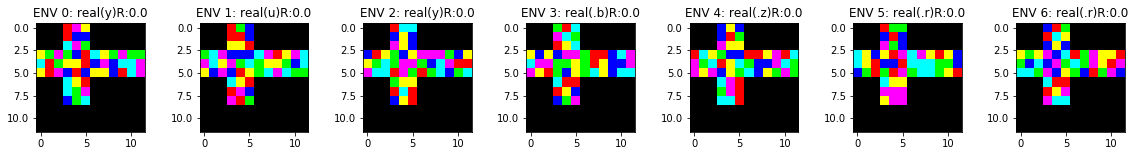

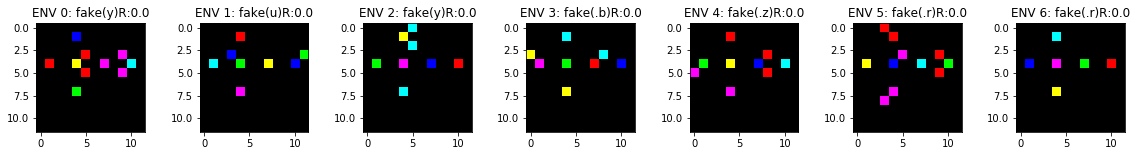

[[0 0 0 0 1 2 0 0 0 0 0 0]
 [0 0 0 0 4 4 0 0 0 0 0 0]
 [0 0 0 5 1 3 0 0 0 0 0 0]
 [2 3 1 3 4 0 5 2 3 1 3 3]
 [5 0 3 2 2 0 4 1 4 5 5 1]
 [2 0 1 4 0 4 2 2 4 0 5 1]
 [0 0 0 5 2 0 0 0 0 0 0 0]
 [0 0 0 5 3 1 0 0 0 0 0 0]
 [0 0 0 4 3 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 0 4 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 2 1 3 0 0 0 0 0 0]
 [5 5 1 4 2 0 0 4 4 1 5 3]
 [3 0 3 0 2 0 4 1 4 1 5 1]
 [2 2 3 0 0 0 5 2 4 1 3 1]
 [0 0 0 5 1 3 0 0 0 0 0 0]
 [0 0 0 0 3 1 0 0 0 0 0 0]
 [0 0 0 5 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


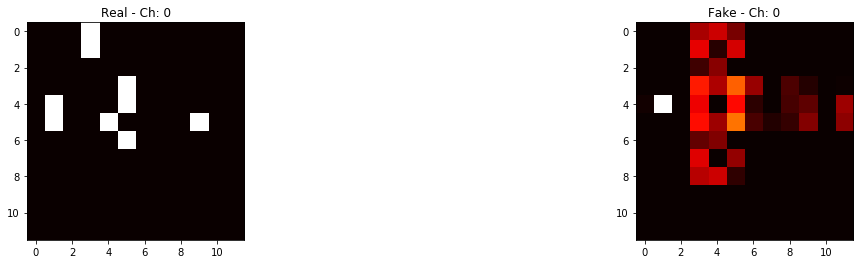

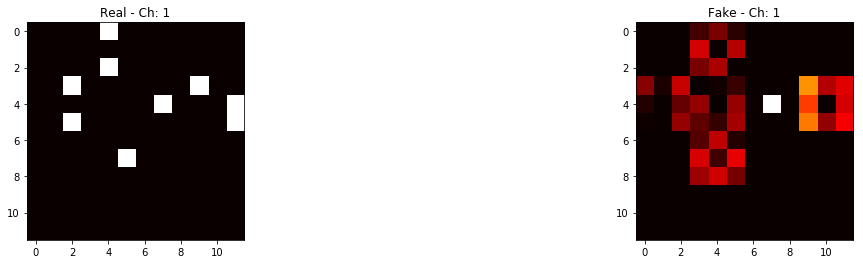

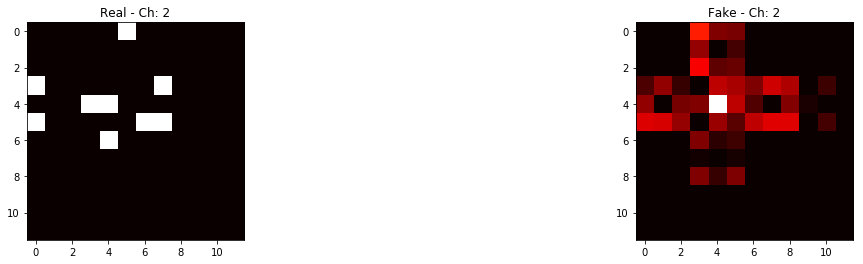

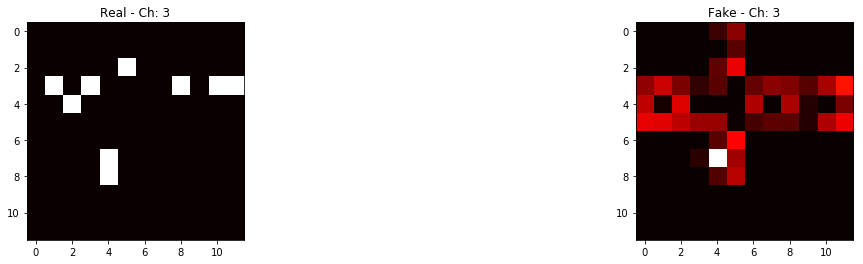

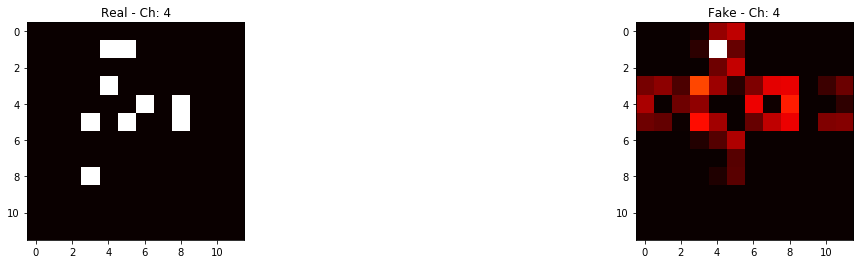

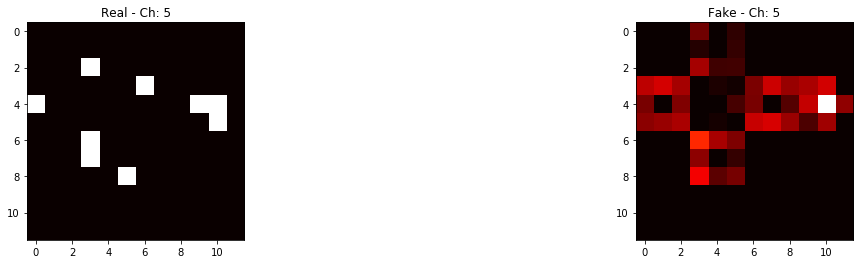

------------------------------------------------------------------------------------------------------------------------------------


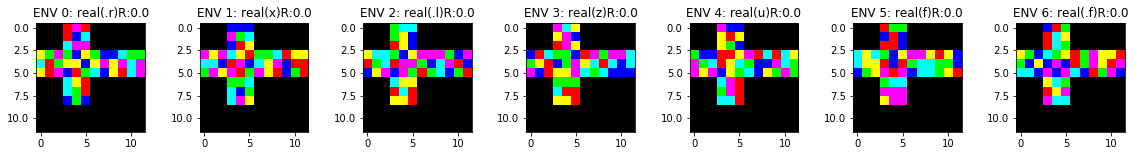

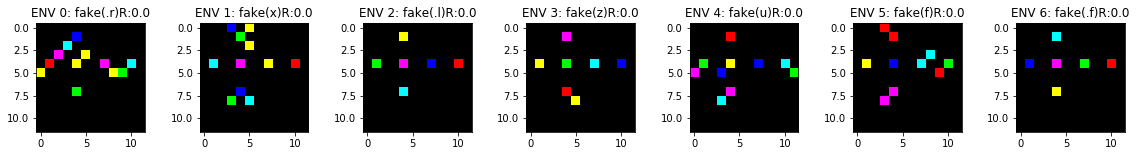

[[0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 4 5 0 0 0 0 0 0]
 [0 0 0 5 1 1 0 0 0 0 0 0]
 [2 3 1 3 4 2 3 4 4 5 3 3]
 [5 0 3 2 2 4 2 1 2 1 5 1]
 [2 0 1 4 0 3 5 4 2 0 5 1]
 [0 0 0 5 2 0 0 0 0 0 0 0]
 [0 0 0 5 3 0 0 0 0 0 0 0]
 [0 0 0 4 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 5 4 1 0 0 0 0 0 0]
 [0 0 0 5 5 1 0 0 0 0 0 0]
 [2 3 1 4 4 2 0 4 4 5 5 4]
 [2 0 3 0 2 2 4 1 4 5 5 1]
 [2 3 3 0 4 4 5 4 2 3 3 1]
 [0 0 0 2 2 0 0 0 0 0 0 0]
 [0 0 0 2 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


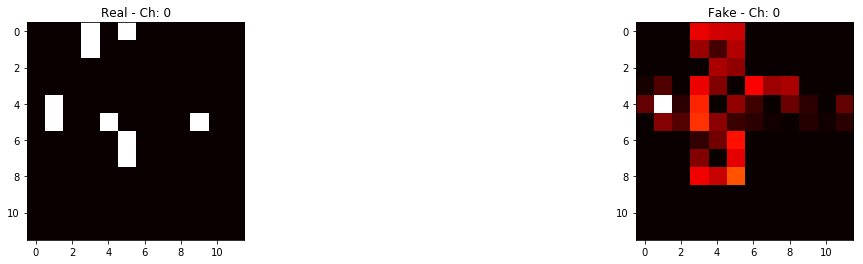

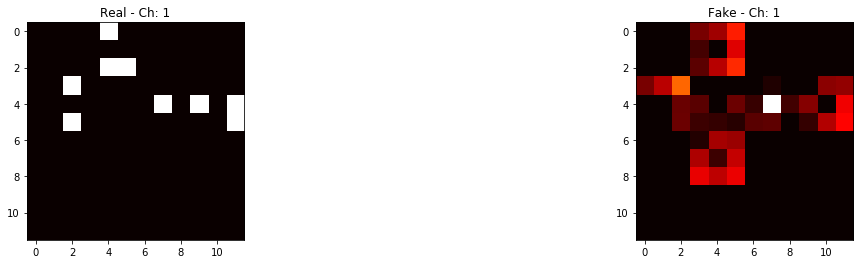

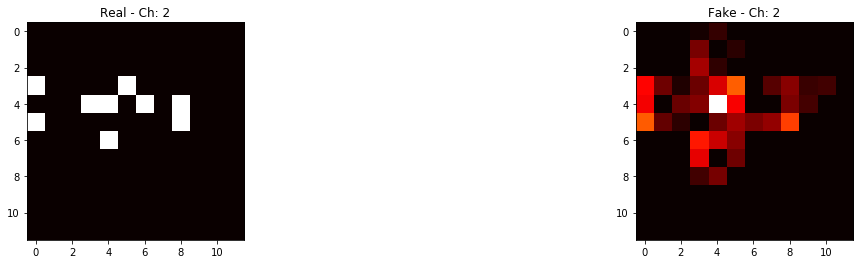

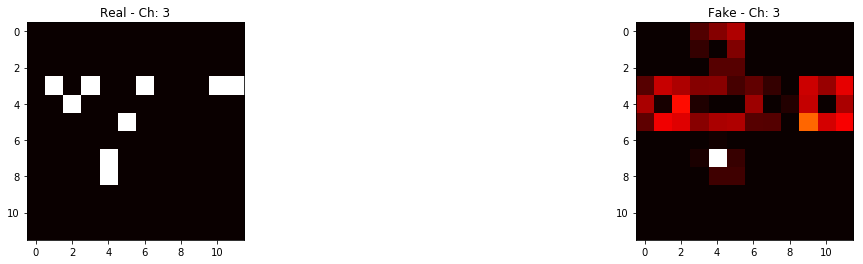

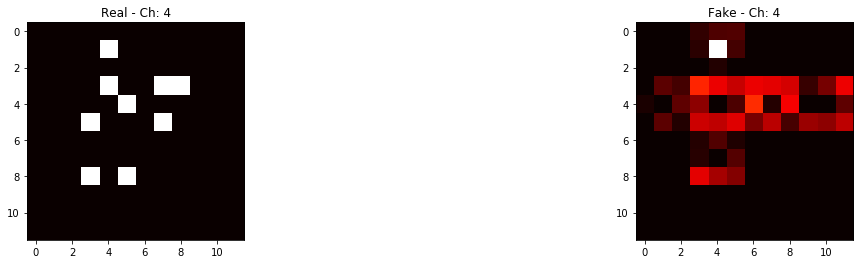

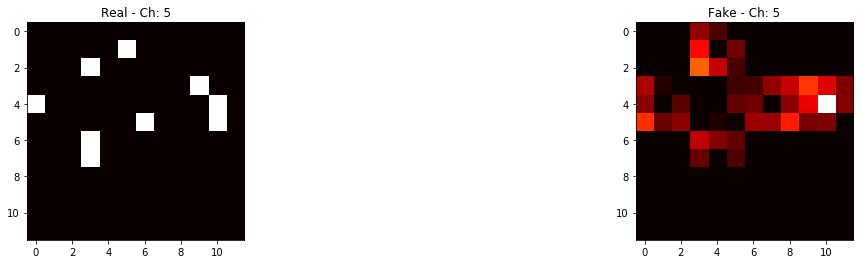

------------------------------------------------------------------------------------------------------------------------------------


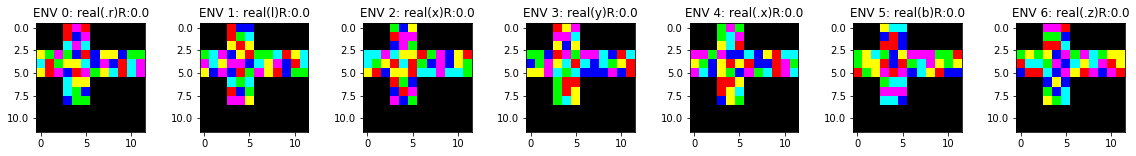

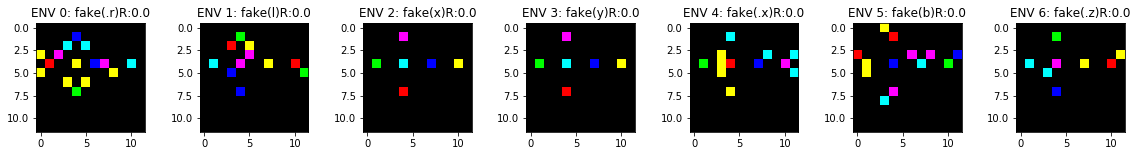

[[0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0 0 0]
 [0 0 0 5 1 5 0 0 0 0 0 0]
 [2 3 1 3 4 0 4 2 2 4 3 3]
 [5 0 3 2 2 5 4 1 4 0 5 1]
 [2 0 1 4 0 1 3 2 5 0 5 1]
 [0 0 0 5 2 2 0 0 0 0 0 0]
 [0 0 0 5 3 4 0 0 0 0 0 0]
 [0 0 0 4 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 1 3 0 0 0 0 0 0]
 [0 0 0 5 4 3 0 0 0 0 0 0]
 [0 0 0 5 5 5 0 0 0 0 0 0]
 [2 2 1 4 2 3 4 5 5 1 5 4]
 [2 0 3 0 2 0 4 1 5 1 5 3]
 [2 3 3 0 2 0 4 4 2 0 5 3]
 [0 0 0 2 1 2 0 0 0 0 0 0]
 [0 0 0 2 3 2 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


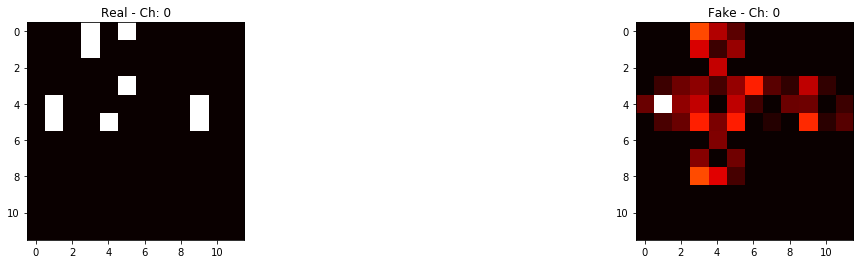

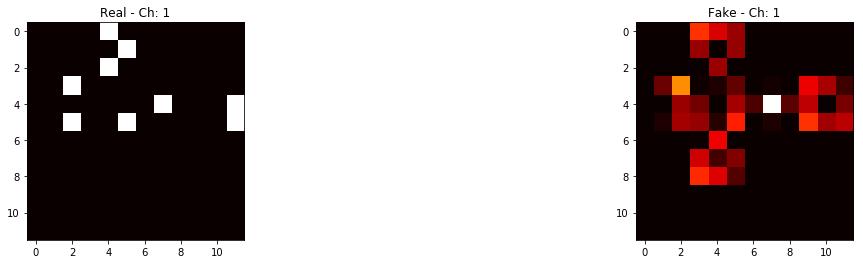

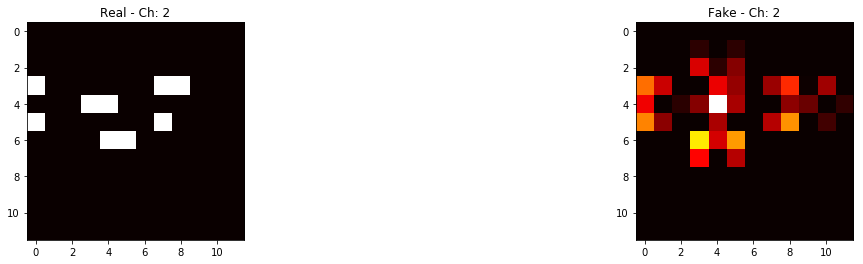

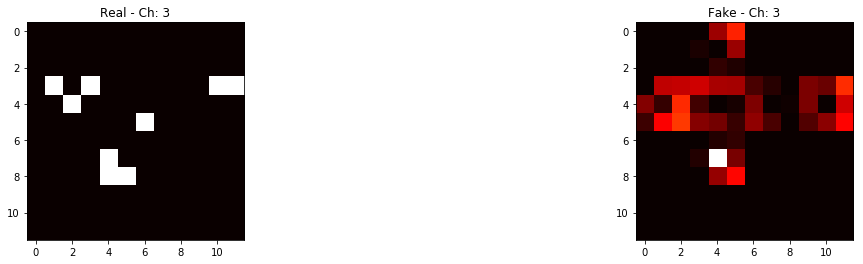

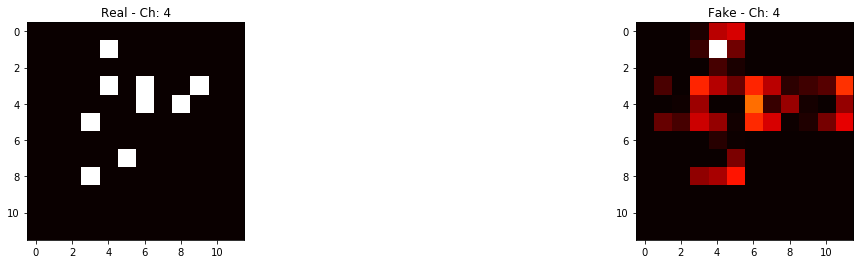

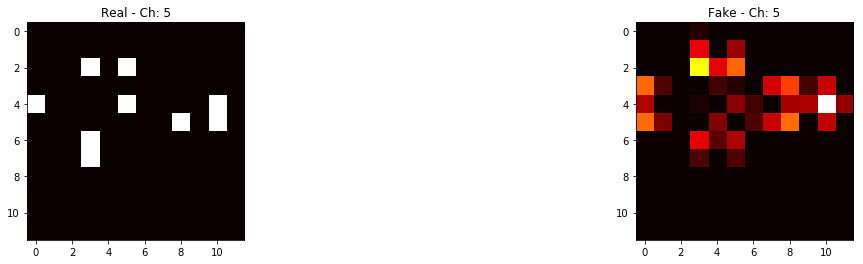

------------------------------------------------------------------------------------------------------------------------------------


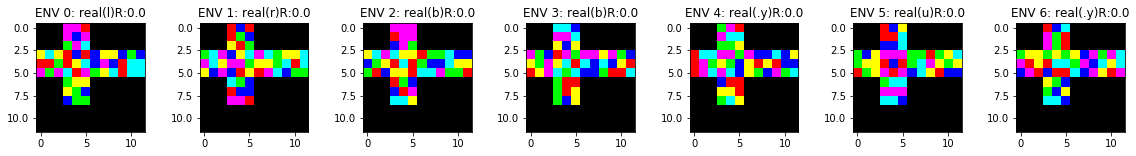

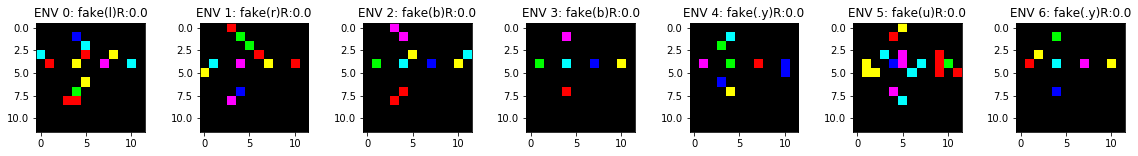

[[0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 3 1 5 0 0 0 0 0 0]
 [2 5 2 0 4 0 4 2 2 4 3 4]
 [0 0 3 0 2 5 4 1 4 0 5 5]
 [1 3 1 5 0 1 3 2 5 0 5 5]
 [0 0 0 3 2 2 0 0 0 0 0 0]
 [0 0 0 2 3 4 0 0 0 0 0 0]
 [0 0 0 4 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 1 3 0 0 0 0 0 0]
 [0 0 0 1 4 3 0 0 0 0 0 0]
 [0 0 0 4 1 5 0 0 0 0 0 0]
 [5 5 3 0 2 0 4 2 2 1 2 1]
 [3 0 3 2 2 5 4 1 4 1 5 2]
 [5 3 1 5 5 0 0 4 2 1 5 2]
 [0 0 0 3 0 2 0 0 0 0 0 0]
 [0 0 0 0 3 2 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


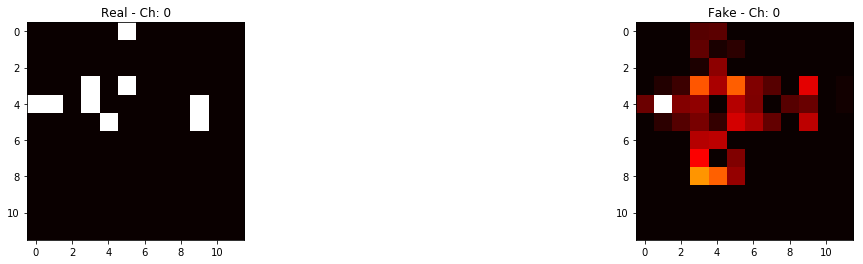

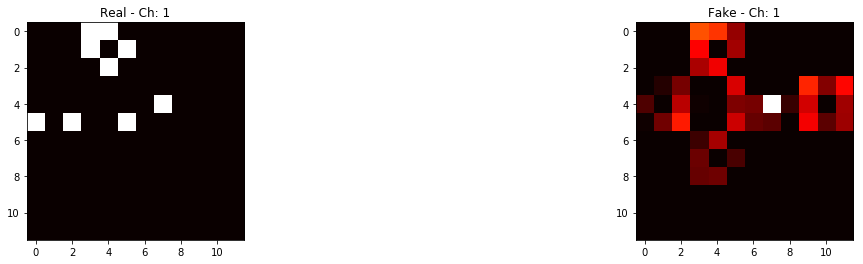

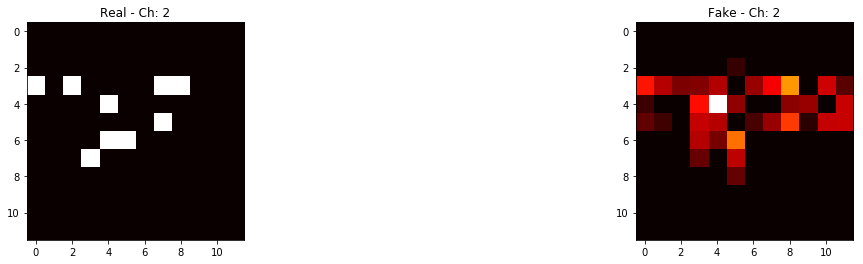

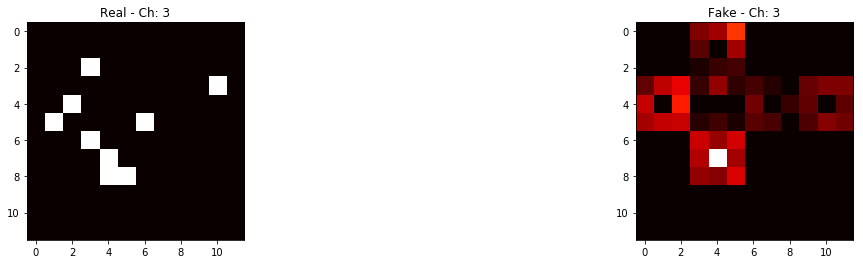

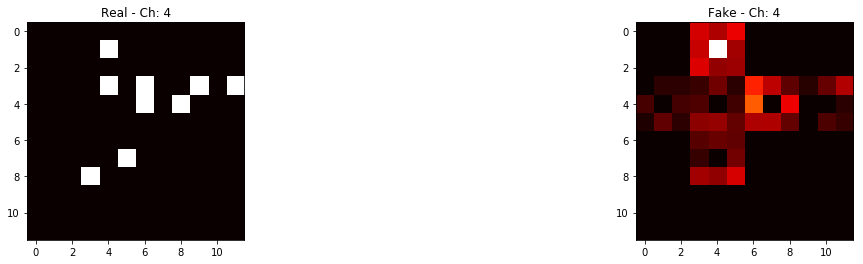

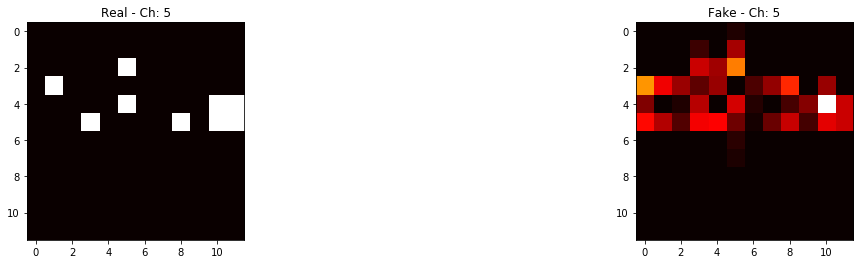

------------------------------------------------------------------------------------------------------------------------------------


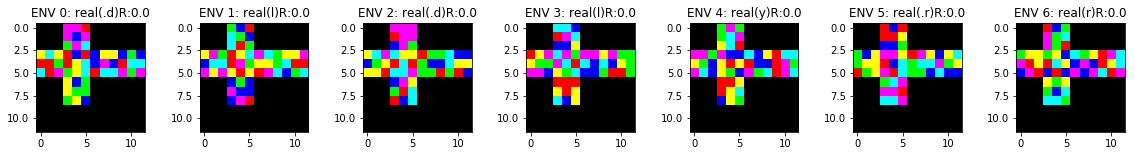

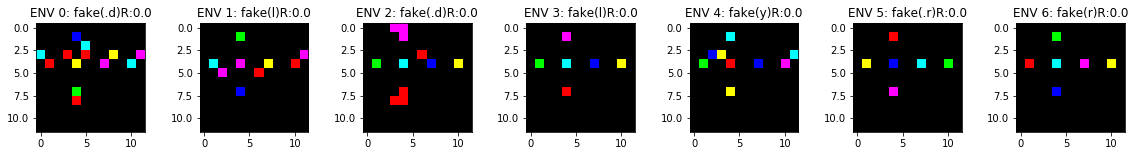

[[0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 3 1 5 0 0 0 0 0 0]
 [2 5 2 0 4 0 4 2 2 4 3 4]
 [0 0 3 0 2 5 4 1 4 0 5 5]
 [5 0 1 3 2 5 0 5 5 1 3 1]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 2 3 3 0 0 0 0 0 0]
 [0 0 0 3 2 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 1 3 0 0 0 0 0 0]
 [0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 5 1 5 0 0 0 0 0 0]
 [5 5 3 0 3 0 4 2 2 1 2 1]
 [3 0 3 2 2 2 4 1 4 5 5 5]
 [5 5 1 4 5 0 1 5 2 1 5 1]
 [0 0 0 2 0 2 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


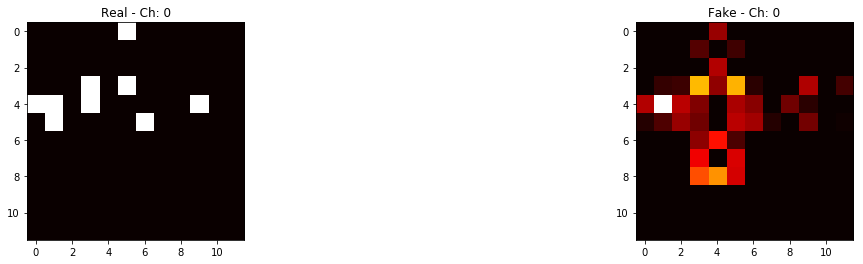

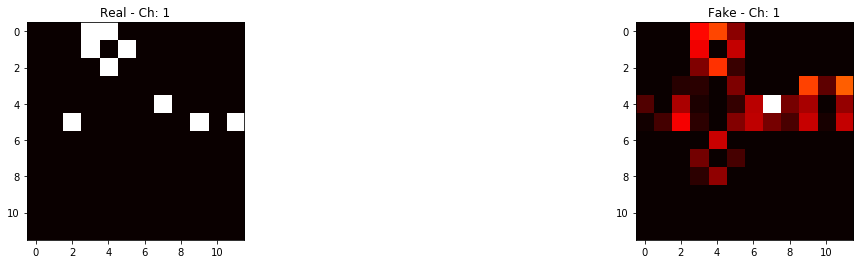

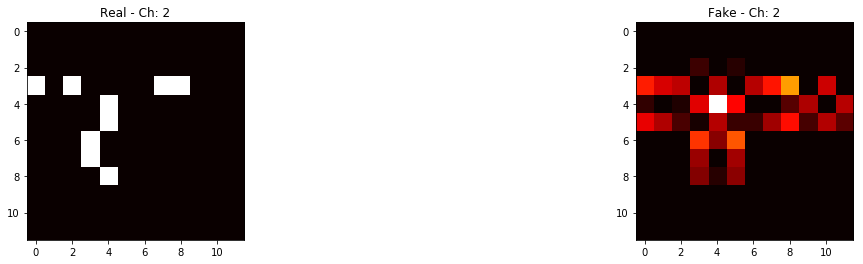

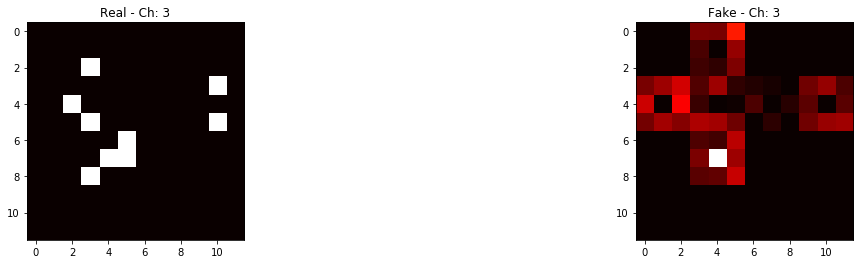

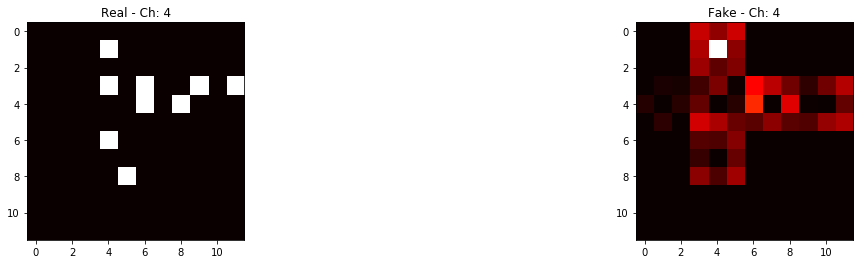

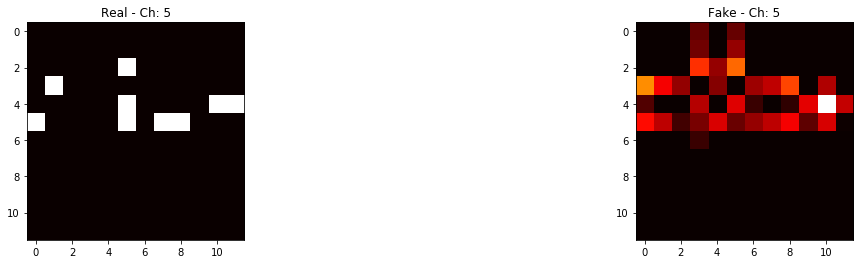

------------------------------------------------------------------------------------------------------------------------------------


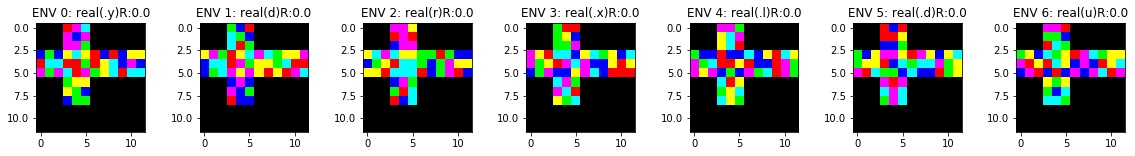

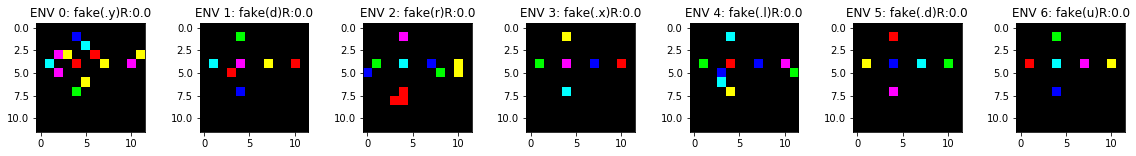

[[0 0 0 0 1 5 0 0 0 0 0 0]
 [0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 1 1 3 0 0 0 0 0 0]
 [4 3 4 2 5 2 0 4 0 4 2 2]
 [0 5 5 0 0 3 0 2 5 4 1 4]
 [1 3 1 5 0 1 3 2 5 0 5 5]
 [0 0 0 3 2 2 0 0 0 0 0 0]
 [0 0 0 2 3 4 0 0 0 0 0 0]
 [0 0 0 4 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 1 5 0 0 0 0 0 0]
 [0 0 0 1 4 5 0 0 0 0 0 0]
 [0 0 0 4 1 5 0 0 0 0 0 0]
 [3 3 1 2 3 2 0 0 0 2 2 2]
 [1 5 1 2 0 3 0 2 5 4 1 4]
 [1 4 1 5 3 1 0 4 5 0 2 4]
 [0 0 0 2 0 2 0 0 0 0 0 0]
 [0 0 0 0 3 2 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


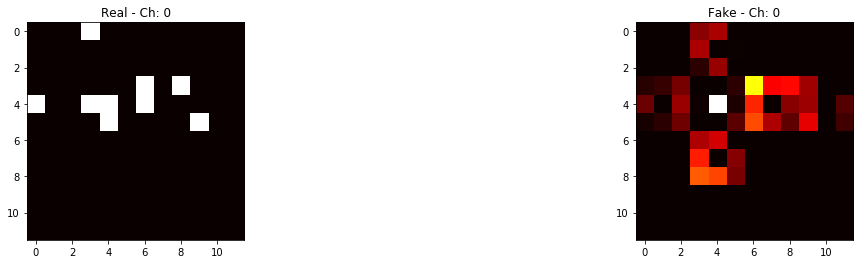

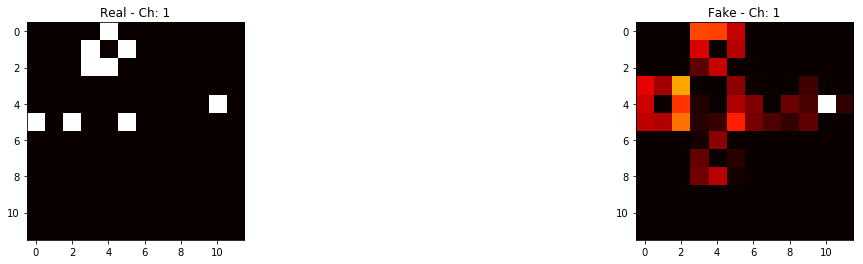

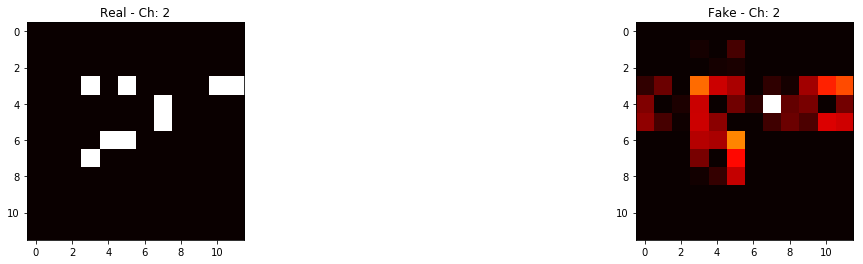

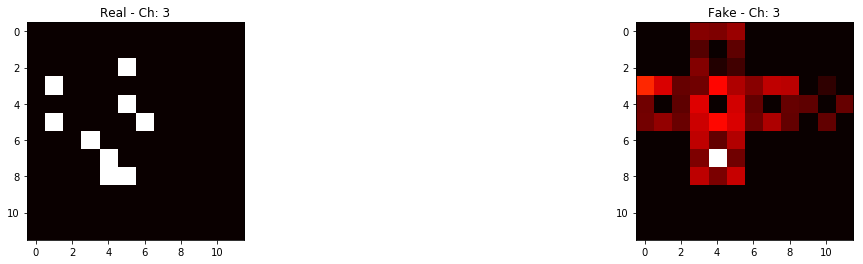

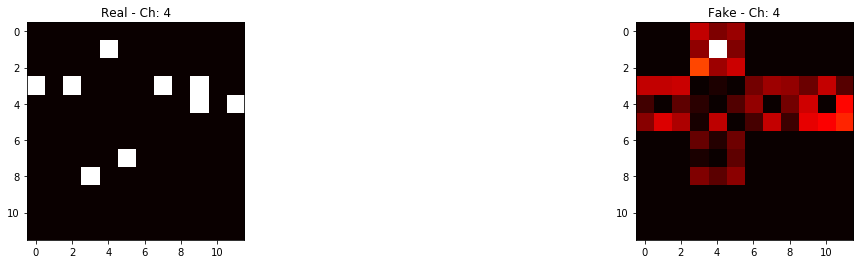

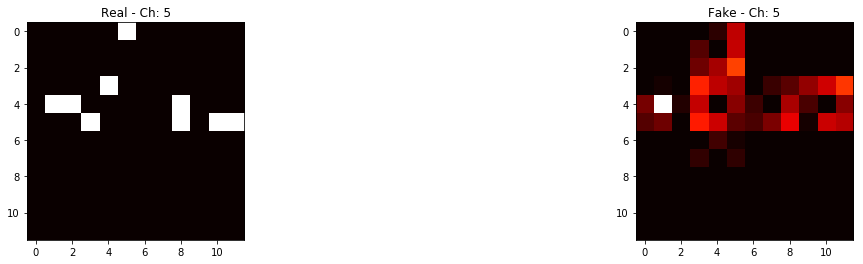

------------------------------------------------------------------------------------------------------------------------------------


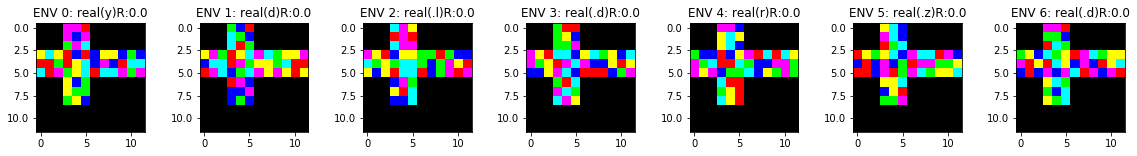

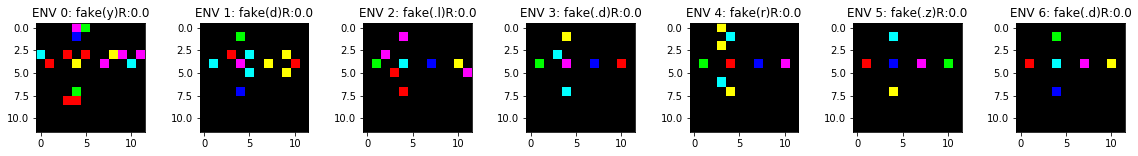

[[0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 3 1 5 0 0 0 0 0 0]
 [2 5 2 0 4 0 4 2 2 4 3 4]
 [0 0 3 0 2 5 4 1 4 0 5 5]
 [5 0 1 3 2 5 0 5 5 1 3 1]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 2 3 3 0 0 0 0 0 0]
 [0 0 0 3 2 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 1 3 0 0 0 0 0 0]
 [0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 5 1 5 0 0 0 0 0 0]
 [5 5 3 0 3 0 4 2 2 1 2 1]
 [3 0 3 0 2 0 4 1 4 1 5 1]
 [5 3 1 3 3 5 0 4 2 1 2 4]
 [0 0 0 2 0 3 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


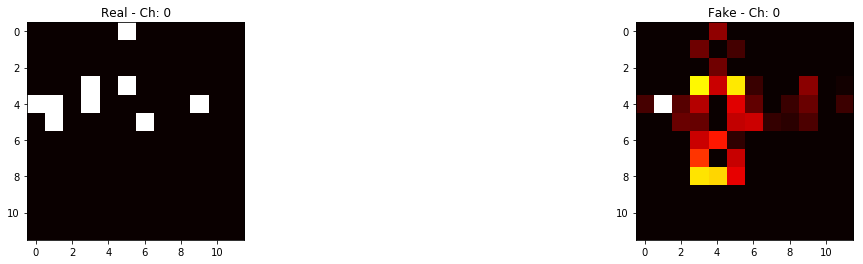

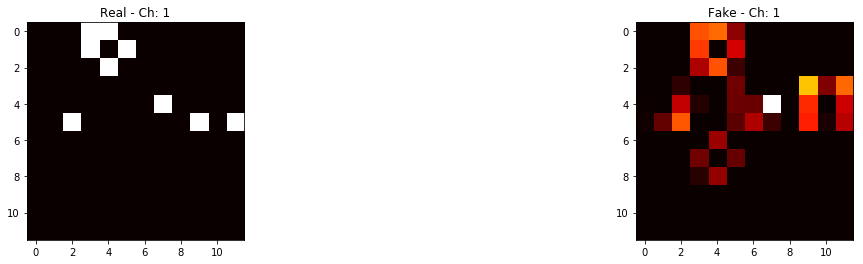

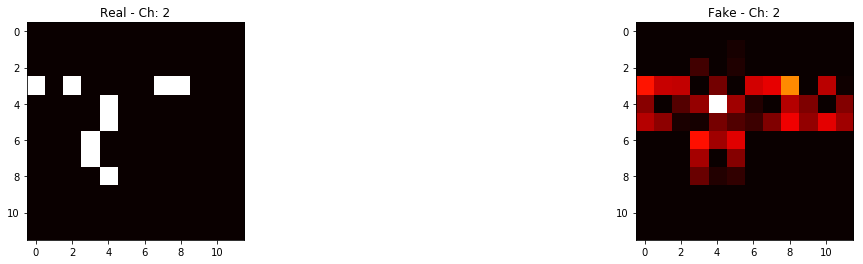

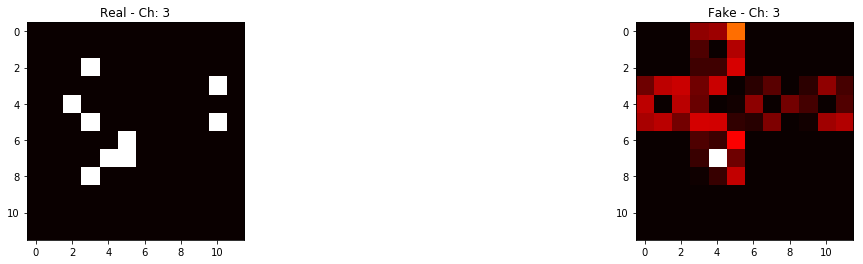

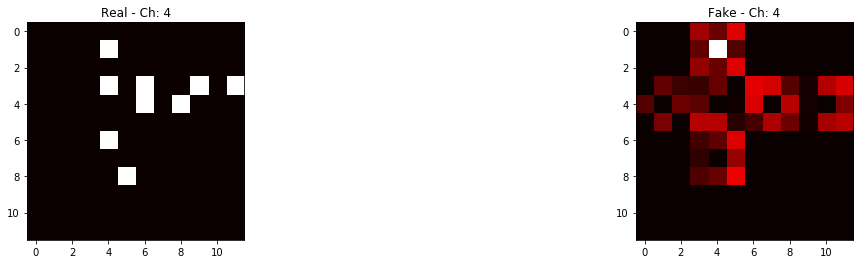

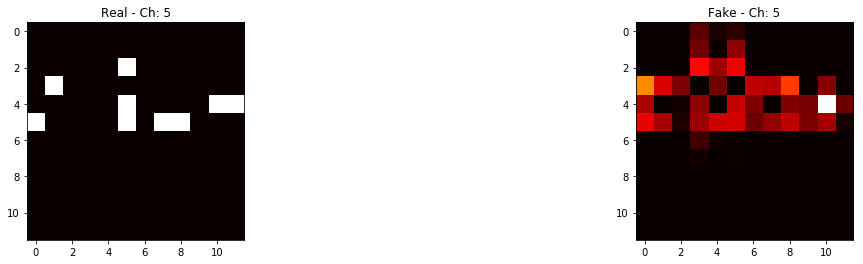

------------------------------------------------------------------------------------------------------------------------------------


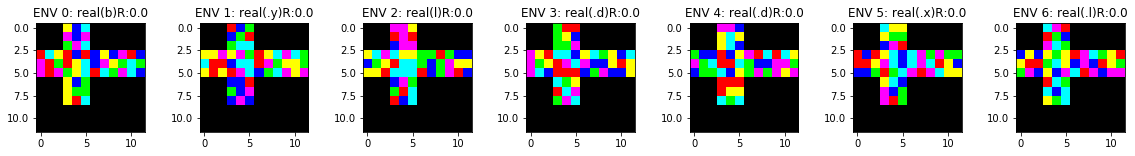

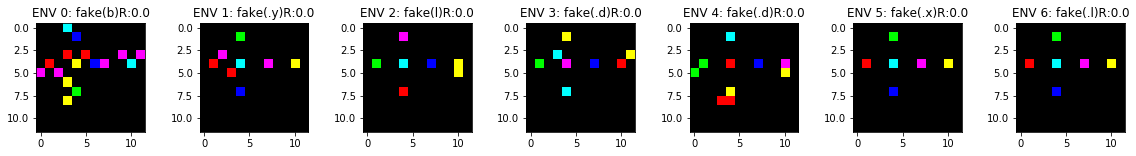

[[0 0 0 2 4 5 0 0 0 0 0 0]
 [0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 3 1 5 0 0 0 0 0 0]
 [0 5 2 0 4 0 4 2 4 1 0 4]
 [1 0 3 0 2 5 4 1 2 3 5 3]
 [1 0 1 3 2 5 0 5 3 1 5 4]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 2 3 3 0 0 0 0 0 0]
 [0 0 0 2 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 0 5 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 5 1 5 0 0 0 0 0 0]
 [3 5 3 0 2 0 4 2 4 1 5 1]
 [0 0 3 2 2 2 4 1 4 5 5 5]
 [1 1 1 4 2 0 0 0 0 5 5 3]
 [0 0 0 2 0 3 0 0 0 0 0 0]
 [0 0 0 2 3 3 0 0 0 0 0 0]
 [0 0 0 2 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


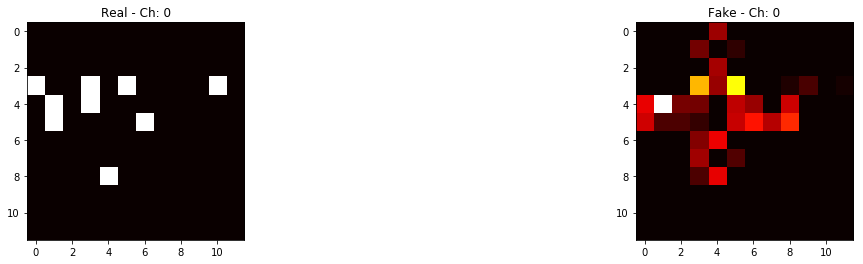

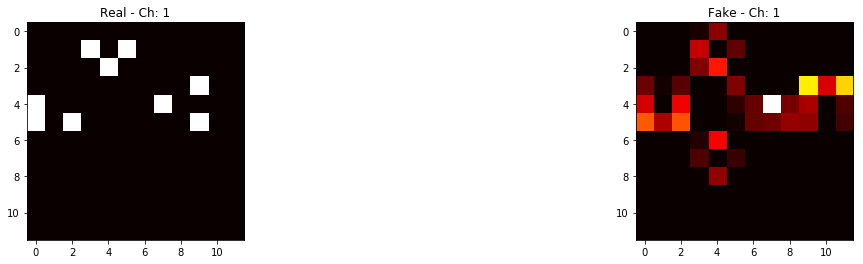

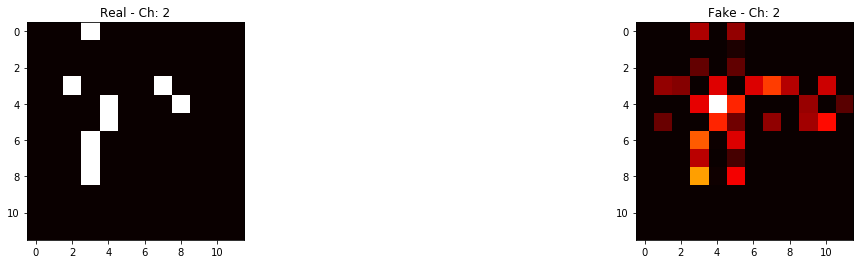

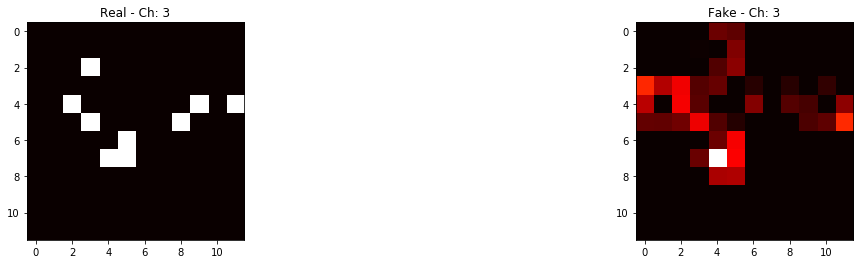

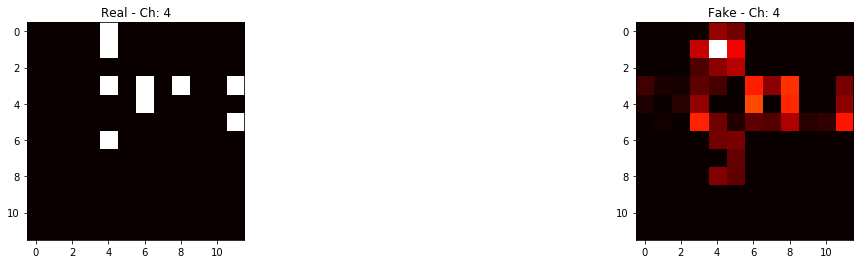

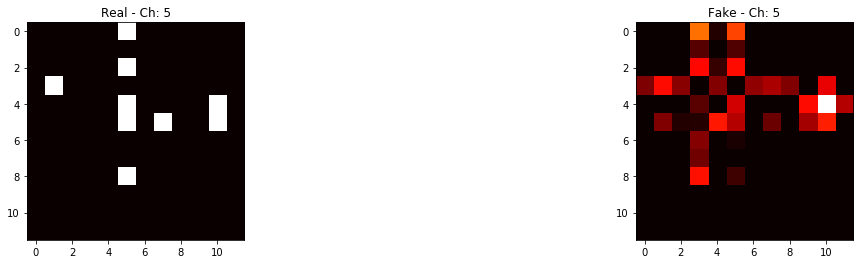

------------------------------------------------------------------------------------------------------------------------------------


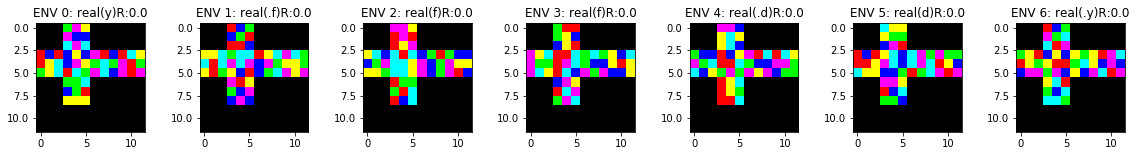

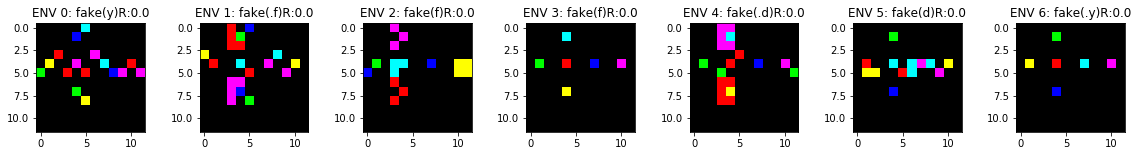

[[0 0 0 3 1 2 0 0 0 0 0 0]
 [0 0 0 1 4 4 0 0 0 0 0 0]
 [0 0 0 5 1 5 0 0 0 0 0 0]
 [0 4 0 4 2 4 1 0 4 0 5 2]
 [0 2 5 4 1 2 3 5 3 1 0 3]
 [3 2 5 0 5 3 1 5 4 1 0 1]
 [0 0 0 3 3 5 0 0 0 0 0 0]
 [0 0 0 4 3 0 0 0 0 0 0 0]
 [0 0 0 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 1 5 0 0 0 0 0 0]
 [0 0 0 1 4 5 0 0 0 0 0 0]
 [0 0 0 5 4 5 0 0 0 0 0 0]
 [0 0 0 5 2 4 1 1 1 3 2 2]
 [0 2 0 5 1 0 1 5 4 1 0 2]
 [3 2 2 0 0 0 5 5 4 1 1 1]
 [0 0 0 2 0 2 0 0 0 0 0 0]
 [0 0 0 0 3 2 0 0 0 0 0 0]
 [0 0 0 5 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


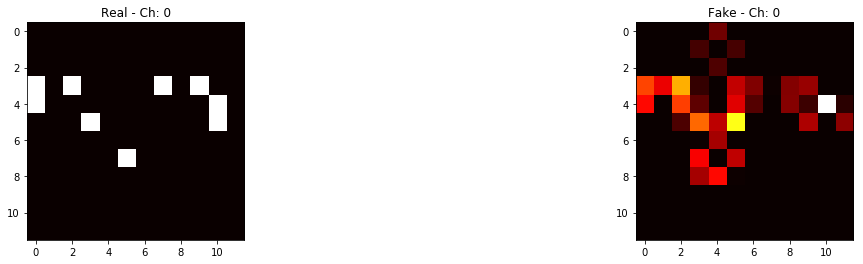

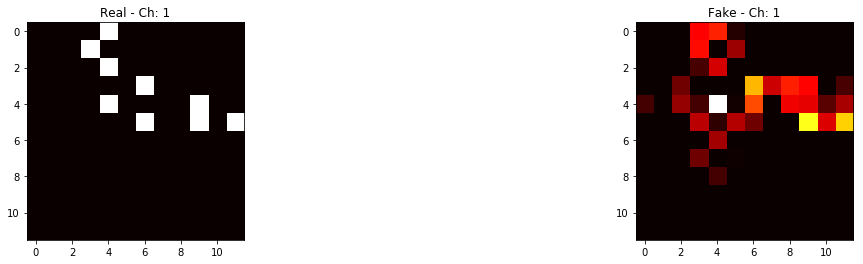

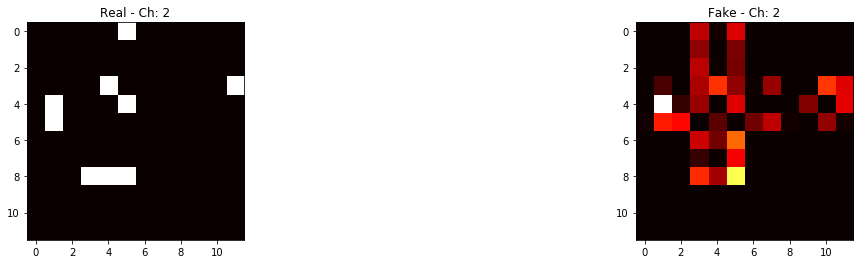

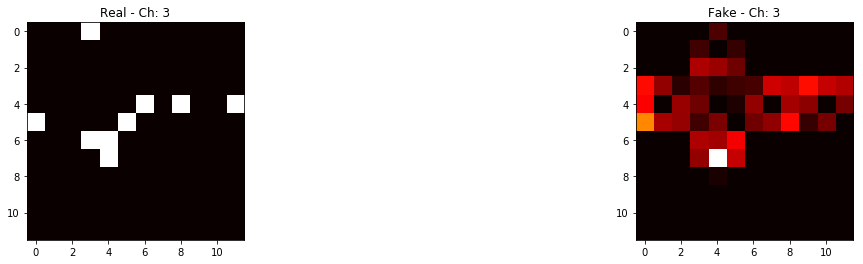

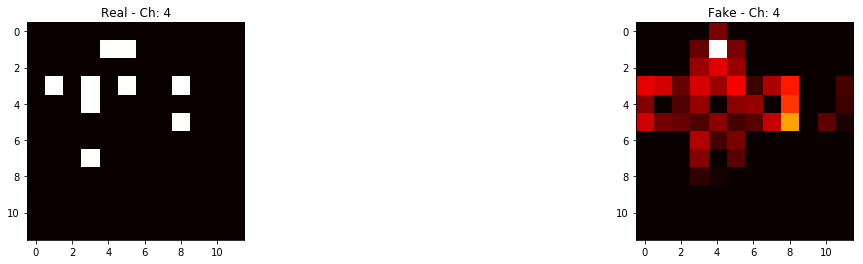

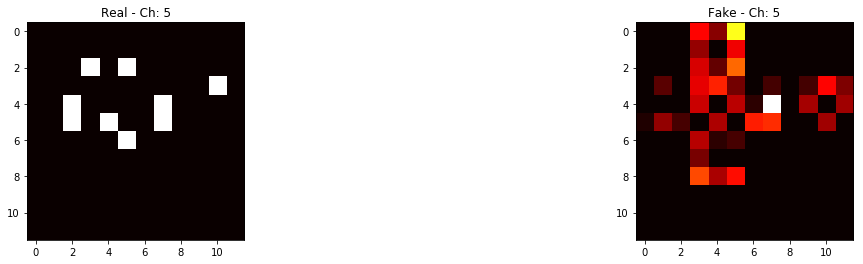

------------------------------------------------------------------------------------------------------------------------------------


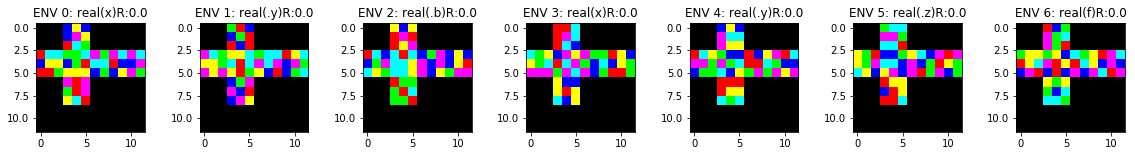

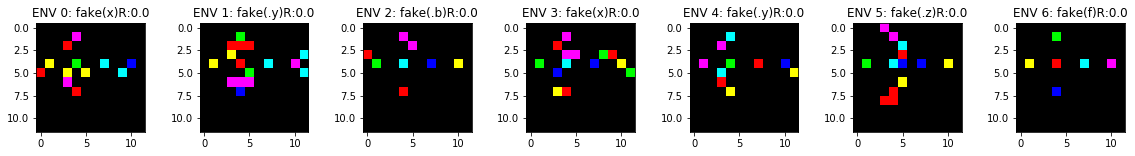

[[0 0 0 4 2 4 0 0 0 0 0 0]
 [0 0 0 4 1 2 0 0 0 0 0 0]
 [0 0 0 0 5 3 0 0 0 0 0 0]
 [0 5 5 3 3 5 1 3 1 5 1 5]
 [4 2 2 4 3 0 5 5 0 4 4 1]
 [0 0 3 2 2 2 4 3 4 2 1 3]
 [0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 1 0 0 0 0 0 0]
 [0 0 0 2 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 2 4 0 0 0 0 0 0]
 [0 0 0 0 1 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 4 3 2 5 3 1 5 3 3]
 [0 2 2 3 3 0 5 5 1 5 4 1]
 [0 0 3 2 2 2 4 1 1 5 5 5]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 3 0 0 0 0 0 0]
 [0 0 0 3 5 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


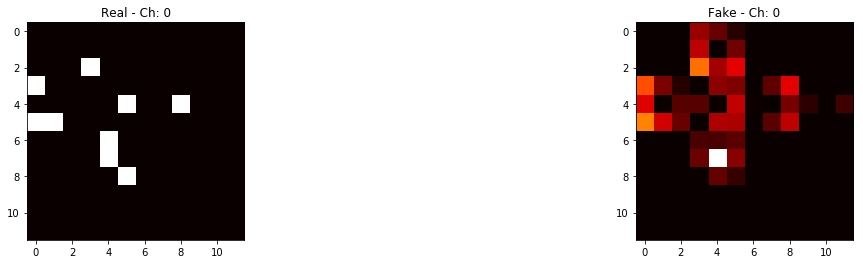

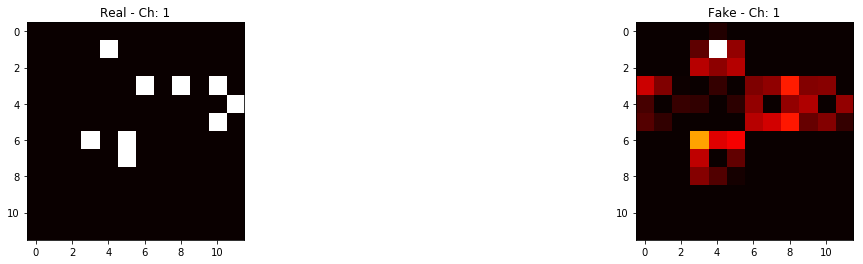

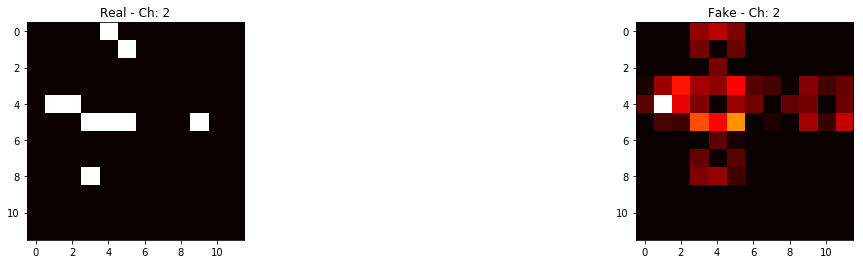

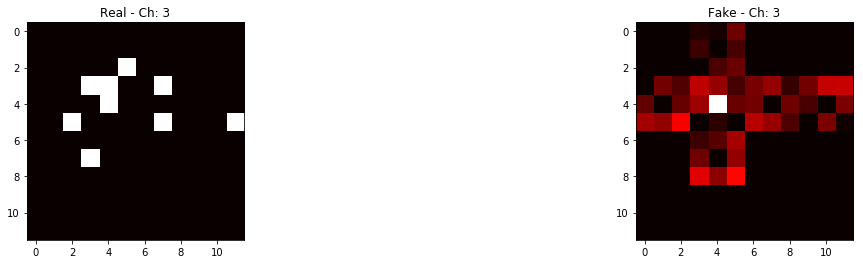

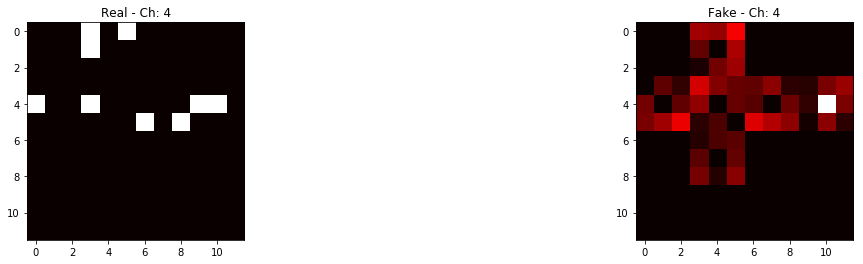

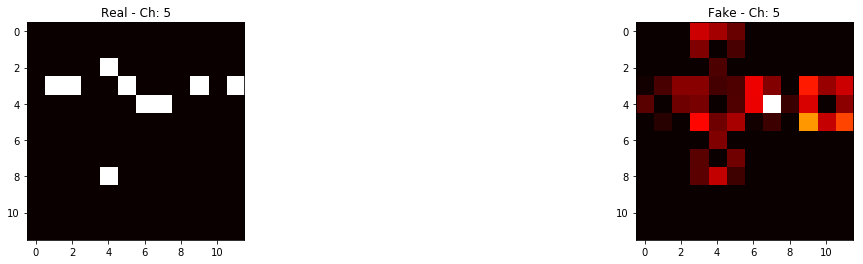

------------------------------------------------------------------------------------------------------------------------------------


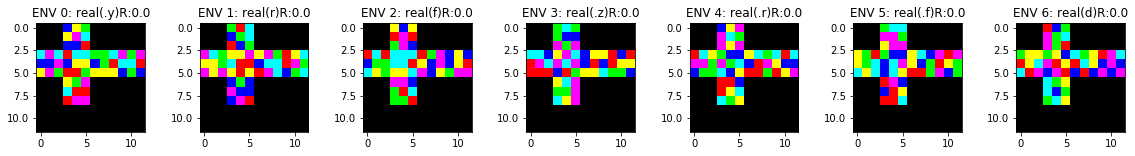

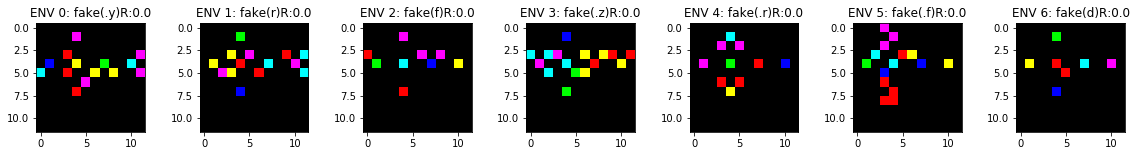

[[0 0 0 4 2 3 0 0 0 0 0 0]
 [0 0 0 2 1 5 0 0 0 0 0 0]
 [0 0 0 4 4 0 0 0 0 0 0 0]
 [5 1 5 0 5 5 3 3 5 1 3 1]
 [4 4 1 4 2 2 4 3 0 5 5 0]
 [2 1 3 0 0 3 2 2 2 4 3 4]
 [0 0 0 2 3 1 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 4 0 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 0 0 0 0]
 [0 0 0 2 4 0 0 0 0 0 0 0]
 [5 4 4 0 0 5 3 3 2 2 1 1]
 [5 4 1 0 2 5 3 3 2 2 5 1]
 [5 5 5 0 0 3 2 2 2 4 1 1]
 [0 0 0 2 1 1 0 0 0 0 0 0]
 [0 0 0 3 0 1 0 0 0 0 0 0]
 [0 0 0 3 3 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


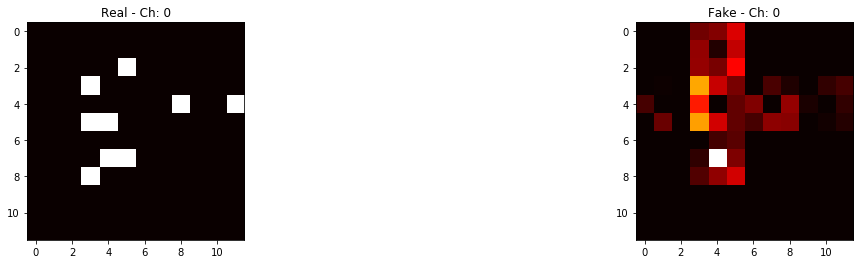

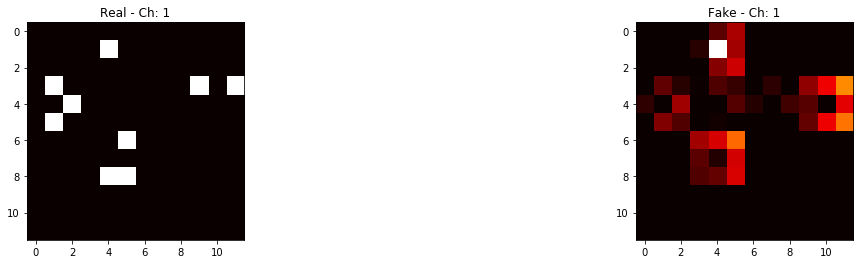

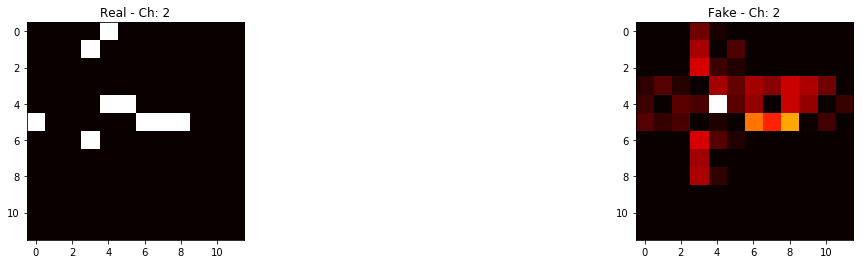

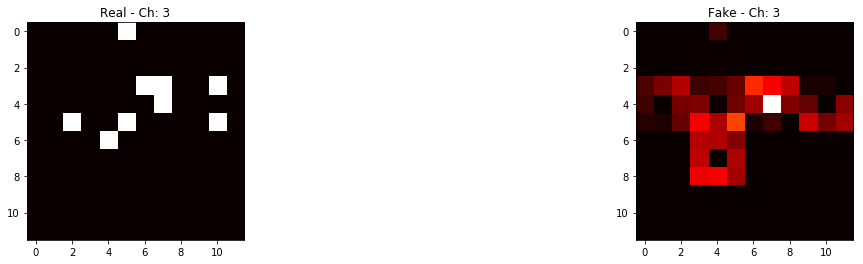

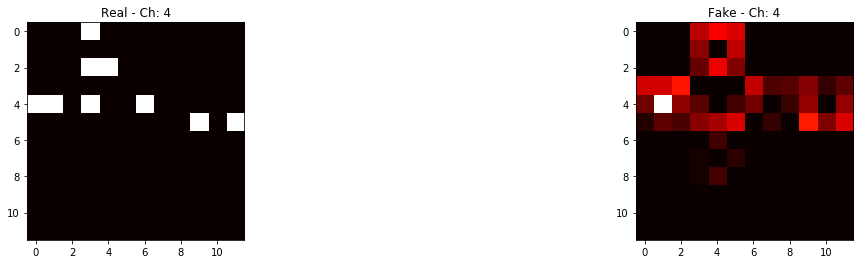

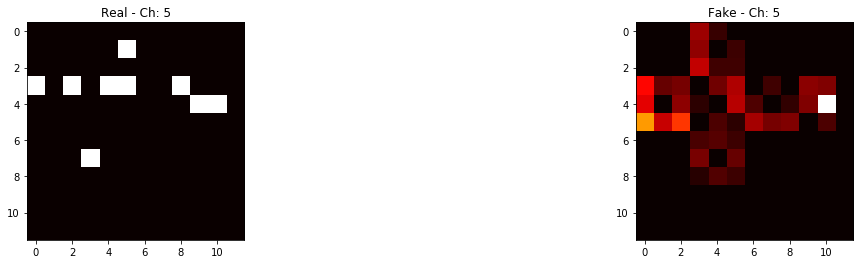

------------------------------------------------------------------------------------------------------------------------------------


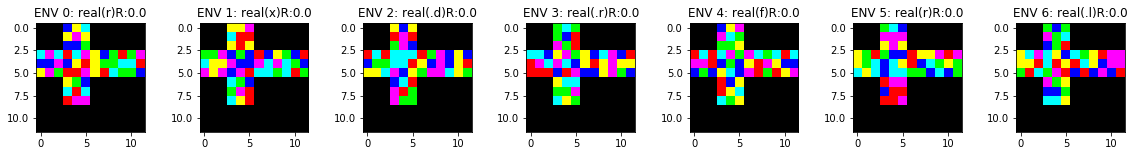

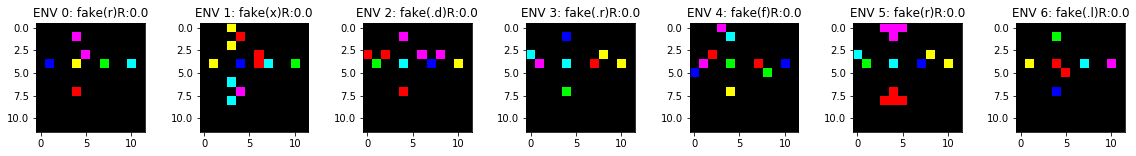

[[0 0 0 4 2 5 0 0 0 0 0 0]
 [0 0 0 2 1 2 0 0 0 0 0 0]
 [0 0 0 4 4 3 0 0 0 0 0 0]
 [5 1 5 0 5 1 2 4 3 0 3 1]
 [4 4 1 4 2 0 2 3 3 5 5 0]
 [2 1 3 0 0 1 2 0 5 3 3 4]
 [0 0 0 2 3 4 0 0 0 0 0 0]
 [0 0 0 5 0 5 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 4 4 0 0 0 0 0 0]
 [0 0 0 3 1 4 0 0 0 0 0 0]
 [0 0 0 2 4 4 0 0 0 0 0 0]
 [4 5 5 0 1 1 2 2 3 1 1 1]
 [4 4 1 4 2 5 0 3 3 1 5 3]
 [5 1 5 4 0 1 2 2 2 1 3 3]
 [0 0 0 5 5 3 0 0 0 0 0 0]
 [0 0 0 5 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


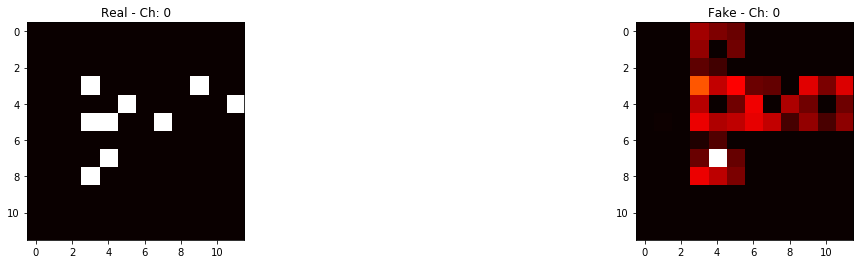

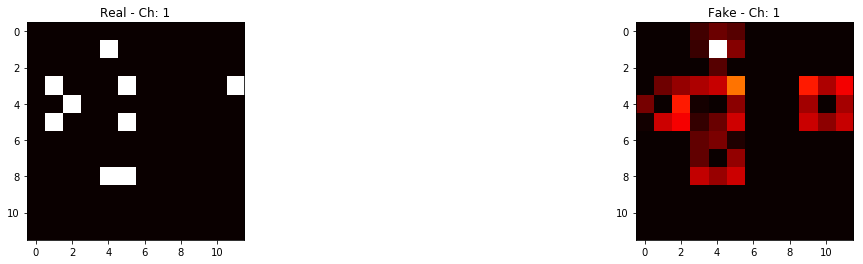

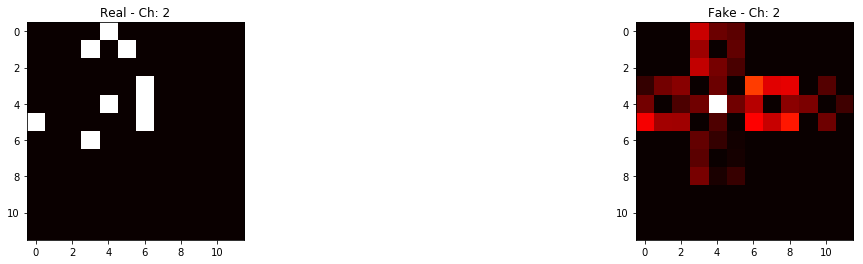

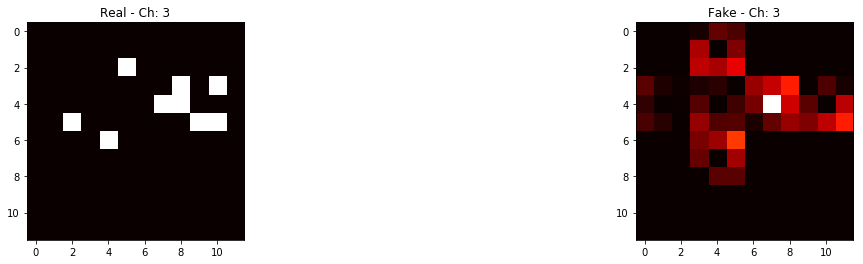

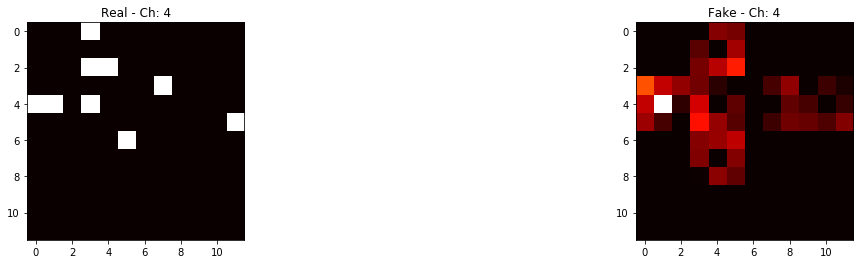

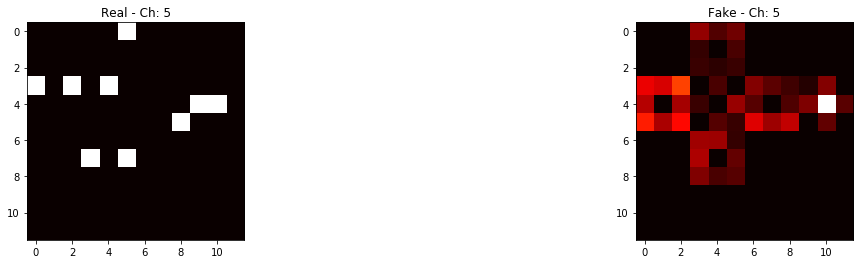

------------------------------------------------------------------------------------------------------------------------------------


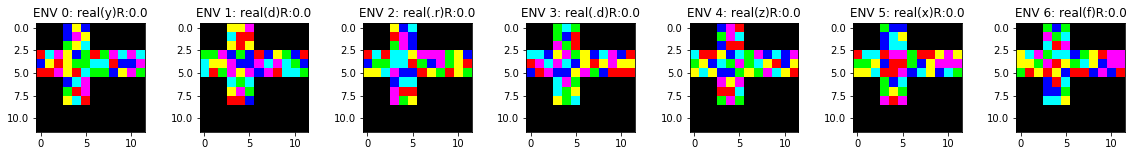

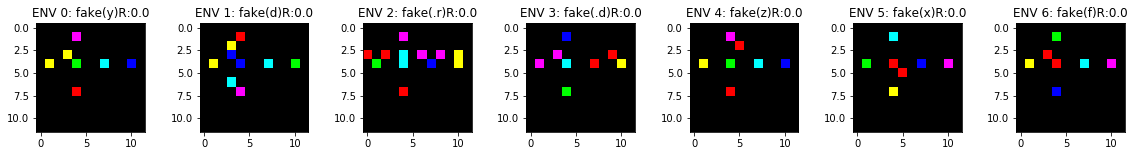

[[0 0 0 4 2 4 0 0 0 0 0 0]
 [0 0 0 4 1 2 0 0 0 0 0 0]
 [0 0 0 3 2 5 0 0 0 0 0 0]
 [0 5 1 2 4 3 0 3 1 5 1 5]
 [4 2 0 2 3 3 5 5 0 4 4 1]
 [0 0 1 2 0 5 3 3 4 2 1 3]
 [0 0 0 4 5 1 0 0 0 0 0 0]
 [0 0 0 3 0 1 0 0 0 0 0 0]
 [0 0 0 2 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 2 2 0 0 0 0 0 0]
 [0 0 0 4 1 4 0 0 0 0 0 0]
 [0 0 0 4 4 0 0 0 0 0 0 0]
 [1 1 1 2 2 2 1 0 0 5 3 5]
 [4 2 4 0 3 2 3 5 0 5 4 5]
 [0 0 0 2 0 2 3 3 3 5 1 5]
 [0 0 0 3 3 1 0 0 0 0 0 0]
 [0 0 0 3 0 5 0 0 0 0 0 0]
 [0 0 0 3 5 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


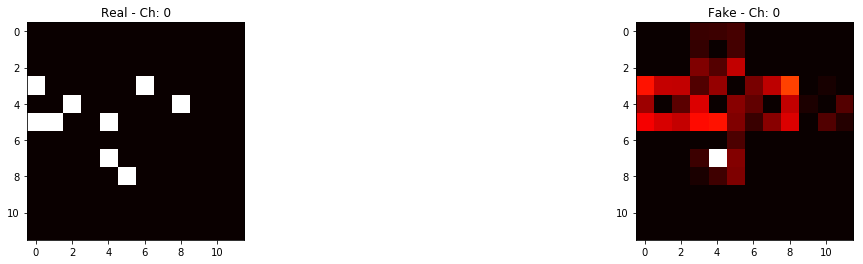

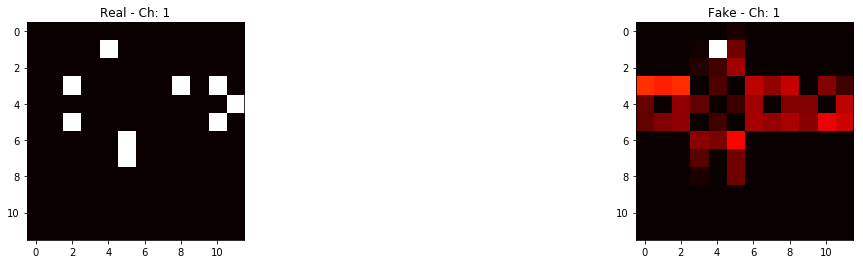

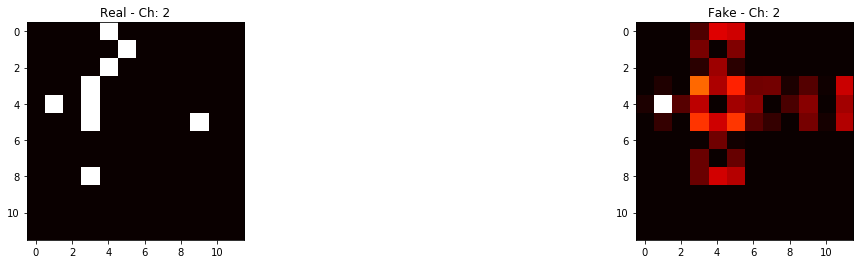

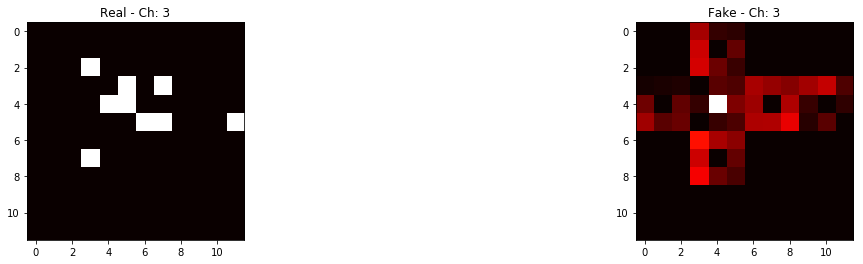

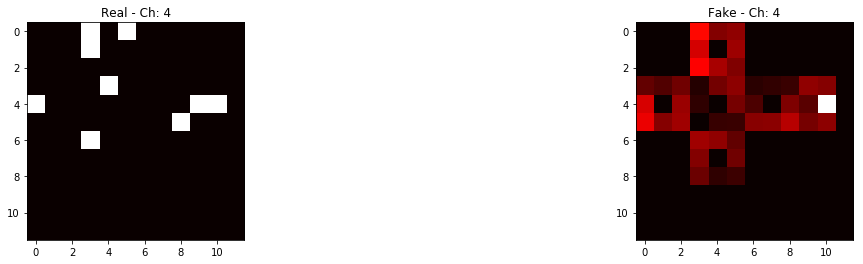

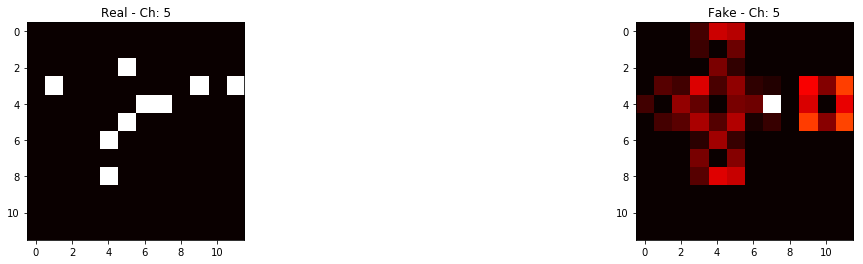

------------------------------------------------------------------------------------------------------------------------------------


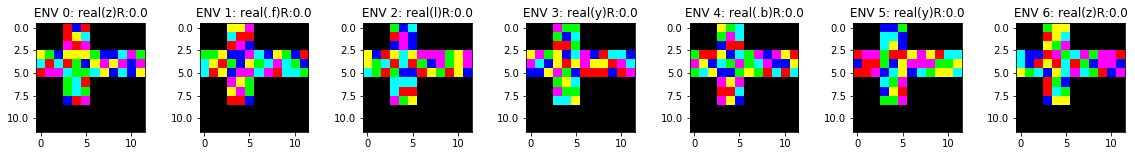

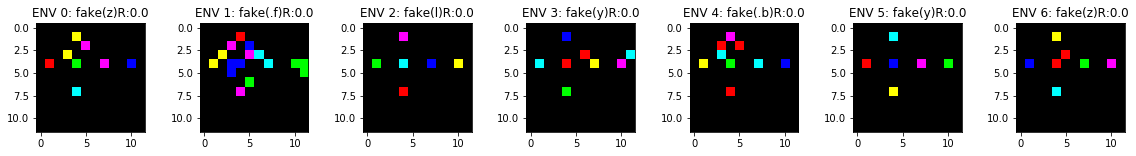

[[0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 2 5 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0]
 [2 3 4 2 2 2 3 4 4 5 1 3]
 [5 0 5 0 3 4 2 1 2 1 4 1]
 [0 1 1 5 3 3 5 2 4 5 4 2]
 [0 0 0 3 5 0 0 0 0 0 0 0]
 [0 0 0 3 5 3 0 0 0 0 0 0]
 [0 0 0 4 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 1 0 0 0 0 0 0]
 [0 0 0 0 5 1 0 0 0 0 0 0]
 [3 3 4 2 0 2 3 4 4 5 1 5]
 [5 0 5 0 3 3 2 1 2 4 4 1]
 [5 5 5 2 3 3 2 4 2 4 4 5]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 3 5 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


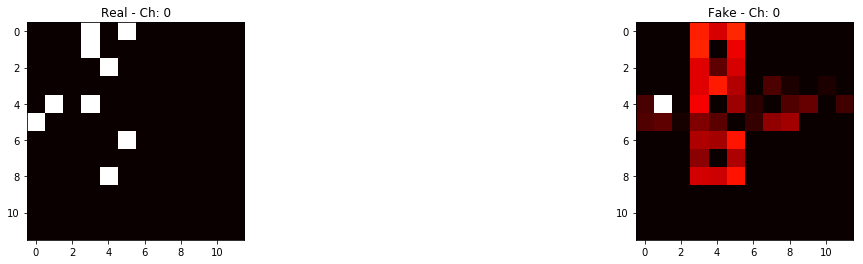

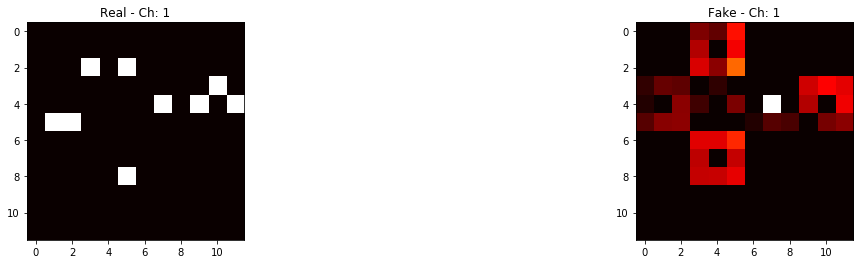

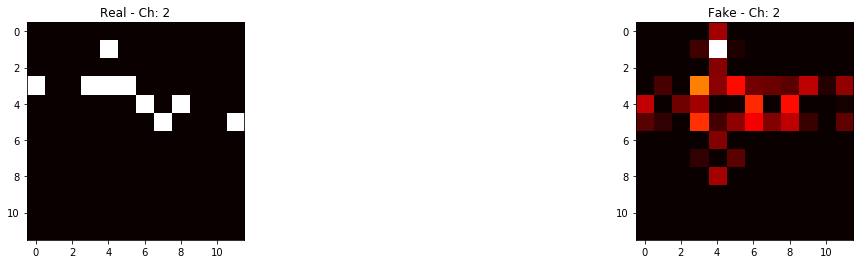

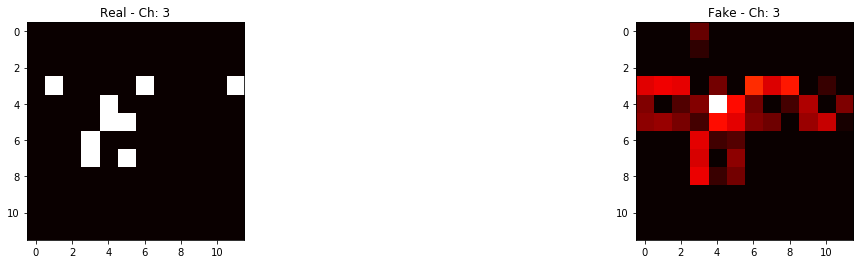

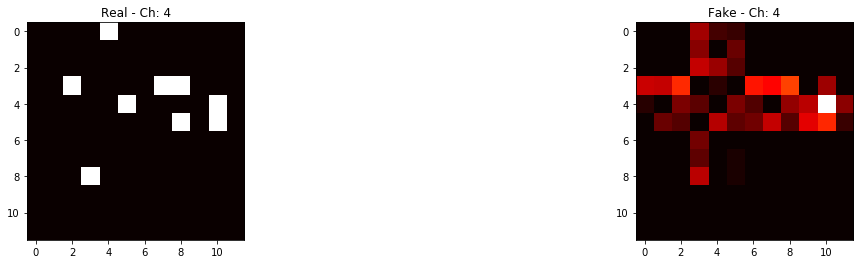

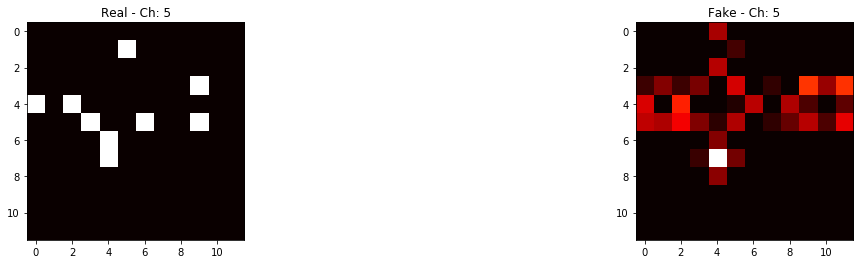

------------------------------------------------------------------------------------------------------------------------------------


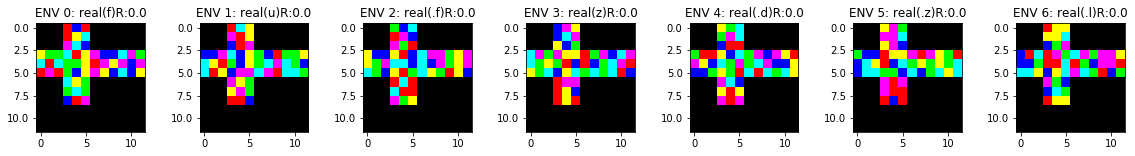

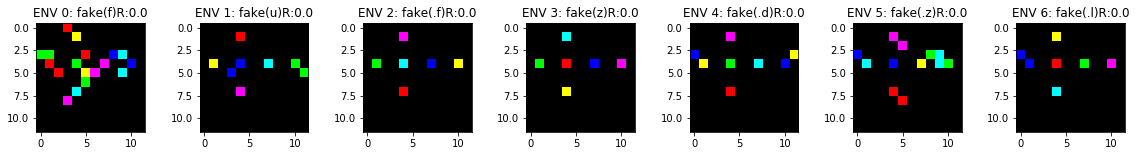

[[0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 2 5 0 0 0 0 0 0]
 [0 0 0 1 5 4 0 0 0 0 0 0]
 [2 3 3 5 0 2 1 4 4 5 1 3]
 [5 0 5 3 3 2 0 1 2 1 4 1]
 [0 1 0 3 4 2 1 2 4 5 4 2]
 [0 0 0 5 2 3 0 0 0 0 0 0]
 [0 0 0 3 5 3 0 0 0 0 0 0]
 [0 0 0 4 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 1 5 4 0 0 0 0 0 0]
 [3 3 3 2 0 0 4 4 4 5 5 5]
 [5 0 0 3 3 2 1 1 2 5 4 4]
 [3 0 0 2 3 2 1 1 1 5 4 4]
 [0 0 0 2 5 3 0 0 0 0 0 0]
 [0 0 0 1 5 3 0 0 0 0 0 0]
 [0 0 0 1 1 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


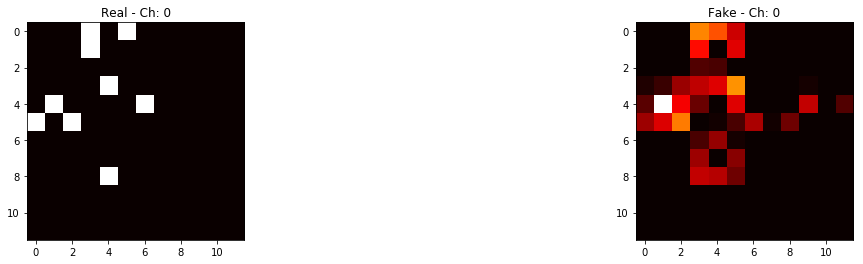

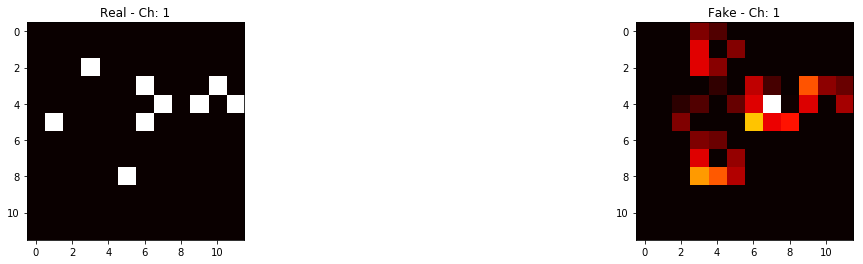

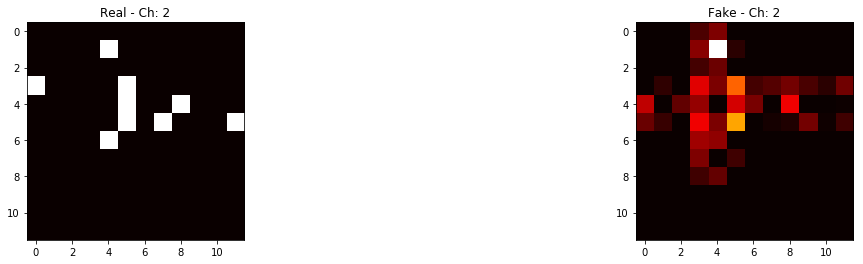

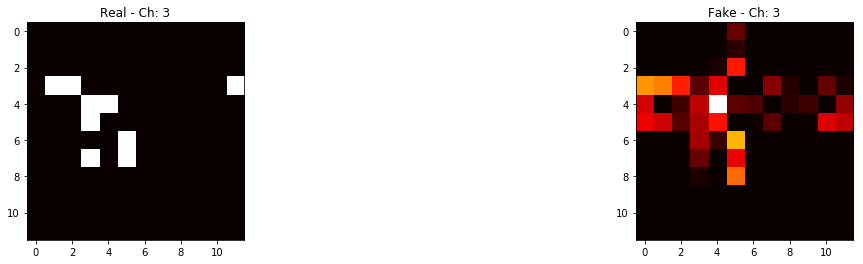

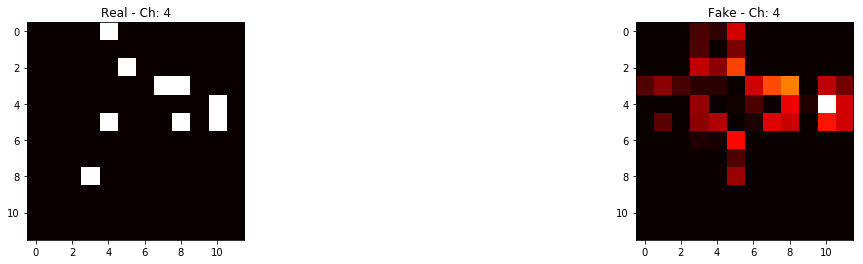

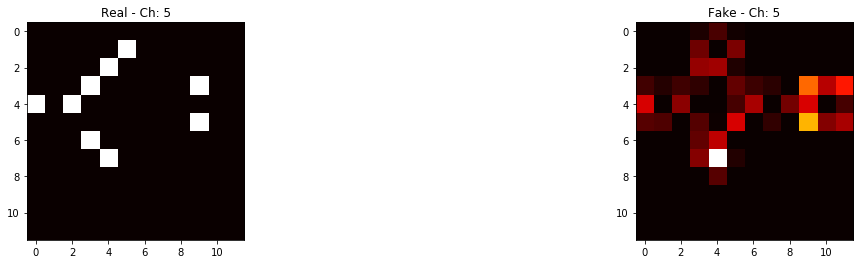

------------------------------------------------------------------------------------------------------------------------------------


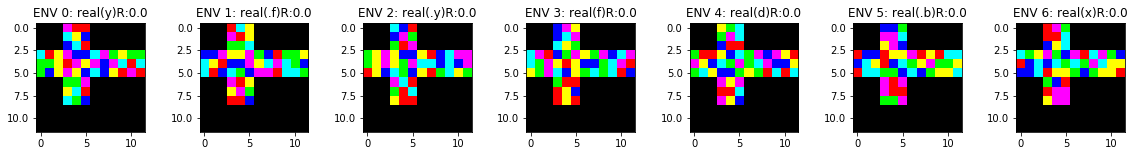

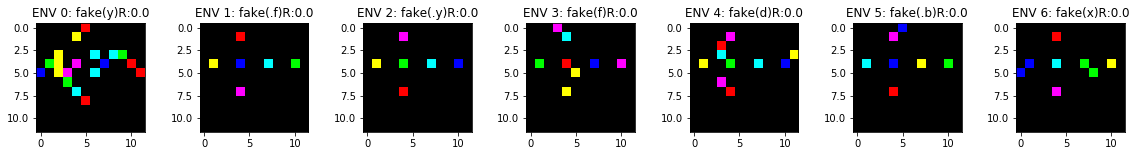

[[0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 5 2 4 0 0 0 0 0 0]
 [0 0 0 4 5 0 0 0 0 0 0 0]
 [5 0 2 1 4 4 5 1 3 2 3 3]
 [3 3 2 0 1 2 1 4 1 5 0 5]
 [3 4 2 1 2 4 5 4 2 0 1 0]
 [0 0 0 3 3 1 0 0 0 0 0 0]
 [0 0 0 2 5 0 0 0 0 0 0 0]
 [0 0 0 5 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 5 2 4 0 0 0 0 0 0]
 [0 0 0 4 4 0 0 0 0 0 0 0]
 [2 0 2 1 1 4 5 1 5 3 3 3]
 [2 3 2 1 1 2 5 4 4 5 0 0]
 [4 2 2 1 1 2 5 5 3 2 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 5 5 3 0 0 0 0 0 0]
 [0 0 0 5 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


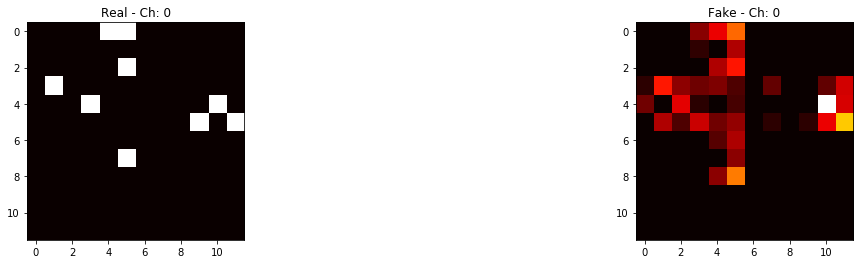

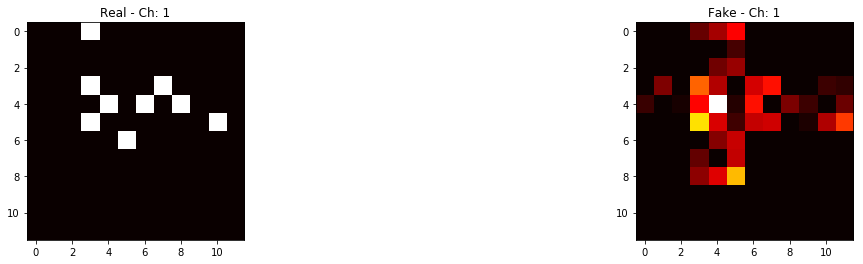

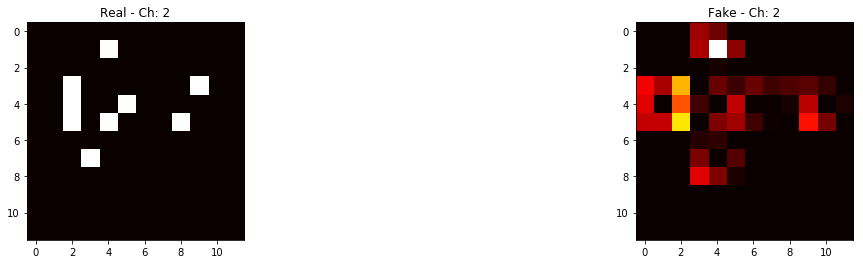

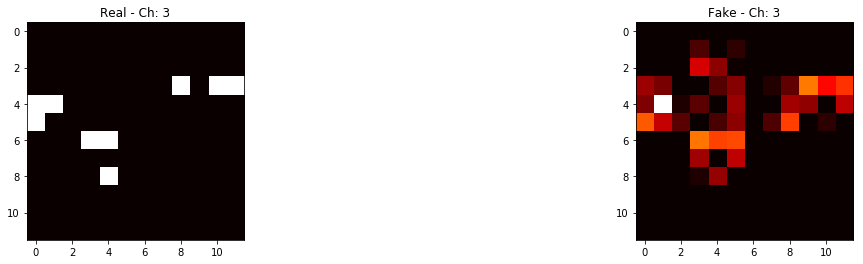

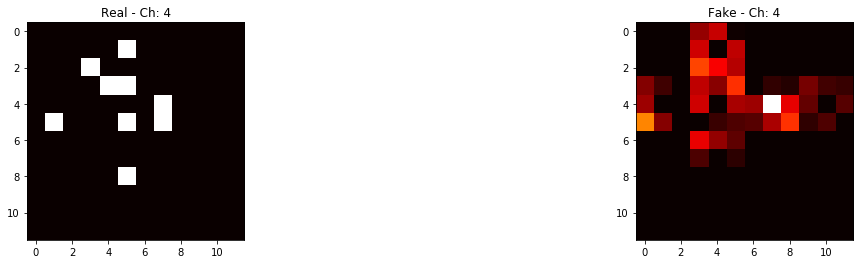

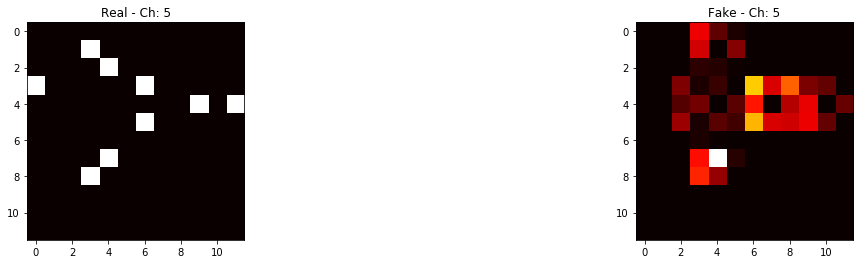

------------------------------------------------------------------------------------------------------------------------------------


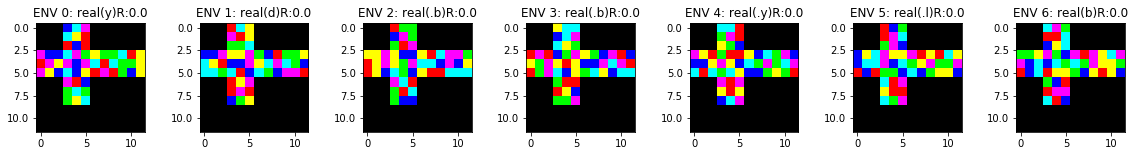

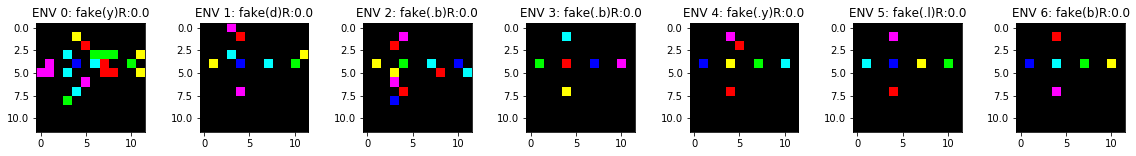

[[0 0 0 4 5 1 0 0 0 0 0 0]
 [0 0 0 5 2 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0]
 [1 4 4 5 1 3 2 3 3 5 0 2]
 [0 1 2 1 4 1 5 0 5 3 3 2]
 [1 2 4 5 4 2 0 1 0 3 4 2]
 [0 0 0 1 0 4 0 0 0 0 0 0]
 [0 0 0 3 5 3 0 0 0 0 0 0]
 [0 0 0 3 2 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 5 5 0 0 0 0 0 0]
 [0 0 0 4 2 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0]
 [1 4 4 5 1 5 3 3 3 2 0 2]
 [1 1 2 1 4 4 5 0 0 2 3 2]
 [1 1 4 5 5 5 5 0 0 4 4 2]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 3 5 1 0 0 0 0 0 0]
 [0 0 0 3 5 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


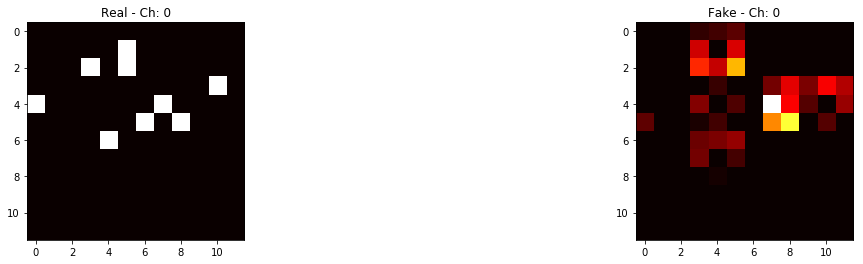

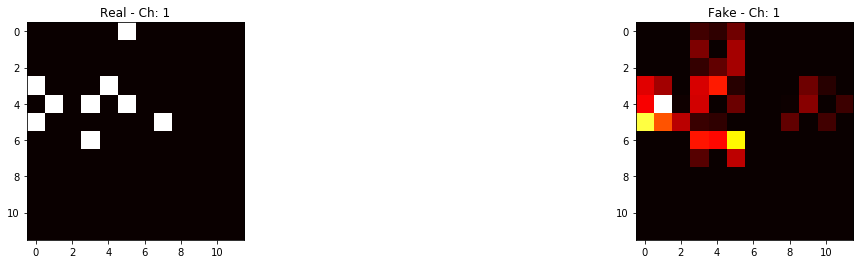

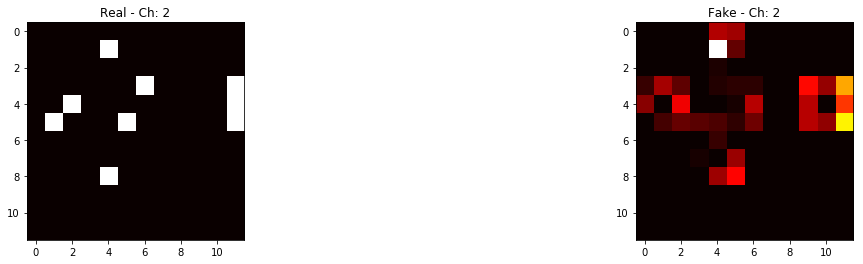

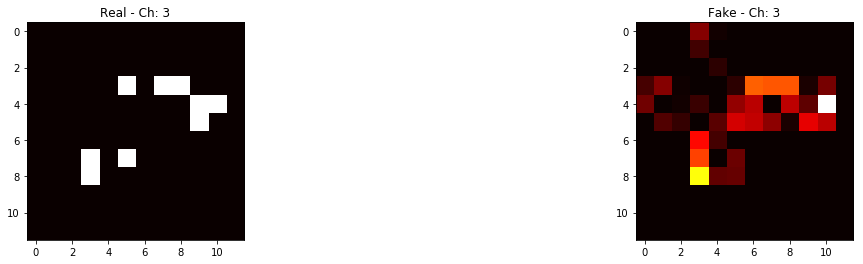

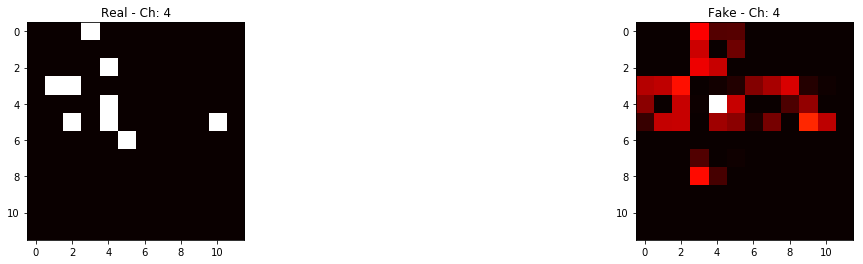

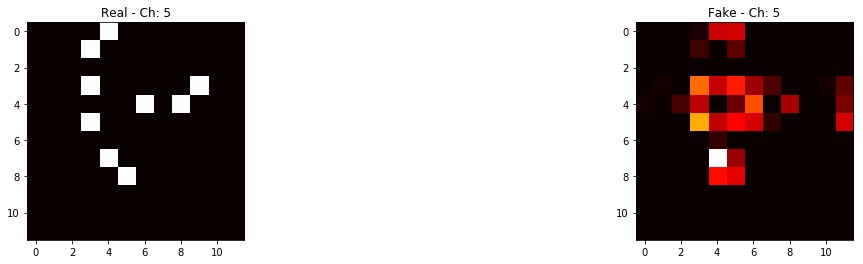

------------------------------------------------------------------------------------------------------------------------------------


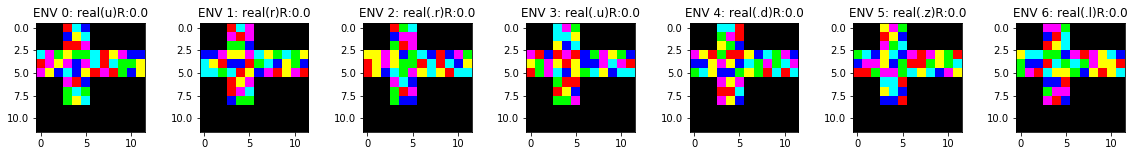

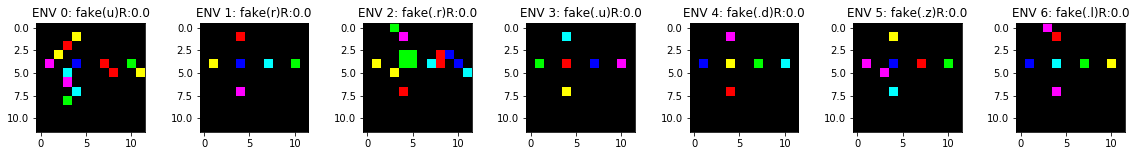

[[0 0 0 0 5 4 0 0 0 0 0 0]
 [0 0 0 4 2 5 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [5 1 3 2 3 3 5 0 2 1 4 4]
 [0 1 2 1 4 1 5 0 5 3 3 2]
 [1 2 4 5 4 2 0 1 0 3 4 2]
 [0 0 0 1 0 4 0 0 0 0 0 0]
 [0 0 0 3 5 3 0 0 0 0 0 0]
 [0 0 0 3 2 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 5 4 0 0 0 0 0 0]
 [0 0 0 0 2 4 0 0 0 0 0 0]
 [0 0 0 0 1 4 0 0 0 0 0 0]
 [2 2 2 3 3 3 5 5 5 1 3 2]
 [1 1 2 4 4 3 5 0 0 3 3 3]
 [1 1 3 5 5 5 4 0 0 2 2 2]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 3 5 3 0 0 0 0 0 0]
 [0 0 0 3 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


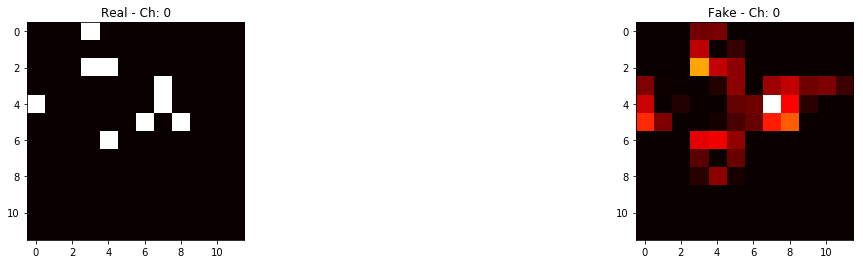

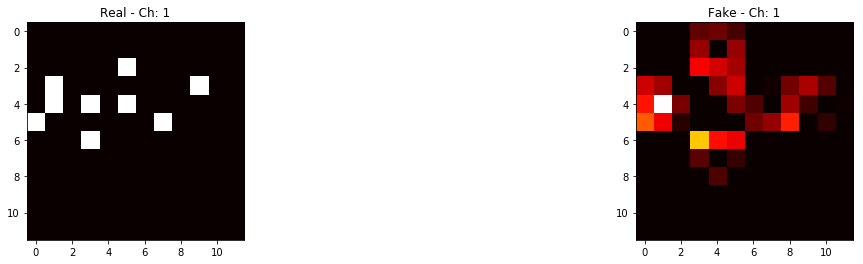

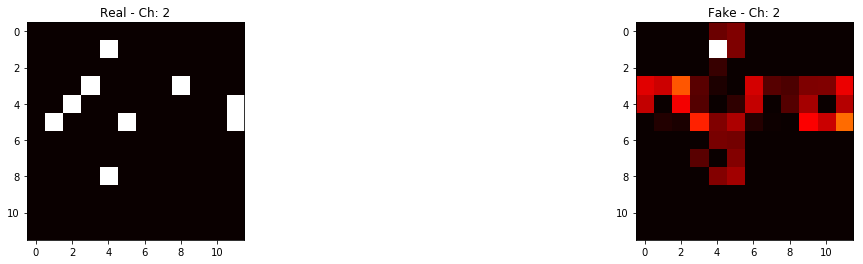

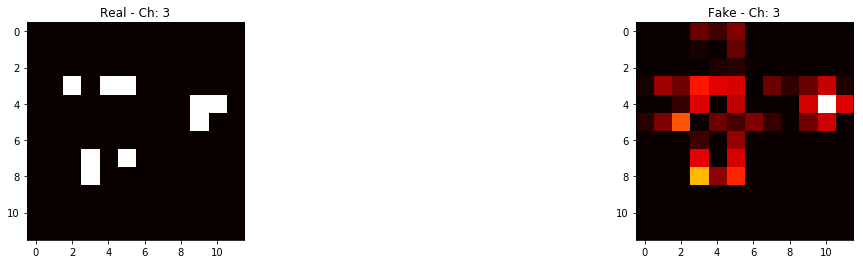

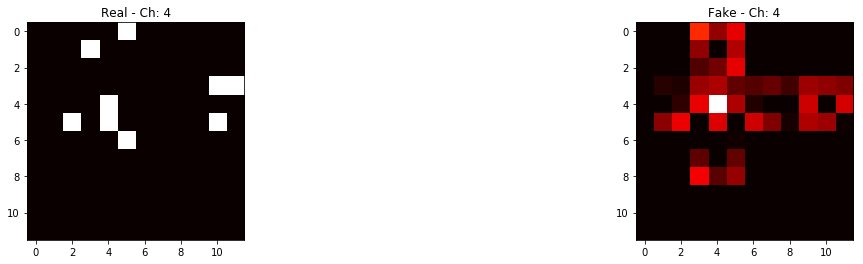

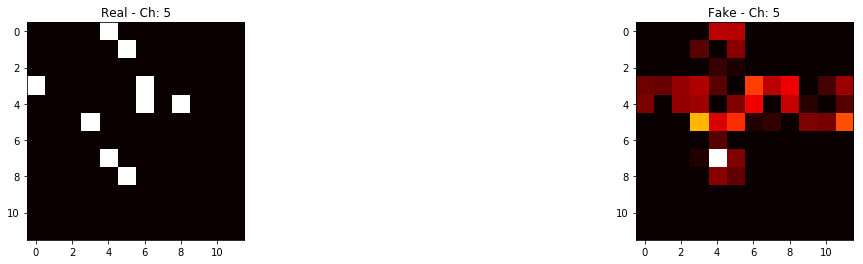

------------------------------------------------------------------------------------------------------------------------------------


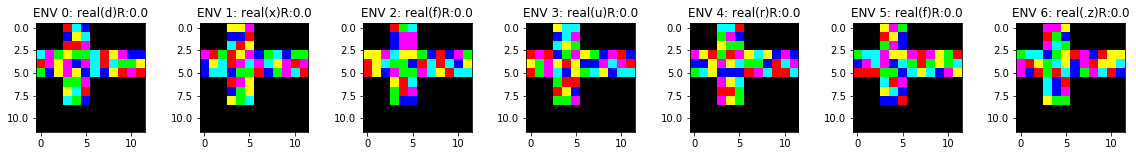

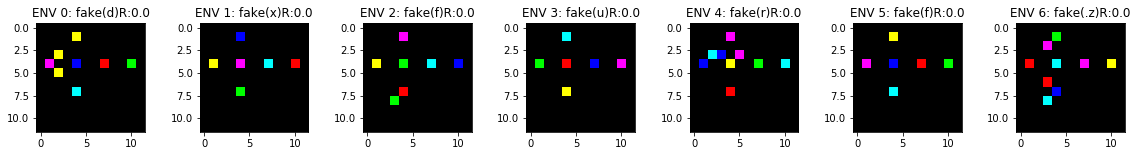

[[0 0 0 0 5 4 0 0 0 0 0 0]
 [0 0 0 4 2 5 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [5 1 3 2 3 3 5 0 2 1 4 4]
 [0 1 2 1 4 1 5 0 5 3 3 2]
 [3 4 2 1 2 4 5 4 2 0 1 0]
 [0 0 0 3 3 1 0 0 0 0 0 0]
 [0 0 0 2 5 0 0 0 0 0 0 0]
 [0 0 0 5 3 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 4 2 4 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [2 2 2 3 3 3 5 0 5 4 0 4]
 [2 1 2 4 4 3 5 0 5 2 3 3]
 [2 2 2 1 0 1 5 5 5 1 1 0]
 [0 0 0 1 3 3 0 0 0 0 0 0]
 [0 0 0 3 5 3 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


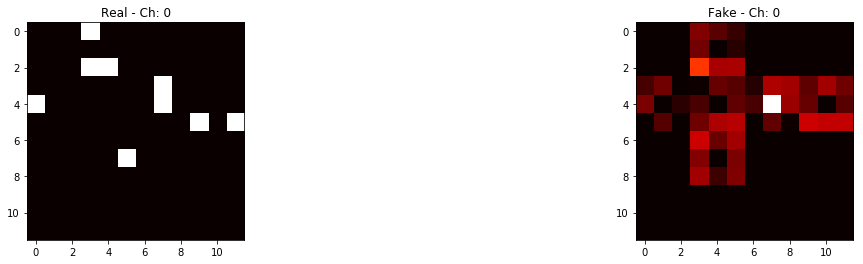

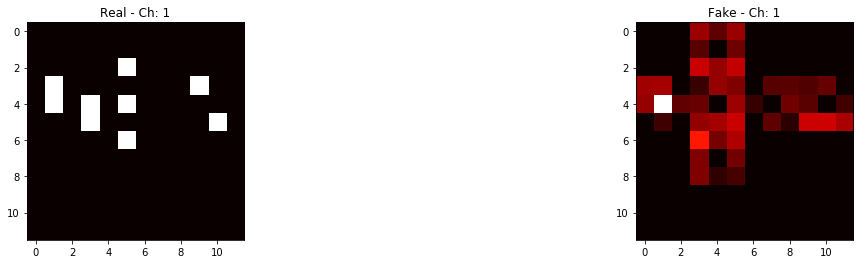

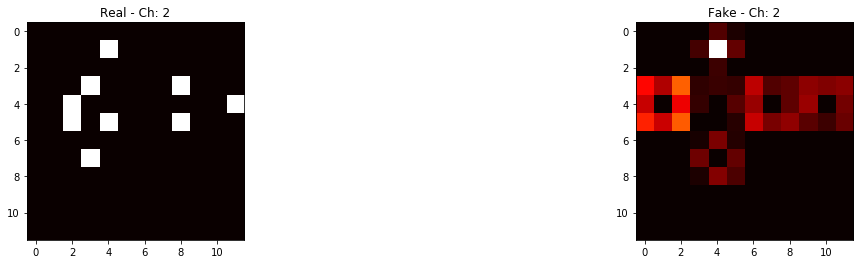

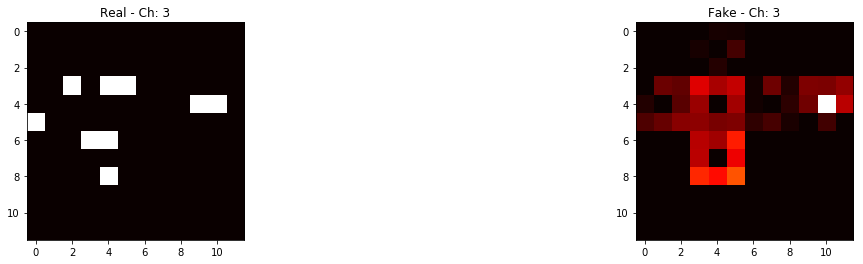

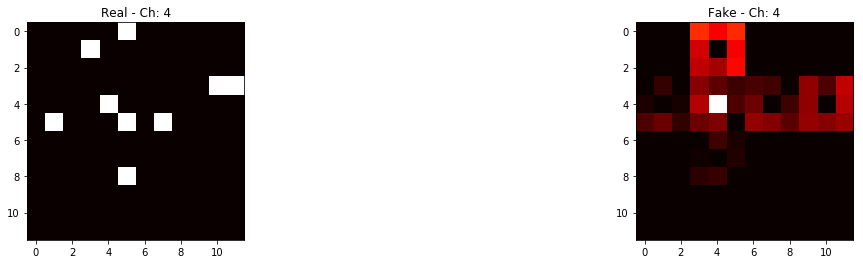

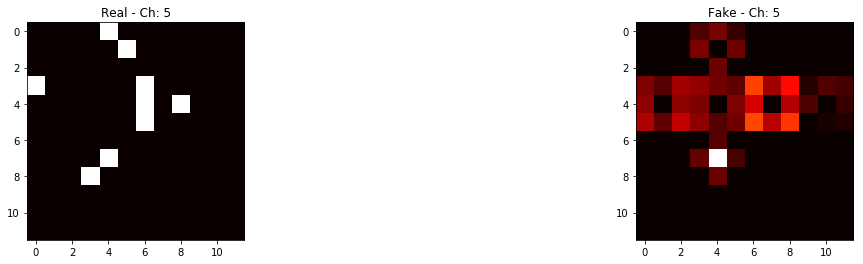

------------------------------------------------------------------------------------------------------------------------------------


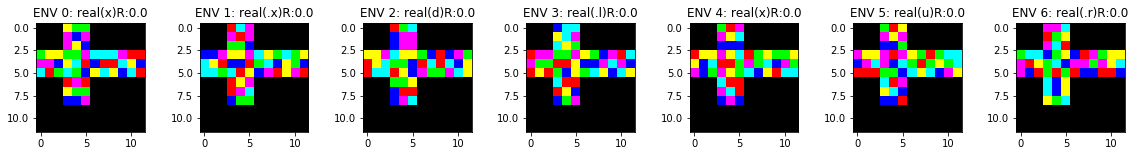

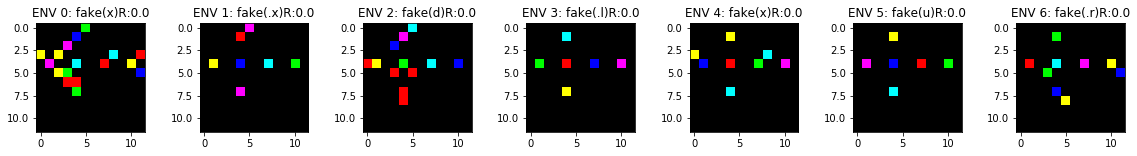

[[0 0 0 2 3 3 0 0 0 0 0 0]
 [0 0 0 1 4 1 0 0 0 0 0 0]
 [0 0 0 1 2 4 0 0 0 0 0 0]
 [3 2 2 3 3 1 5 5 5 1 0 0]
 [1 1 4 2 5 0 4 0 0 5 2 4]
 [5 0 3 5 3 4 2 5 2 4 5 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 2 3 3 0 0 0 0 0 0]
 [0 0 0 4 4 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 3 3 0 0 0 0 0 0]
 [0 0 0 1 4 3 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [2 2 2 3 3 0 4 5 5 0 0 0]
 [3 1 3 5 5 2 4 0 0 2 2 4]
 [2 2 2 3 3 3 5 5 5 4 2 4]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


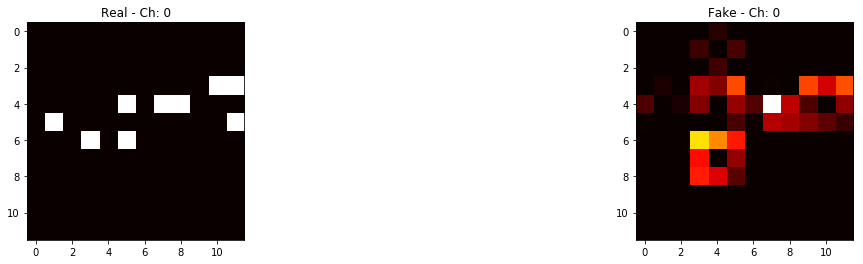

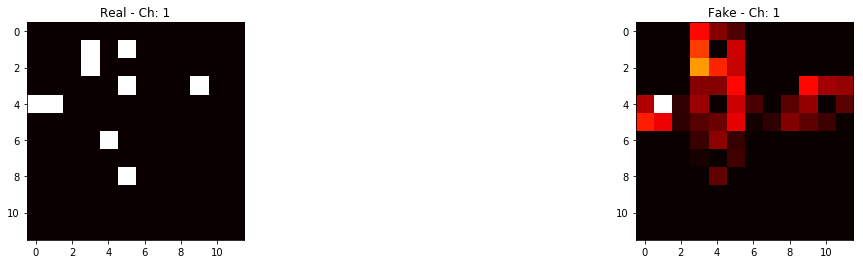

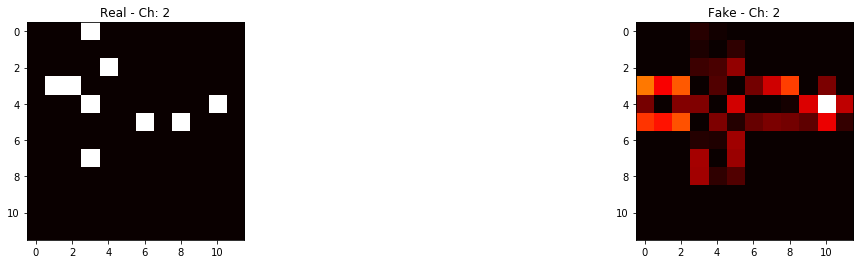

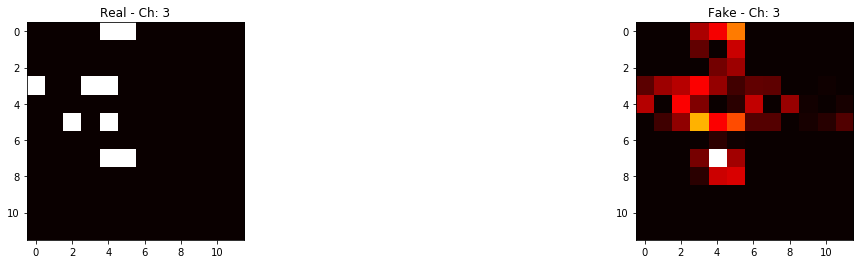

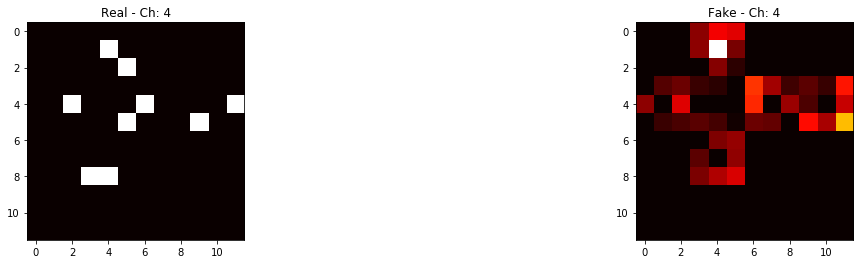

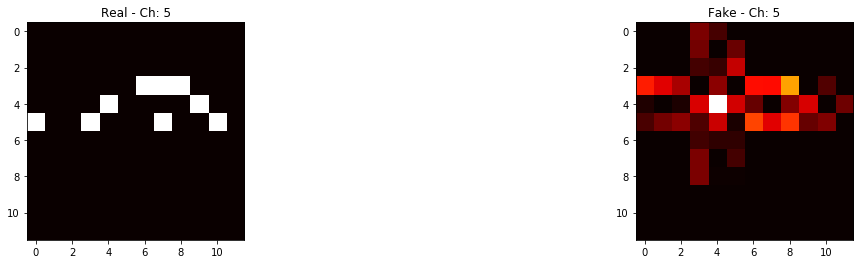

------------------------------------------------------------------------------------------------------------------------------------


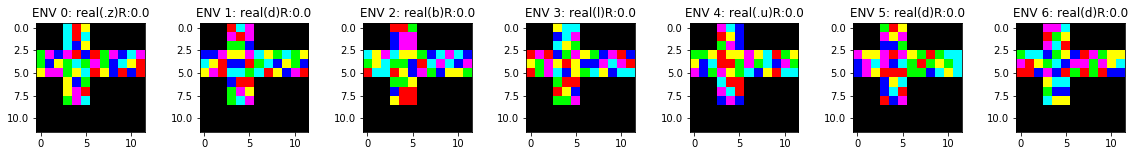

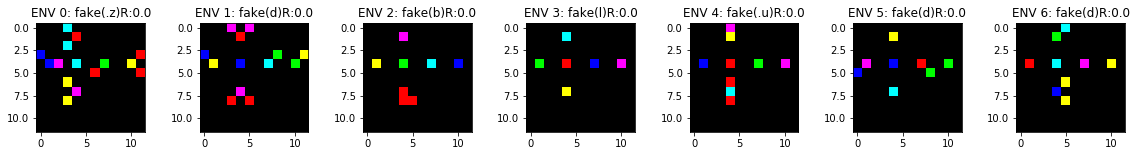

[[0 0 0 5 0 2 0 0 0 0 0 0]
 [0 0 0 5 0 5 0 0 0 0 0 0]
 [0 0 0 5 4 2 0 0 0 0 0 0]
 [3 1 4 1 0 4 0 3 1 4 5 1]
 [3 4 2 3 5 3 1 3 4 5 2 0]
 [2 1 1 3 2 5 0 2 4 0 4 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 0 0 0 0]
 [0 0 0 3 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 0 5 0 0 0 0 0 0]
 [0 0 0 5 0 2 0 0 0 0 0 0]
 [0 0 0 5 4 4 0 0 0 0 0 0]
 [4 4 1 1 3 1 0 3 3 4 4 0]
 [1 4 1 3 5 3 0 3 0 4 2 4]
 [4 1 1 1 3 1 0 0 3 4 4 0]
 [0 0 0 2 2 3 0 0 0 0 0 0]
 [0 0 0 2 1 3 0 0 0 0 0 0]
 [0 0 0 2 1 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


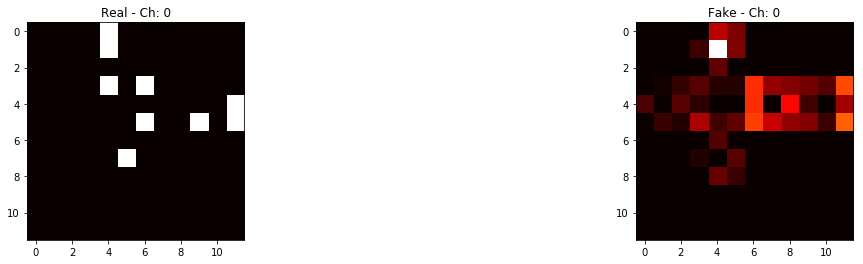

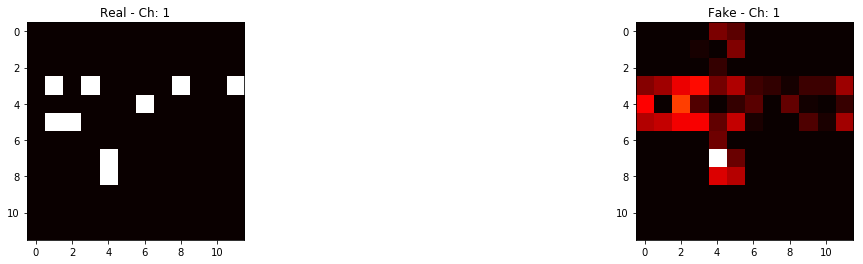

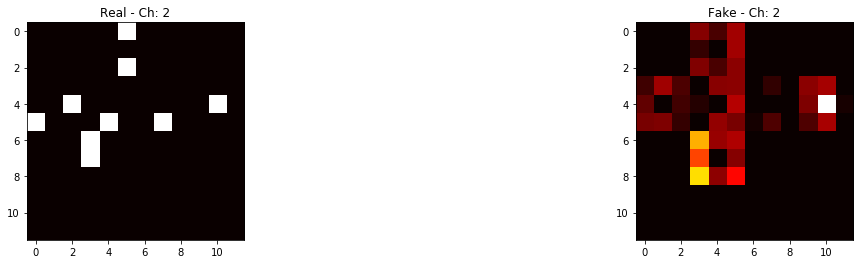

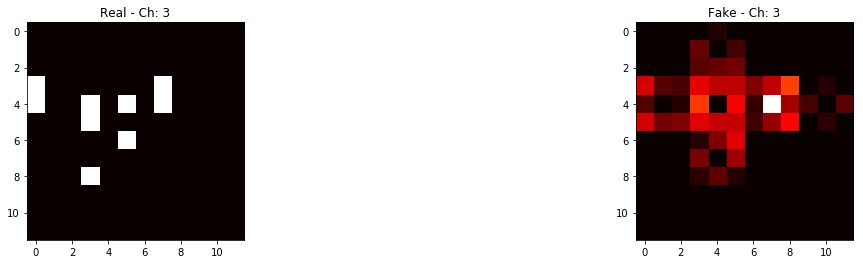

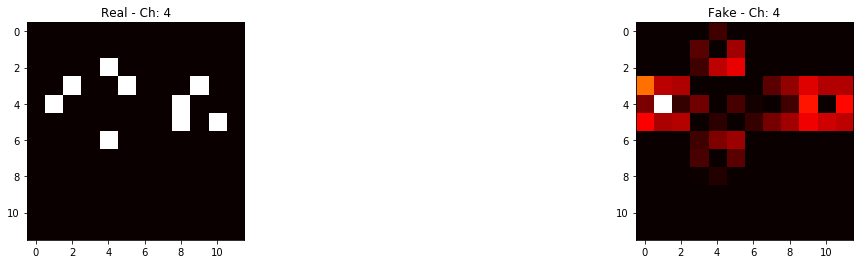

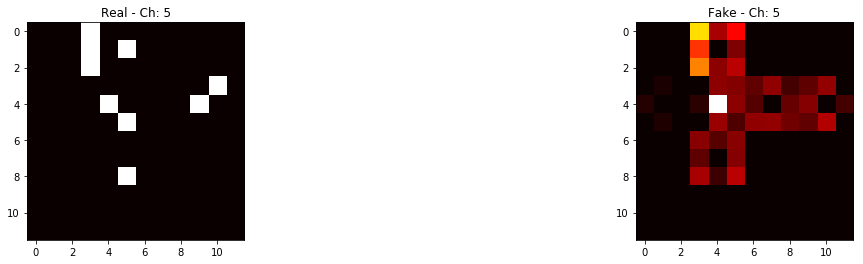

------------------------------------------------------------------------------------------------------------------------------------


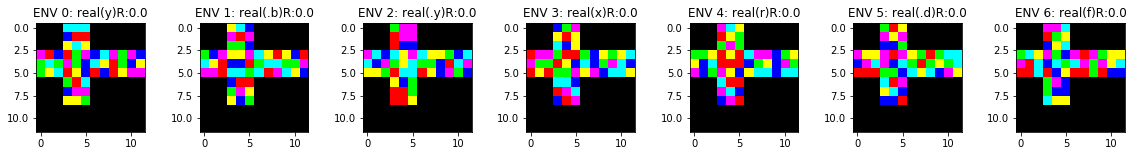

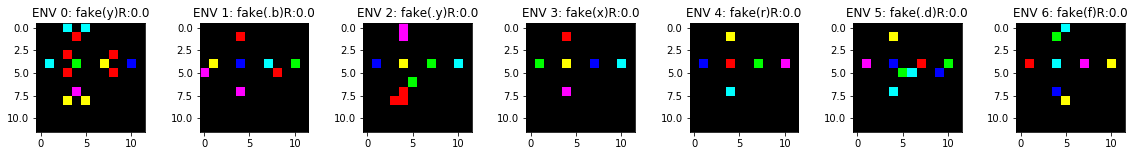

[[0 0 0 5 5 5 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 2 5 2 0 0 0 0 0 0]
 [1 0 4 0 3 1 4 5 1 3 1 4]
 [3 5 3 1 3 4 5 2 0 3 4 2]
 [3 2 5 0 2 4 0 4 0 2 1 1]
 [0 0 0 3 0 5 0 0 0 0 0 0]
 [0 0 0 4 1 1 0 0 0 0 0 0]
 [0 0 0 2 2 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 5 5 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0]
 [1 3 3 0 3 3 4 4 0 3 1 1]
 [1 5 3 0 3 0 4 2 0 1 4 1]
 [1 3 3 0 3 3 4 4 0 4 1 1]
 [0 0 0 2 1 1 0 0 0 0 0 0]
 [0 0 0 3 1 1 0 0 0 0 0 0]
 [0 0 0 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


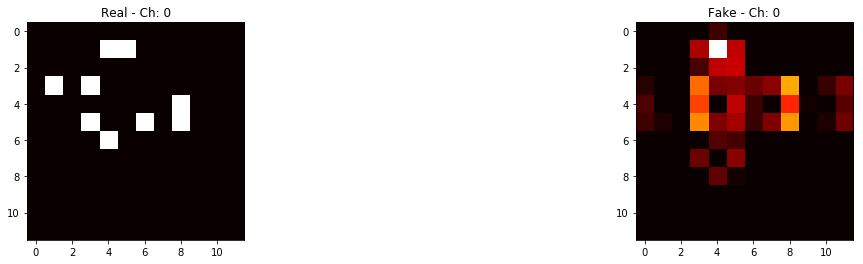

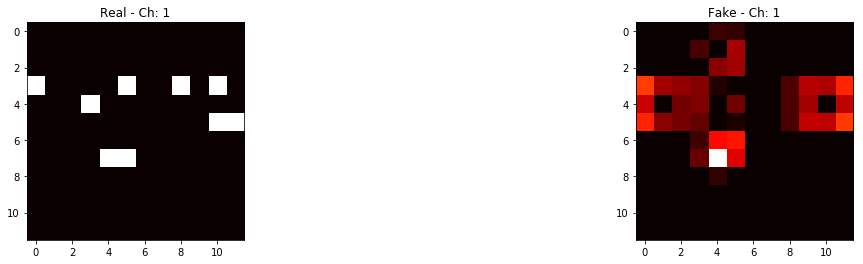

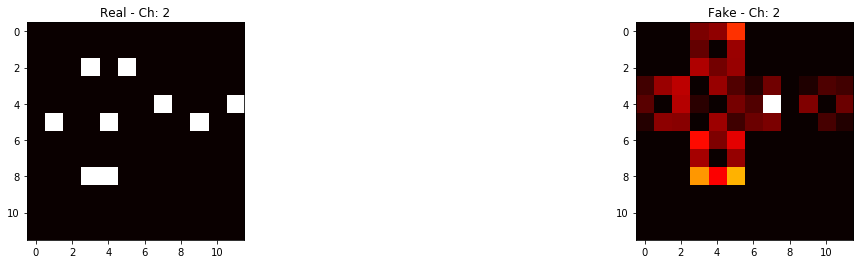

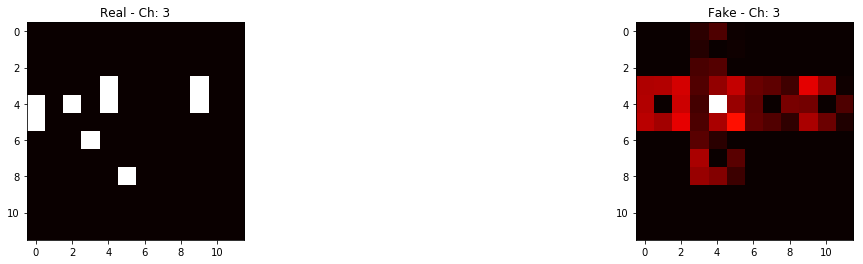

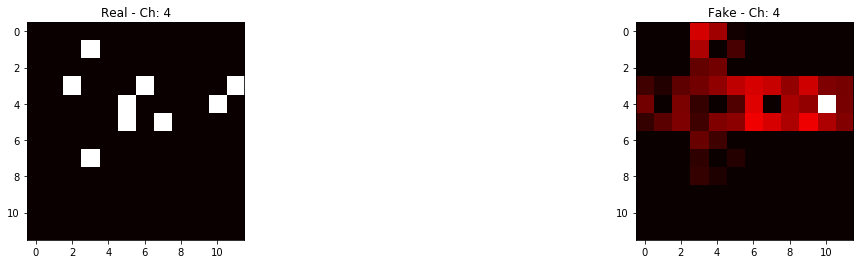

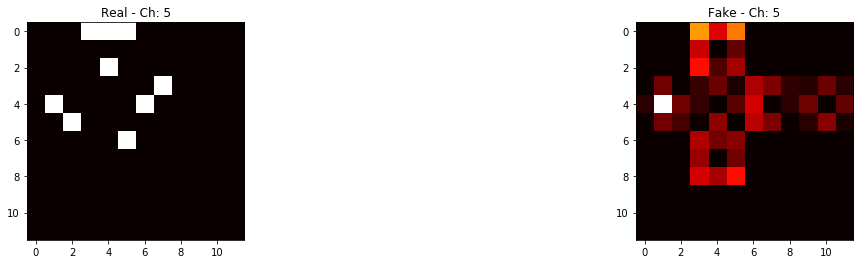

------------------------------------------------------------------------------------------------------------------------------------


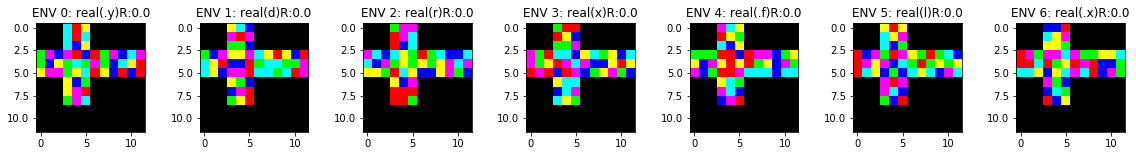

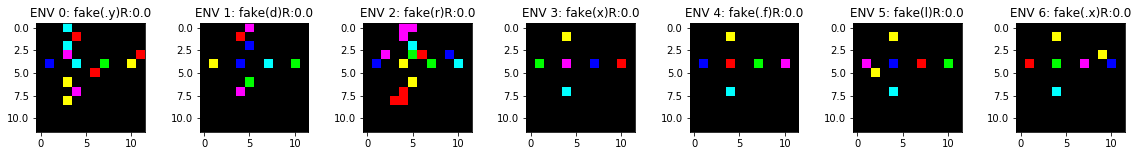

[[0 0 0 5 0 2 0 0 0 0 0 0]
 [0 0 0 5 0 5 0 0 0 0 0 0]
 [0 0 0 5 4 2 0 0 0 0 0 0]
 [3 1 4 1 0 4 0 3 1 4 5 1]
 [3 4 2 3 5 3 1 3 4 5 2 0]
 [2 1 1 3 2 5 0 2 4 0 4 0]
 [0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 0 0 0 0]
 [0 0 0 3 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 5 0 5 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 4 0 0 0 0 0 0]
 [4 4 4 1 2 1 0 3 3 0 5 0]
 [1 4 1 3 5 2 0 3 0 4 2 4]
 [1 1 1 3 3 3 0 3 0 4 5 0]
 [0 0 0 2 1 2 0 0 0 0 0 0]
 [0 0 0 2 1 1 0 0 0 0 0 0]
 [0 0 0 2 1 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


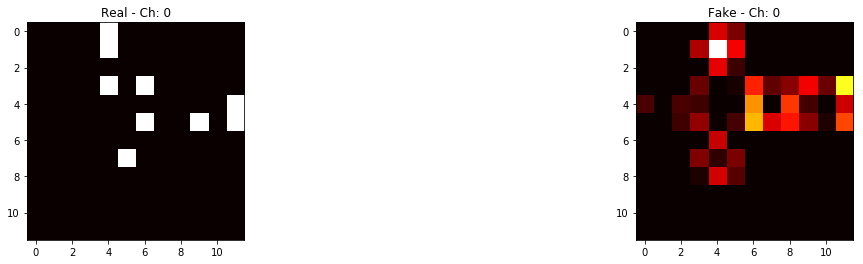

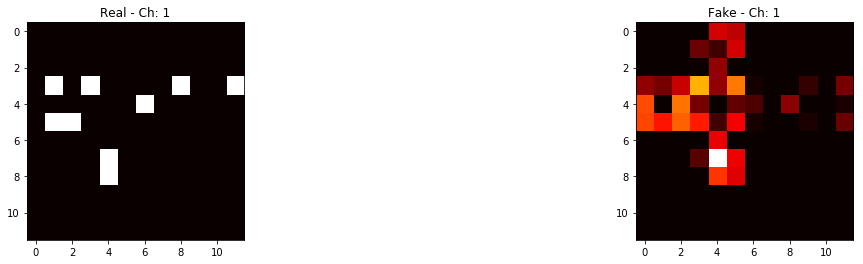

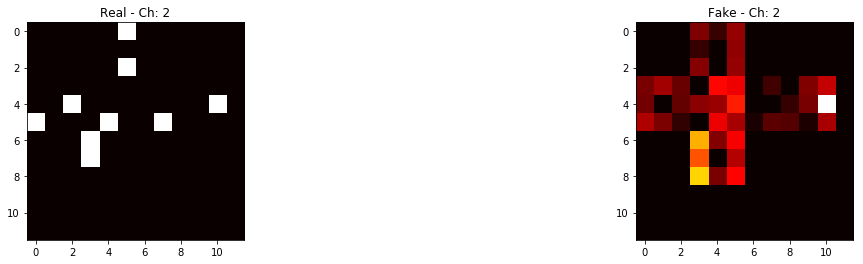

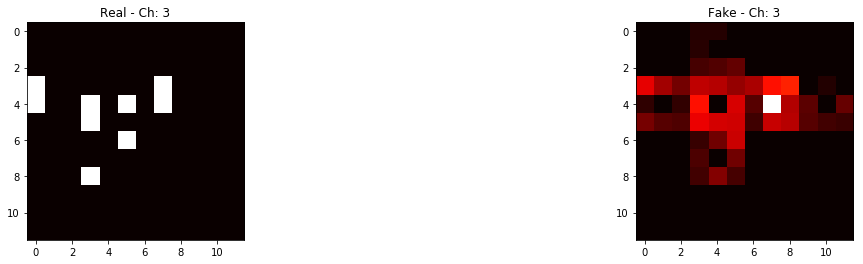

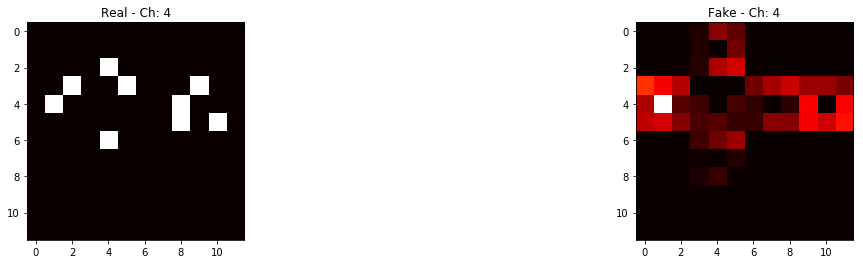

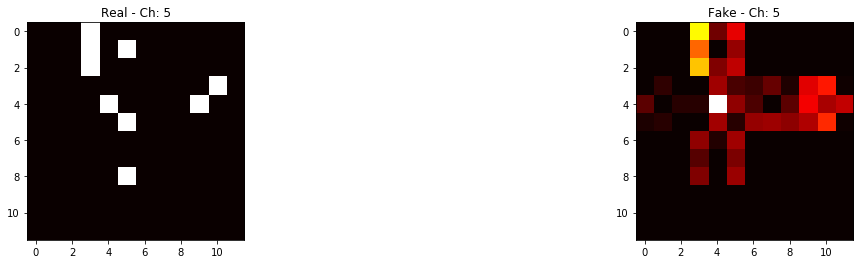

------------------------------------------------------------------------------------------------------------------------------------


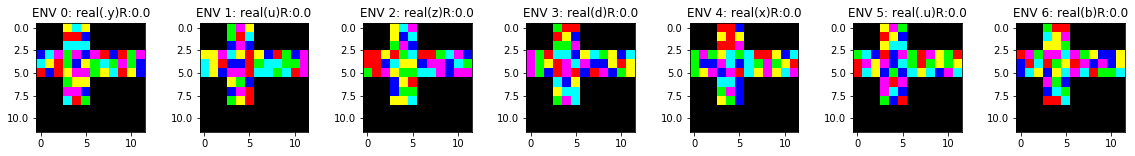

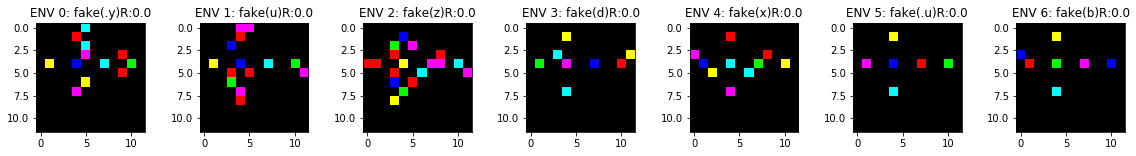

[[0 0 0 2 5 2 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 5 5 5 0 0 0 0 0 0]
 [4 5 1 3 1 4 1 0 4 0 3 1]
 [5 2 0 3 4 2 3 5 3 1 3 4]
 [0 4 0 2 1 1 3 2 5 0 2 4]
 [0 0 0 3 2 2 0 0 0 0 0 0]
 [0 0 0 1 1 4 0 0 0 0 0 0]
 [0 0 0 5 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 2 4 5 0 0 0 0 0 0]
 [4 4 0 3 3 1 3 2 3 0 2 4]
 [5 2 0 3 4 1 3 5 3 0 3 4]
 [4 4 0 3 4 1 1 2 3 0 5 4]
 [0 0 0 2 2 2 0 0 0 0 0 0]
 [0 0 0 1 1 2 0 0 0 0 0 0]
 [0 0 0 1 1 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


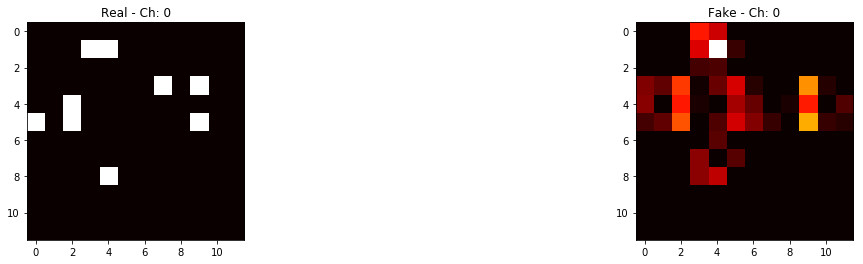

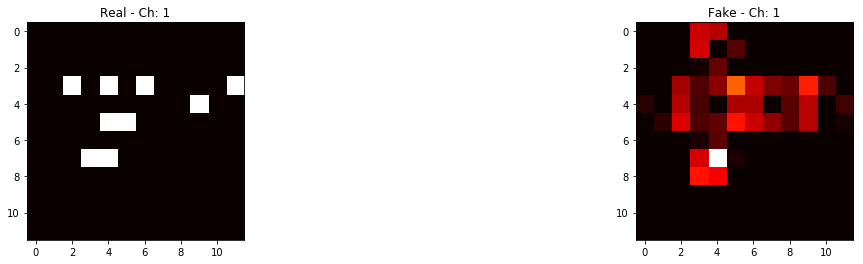

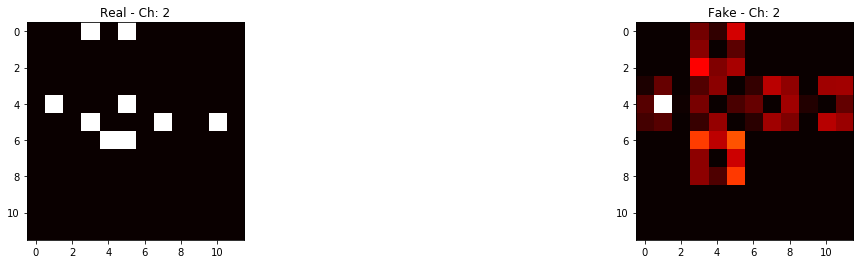

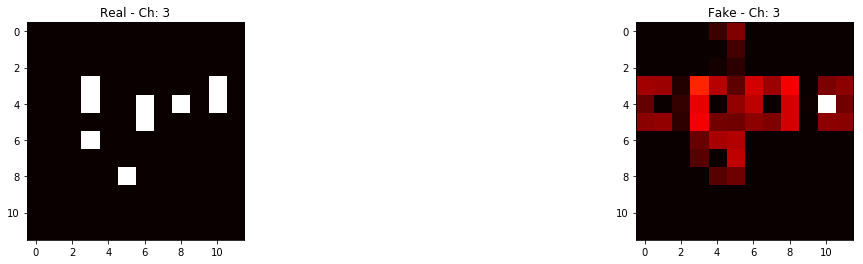

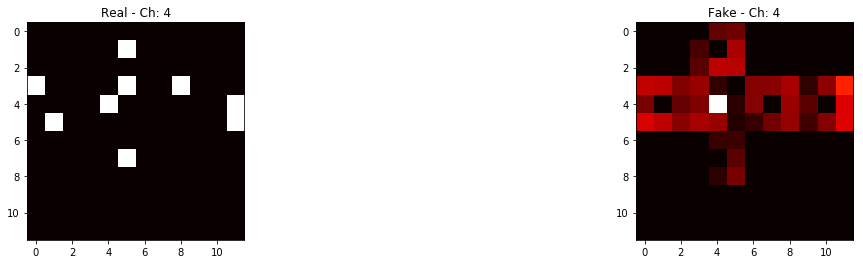

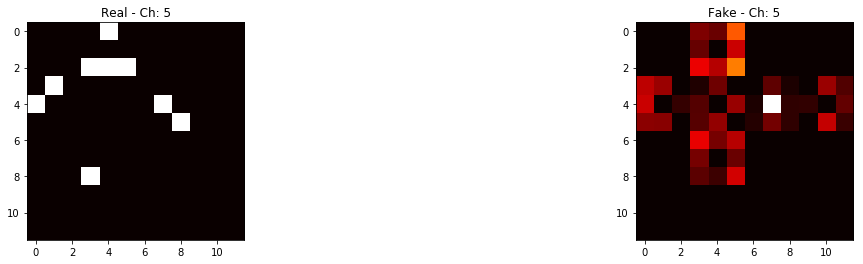

------------------------------------------------------------------------------------------------------------------------------------


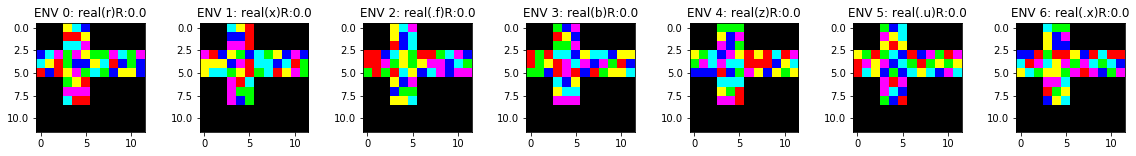

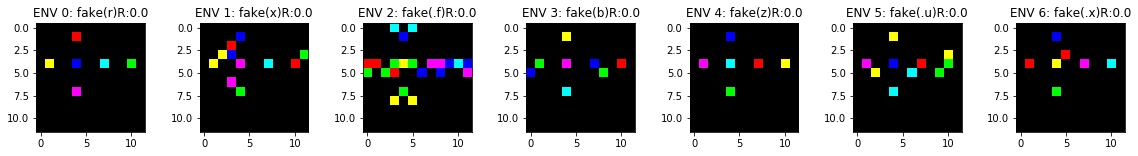

[[0 0 0 2 5 4 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 5 5 1 0 0 0 0 0 0]
 [4 5 1 3 1 2 3 3 1 5 3 1]
 [5 2 0 3 4 4 2 5 0 4 3 4]
 [0 4 0 2 1 3 5 3 4 2 2 4]
 [0 0 0 3 2 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 2 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 2 1 0 0 0 0 0 0]
 [4 2 4 3 3 2 3 3 3 5 4 4]
 [0 2 1 3 4 3 1 5 0 4 3 4]
 [0 1 4 3 3 2 1 3 3 5 4 4]
 [0 0 0 5 5 0 0 0 0 0 0 0]
 [0 0 0 5 1 0 0 0 0 0 0 0]
 [0 0 0 5 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


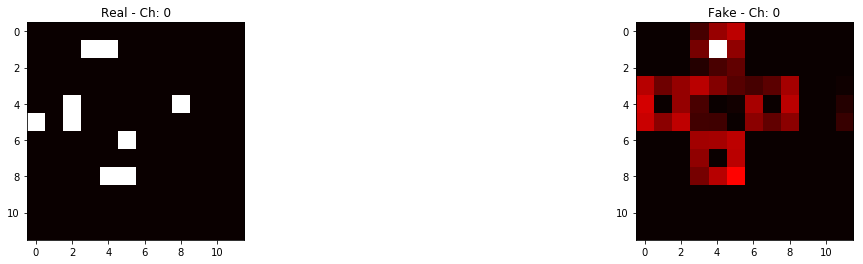

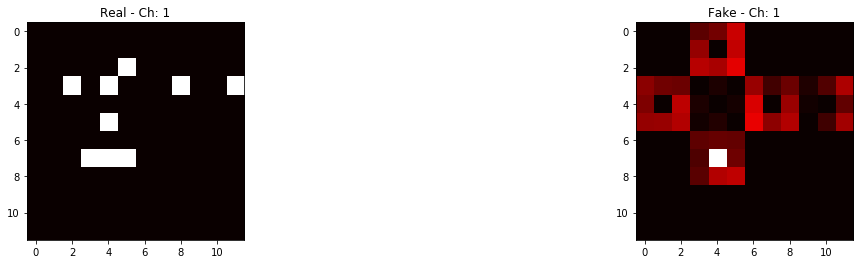

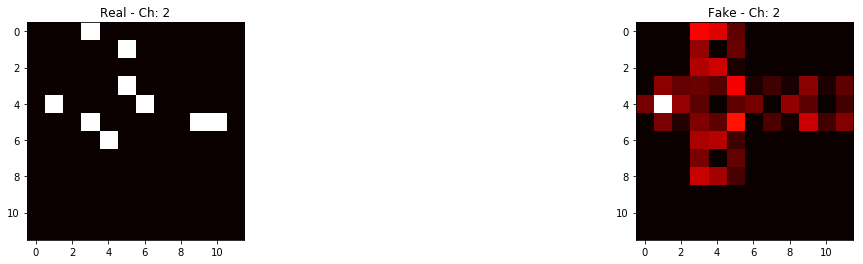

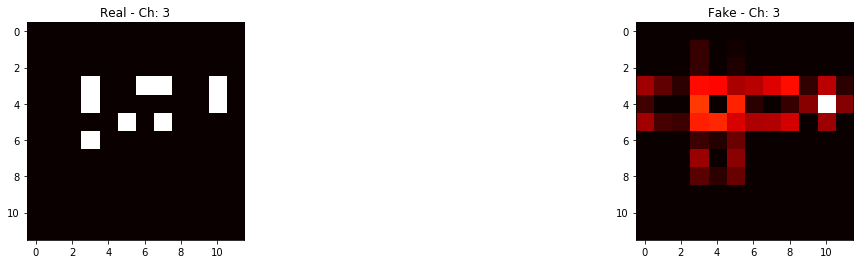

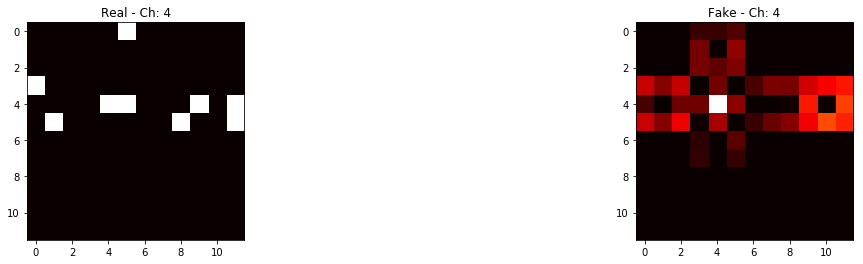

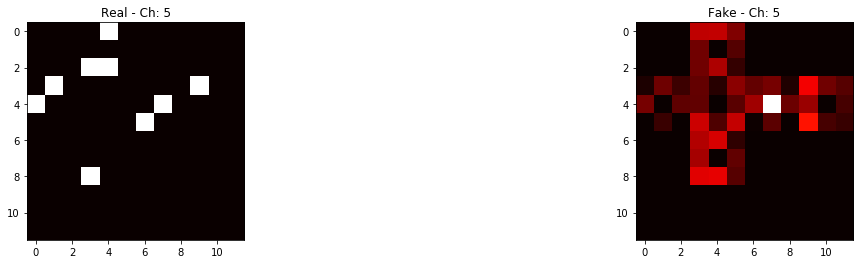

------------------------------------------------------------------------------------------------------------------------------------


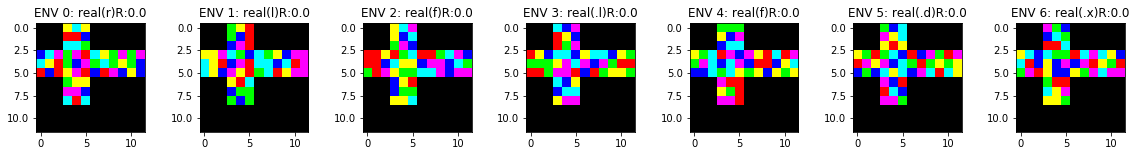

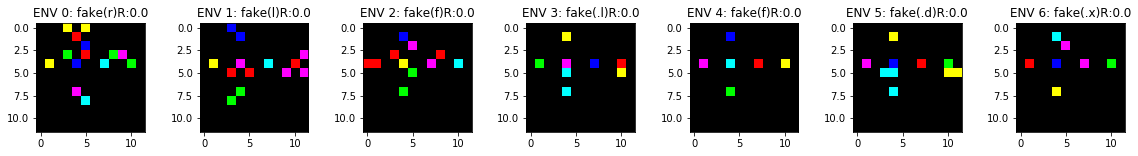

[[0 0 0 2 5 2 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 5 5 3 0 0 0 0 0 0]
 [4 5 1 3 1 0 5 2 3 1 3 1]
 [5 2 0 3 4 1 3 5 3 2 3 4]
 [0 4 0 2 1 0 4 0 1 4 2 4]
 [0 0 0 3 2 2 0 0 0 0 0 0]
 [0 0 0 1 1 4 0 0 0 0 0 0]
 [0 0 0 5 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 2 4 4 0 0 0 0 0 0]
 [4 4 5 3 3 0 2 3 3 1 4 4]
 [0 2 0 3 4 0 2 5 3 1 3 4]
 [0 4 0 3 3 0 1 1 3 1 2 4]
 [0 0 0 5 1 3 0 0 0 0 0 0]
 [0 0 0 1 1 2 0 0 0 0 0 0]
 [0 0 0 5 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


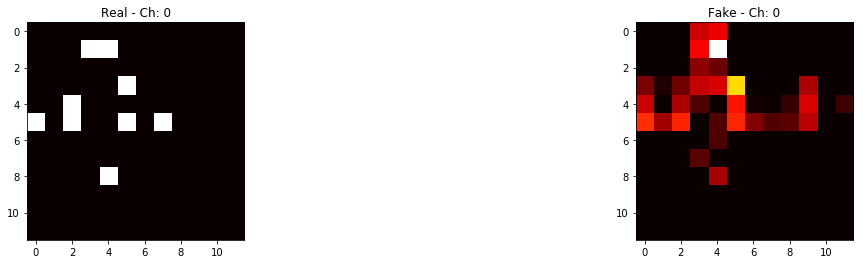

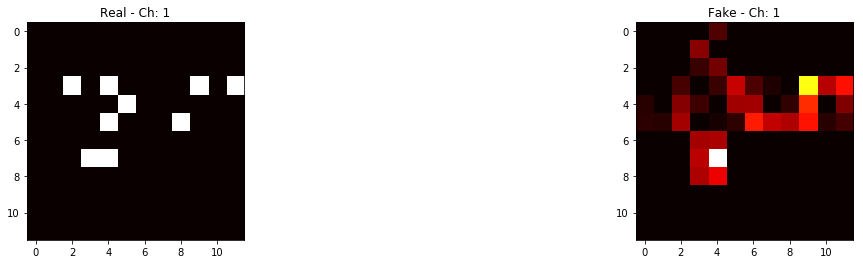

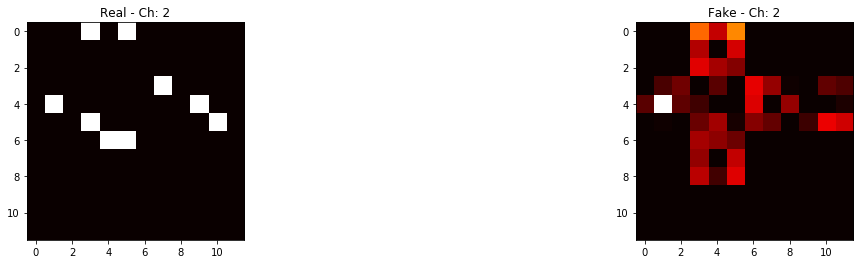

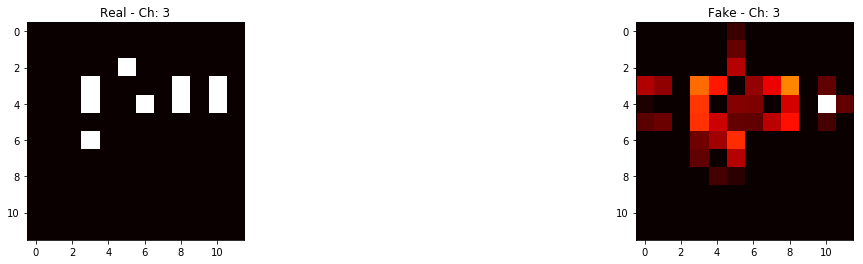

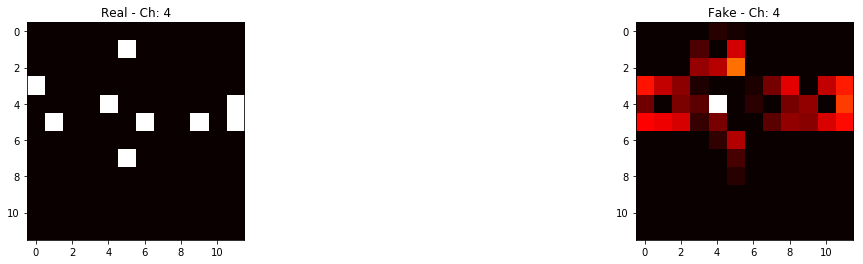

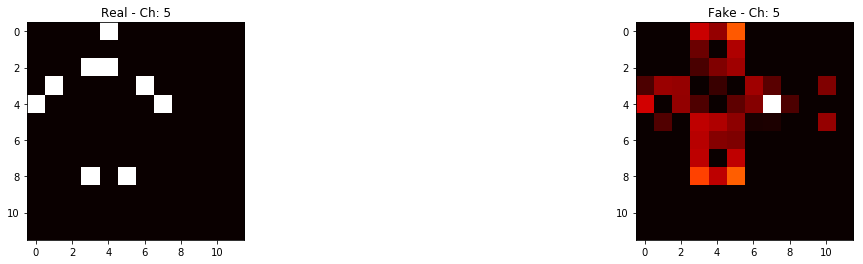

------------------------------------------------------------------------------------------------------------------------------------


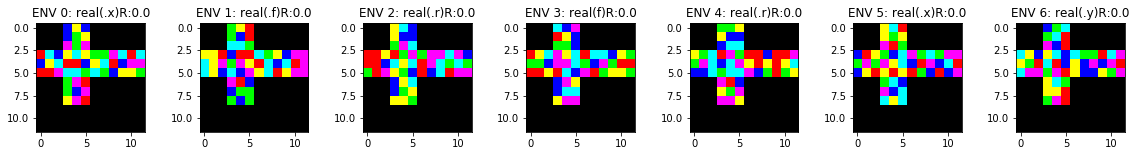

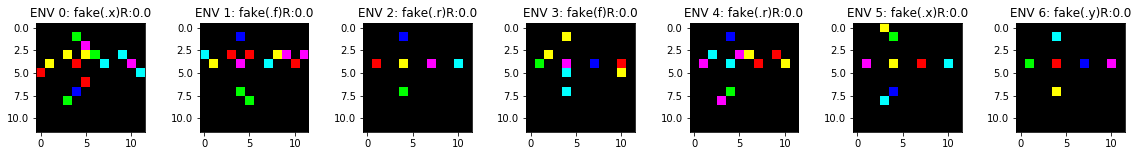

[[0 0 0 4 2 4 0 0 0 0 0 0]
 [0 0 0 4 3 2 0 0 0 0 0 0]
 [0 0 0 1 3 1 0 0 0 0 0 0]
 [0 5 4 2 5 2 3 3 1 5 0 5]
 [4 2 5 0 0 4 2 5 0 4 1 1]
 [0 0 1 5 5 3 5 3 4 2 2 3]
 [0 0 0 3 1 0 0 0 0 0 0 0]
 [0 0 0 3 4 1 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 1 1 0 0 0 0 0 0]
 [0 0 0 4 3 1 0 0 0 0 0 0]
 [0 0 0 4 1 1 0 0 0 0 0 0]
 [0 4 4 2 2 2 3 3 3 5 5 5]
 [0 2 4 2 0 4 2 5 0 5 1 5]
 [0 0 4 2 2 2 3 3 0 5 3 5]
 [0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 3 4 0 0 0 0 0 0 0]
 [0 0 0 3 5 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


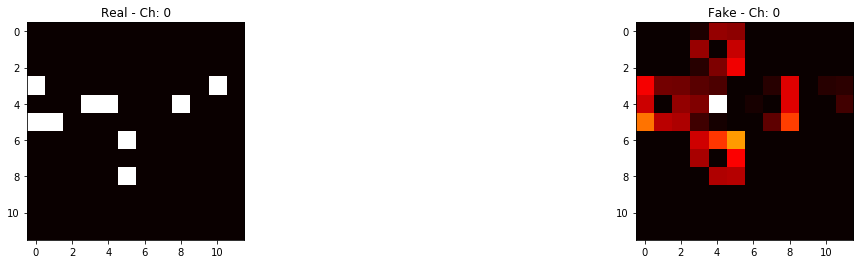

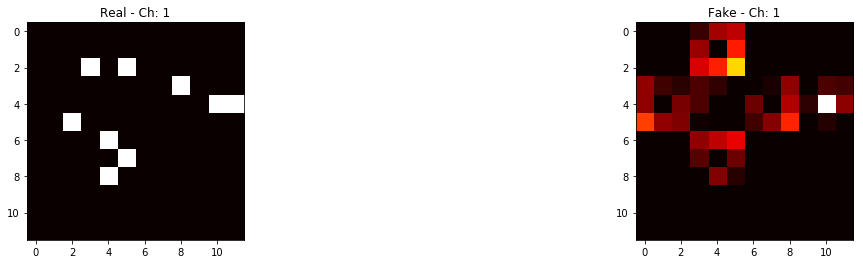

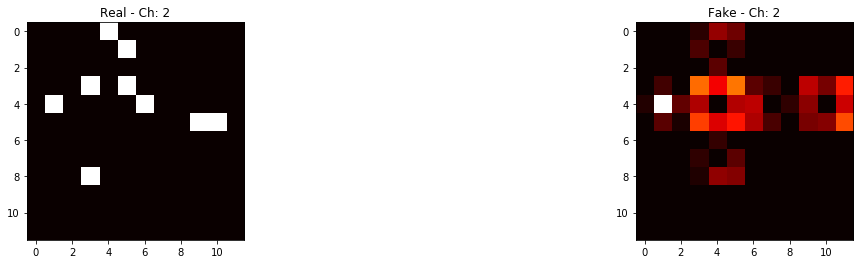

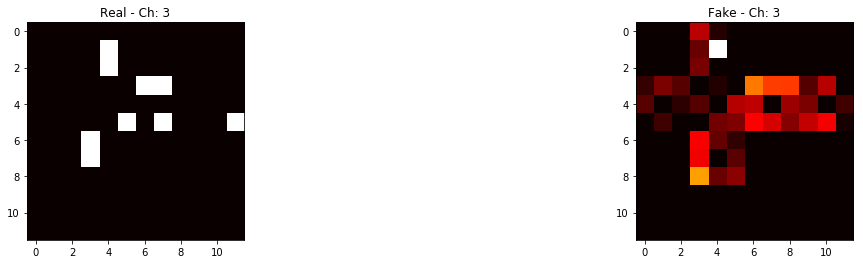

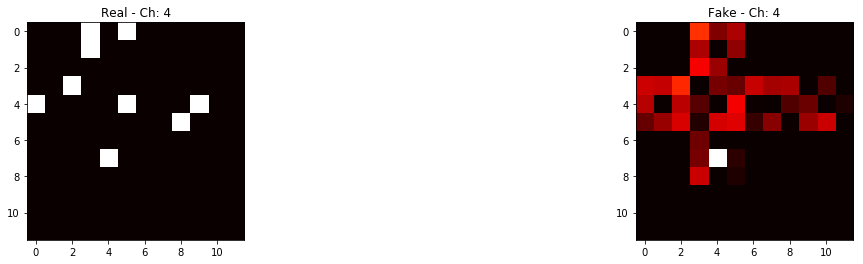

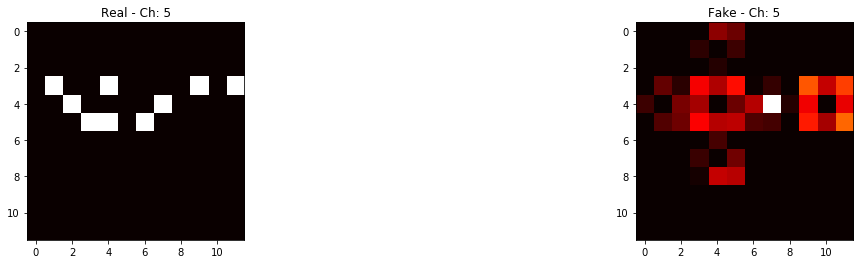

------------------------------------------------------------------------------------------------------------------------------------


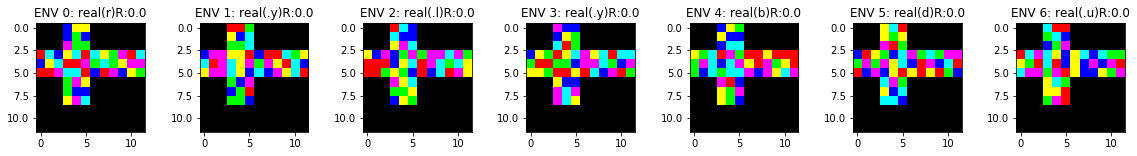

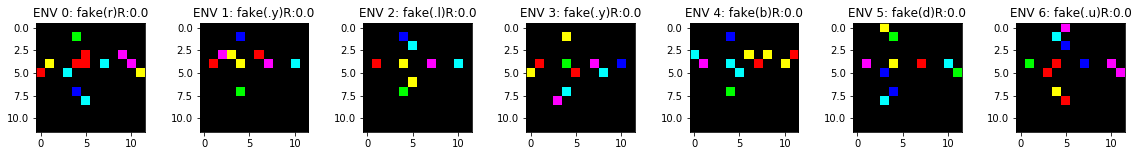

[[0 0 0 4 2 2 0 0 0 0 0 0]
 [0 0 0 4 3 4 0 0 0 0 0 0]
 [0 0 0 1 3 3 0 0 0 0 0 0]
 [0 5 4 2 5 0 5 2 3 1 0 5]
 [4 2 5 0 0 1 3 5 3 2 1 1]
 [0 0 1 5 5 0 4 0 1 4 2 3]
 [0 0 0 3 1 2 0 0 0 0 0 0]
 [0 0 0 3 4 4 0 0 0 0 0 0]
 [0 0 0 2 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 2 2 0 0 0 0 0 0]
 [0 0 0 0 3 4 0 0 0 0 0 0]
 [0 0 0 0 4 4 0 0 0 0 0 0]
 [4 4 4 5 0 0 3 3 3 1 1 2]
 [0 2 4 5 0 0 3 5 3 1 1 2]
 [0 4 4 5 5 0 1 1 0 1 2 2]
 [0 0 0 1 1 3 0 0 0 0 0 0]
 [0 0 0 3 4 5 0 0 0 0 0 0]
 [0 0 0 3 5 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


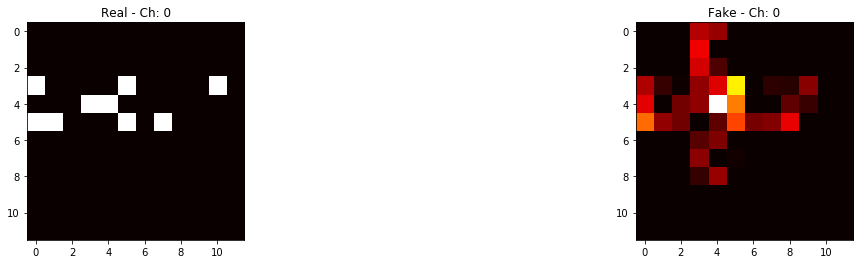

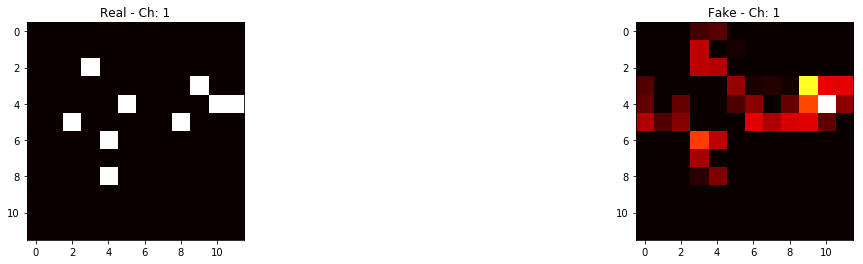

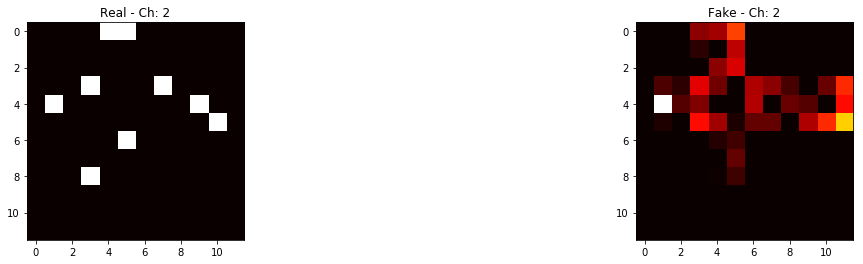

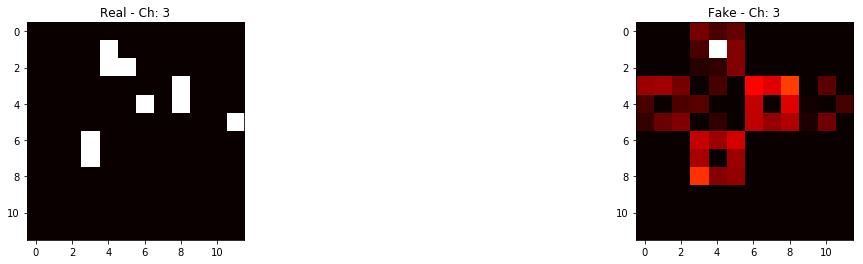

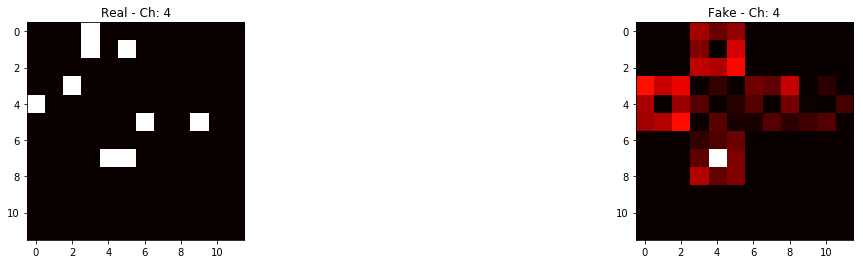

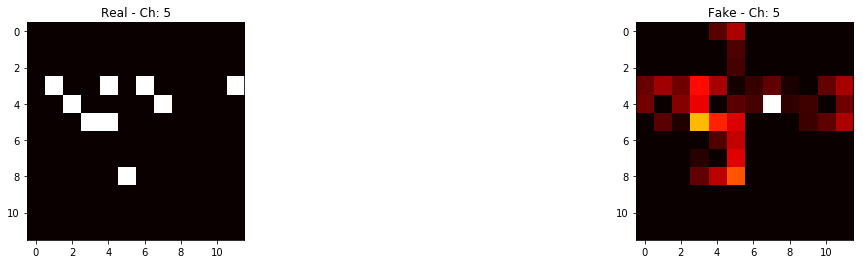

------------------------------------------------------------------------------------------------------------------------------------


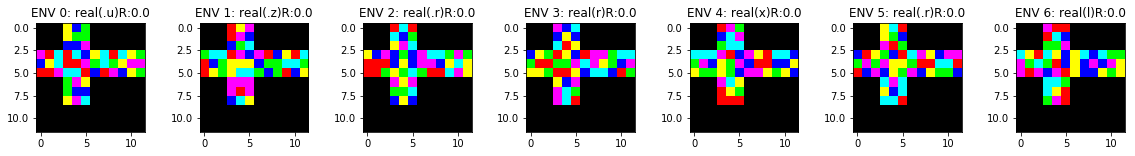

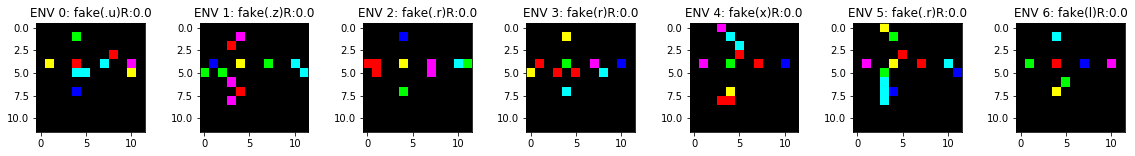

[[0 0 0 2 4 3 0 0 0 0 0 0]
 [0 0 0 2 3 3 0 0 0 0 0 0]
 [0 0 0 4 4 1 0 0 0 0 0 0]
 [1 0 5 0 5 4 2 5 0 5 2 3]
 [4 2 5 0 0 1 3 5 3 2 1 1]
 [0 0 1 5 5 0 4 0 1 4 2 3]
 [0 0 0 3 1 2 0 0 0 0 0 0]
 [0 0 0 3 4 4 0 0 0 0 0 0]
 [0 0 0 2 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 4 4 0 0 0 0 0 0]
 [0 0 0 0 3 4 0 0 0 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [0 5 5 0 5 0 2 3 0 1 2 4]
 [4 2 4 5 0 5 3 5 0 2 1 2]
 [0 4 4 5 5 5 1 3 0 2 2 2]
 [0 0 0 1 3 3 0 0 0 0 0 0]
 [0 0 0 5 4 3 0 0 0 0 0 0]
 [0 0 0 5 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


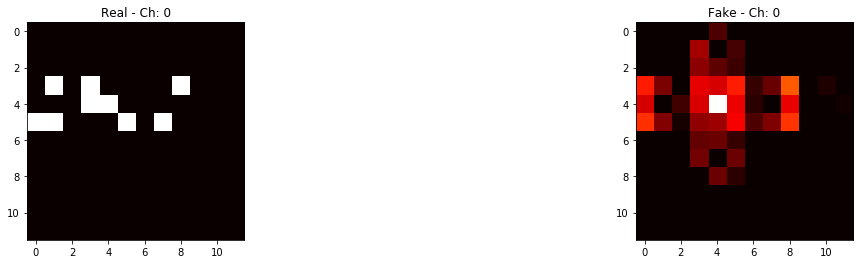

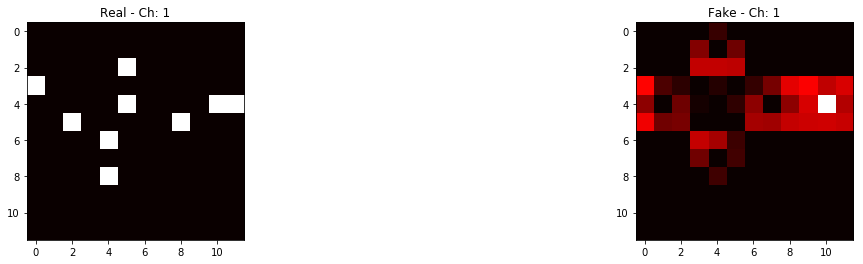

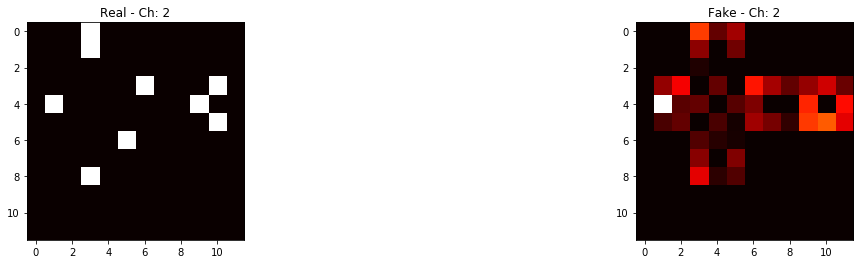

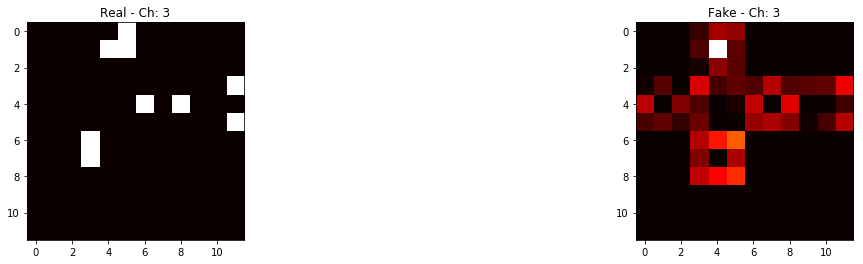

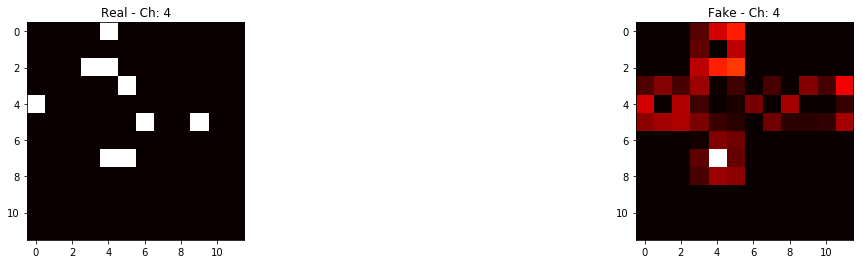

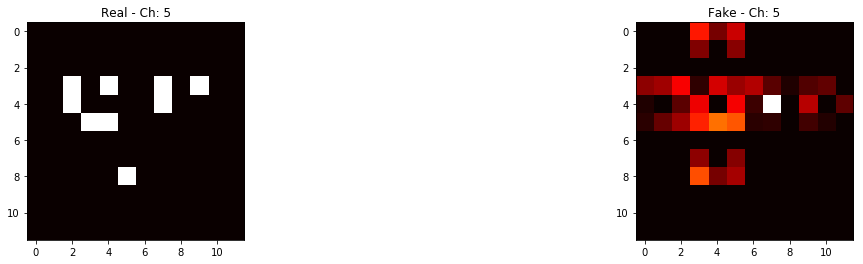

------------------------------------------------------------------------------------------------------------------------------------


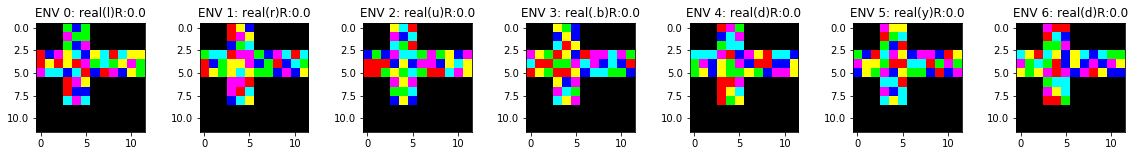

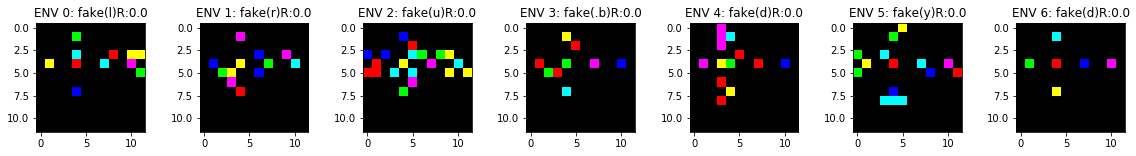

[[0 0 0 3 4 3 0 0 0 0 0 0]
 [0 0 0 1 3 3 0 0 0 0 0 0]
 [0 0 0 3 4 1 0 0 0 0 0 0]
 [0 4 1 2 5 4 2 5 0 5 2 2]
 [0 2 0 2 0 1 3 5 3 2 1 3]
 [1 5 5 4 5 0 4 0 1 4 2 3]
 [0 0 0 0 1 2 0 0 0 0 0 0]
 [0 0 0 0 4 4 0 0 0 0 0 0]
 [0 0 0 5 1 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 3 3 3 0 0 0 0 0 0]
 [0 0 0 1 3 3 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [1 4 4 5 5 5 0 0 0 2 2 2]
 [0 2 4 5 0 5 3 5 0 2 1 2]
 [1 5 5 4 5 4 2 2 0 3 2 3]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 4 4 0 0 0 0 0 0]
 [0 0 0 5 4 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


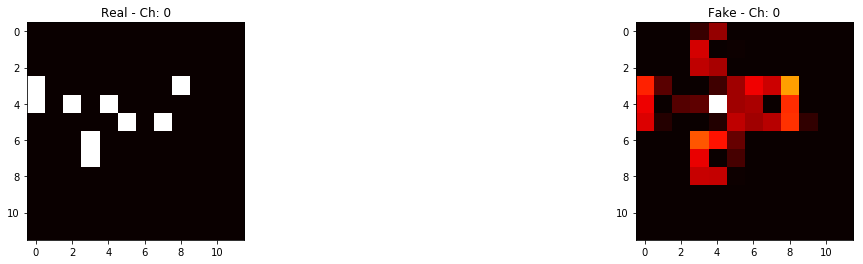

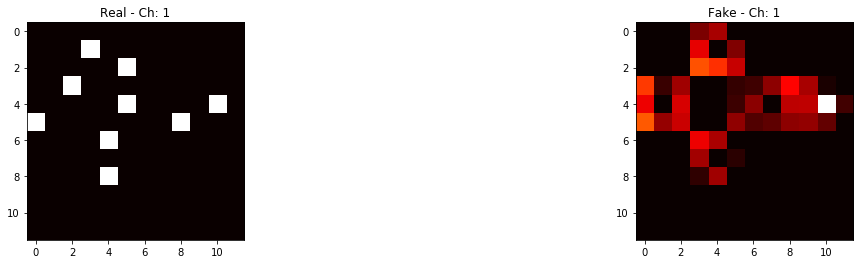

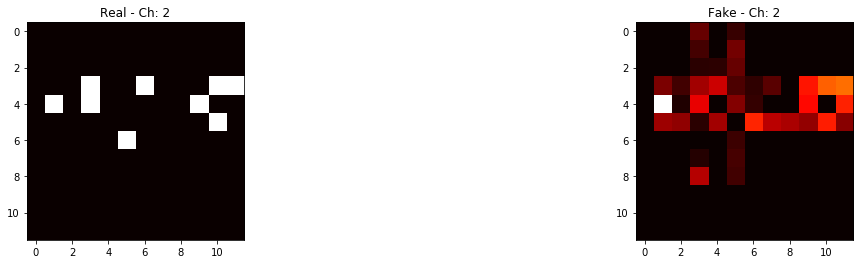

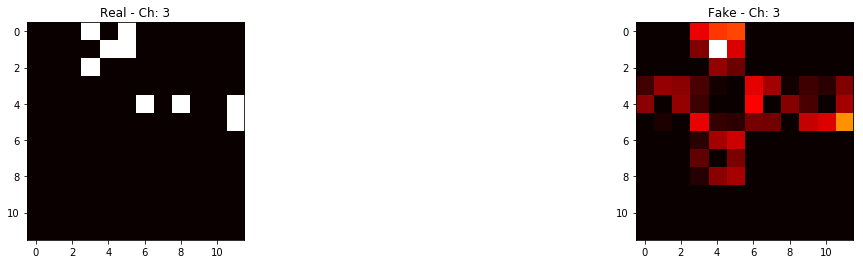

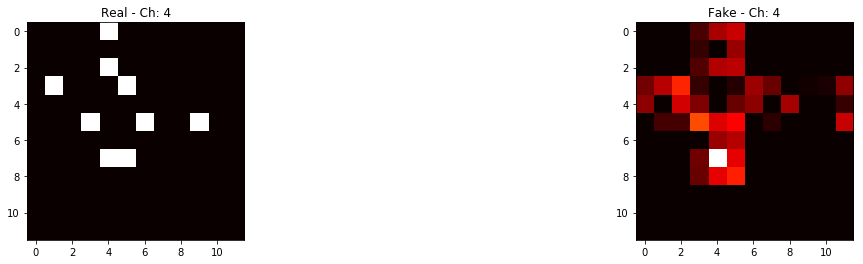

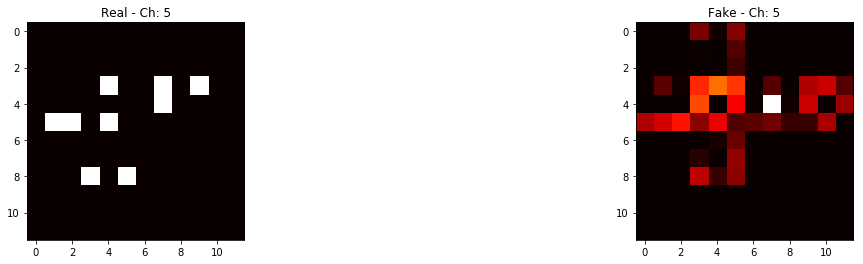

------------------------------------------------------------------------------------------------------------------------------------


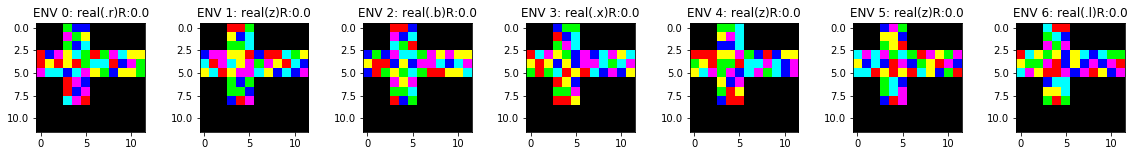

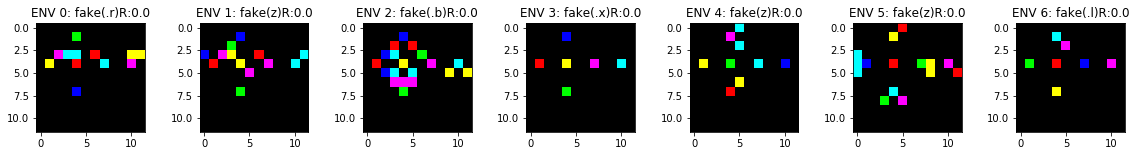

[[0 0 0 3 4 4 0 0 0 0 0 0]
 [0 0 0 1 3 2 0 0 0 0 0 0]
 [0 0 0 3 4 5 0 0 0 0 0 0]
 [0 4 1 2 5 3 0 3 1 5 2 2]
 [0 2 0 2 0 3 5 5 0 4 1 3]
 [1 5 5 4 5 1 2 3 4 2 2 3]
 [0 0 0 0 1 4 0 0 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0 0 0]
 [0 0 0 5 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 3 1 3 0 0 0 0 0 0]
 [0 0 0 0 3 1 0 0 0 0 0 0]
 [0 0 0 3 0 4 0 0 0 0 0 0]
 [0 4 1 5 5 5 0 0 1 2 2 2]
 [0 2 1 5 0 5 0 5 1 2 1 2]
 [1 2 1 3 5 4 0 2 1 3 2 4]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


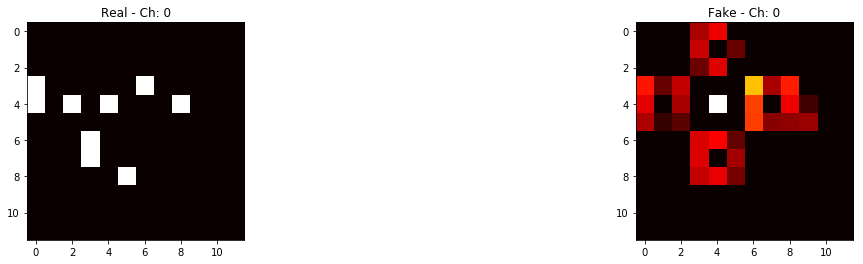

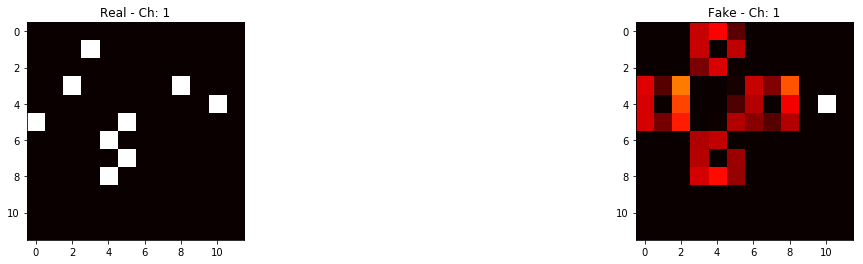

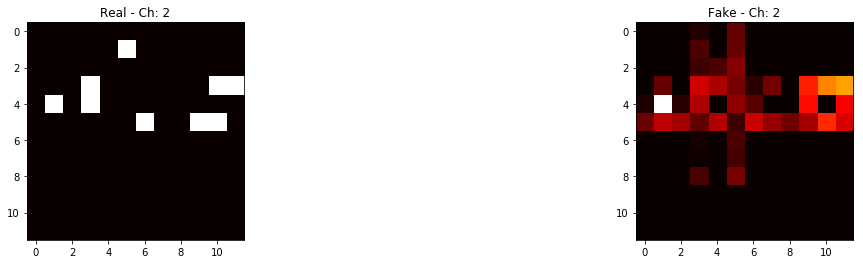

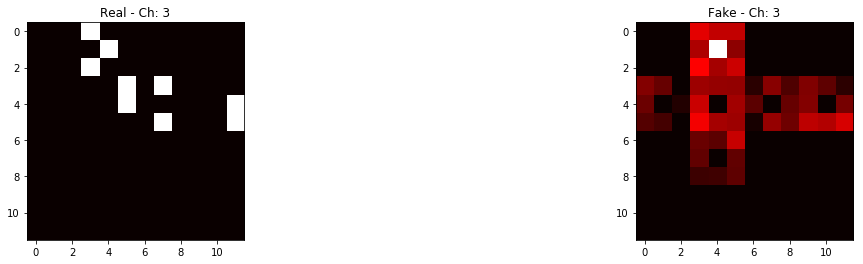

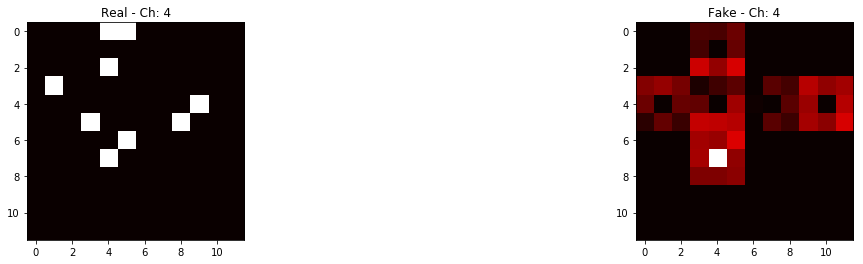

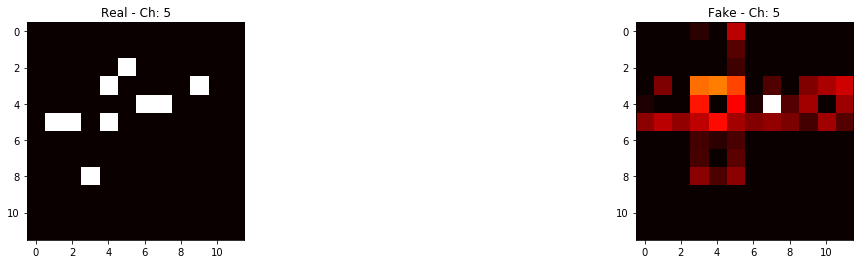

------------------------------------------------------------------------------------------------------------------------------------


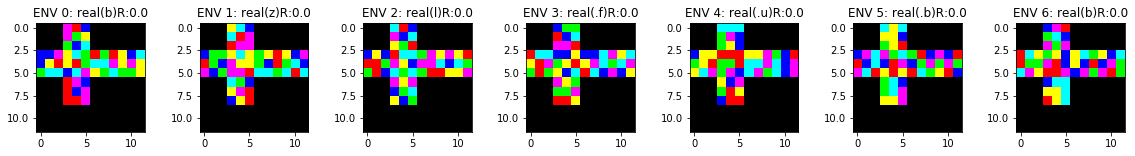

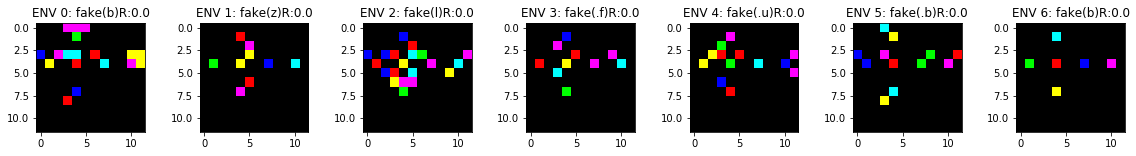

[[0 0 0 1 0 4 0 0 0 0 0 0]
 [0 0 0 1 3 2 0 0 0 0 0 0]
 [0 0 0 3 4 5 0 0 0 0 0 0]
 [4 4 1 2 5 3 0 3 0 2 4 5]
 [4 2 0 2 0 3 5 5 1 2 1 2]
 [3 5 5 4 5 1 2 3 5 3 3 2]
 [0 0 0 0 1 4 0 0 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 3 1 0 0 0 0 0 0]
 [0 0 0 3 4 4 0 0 0 0 0 0]
 [4 4 1 5 5 5 0 2 3 2 2 2]
 [4 2 1 5 0 5 0 5 3 2 1 2]
 [5 5 5 3 5 1 2 2 3 0 2 3]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


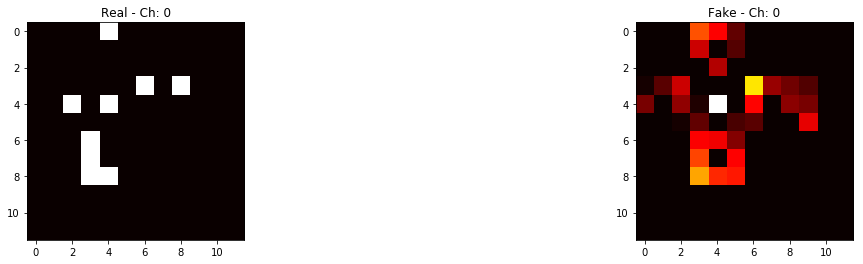

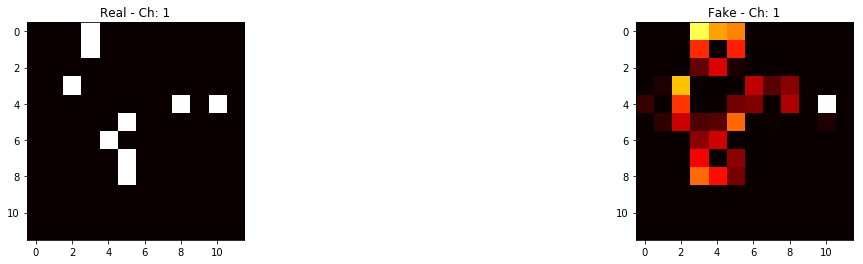

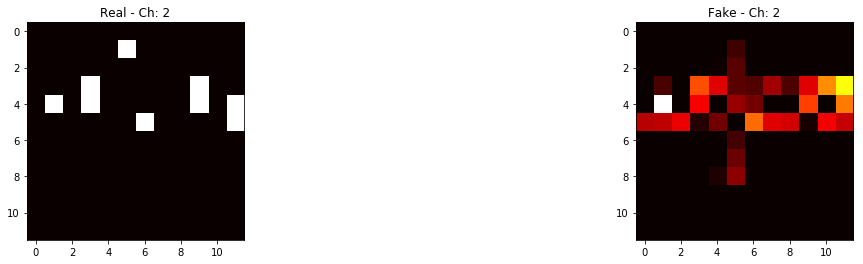

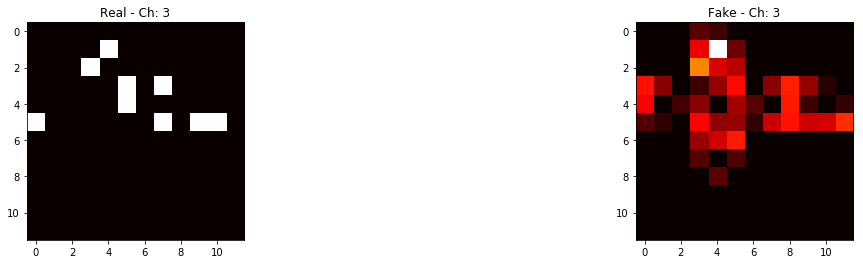

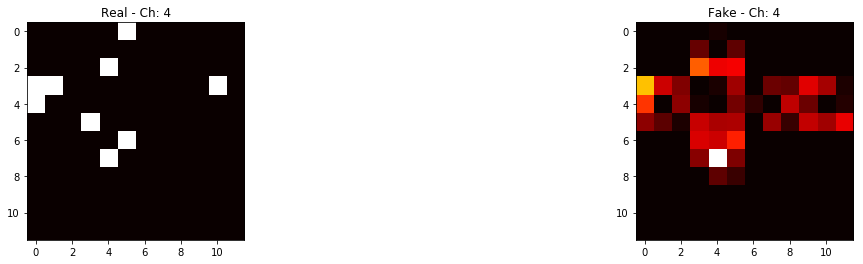

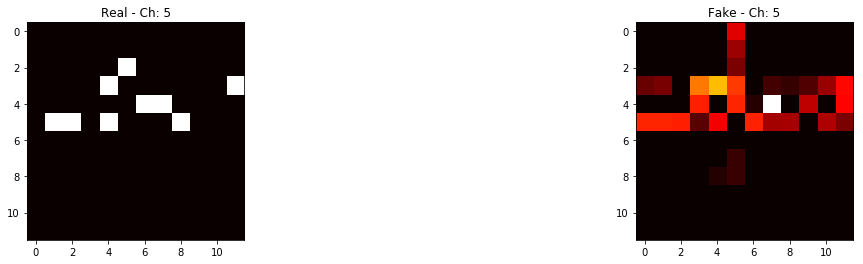

------------------------------------------------------------------------------------------------------------------------------------


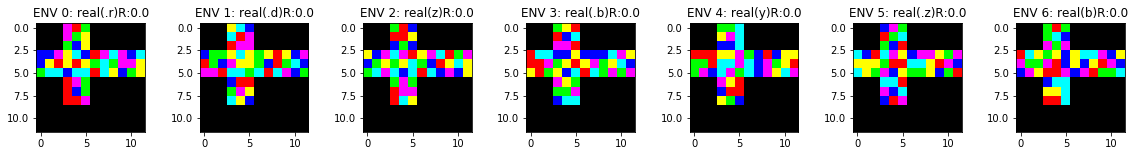

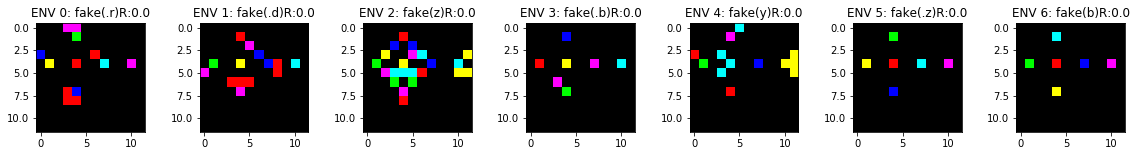

[[0 0 0 1 0 3 0 0 0 0 0 0]
 [0 0 0 1 3 2 0 0 0 0 0 0]
 [0 0 0 3 4 2 0 0 0 0 0 0]
 [4 4 1 2 5 4 0 1 5 1 4 5]
 [4 2 0 2 0 2 3 5 3 1 1 2]
 [3 5 5 4 5 5 0 5 2 4 3 2]
 [0 0 0 0 1 3 0 0 0 0 0 0]
 [0 0 0 0 4 3 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 3 1 0 0 0 0 0 0]
 [0 0 0 4 1 4 0 0 0 0 0 0]
 [4 4 1 2 5 5 0 3 3 1 2 2]
 [4 2 1 2 0 5 0 5 3 2 1 5]
 [2 5 1 3 5 4 0 3 3 3 2 3]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


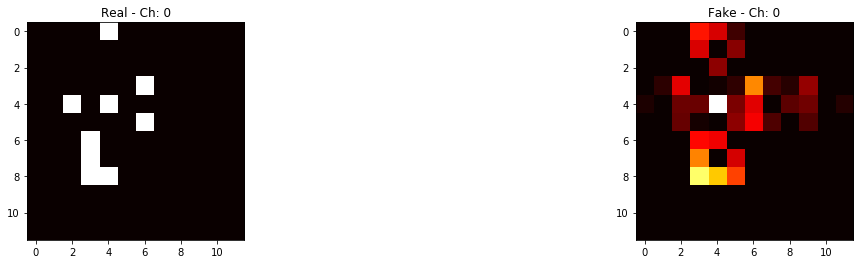

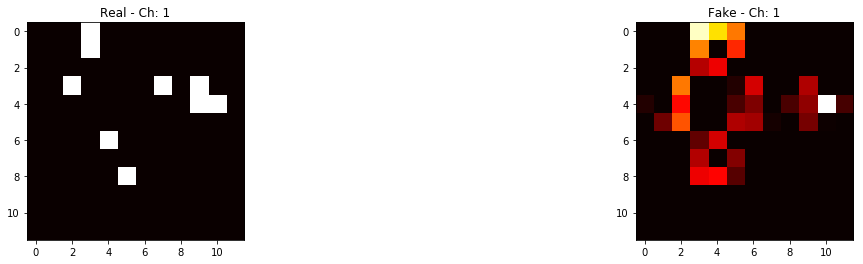

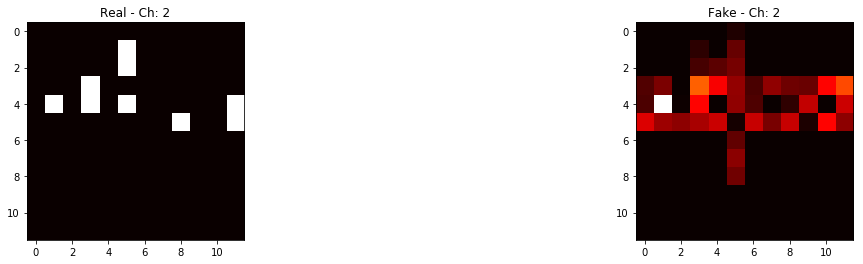

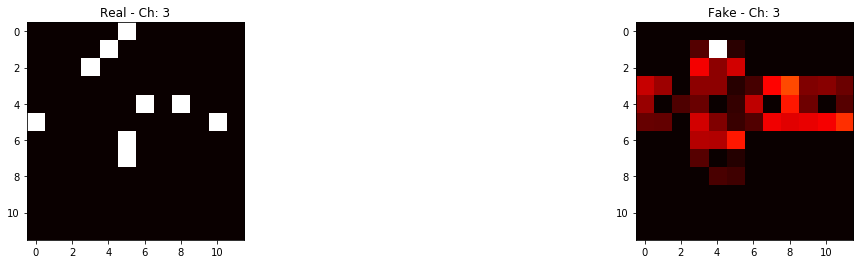

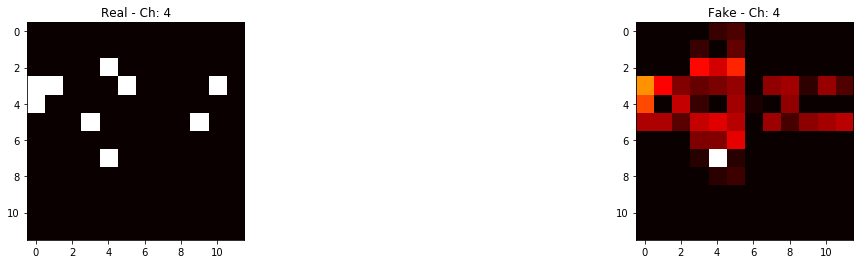

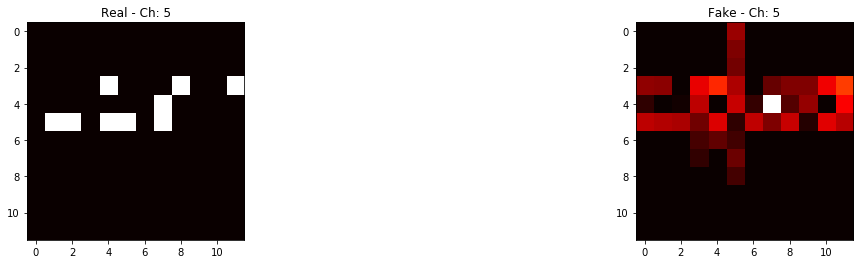

------------------------------------------------------------------------------------------------------------------------------------


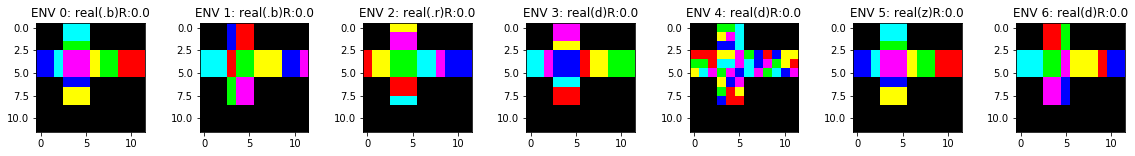

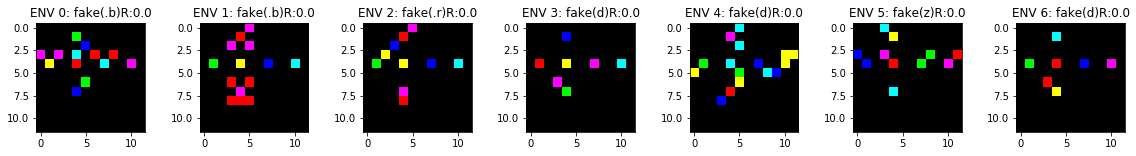

[[0 0 0 5 5 5 0 0 0 0 0 0]
 [0 0 0 5 5 5 0 0 0 0 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0]
 [4 4 5 1 1 1 2 3 3 0 0 0]
 [4 4 5 1 1 1 2 3 3 0 0 0]
 [4 4 5 1 1 1 2 3 3 0 0 0]
 [0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 2 2 2 0 0 0 0 0 0]
 [0 0 0 2 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 4 4 4 0 0 0 0 0 0]
 [0 0 0 1 3 4 0 0 0 0 0 0]
 [0 0 0 4 1 4 0 0 0 0 0 0]
 [1 4 1 5 5 5 0 0 0 2 2 2]
 [1 2 1 5 0 5 0 5 0 2 1 2]
 [1 2 1 4 5 1 0 5 0 0 2 2]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 4 3 0 0 0 0 0 0]
 [0 0 0 5 3 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


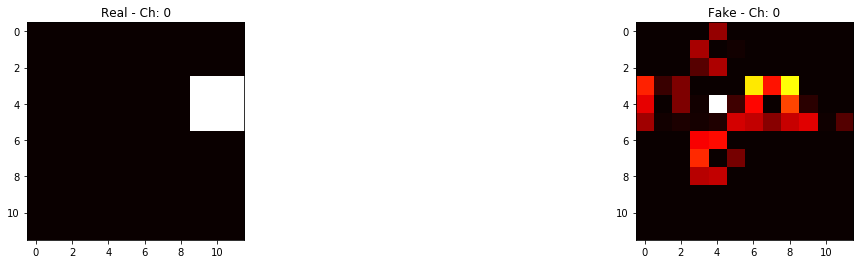

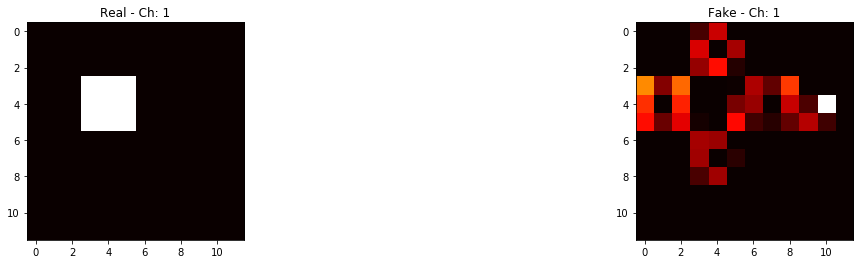

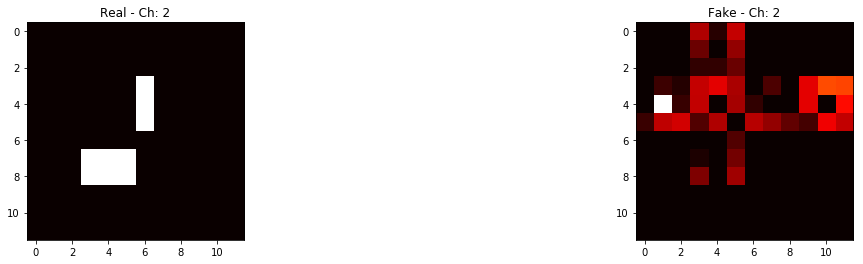

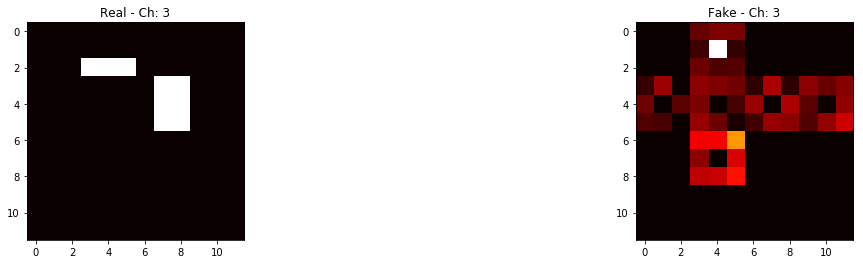

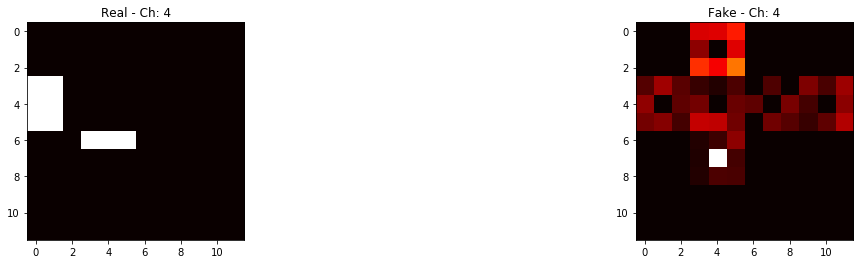

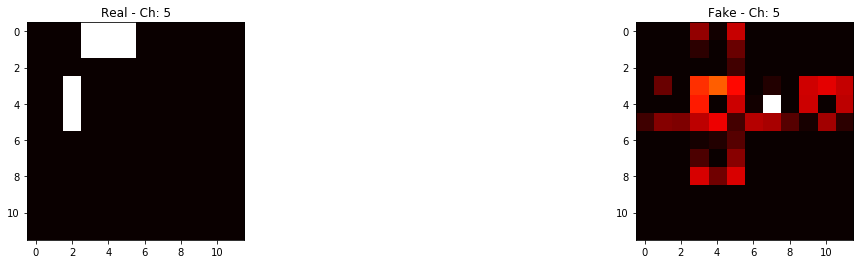

In [6]:
# This will draw the observations of multiple environments
def show_states(obs, name):
    plt.figure(figsize=(20, 2))
    for e in range(nenvs):
        plt.subplot(1, nenvs, e+1)
        plt.title('ENV ' + str(e) + ': ' + name[e])
        plt.imshow(cube_gym.onehotToRGB(obs[e], clean=True))
    plt.show()

obs = envs.reset()
show_states(obs, ['start' for _ in range(nenvs)])

def output_pred_dist(obs, pobs):
    n = obs.shape[0]
    for c in range(6):
        plt.figure(figsize=(20,4))
        plt.subplot(1, 2, 1)
        plt.title('Real - Ch: '+str(c))
        plt.imshow(obs[:,:,c], cmap='hot', interpolation='nearest')
        plt.subplot(1, 2, 2)
        plt.title('Fake - Ch: '+str(c))
        plt.imshow(pobs[:,:,c], cmap='hot', interpolation='nearest')
        plt.show()
        

def title(a, r, d):
    return d + '('+actions[a]+')'+'R:'+str(r)

for _ in range(100):
    a = np.random.randint(envs.action_space.n, size=nenvs)
    pobs, pr = env_model.predict(obs, a)
    obs, r, _, _ = envs.step(a)
    print('-'*132)
    show_states( obs, [title(x,y,'real') for x,y in zip(a,r )])
    show_states(pobs, [title(x,y,'fake') for x,y in zip(a,pr)])
    print(np.argmax(obs[0], axis=-1))
    print(np.argmax(pobs[0], axis=-1))
    output_pred_dist(obs[0], pobs[0])